In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_2015_realRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc1
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_2012_borrowedRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc2
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_NOX.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc3

In [ ]:
df1.columns

Index(['SO2 (ppb)', 'H2S (ppb)', 'THC (ppm)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['SO2 (ppb)', 'H2S (ppb)', 'THC (ppm)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
df1_w= df1_w[[
            'SO2 (ppb)', #'H2S (ppb)', 'THC (ppm)', 
            'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score',
        # 'sin', 'cos'
        ]].copy()
df1_w.columns

Index(['SO2 (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

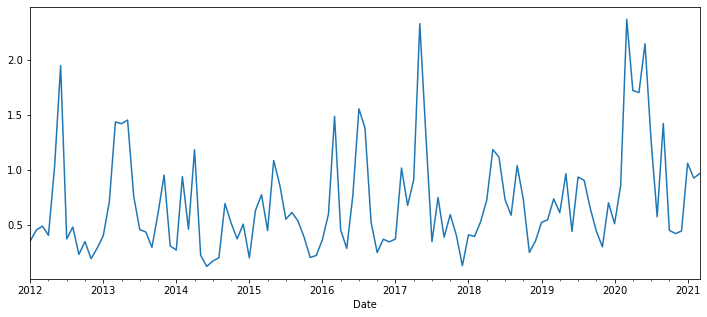

In [ ]:
df1_w['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5))

In [ ]:
df1_w.columns

Index(['SO2 (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

In [ ]:
avg

5.626068312068443

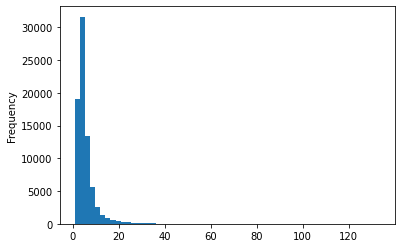

In [ ]:
df1_w['score'].plot.hist(bins =60)

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()
len(df1_w[df1_w['score']<avg + 2*std])/len(df1_w)

0.9685008495621488

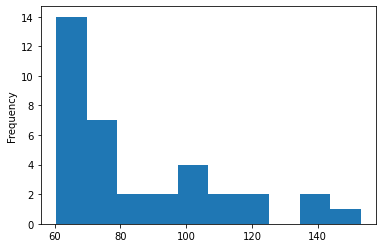

In [ ]:
df1_w['SO2 (ppb)'][df1_w['SO2 (ppb)']>60].plot.hist()

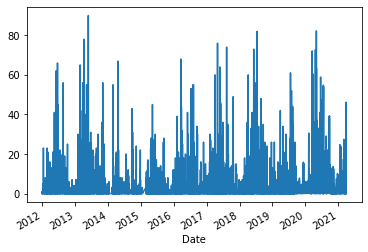

In [ ]:
# df1_w['SO2 (ppb)'].plot()
# df1_w['SO2 (ppb)'][df1_w['SO2 (ppb)']>60].plot.hist()
df1_w[df1_w['SO2 (ppb)'] > 90] = np.nan
df1_w.dropna(inplace = True)
df1_w['SO2 (ppb)'].plot()

In [ ]:
# df_xg =  df1_w.copy()
# df_xg.drop(columns = ['score'], inplace = True)
# Y =  df_xg['SO2 (ppb)']
# Y = np.array(Y).reshape(-1,1)
# X = np.array( df_xg[ df_xg.columns[1:]])

In [ ]:
def objectivee(trial):    
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.00001, random_state = 42)
        param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree"]), #",,""gblinear" , "dart"
        "lambda": trial.suggest_loguniform("lambda", 0.01, 1000.0),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 1000.0),
        "score" : trial.suggest_float( 'score', avg + 1.5*std, avg + 7 * std )
        }

        # if param["booster"] == "gbtree" :
        #     param["n_estimators"] =  trial.suggest_int("n_estimators" , 1, 10000)

        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 25)
            param["eta"] = trial.suggest_loguniform("eta", 0.1, 1000.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 0.1, 1000.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-3, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-3, 1.0)

        df_xg =  df1_w[df1_w['score'] < param["score"]].copy()
        # df_xg =  df1_w.copy()
        df_xg.drop(columns = ['score'], inplace = True)
        Y =  df_xg['SO2 (ppb)']
        Y = np.array(Y).reshape(-1,1)
        X = np.array( df_xg[ df_xg.columns[1:]])
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.000000001000, random_state = 42)

        K = 5
        kf = KFold(n_splits=K)
        acc = 0 
        for train_index, test_index in kf.split(X):   
                X_tr, X_tes = X[train_index], X[test_index]
                y_tr, y_tes =  Y[train_index],  Y[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
    
                dtrain = xgb.DMatrix(X_tra, label=y_tra)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_tes, label=y_tes)
                
                pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
                bst = xgb.train(param, dtrain, evals=[(dval, "validation")],  early_stopping_rounds=30,
                                callbacks=[pruning_callback],
                               # verbose_eval = False
                               )
                preds = bst.predict(dtest)
                accuracy = mean_squared_error(y_tes, preds)
                acc = acc + accuracy/K
                
        print(acc)
        return acc    

In [ ]:
study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=10000)
print(study2.best_trial)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_Buffalo Viewpoint_OT_SO2_2012_brwd_RH_HP_hourly.csv')

[I 2021-05-16 04:46:17,990] A new study created in memory with name: no-name-7f9c6dab-4974-413b-a585-64279259ae1d


[0]	validation-rmse:2.54287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.4823
[2]	validation-rmse:2.44674
[3]	validation-rmse:2.41344
[4]	validation-rmse:2.3865
[5]	validation-rmse:2.37051
[6]	validation-rmse:2.36031
[7]	validation-rmse:2.35265
[8]	validation-rmse:2.34488
[9]	validation-rmse:2.3403
[0]	validation-rmse:2.59671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.52346
[2]	validation-rmse:2.48624
[3]	validation-rmse:2.46125
[4]	validation-rmse:2.43823
[5]	validation-rmse:2.42176
[6]	validation-rmse:2.41181
[7]	validation-rmse:2.4042
[8]	validation-rmse:2.3975
[9]	validation-rmse:2.39224
[0]	validation-rmse:2.43012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.36945
[2]	validation-rmse:2.33862
[3]	validation-rmse:2.31367
[4]	validation-rmse:2.29708
[5]	validation-rmse:2.28454
[6]	validation-rmse:2.26868
[7]	validation-rmse:2.25933
[8]	validation-rmse:2.25022
[9]	

[I 2021-05-16 04:46:20,658] Trial 0 finished with value: 7.198788920746548 and parameters: {'booster': 'gbtree', 'lambda': 27.742942854693197, 'alpha': 8.486445253585158, 'score': 21.09245219542759, 'max_depth': 6, 'eta': 0.31697816948145247, 'gamma': 136.66693129365433, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 7.198788920746548.


7.198788920746548
[0]	validation-rmse:2.4143
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.36397
[2]	validation-rmse:2.33898
[3]	validation-rmse:2.32211
[4]	validation-rmse:2.31117
[5]	validation-rmse:2.30516
[6]	validation-rmse:2.29521
[7]	validation-rmse:2.2938
[8]	validation-rmse:2.28937
[9]	validation-rmse:2.28807
[0]	validation-rmse:2.64864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.58412
[2]	validation-rmse:2.54322
[3]	validation-rmse:2.52921
[4]	validation-rmse:2.51772
[5]	validation-rmse:2.51058
[6]	validation-rmse:2.50194
[7]	validation-rmse:2.49263
[8]	validation-rmse:2.48676
[9]	validation-rmse:2.47902
[0]	validation-rmse:2.59357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.54958
[2]	validation-rmse:2.52355
[3]	validation-rmse:2.51059
[4]	validation-rmse:2.48637
[5]	validation-rmse:2.47995
[6]	validation-rmse:2.47034
[7]	validation-rmse:2.45987
[8]	validat

[I 2021-05-16 04:46:25,708] Trial 1 finished with value: 6.275404218940829 and parameters: {'booster': 'gbtree', 'lambda': 10.004096409439805, 'alpha': 299.7591781439, 'score': 17.818212745639336, 'max_depth': 12, 'eta': 0.6807170757074671, 'gamma': 3.7203509209352954, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.275404218940829.


6.275404218940829
[0]	validation-rmse:31.0244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:872.222
[2]	validation-rmse:25511.3
[3]	validation-rmse:768689
[4]	validation-rmse:2.36223e+07
[5]	validation-rmse:7.38858e+08
[6]	validation-rmse:2.34871e+10
[7]	validation-rmse:7.5992e+11
[8]	validation-rmse:2.49655e+13
[9]	validation-rmse:8.14574e+14
[0]	validation-rmse:33.6624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1010.63
[2]	validation-rmse:30783.1
[3]	validation-rmse:972072
[4]	validation-rmse:3.09649e+07
[5]	validation-rmse:1.0015e+09
[6]	validation-rmse:3.25657e+10
[7]	validation-rmse:1.06483e+12
[8]	validation-rmse:3.50071e+13
[9]	validation-rmse:1.15706e+15
[0]	validation-rmse:30.2282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:866.451
[2]	validation-rmse:26505.6
[3]	validation-rmse:826702
[4]	validation-rmse:2.58835e+07
[5]	validation-rmse:8.23691e+08
[6]	validation

[I 2021-05-16 04:46:29,566] Trial 2 finished with value: 9.048355706909007e+29 and parameters: {'booster': 'gbtree', 'lambda': 196.51006188875252, 'alpha': 0.7888267831778053, 'score': 24.098906623613537, 'max_depth': 8, 'eta': 37.51702687191587, 'gamma': 0.18878168435045278, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6.275404218940829.


9.048355706909007e+29
[0]	validation-rmse:169.829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:18118.6
[2]	validation-rmse:2.01645e+06
[3]	validation-rmse:2.42139e+08
[4]	validation-rmse:2.9426e+10
[5]	validation-rmse:3.62031e+12
[6]	validation-rmse:4.56215e+14
[7]	validation-rmse:5.654e+16
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:178.958
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:18946.2
[2]	validation-rmse:2.19923e+06
[3]	validation-rmse:2.60784e+08
[4]	validation-rmse:3.20249e+10
[5]	validation-rmse:4.00998e+12
[6]	validation-rmse:5.00534e+14
[7]	validation-rmse:6.36159e+16
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:176.346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:17546.3
[2]	validation-rmse:2.03894e+06
[3]	validation-rmse:2.46821e+08
[4]	validation-rmse:3.05211e+10
[5]	validation-rmse:3.80575e+12
[6]	validation-r

[I 2021-05-16 04:46:33,495] Trial 3 finished with value: 2.0642496470185852e+39 and parameters: {'booster': 'gbtree', 'lambda': 3.8421997356707975, 'alpha': 0.2204369197304258, 'score': 34.45080436796273, 'max_depth': 9, 'eta': 131.21289901915472, 'gamma': 141.89081863407458, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6.275404218940829.


2.0642496470185852e+39
[0]	validation-rmse:2.47166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.42207
[2]	validation-rmse:2.39882
[3]	validation-rmse:2.38386
[4]	validation-rmse:2.36808
[5]	validation-rmse:2.36436
[6]	validation-rmse:2.36436
[7]	validation-rmse:2.36436
[8]	validation-rmse:2.36436
[9]	validation-rmse:2.36436
[0]	validation-rmse:2.58146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.53379
[2]	validation-rmse:2.48981
[3]	validation-rmse:2.4723
[4]	validation-rmse:2.45133
[5]	validation-rmse:2.44694
[6]	validation-rmse:2.44692
[7]	validation-rmse:2.44691
[8]	validation-rmse:2.44691
[9]	validation-rmse:2.44691
[0]	validation-rmse:2.40603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35433
[2]	validation-rmse:2.32762
[3]	validation-rmse:2.31868
[4]	validation-rmse:2.30973
[5]	validation-rmse:2.29308
[6]	validation-rmse:2.293
[7]	validation-rmse:2.29297
[8]	val

[I 2021-05-16 04:46:36,542] Trial 4 finished with value: 6.290773905254042 and parameters: {'booster': 'gbtree', 'lambda': 0.026538825004002793, 'alpha': 239.72001111901093, 'score': 18.25854305978877, 'max_depth': 7, 'eta': 0.5885977278118415, 'gamma': 432.89562285792147, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6.275404218940829.


6.290773905254042


[I 2021-05-16 04:46:36,669] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:36,996] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:37,231] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:37,520] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:37,604] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:37,825] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:37,917] Trial 11 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.27857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24051
[2]	validation-rmse:2.23429
[3]	validation-rmse:2.22334
[4]	validation-rmse:2.21415
[5]	validation-rmse:2.20552
[6]	validation-rmse:2.19998
[7]	validation-rmse:2.19942
[8]	validation-rmse:2.19353
[9]	validation-rmse:2.1911
[0]	validation-rmse:2.34259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29195
[2]	validation-rmse:2.2784
[3]	validation-rmse:2.26696
[4]	validation-rmse:2.25309
[5]	validation-rmse:2.2502
[6]	validation-rmse:2.24337
[7]	validation-rmse:2.24204
[8]	validation-rmse:2.24115
[9]	validation-rmse:2.24001
[0]	validation-rmse:2.21714
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17367
[2]	validation-rmse:2.1633
[3]	validation-rmse:2.14188
[4]	validation-rmse:2.13719
[5]	validation-rmse:2.12818
[6]	validation-rmse:2.12768
[7]	validation-rmse:2.12202
[8]	validation-rmse:2.11638
[9]

[I 2021-05-16 04:46:41,950] Trial 12 finished with value: 5.653461941266099 and parameters: {'booster': 'gbtree', 'lambda': 0.07678407417701841, 'alpha': 551.3778075273276, 'score': 13.273287369552094, 'max_depth': 11, 'eta': 1.2255243844254655, 'gamma': 11.672571193647729, 'grow_policy': 'lossguide'}. Best is trial 12 with value: 5.653461941266099.


5.653461941266099
[0]	validation-rmse:2.26168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22691
[2]	validation-rmse:2.21689
[3]	validation-rmse:2.21333
[4]	validation-rmse:2.2086
[5]	validation-rmse:2.20891
[6]	validation-rmse:2.20716
[7]	validation-rmse:2.2038
[8]	validation-rmse:2.20097
[9]	validation-rmse:2.2006
[0]	validation-rmse:2.32408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24473
[2]	validation-rmse:2.239
[3]	validation-rmse:2.23343
[4]	validation-rmse:2.23234
[5]	validation-rmse:2.22901
[6]	validation-rmse:2.22903
[7]	validation-rmse:2.22577
[8]	validation-rmse:2.22577
[9]	validation-rmse:2.22577
[0]	validation-rmse:2.18987
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14155
[2]	validation-rmse:2.13711
[3]	validation-rmse:2.13032
[4]	validation-rmse:2.12373
[5]	validation-rmse:2.12303
[6]	validation-rmse:2.12028
[7]	validation-rmse:2.117
[8]	validation-r

[I 2021-05-16 04:46:45,470] Trial 13 finished with value: 5.651665684990083 and parameters: {'booster': 'gbtree', 'lambda': 39.407089313799155, 'alpha': 973.7789159526711, 'score': 13.112753289972712, 'max_depth': 12, 'eta': 1.7927813610275272, 'gamma': 13.872154049956658, 'grow_policy': 'lossguide'}. Best is trial 13 with value: 5.651665684990083.


5.651665684990083
[0]	validation-rmse:2.32039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.39512
[2]	validation-rmse:2.63826
[3]	validation-rmse:2.9451
[4]	validation-rmse:3.62053
[5]	validation-rmse:4.91227
[6]	validation-rmse:7.29788
[7]	validation-rmse:11.5279
[8]	validation-rmse:18.8402
[9]	validation-rmse:31.3954
[0]	validation-rmse:2.52351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.70649
[2]	validation-rmse:3.3778
[3]	validation-rmse:4.41512
[4]	validation-rmse:6.72056
[5]	validation-rmse:10.49
[6]	validation-rmse:17.403
[7]	validation-rmse:28.8577
[8]	validation-rmse:48.7306
[9]	validation-rmse:82.1109
[0]	validation-rmse:2.34361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.46036
[2]	validation-rmse:2.89594
[3]	validation-rmse:3.6212
[4]	validation-rmse:5.17622
[5]	validation-rmse:7.89627
[6]	validation-rmse:12.825
[7]	validation-rmse:21.16
[8]	validation-rms

[I 2021-05-16 04:46:49,831] Trial 14 finished with value: 3213.4405123976894 and parameters: {'booster': 'gbtree', 'lambda': 36.765476780192294, 'alpha': 978.0784632955673, 'score': 13.438283940142696, 'max_depth': 17, 'eta': 2.7489437304178432, 'gamma': 14.600086881688593, 'grow_policy': 'lossguide'}. Best is trial 13 with value: 5.651665684990083.
[I 2021-05-16 04:46:50,024] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:50,214] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:50,413] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:50,511] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:50,735] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:50,837] Trial 20 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.2961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25674
[2]	validation-rmse:2.21843
[3]	validation-rmse:2.20367
[4]	validation-rmse:2.19776
[5]	validation-rmse:2.19503
[6]	validation-rmse:2.18888
[7]	validation-rmse:2.18329
[8]	validation-rmse:2.17774
[9]	validation-rmse:2.17871
[0]	validation-rmse:2.42501
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.37406
[2]	validation-rmse:2.36111
[3]	validation-rmse:2.34781
[4]	validation-rmse:2.33261
[5]	validation-rmse:2.32009
[6]	validation-rmse:2.31021
[7]	validation-rmse:2.30539
[8]	validation-rmse:2.30256
[9]	validation-rmse:2.29719
[0]	validation-rmse:2.33369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28318
[2]	validation-rmse:2.25796
[3]	validation-rmse:2.23775
[4]	validation-rmse:2.22234
[5]	validation-rmse:2.2116
[6]	validation-rmse:2.20967
[7]	validation-rmse:2.20256
[8]	validation-rmse:2.19853
[

[I 2021-05-16 04:46:55,050] Trial 21 finished with value: 6.036941195976144 and parameters: {'booster': 'gbtree', 'lambda': 10.33645038822141, 'alpha': 406.4215823628971, 'score': 16.149164132637004, 'max_depth': 10, 'eta': 0.603691988274369, 'gamma': 4.370378393554198, 'grow_policy': 'depthwise'}. Best is trial 13 with value: 5.651665684990083.


6.036941195976144


[I 2021-05-16 04:46:55,208] Trial 22 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:55,379] Trial 23 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:55,493] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:55,664] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:46:55,863] Trial 26 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.21541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16986
[2]	validation-rmse:2.15649
[3]	validation-rmse:2.15121
[4]	validation-rmse:2.14917
[5]	validation-rmse:2.14624
[6]	validation-rmse:2.14456
[7]	validation-rmse:2.14053
[8]	validation-rmse:2.14089
[9]	validation-rmse:2.13802
[0]	validation-rmse:2.27693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22561
[2]	validation-rmse:2.20588
[3]	validation-rmse:2.18592
[4]	validation-rmse:2.1791
[5]	validation-rmse:2.1769
[6]	validation-rmse:2.17409
[7]	validation-rmse:2.17204
[8]	validation-rmse:2.17204
[9]	validation-rmse:2.17204
[0]	validation-rmse:2.1523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11518
[2]	validation-rmse:2.10065
[3]	validation-rmse:2.08768
[4]	validation-rmse:2.07953
[5]	validation-rmse:2.07325
[6]	validation-rmse:2.06768
[7]	validation-rmse:2.06091
[8]	validation-rmse:2.06222
[9

[I 2021-05-16 04:47:02,076] Trial 27 finished with value: 5.497828288780269 and parameters: {'booster': 'gbtree', 'lambda': 75.73418744525901, 'alpha': 461.85469566154694, 'score': 13.113110956722094, 'max_depth': 19, 'eta': 0.9338389119597194, 'gamma': 44.17102272559009, 'grow_policy': 'lossguide'}. Best is trial 27 with value: 5.497828288780269.


5.497828288780269


[I 2021-05-16 04:47:02,284] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:02,580] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.33535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29349
[2]	validation-rmse:2.25617
[3]	validation-rmse:2.23127
[4]	validation-rmse:2.21369
[5]	validation-rmse:2.20063
[6]	validation-rmse:2.18603
[7]	validation-rmse:2.1717
[8]	validation-rmse:2.1634
[9]	validation-rmse:2.15834
[0]	validation-rmse:2.44486
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.39191
[2]	validation-rmse:2.34962
[3]	validation-rmse:2.31598
[4]	validation-rmse:2.29485
[5]	validation-rmse:2.27881
[6]	validation-rmse:2.26049
[7]	validation-rmse:2.24705
[8]	validation-rmse:2.24045
[9]	validation-rmse:2.22878
[0]	validation-rmse:2.25499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21324
[2]	validation-rmse:2.18451
[3]	validation-rmse:2.15538
[4]	validation-rmse:2.13045
[5]	validation-rmse:2.11596
[6]	validation-rmse:2.10411
[7]	validation-rmse:2.09296
[8]	validation-rmse:2.08234
[

[I 2021-05-16 04:47:14,814] Trial 30 finished with value: 5.466177660980039 and parameters: {'booster': 'gbtree', 'lambda': 44.177270021985905, 'alpha': 0.06232664762288767, 'score': 13.027959301006614, 'max_depth': 23, 'eta': 0.22288448091490287, 'gamma': 65.89319807956794, 'grow_policy': 'lossguide'}. Best is trial 30 with value: 5.466177660980039.


5.466177660980039


[I 2021-05-16 04:47:15,108] Trial 31 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:15,410] Trial 32 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:15,678] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:15,977] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:16,226] Trial 35 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:16,365] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:16,584] Trial 37 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.22488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17587
[2]	validation-rmse:2.14358
[3]	validation-rmse:2.13187
[4]	validation-rmse:2.12701
[5]	validation-rmse:2.12908
[6]	validation-rmse:2.12851
[7]	validation-rmse:2.124
[8]	validation-rmse:2.12438
[9]	validation-rmse:2.12404
[0]	validation-rmse:2.3979
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35012
[2]	validation-rmse:2.32002
[3]	validation-rmse:2.3043
[4]	validation-rmse:2.29153
[5]	validation-rmse:2.28081
[6]	validation-rmse:2.27376
[7]	validation-rmse:2.27316
[8]	validation-rmse:2.26506
[9]	validation-rmse:2.26834
[0]	validation-rmse:2.46992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.41313
[2]	validation-rmse:2.38082
[3]	validation-rmse:2.36255
[4]	validation-rmse:2.34827
[5]	validation-rmse:2.33645
[6]	validation-rmse:2.33817
[7]	validation-rmse:2.33559
[8]	validation-rmse:2.33109
[9]

[I 2021-05-16 04:47:22,388] Trial 38 finished with value: 6.3705641089641825 and parameters: {'booster': 'gbtree', 'lambda': 171.71943877508104, 'alpha': 140.54908030959677, 'score': 18.405251869874476, 'max_depth': 12, 'eta': 0.7932963303131472, 'gamma': 40.36562702684561, 'grow_policy': 'lossguide'}. Best is trial 30 with value: 5.466177660980039.


6.3705641089641825


[I 2021-05-16 04:47:22,723] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:22,958] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:23,110] Trial 41 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.2806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21905
[2]	validation-rmse:2.1951
[3]	validation-rmse:2.18113
[4]	validation-rmse:2.17419
[5]	validation-rmse:2.16437
[6]	validation-rmse:2.15601
[7]	validation-rmse:2.15443
[8]	validation-rmse:2.14985
[9]	validation-rmse:2.14775
[0]	validation-rmse:2.39754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33555
[2]	validation-rmse:2.30686
[3]	validation-rmse:2.2885
[4]	validation-rmse:2.27837
[5]	validation-rmse:2.27214
[6]	validation-rmse:2.26531
[7]	validation-rmse:2.25583
[8]	validation-rmse:2.25207
[9]	validation-rmse:2.24505
[0]	validation-rmse:2.31822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26959
[2]	validation-rmse:2.22805
[3]	validation-rmse:2.21577
[4]	validation-rmse:2.20907
[5]	validation-rmse:2.20215
[6]	validation-rmse:2.19151
[7]	validation-rmse:2.18562
[8]	validation-rmse:2.18132
[9

[I 2021-05-16 04:47:26,175] Trial 42 finished with value: 5.6562958771660306 and parameters: {'booster': 'gbtree', 'lambda': 34.52774430240441, 'alpha': 264.8812451037991, 'score': 15.06225437744249, 'max_depth': 7, 'eta': 0.62663737897555, 'gamma': 2.5551477276608203, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.6562958771660306


[I 2021-05-16 04:47:26,298] Trial 43 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.24417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22287
[2]	validation-rmse:2.20589
[3]	validation-rmse:2.1899
[4]	validation-rmse:2.176
[5]	validation-rmse:2.16357
[6]	validation-rmse:2.15006
[7]	validation-rmse:2.13796
[8]	validation-rmse:2.12941
[9]	validation-rmse:2.12143
[0]	validation-rmse:2.44032
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.41579
[2]	validation-rmse:2.39567
[3]	validation-rmse:2.37547
[4]	validation-rmse:2.36047
[5]	validation-rmse:2.34591
[6]	validation-rmse:2.33501
[7]	validation-rmse:2.32481
[8]	validation-rmse:2.31556
[9]	validation-rmse:2.30796
[0]	validation-rmse:2.27556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25426
[2]	validation-rmse:2.23757
[3]	validation-rmse:2.22175
[4]	validation-rmse:2.20678
[5]	validation-rmse:2.19594
[6]	validation-rmse:2.18588
[7]	validation-rmse:2.17542
[8]	validation-rmse:2.16707
[9

[I 2021-05-16 04:47:29,379] Trial 44 finished with value: 5.567754236458657 and parameters: {'booster': 'gbtree', 'lambda': 6.148192300220433, 'alpha': 283.217793384988, 'score': 13.070662334554656, 'max_depth': 7, 'eta': 0.10163670336054507, 'gamma': 0.8408360906636067, 'grow_policy': 'lossguide'}. Best is trial 30 with value: 5.466177660980039.


5.567754236458657
[0]	validation-rmse:2.29562
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 04:47:29,647] Trial 45 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 04:47:29,844] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:30,006] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:30,208] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:30,355] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:30,523] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.12334
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09518
[2]	validation-rmse:2.06819
[3]	validation-rmse:2.06903
[4]	validation-rmse:2.06963
[5]	validation-rmse:2.06887
[6]	validation-rmse:2.06588
[7]	validation-rmse:2.06547
[8]	validation-rmse:2.06172
[9]	validation-rmse:2.05585
[0]	validation-rmse:2.22059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19047
[2]	validation-rmse:2.1922
[3]	validation-rmse:2.18452
[4]	validation-rmse:2.17608
[5]	validation-rmse:2.16524
[6]	validation-rmse:2.1619
[7]	validation-rmse:2.15219
[8]	validation-rmse:2.14786
[9]	validation-rmse:2.14941
[0]	validation-rmse:2.09088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07845
[2]	validation-rmse:2.07314
[3]	validation-rmse:2.05757
[4]	validation-rmse:2.04463
[5]	validation-rmse:2.0406
[6]	validation-rmse:2.03604
[7]	validation-rmse:2.03511
[8]	validation-rmse:2.03294
[9

[I 2021-05-16 04:47:33,090] Trial 51 finished with value: 5.519666180605848 and parameters: {'booster': 'gbtree', 'lambda': 32.92039807470801, 'alpha': 241.26157351868576, 'score': 13.060483275510999, 'max_depth': 6, 'eta': 1.097706447816125, 'gamma': 0.7583755594075723, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.519666180605848
[0]	validation-rmse:2.13227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11684
[2]	validation-rmse:2.11606
[3]	validation-rmse:2.11616
[4]	validation-rmse:2.11577
[5]	validation-rmse:2.12643
[6]	validation-rmse:2.13223
[7]	validation-rmse:2.12349
[8]	validation-rmse:2.11657
[9]	validation-rmse:2.1149
[0]	validation-rmse:2.32073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.31664
[2]	validation-rmse:2.30031
[3]	validation-rmse:2.30075
[4]	validation-rmse:2.29813
[5]	validation-rmse:2.29015
[6]	validation-rmse:2.28686
[7]	validation-rmse:2.28238
[8]	validation-rmse:2.29134
[9]	validation-rmse:2.29872
[0]	validation-rmse:2.17355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15081
[2]	validation-rmse:2.15542
[3]	validation-rmse:2.1627
[4]	validation-rmse:2.16372
[5]	validation-rmse:2.16029
[6]	validation-rmse:2.18338
[7]	validation-rmse:2.17728
[8]	validat

[I 2021-05-16 04:47:35,184] Trial 52 finished with value: 6.4714631345177285 and parameters: {'booster': 'gbtree', 'lambda': 23.335543760203343, 'alpha': 59.767120208883355, 'score': 13.066929254587066, 'max_depth': 5, 'eta': 1.1739360758366073, 'gamma': 0.7769965025279192, 'grow_policy': 'lossguide'}. Best is trial 30 with value: 5.466177660980039.


6.4714631345177285


[I 2021-05-16 04:47:35,307] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:35,394] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:35,499] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:35,683] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:35,822] Trial 57 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.19729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16978
[2]	validation-rmse:2.16371
[3]	validation-rmse:2.1605
[4]	validation-rmse:2.15497
[5]	validation-rmse:2.14026
[6]	validation-rmse:2.13704
[7]	validation-rmse:2.13894
[8]	validation-rmse:2.13914
[9]	validation-rmse:2.13552
[0]	validation-rmse:2.37198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33433
[2]	validation-rmse:2.31011
[3]	validation-rmse:2.3058
[4]	validation-rmse:2.29295
[5]	validation-rmse:2.27861
[6]	validation-rmse:2.27755
[7]	validation-rmse:2.28111
[8]	validation-rmse:2.27875
[9]	validation-rmse:2.28523
[0]	validation-rmse:2.26747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23048
[2]	validation-rmse:2.20872
[3]	validation-rmse:2.19335
[4]	validation-rmse:2.19407
[5]	validation-rmse:2.19312
[6]	validation-rmse:2.18813
[7]	validation-rmse:2.17976
[8]	validation-rmse:2.17387
[

[I 2021-05-16 04:47:40,661] Trial 58 finished with value: 5.810745087295334 and parameters: {'booster': 'gbtree', 'lambda': 129.02861774772708, 'alpha': 229.68209994681735, 'score': 13.941418752115815, 'max_depth': 11, 'eta': 1.4098457551011516, 'gamma': 0.13088958744712462, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.810745087295334


[I 2021-05-16 04:47:40,891] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:41,004] Trial 60 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:41,136] Trial 61 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:41,232] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:41,370] Trial 63 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:41,532] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:41,671] Trial 65 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.25103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22103
[2]	validation-rmse:2.19886
[3]	validation-rmse:2.18069
[4]	validation-rmse:2.15973
[5]	validation-rmse:2.14313
[6]	validation-rmse:2.13034
[7]	validation-rmse:2.12129
[8]	validation-rmse:2.11037
[9]	validation-rmse:2.10094
[0]	validation-rmse:2.32147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2842
[2]	validation-rmse:2.25755
[3]	validation-rmse:2.23105
[4]	validation-rmse:2.20883
[5]	validation-rmse:2.18932
[6]	validation-rmse:2.17509
[7]	validation-rmse:2.16007
[8]	validation-rmse:2.14658
[9]	validation-rmse:2.13421
[0]	validation-rmse:2.1545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1189
[2]	validation-rmse:2.09154
[3]	validation-rmse:2.071
[4]	validation-rmse:2.05285
[5]	validation-rmse:2.03557
[6]	validation-rmse:2.02236
[7]	validation-rmse:2.01249
[8]	validation-rmse:2.00096
[9]	

[I 2021-05-16 04:47:46,105] Trial 66 finished with value: 5.542812189514826 and parameters: {'booster': 'gbtree', 'lambda': 73.42712378271254, 'alpha': 36.69517499574739, 'score': 13.860546496958069, 'max_depth': 9, 'eta': 0.14193587228498536, 'gamma': 0.20276254197876425, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.542812189514826


[I 2021-05-16 04:47:46,358] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:46,519] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:46,686] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:46,842] Trial 70 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:46,974] Trial 71 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:47,116] Trial 72 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:47,274] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:47,403] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:47,508] Trial 75 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.26572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22717
[2]	validation-rmse:2.19343
[3]	validation-rmse:2.17049
[4]	validation-rmse:2.1543
[5]	validation-rmse:2.13971
[6]	validation-rmse:2.12853
[7]	validation-rmse:2.11819
[8]	validation-rmse:2.10996
[9]	validation-rmse:2.10575
[0]	validation-rmse:2.45742
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.41421
[2]	validation-rmse:2.37635
[3]	validation-rmse:2.35263
[4]	validation-rmse:2.33029
[5]	validation-rmse:2.31428
[6]	validation-rmse:2.30394
[7]	validation-rmse:2.29259
[8]	validation-rmse:2.28574
[9]	validation-rmse:2.27954
[0]	validation-rmse:2.40243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.3635
[2]	validation-rmse:2.33383
[3]	validation-rmse:2.31441
[4]	validation-rmse:2.29989
[5]	validation-rmse:2.2855
[6]	validation-rmse:2.27411
[7]	validation-rmse:2.2639
[8]	validation-rmse:2.25383
[9]

[I 2021-05-16 04:47:52,870] Trial 76 finished with value: 5.5178114277347206 and parameters: {'booster': 'gbtree', 'lambda': 82.93504033423211, 'alpha': 114.48806617999962, 'score': 13.77723100031335, 'max_depth': 11, 'eta': 0.22110973125480585, 'gamma': 1.0253160898787537, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.5178114277347206
[0]	validation-rmse:2.21576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17334
[2]	validation-rmse:2.14352
[3]	validation-rmse:2.1251
[4]	validation-rmse:2.10687
[5]	validation-rmse:2.09833
[6]	validation-rmse:2.09061
[7]	validation-rmse:2.08082
[8]	validation-rmse:2.07419
[9]	validation-rmse:2.0699
[0]	validation-rmse:2.27528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21587
[2]	validation-rmse:2.19201
[3]	validation-rmse:2.16833
[4]	validation-rmse:2.15013
[5]	validation-rmse:2.13644
[6]	validation-rmse:2.12796
[7]	validation-rmse:2.11899
[8]	validation-rmse:2.11055
[9]	validation-rmse:2.10609
[0]	validation-rmse:2.11712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06837
[2]	validation-rmse:2.0376
[3]	validation-rmse:2.01482
[4]	validation-rmse:1.99428
[5]	validation-rmse:1.98328
[6]	validation-rmse:1.97456
[7]	validation-rmse:1.96622
[8]	validat

[I 2021-05-16 04:47:59,257] Trial 77 finished with value: 5.523693773921816 and parameters: {'booster': 'gbtree', 'lambda': 75.0158465886635, 'alpha': 131.67539286340863, 'score': 13.863985359674984, 'max_depth': 13, 'eta': 0.36197173551295286, 'gamma': 0.6286027109801622, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.523693773921816


[I 2021-05-16 04:47:59,467] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:59,661] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:47:59,896] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.22735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19769
[2]	validation-rmse:2.17496
[3]	validation-rmse:2.15594
[4]	validation-rmse:2.1383
[5]	validation-rmse:2.12925
[6]	validation-rmse:2.11863
[7]	validation-rmse:2.11037
[8]	validation-rmse:2.10527
[9]	validation-rmse:2.0995
[0]	validation-rmse:2.40709
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.37156
[2]	validation-rmse:2.34768
[3]	validation-rmse:2.32945
[4]	validation-rmse:2.30614
[5]	validation-rmse:2.29437
[6]	validation-rmse:2.28432
[7]	validation-rmse:2.27404
[8]	validation-rmse:2.2646
[9]	validation-rmse:2.25792
[0]	validation-rmse:2.36319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33418
[2]	validation-rmse:2.31137
[3]	validation-rmse:2.29652
[4]	validation-rmse:2.28181
[5]	validation-rmse:2.27028
[6]	validation-rmse:2.26167
[7]	validation-rmse:2.24819
[8]	validation-rmse:2.24102
[9

[I 2021-05-16 04:48:04,640] Trial 81 finished with value: 5.661261975429247 and parameters: {'booster': 'gbtree', 'lambda': 50.03509473808386, 'alpha': 473.51028395136643, 'score': 14.46483592675945, 'max_depth': 11, 'eta': 0.2338771613950893, 'gamma': 1.9410006645958475, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.661261975429247
[0]	validation-rmse:2.2192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18401
[2]	validation-rmse:2.15747
[3]	validation-rmse:2.14322
[4]	validation-rmse:2.13947
[5]	validation-rmse:2.13692
[6]	validation-rmse:2.12545
[7]	validation-rmse:2.11876
[8]	validation-rmse:2.11721
[9]	validation-rmse:2.11571
[0]	validation-rmse:2.31565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28544
[2]	validation-rmse:2.24521
[3]	validation-rmse:2.23701
[4]	validation-rmse:2.22842
[5]	validation-rmse:2.21968
[6]	validation-rmse:2.21658
[7]	validation-rmse:2.2148
[8]	validation-rmse:2.20681
[9]	validation-rmse:2.20366
[0]	validation-rmse:2.19371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17339
[2]	validation-rmse:2.13923
[3]	validation-rmse:2.12575
[4]	validation-rmse:2.10682
[5]	validation-rmse:2.10238
[6]	validation-rmse:2.09761
[7]	validation-rmse:2.09299
[8]	validat

[I 2021-05-16 04:48:09,323] Trial 82 finished with value: 5.690192864223275 and parameters: {'booster': 'gbtree', 'lambda': 178.8776404690697, 'alpha': 713.372450802435, 'score': 13.742135890384688, 'max_depth': 14, 'eta': 0.8783406836119619, 'gamma': 1.0899252727881514, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.690192864223275
[0]	validation-rmse:2.16784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14234
[2]	validation-rmse:2.12224
[3]	validation-rmse:2.10512
[4]	validation-rmse:2.08593
[5]	validation-rmse:2.07537
[6]	validation-rmse:2.06496
[7]	validation-rmse:2.05633
[8]	validation-rmse:2.047
[9]	validation-rmse:2.03971
[0]	validation-rmse:2.23289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20308
[2]	validation-rmse:2.17981
[3]	validation-rmse:2.15538
[4]	validation-rmse:2.14229
[5]	validation-rmse:2.12637
[6]	validation-rmse:2.11319
[7]	validation-rmse:2.10223
[8]	validation-rmse:2.09521
[9]	validation-rmse:2.08514
[0]	validation-rmse:2.18094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15933
[2]	validation-rmse:2.13986
[3]	validation-rmse:2.12246
[4]	validation-rmse:2.10882
[5]	validation-rmse:2.09478
[6]	validation-rmse:2.08556
[7]	validation-rmse:2.07926
[8]	validat

[I 2021-05-16 04:48:17,367] Trial 83 finished with value: 5.645921814901002 and parameters: {'booster': 'gbtree', 'lambda': 81.7872666401827, 'alpha': 195.30017666142794, 'score': 13.11042243733877, 'max_depth': 21, 'eta': 0.1413013620093542, 'gamma': 0.9509952573006579, 'grow_policy': 'lossguide'}. Best is trial 30 with value: 5.466177660980039.


5.645921814901002


[I 2021-05-16 04:48:17,618] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:17,876] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:18,119] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:18,415] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:18,623] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:18,896] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:19,136] Trial 90 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:19,382] Trial 91 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:19,551] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:19,724] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:19,910] Trial 94 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:20,088] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:20,290] Trial 96 pruned. Trial was pruned at

[0]	validation-rmse:2.19127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16241
[2]	validation-rmse:2.15128
[3]	validation-rmse:2.14472
[4]	validation-rmse:2.13818
[5]	validation-rmse:2.13191
[6]	validation-rmse:2.12869
[7]	validation-rmse:2.12058
[8]	validation-rmse:2.11815
[9]	validation-rmse:2.11742
[0]	validation-rmse:2.36293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.32321
[2]	validation-rmse:2.31159
[3]	validation-rmse:2.30047
[4]	validation-rmse:2.2905
[5]	validation-rmse:2.28356
[6]	validation-rmse:2.28012
[7]	validation-rmse:2.27706
[8]	validation-rmse:2.27202
[9]	validation-rmse:2.26287
[0]	validation-rmse:2.21527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1711
[2]	validation-rmse:2.16707
[3]	validation-rmse:2.15393
[4]	validation-rmse:2.14416
[5]	validation-rmse:2.13915
[6]	validation-rmse:2.13487
[7]	validation-rmse:2.12506
[8]	validation-rmse:2.12222
[

[I 2021-05-16 04:48:23,868] Trial 101 finished with value: 5.522044510483405 and parameters: {'booster': 'gbtree', 'lambda': 31.915037741697542, 'alpha': 252.928450084029, 'score': 14.469367149107114, 'max_depth': 6, 'eta': 0.6693817720218679, 'gamma': 2.3066048887359396, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.522044510483405


[I 2021-05-16 04:48:23,996] Trial 102 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:24,114] Trial 103 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.18136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13261
[2]	validation-rmse:2.08984
[3]	validation-rmse:2.08526
[4]	validation-rmse:2.08973
[5]	validation-rmse:2.08106
[6]	validation-rmse:2.09586
[7]	validation-rmse:2.10035
[8]	validation-rmse:2.11127
[9]	validation-rmse:2.12169
[0]	validation-rmse:2.33803
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28131
[2]	validation-rmse:2.26079
[3]	validation-rmse:2.23822
[4]	validation-rmse:2.21999
[5]	validation-rmse:2.2176
[6]	validation-rmse:2.18917
[7]	validation-rmse:2.18371
[8]	validation-rmse:2.18271
[9]	validation-rmse:2.174
[0]	validation-rmse:2.32007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25761
[2]	validation-rmse:2.22865
[3]	validation-rmse:2.21866
[4]	validation-rmse:2.20692
[5]	validation-rmse:2.20298
[6]	validation-rmse:2.20992
[7]	validation-rmse:2.21403
[8]	validation-rmse:2.20976
[9

[I 2021-05-16 04:48:27,745] Trial 104 finished with value: 6.996309999711645 and parameters: {'booster': 'gbtree', 'lambda': 19.416964840323892, 'alpha': 0.01263623353080601, 'score': 15.853199235116818, 'max_depth': 8, 'eta': 0.513931362102812, 'gamma': 1.7637445649345787, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


6.996309999711645


[I 2021-05-16 04:48:27,906] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:28,055] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:28,249] Trial 107 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:28,372] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:28,472] Trial 109 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:28,581] Trial 110 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:28,717] Trial 111 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.13954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09541
[2]	validation-rmse:2.07805
[3]	validation-rmse:2.07173
[4]	validation-rmse:2.06149
[5]	validation-rmse:2.06308
[6]	validation-rmse:2.05435
[7]	validation-rmse:2.04822
[8]	validation-rmse:2.04452
[9]	validation-rmse:2.03844
[0]	validation-rmse:2.22059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16581
[2]	validation-rmse:2.15325
[3]	validation-rmse:2.14074
[4]	validation-rmse:2.13787
[5]	validation-rmse:2.1364
[6]	validation-rmse:2.13312
[7]	validation-rmse:2.12576
[8]	validation-rmse:2.1198
[9]	validation-rmse:2.11682
[0]	validation-rmse:2.16481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12012
[2]	validation-rmse:2.1034
[3]	validation-rmse:2.10231
[4]	validation-rmse:2.09288
[5]	validation-rmse:2.08549
[6]	validation-rmse:2.07246
[7]	validation-rmse:2.07721
[8]	validation-rmse:2.07748
[9

[I 2021-05-16 04:48:30,868] Trial 112 finished with value: 5.482538302865145 and parameters: {'booster': 'gbtree', 'lambda': 12.928415419757526, 'alpha': 170.7794501923692, 'score': 13.570566930944473, 'max_depth': 5, 'eta': 0.6213506593413078, 'gamma': 1.237279675307567, 'grow_policy': 'depthwise'}. Best is trial 30 with value: 5.466177660980039.


5.482538302865145
[0]	validation-rmse:2.1724
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13191
[2]	validation-rmse:2.10159
[3]	validation-rmse:2.09202
[4]	validation-rmse:2.07809
[5]	validation-rmse:2.06791
[6]	validation-rmse:2.06089
[7]	validation-rmse:2.05717
[8]	validation-rmse:2.04669
[9]	validation-rmse:2.04132
[0]	validation-rmse:2.18468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13796
[2]	validation-rmse:2.11512
[3]	validation-rmse:2.10681
[4]	validation-rmse:2.10573
[5]	validation-rmse:2.09967
[6]	validation-rmse:2.09585
[7]	validation-rmse:2.08379
[8]	validation-rmse:2.07718
[9]	validation-rmse:2.07481
[0]	validation-rmse:2.15928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11832
[2]	validation-rmse:2.10203
[3]	validation-rmse:2.08499
[4]	validation-rmse:2.07013
[5]	validation-rmse:2.06077
[6]	validation-rmse:2.0556
[7]	validation-rmse:2.05354
[8]	validat

[I 2021-05-16 04:48:33,041] Trial 113 finished with value: 5.3676232023455475 and parameters: {'booster': 'gbtree', 'lambda': 13.074861281704964, 'alpha': 86.33753605082438, 'score': 13.488684179320769, 'max_depth': 5, 'eta': 0.436345098600519, 'gamma': 1.30264986477857, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.3676232023455475


[I 2021-05-16 04:48:33,159] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:33,265] Trial 115 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:33,360] Trial 116 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:33,480] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:33,741] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:33,865] Trial 119 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:33,989] Trial 120 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:34,157] Trial 121 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.14244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10248
[2]	validation-rmse:2.08419
[3]	validation-rmse:2.07427
[4]	validation-rmse:2.07337
[5]	validation-rmse:2.07392
[6]	validation-rmse:2.07268
[7]	validation-rmse:2.07221
[8]	validation-rmse:2.06606
[9]	validation-rmse:2.06663
[0]	validation-rmse:2.1985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15581
[2]	validation-rmse:2.14594
[3]	validation-rmse:2.13728
[4]	validation-rmse:2.13436
[5]	validation-rmse:2.13037
[6]	validation-rmse:2.12582
[7]	validation-rmse:2.11658
[8]	validation-rmse:2.11678
[9]	validation-rmse:2.11466
[0]	validation-rmse:2.1943
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14741
[2]	validation-rmse:2.13122
[3]	validation-rmse:2.11086
[4]	validation-rmse:2.10817
[5]	validation-rmse:2.10155
[6]	validation-rmse:2.09783
[7]	validation-rmse:2.09296
[8]	validation-rmse:2.09386
[

[I 2021-05-16 04:48:36,329] Trial 122 finished with value: 5.455270631101229 and parameters: {'booster': 'gbtree', 'lambda': 41.198442838468175, 'alpha': 215.33004542317846, 'score': 14.018553782867707, 'max_depth': 5, 'eta': 0.5846289561349962, 'gamma': 97.53547283376875, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.455270631101229


[I 2021-05-16 04:48:36,446] Trial 123 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.21515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15178
[2]	validation-rmse:2.1241
[3]	validation-rmse:2.10552
[4]	validation-rmse:2.0881
[5]	validation-rmse:2.07852
[6]	validation-rmse:2.0705
[7]	validation-rmse:2.06413
[8]	validation-rmse:2.05935
[9]	validation-rmse:2.05185
[0]	validation-rmse:2.35822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.30278
[2]	validation-rmse:2.2633
[3]	validation-rmse:2.24113
[4]	validation-rmse:2.22135
[5]	validation-rmse:2.21401
[6]	validation-rmse:2.20707
[7]	validation-rmse:2.20165
[8]	validation-rmse:2.19675
[9]	validation-rmse:2.19153
[0]	validation-rmse:2.28855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22882
[2]	validation-rmse:2.19381
[3]	validation-rmse:2.1743
[4]	validation-rmse:2.16449
[5]	validation-rmse:2.1561
[6]	validation-rmse:2.1469
[7]	validation-rmse:2.12647
[8]	validation-rmse:2.12246
[9]	va

[I 2021-05-16 04:48:39,622] Trial 124 finished with value: 5.727183515416593 and parameters: {'booster': 'gbtree', 'lambda': 55.65070375468445, 'alpha': 85.65983433120333, 'score': 15.521252350044579, 'max_depth': 7, 'eta': 0.4148016582944572, 'gamma': 69.7059248716845, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.727183515416593


[I 2021-05-16 04:48:39,730] Trial 125 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:39,848] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:39,950] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:40,075] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:40,178] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:40,413] Trial 130 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:40,594] Trial 131 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:40,794] Trial 132 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:40,947] Trial 133 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:41,060] Trial 134 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:41,208] Trial 135 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:41,403] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:41,528] Trial 137 pruned. Trial 

[0]	validation-rmse:2.00708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96453
[2]	validation-rmse:1.94078
[3]	validation-rmse:1.9333
[4]	validation-rmse:1.93113
[5]	validation-rmse:1.92469
[6]	validation-rmse:1.91942
[7]	validation-rmse:1.91349
[8]	validation-rmse:1.9163
[9]	validation-rmse:1.91206
[0]	validation-rmse:2.23161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16912
[2]	validation-rmse:2.1375
[3]	validation-rmse:2.11717
[4]	validation-rmse:2.10538
[5]	validation-rmse:2.09547
[6]	validation-rmse:2.08567
[7]	validation-rmse:2.07809
[8]	validation-rmse:2.07131
[9]	validation-rmse:2.06314
[0]	validation-rmse:2.39423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34304
[2]	validation-rmse:2.31323
[3]	validation-rmse:2.29732
[4]	validation-rmse:2.28454
[5]	validation-rmse:2.27059
[6]	validation-rmse:2.26024
[7]	validation-rmse:2.25516
[8]	validation-rmse:2.24899
[9

[I 2021-05-16 04:48:49,417] Trial 142 finished with value: 5.5820420166358415 and parameters: {'booster': 'gbtree', 'lambda': 66.68149245599008, 'alpha': 173.09102876459508, 'score': 13.998447964490454, 'max_depth': 16, 'eta': 0.4324772599078183, 'gamma': 2.8730643990637525, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.5820420166358415


[I 2021-05-16 04:48:49,650] Trial 143 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:49,869] Trial 144 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:50,106] Trial 145 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:50,317] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:50,512] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:50,725] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:50,929] Trial 149 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:51,109] Trial 150 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.21747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17951
[2]	validation-rmse:2.1568
[3]	validation-rmse:2.15282


[I 2021-05-16 04:48:51,461] Trial 151 pruned. Trial was pruned at iteration 4.
[I 2021-05-16 04:48:51,648] Trial 152 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:51,766] Trial 153 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:51,875] Trial 154 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:52,001] Trial 155 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:52,161] Trial 156 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:52,305] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:52,475] Trial 158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.15629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12079
[2]	validation-rmse:2.12455
[3]	validation-rmse:2.12268
[4]	validation-rmse:2.12082
[5]	validation-rmse:2.12207
[6]	validation-rmse:2.11987
[7]	validation-rmse:2.11074
[8]	validation-rmse:2.10663
[9]	validation-rmse:2.11198
[0]	validation-rmse:2.50703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.46256
[2]	validation-rmse:2.4647
[3]	validation-rmse:2.45337
[4]	validation-rmse:2.41799
[5]	validation-rmse:2.41317
[6]	validation-rmse:2.4077
[7]	validation-rmse:2.41929
[8]	validation-rmse:2.41932
[9]	validation-rmse:2.40748
[0]	validation-rmse:2.40751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34699
[2]	validation-rmse:2.36036
[3]	validation-rmse:2.36266
[4]	validation-rmse:2.35402
[5]	validation-rmse:2.34227
[6]	validation-rmse:2.33032
[7]	validation-rmse:2.31902
[8]	validation-rmse:2.3062
[9

[I 2021-05-16 04:48:55,122] Trial 159 finished with value: 6.668707722309424 and parameters: {'booster': 'gbtree', 'lambda': 18.20632291855156, 'alpha': 104.7908384774225, 'score': 13.967141837238126, 'max_depth': 6, 'eta': 1.4772407920203166, 'gamma': 0.5895071197864299, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


6.668707722309424


[I 2021-05-16 04:48:55,426] Trial 160 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:55,592] Trial 161 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:55,757] Trial 162 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:55,949] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:56,182] Trial 164 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:56,372] Trial 165 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:56,610] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:56,791] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:56,907] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:57,131] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:57,313] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:57,505] Trial 171 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:48:57,686] Trial 172 pruned. Trial 

[0]	validation-rmse:2.21498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16841
[2]	validation-rmse:2.14272
[3]	validation-rmse:2.12014
[4]	validation-rmse:2.10933
[5]	validation-rmse:2.10213
[6]	validation-rmse:2.09737
[7]	validation-rmse:2.09251
[8]	validation-rmse:2.08909
[9]	validation-rmse:2.08488
[0]	validation-rmse:2.37725
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33492
[2]	validation-rmse:2.31001
[3]	validation-rmse:2.28334
[4]	validation-rmse:2.27288
[5]	validation-rmse:2.26958
[6]	validation-rmse:2.26696
[7]	validation-rmse:2.25498
[8]	validation-rmse:2.25082
[9]	validation-rmse:2.24847
[0]	validation-rmse:2.38179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34119
[2]	validation-rmse:2.31426
[3]	validation-rmse:2.29114
[4]	validation-rmse:2.279
[5]	validation-rmse:2.27265
[6]	validation-rmse:2.26868
[7]	validation-rmse:2.26386
[8]	validation-rmse:2.2565
[9

[I 2021-05-16 04:49:04,120] Trial 174 finished with value: 5.693916492054691 and parameters: {'booster': 'gbtree', 'lambda': 120.61853348265068, 'alpha': 272.61688321364255, 'score': 14.590376351325942, 'max_depth': 15, 'eta': 0.5644994356329567, 'gamma': 0.990863916800724, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.693916492054691


[I 2021-05-16 04:49:04,324] Trial 175 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.2199
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 04:49:04,514] Trial 176 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 04:49:04,625] Trial 177 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:04,834] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:05,036] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:05,161] Trial 180 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:05,373] Trial 181 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:05,590] Trial 182 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:05,793] Trial 183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.14319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09526
[2]	validation-rmse:2.07585
[3]	validation-rmse:2.06314
[4]	validation-rmse:2.0588
[5]	validation-rmse:2.04866
[6]	validation-rmse:2.03591
[7]	validation-rmse:2.03038
[8]	validation-rmse:2.02593
[9]	validation-rmse:2.02272
[0]	validation-rmse:2.33667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29046
[2]	validation-rmse:2.27332
[3]	validation-rmse:2.25356
[4]	validation-rmse:2.25086
[5]	validation-rmse:2.24369
[6]	validation-rmse:2.24551
[7]	validation-rmse:2.24086
[8]	validation-rmse:2.24278
[9]	validation-rmse:2.23716
[0]	validation-rmse:2.19364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14354
[2]	validation-rmse:2.12245
[3]	validation-rmse:2.12093
[4]	validation-rmse:2.11619
[5]	validation-rmse:2.10972
[6]	validation-rmse:2.1017
[7]	validation-rmse:2.09619
[8]	validation-rmse:2.09081
[

[I 2021-05-16 04:49:11,783] Trial 184 finished with value: 5.5486771319041726 and parameters: {'booster': 'gbtree', 'lambda': 59.09920855628316, 'alpha': 217.82903193451128, 'score': 13.068554181331544, 'max_depth': 14, 'eta': 0.6562391024375176, 'gamma': 0.4950538279585017, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.5486771319041726


[I 2021-05-16 04:49:11,980] Trial 185 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:12,102] Trial 186 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.19047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16299


[I 2021-05-16 04:49:12,614] Trial 187 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 04:49:12,814] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:12,942] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:13,130] Trial 190 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:13,336] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:13,554] Trial 192 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:13,780] Trial 193 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:13,988] Trial 194 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:14,169] Trial 195 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:14,386] Trial 196 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:14,503] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:14,656] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:14,874] Trial 199 pruned. Trial 

[0]	validation-rmse:2.2067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16005
[2]	validation-rmse:2.13317
[3]	validation-rmse:2.12671
[4]	validation-rmse:2.11723
[5]	validation-rmse:2.10488
[6]	validation-rmse:2.09801
[7]	validation-rmse:2.09411
[8]	validation-rmse:2.09197
[9]	validation-rmse:2.09339
[0]	validation-rmse:2.23312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.185
[2]	validation-rmse:2.16332
[3]	validation-rmse:2.16015
[4]	validation-rmse:2.14928
[5]	validation-rmse:2.14149
[6]	validation-rmse:2.14029
[7]	validation-rmse:2.134
[8]	validation-rmse:2.13012
[9]	validation-rmse:2.12204
[0]	validation-rmse:2.35486
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29627
[2]	validation-rmse:2.27576
[3]	validation-rmse:2.2583
[4]	validation-rmse:2.24218
[5]	validation-rmse:2.23497
[6]	validation-rmse:2.22849
[7]	validation-rmse:2.22512
[8]	validation-rmse:2.22514
[9]	v

[I 2021-05-16 04:49:22,299] Trial 205 finished with value: 5.698768835107046 and parameters: {'booster': 'gbtree', 'lambda': 57.746818352850504, 'alpha': 60.9710003881625, 'score': 14.056315437726926, 'max_depth': 13, 'eta': 0.4774892295315937, 'gamma': 111.39924710708902, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.698768835107046


[I 2021-05-16 04:49:22,513] Trial 206 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:22,720] Trial 207 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:22,894] Trial 208 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:23,103] Trial 209 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:23,285] Trial 210 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:23,544] Trial 211 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:23,754] Trial 212 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:23,923] Trial 213 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:24,041] Trial 214 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:24,171] Trial 215 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.02414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01762
[2]	validation-rmse:2.05485
[3]	validation-rmse:2.05134
[4]	validation-rmse:2.05235
[5]	validation-rmse:2.06806
[6]	validation-rmse:2.07126
[7]	validation-rmse:2.05523
[8]	validation-rmse:2.0582
[9]	validation-rmse:2.05871
[0]	validation-rmse:2.16473
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15101
[2]	validation-rmse:2.15899
[3]	validation-rmse:2.1782
[4]	validation-rmse:2.17994
[5]	validation-rmse:2.17397
[6]	validation-rmse:2.1747
[7]	validation-rmse:2.17916
[8]	validation-rmse:2.1574
[9]	validation-rmse:2.15779
[0]	validation-rmse:2.05122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99769
[2]	validation-rmse:1.99459
[3]	validation-rmse:1.97216
[4]	validation-rmse:1.95989
[5]	validation-rmse:1.95114
[6]	validation-rmse:1.95346
[7]	validation-rmse:1.95132
[8]	validation-rmse:1.93374
[9]

[I 2021-05-16 04:49:31,047] Trial 216 finished with value: 6.178841964521947 and parameters: {'booster': 'gbtree', 'lambda': 30.40749591620838, 'alpha': 99.40140829097606, 'score': 13.433450900354199, 'max_depth': 14, 'eta': 1.1558630294441037, 'gamma': 1.127939592994518, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


6.178841964521947


[I 2021-05-16 04:49:31,276] Trial 217 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.06257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03656
[2]	validation-rmse:2.02911
[3]	validation-rmse:2.01415
[4]	validation-rmse:2.01274
[5]	validation-rmse:2.01485
[6]	validation-rmse:2.02374
[7]	validation-rmse:2.01872
[8]	validation-rmse:2.01222
[9]	validation-rmse:2.01199
[0]	validation-rmse:2.15382
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10097
[2]	validation-rmse:2.09459
[3]	validation-rmse:2.08058
[4]	validation-rmse:2.08662
[5]	validation-rmse:2.08111
[6]	validation-rmse:2.08818
[7]	validation-rmse:2.0907
[8]	validation-rmse:2.08858
[9]	validation-rmse:2.08908
[0]	validation-rmse:2.13454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08747
[2]	validation-rmse:2.05776
[3]	validation-rmse:2.04821
[4]	validation-rmse:2.04793
[5]	validation-rmse:2.05846
[6]	validation-rmse:2.06305
[7]	validation-rmse:2.06792
[8]	validation-rmse:2.0726
[

[I 2021-05-16 04:49:35,341] Trial 218 finished with value: 7.286888659804681 and parameters: {'booster': 'gbtree', 'lambda': 19.733546547921183, 'alpha': 1.0901507707944624, 'score': 14.049598443206142, 'max_depth': 9, 'eta': 0.6423954145214621, 'gamma': 2.552809309747709, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


7.286888659804681


[I 2021-05-16 04:49:35,491] Trial 219 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:35,599] Trial 220 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:35,774] Trial 221 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.12553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0886
[2]	validation-rmse:2.06752
[3]	validation-rmse:2.05497
[4]	validation-rmse:2.05337
[5]	validation-rmse:2.04376
[6]	validation-rmse:2.04757
[7]	validation-rmse:2.04424
[8]	validation-rmse:2.03878
[9]	validation-rmse:2.03667
[0]	validation-rmse:2.21535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1653
[2]	validation-rmse:2.15202
[3]	validation-rmse:2.14137
[4]	validation-rmse:2.13365
[5]	validation-rmse:2.13204
[6]	validation-rmse:2.12152
[7]	validation-rmse:2.1169
[8]	validation-rmse:2.10824
[9]	validation-rmse:2.10712
[0]	validation-rmse:2.11402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07873
[2]	validation-rmse:2.04792
[3]	validation-rmse:2.02941
[4]	validation-rmse:2.02346
[5]	validation-rmse:2.01091
[6]	validation-rmse:2.00778
[7]	validation-rmse:2.00384
[8]	validation-rmse:1.99651
[9

[I 2021-05-16 04:49:41,177] Trial 222 finished with value: 5.583911392803339 and parameters: {'booster': 'gbtree', 'lambda': 193.71585981672274, 'alpha': 196.11759316199561, 'score': 13.06257862790783, 'max_depth': 12, 'eta': 1.076339111905594, 'gamma': 0.10591147159067033, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.583911392803339
[0]	validation-rmse:2.16166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12879
[2]	validation-rmse:2.11481
[3]	validation-rmse:2.10685
[4]	validation-rmse:2.10409
[5]	validation-rmse:2.10911
[6]	validation-rmse:2.09274
[7]	validation-rmse:2.08568
[8]	validation-rmse:2.07459
[9]	validation-rmse:2.07846
[0]	validation-rmse:2.28176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23759
[2]	validation-rmse:2.23295
[3]	validation-rmse:2.22453
[4]	validation-rmse:2.2329
[5]	validation-rmse:2.23934
[6]	validation-rmse:2.23795
[7]	validation-rmse:2.22722
[8]	validation-rmse:2.21927
[9]	validation-rmse:2.20476
[0]	validation-rmse:2.1995
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16256
[2]	validation-rmse:2.139
[3]	validation-rmse:2.13273
[4]	validation-rmse:2.11843
[5]	validation-rmse:2.11956
[6]	validation-rmse:2.11406
[7]	validation-rmse:2.10349
[8]	validatio

[I 2021-05-16 04:49:46,974] Trial 223 finished with value: 5.704000424571332 and parameters: {'booster': 'gbtree', 'lambda': 64.3437074256243, 'alpha': 125.57132340497698, 'score': 13.050518974441857, 'max_depth': 12, 'eta': 1.0383971697287542, 'gamma': 0.10486633521269328, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.704000424571332
[0]	validation-rmse:2.1604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12403
[2]	validation-rmse:2.09275
[3]	validation-rmse:2.06695
[4]	validation-rmse:2.06208
[5]	validation-rmse:2.04981
[6]	validation-rmse:2.05387
[7]	validation-rmse:2.04989
[8]	validation-rmse:2.05443
[9]	validation-rmse:2.04723
[0]	validation-rmse:2.24087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19447
[2]	validation-rmse:2.18323
[3]	validation-rmse:2.17682
[4]	validation-rmse:2.16468
[5]	validation-rmse:2.15611
[6]	validation-rmse:2.1545
[7]	validation-rmse:2.14024
[8]	validation-rmse:2.13596
[9]	validation-rmse:2.13178
[0]	validation-rmse:2.12208
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08215
[2]	validation-rmse:2.06088
[3]	validation-rmse:2.03862
[4]	validation-rmse:2.01659
[5]	validation-rmse:2.01048
[6]	validation-rmse:2.00333
[7]	validation-rmse:1.99904
[8]	validat

[I 2021-05-16 04:49:52,820] Trial 224 finished with value: 5.624558168507278 and parameters: {'booster': 'gbtree', 'lambda': 189.81431249022035, 'alpha': 125.42487245843702, 'score': 13.055393720741112, 'max_depth': 12, 'eta': 1.0458513176214348, 'gamma': 0.16370747377384046, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.624558168507278
[0]	validation-rmse:2.21123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16759


[I 2021-05-16 04:49:53,226] Trial 225 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:2.14532
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0986
[2]	validation-rmse:2.08167
[3]	validation-rmse:2.0665
[4]	validation-rmse:2.05997
[5]	validation-rmse:2.0504
[6]	validation-rmse:2.04905
[7]	validation-rmse:2.04734
[8]	validation-rmse:2.04425
[9]	validation-rmse:2.03917
[0]	validation-rmse:2.16013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11594
[2]	validation-rmse:2.10141
[3]	validation-rmse:2.08598
[4]	validation-rmse:2.0741
[5]	validation-rmse:2.06804
[6]	validation-rmse:2.05558
[7]	validation-rmse:2.04649
[8]	validation-rmse:2.04163
[9]	validation-rmse:2.04209
[0]	validation-rmse:2.14616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.104
[2]	validation-rmse:2.09248
[3]	validation-rmse:2.07524
[4]	validation-rmse:2.05425
[5]	validation-rmse:2.04063
[6]	validation-rmse:2.03493
[7]	validation-rmse:2.02805
[8]	validation-rmse:2.02493
[9]	v

[I 2021-05-16 04:49:59,260] Trial 226 finished with value: 5.566261880557987 and parameters: {'booster': 'gbtree', 'lambda': 231.32266273997368, 'alpha': 158.56896931775154, 'score': 13.491265783077901, 'max_depth': 13, 'eta': 0.9668208916112624, 'gamma': 0.11588893545409326, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.566261880557987


[I 2021-05-16 04:49:59,449] Trial 227 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:59,652] Trial 228 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:49:59,847] Trial 229 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:00,062] Trial 230 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.1719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1182
[2]	validation-rmse:2.10146
[3]	validation-rmse:2.09006
[4]	validation-rmse:2.08545
[5]	validation-rmse:2.07407
[6]	validation-rmse:2.06946
[7]	validation-rmse:2.06935
[8]	validation-rmse:2.06705
[9]	validation-rmse:2.06371
[0]	validation-rmse:2.32612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27061
[2]	validation-rmse:2.24263
[3]	validation-rmse:2.22217
[4]	validation-rmse:2.21357
[5]	validation-rmse:2.20338
[6]	validation-rmse:2.18179
[7]	validation-rmse:2.1811
[8]	validation-rmse:2.17439
[9]	validation-rmse:2.17609
[0]	validation-rmse:2.12137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07727
[2]	validation-rmse:2.03959
[3]	validation-rmse:2.02693
[4]	validation-rmse:2.01057
[5]	validation-rmse:2.00224
[6]	validation-rmse:1.99853
[7]	validation-rmse:1.99634
[8]	validation-rmse:1.99363
[9

[I 2021-05-16 04:50:06,394] Trial 231 finished with value: 5.630019526787879 and parameters: {'booster': 'gbtree', 'lambda': 151.67415433612368, 'alpha': 134.8266634837821, 'score': 13.889950810141709, 'max_depth': 13, 'eta': 0.7828552327094765, 'gamma': 0.13109927951948738, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.630019526787879


[I 2021-05-16 04:50:06,595] Trial 232 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:06,770] Trial 233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.13198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09627
[2]	validation-rmse:2.0861
[3]	validation-rmse:2.07259
[4]	validation-rmse:2.06165
[5]	validation-rmse:2.06082
[6]	validation-rmse:2.04771
[7]	validation-rmse:2.04145
[8]	validation-rmse:2.03965
[9]	validation-rmse:2.03973
[0]	validation-rmse:2.28712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23389
[2]	validation-rmse:2.22427
[3]	validation-rmse:2.21172
[4]	validation-rmse:2.20887
[5]	validation-rmse:2.2004
[6]	validation-rmse:2.19385
[7]	validation-rmse:2.19612
[8]	validation-rmse:2.19482
[9]	validation-rmse:2.18537
[0]	validation-rmse:2.27755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24443
[2]	validation-rmse:2.21476
[3]	validation-rmse:2.20046
[4]	validation-rmse:2.19445
[5]	validation-rmse:2.1946
[6]	validation-rmse:2.19252
[7]	validation-rmse:2.18456
[8]	validation-rmse:2.1851
[9]

[I 2021-05-16 04:50:12,273] Trial 234 finished with value: 5.737412270578352 and parameters: {'booster': 'gbtree', 'lambda': 324.77011321457525, 'alpha': 245.24470222327494, 'score': 14.238533726834861, 'max_depth': 13, 'eta': 1.1526320388577076, 'gamma': 0.11531041836566285, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.737412270578352


[I 2021-05-16 04:50:12,461] Trial 235 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:12,665] Trial 236 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:12,880] Trial 237 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:13,055] Trial 238 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:13,303] Trial 239 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:13,536] Trial 240 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.19215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15136
[2]	validation-rmse:2.12923
[3]	validation-rmse:2.11527
[4]	validation-rmse:2.10698
[5]	validation-rmse:2.0977
[6]	validation-rmse:2.09367
[7]	validation-rmse:2.08509
[8]	validation-rmse:2.08233
[9]	validation-rmse:2.07781
[0]	validation-rmse:2.2447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18025
[2]	validation-rmse:2.14875
[3]	validation-rmse:2.13655
[4]	validation-rmse:2.13239
[5]	validation-rmse:2.1228
[6]	validation-rmse:2.11071
[7]	validation-rmse:2.10296
[8]	validation-rmse:2.09256
[9]	validation-rmse:2.09164
[0]	validation-rmse:2.08996
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0403
[2]	validation-rmse:2.00232
[3]	validation-rmse:1.98817
[4]	validation-rmse:1.97388
[5]	validation-rmse:1.96559
[6]	validation-rmse:1.96068
[7]	validation-rmse:1.95113
[8]	validation-rmse:1.94053
[9]

[I 2021-05-16 04:50:20,002] Trial 241 finished with value: 5.563987258472835 and parameters: {'booster': 'gbtree', 'lambda': 99.56932080952059, 'alpha': 104.40290914205774, 'score': 13.862832026997504, 'max_depth': 13, 'eta': 0.5583026990091816, 'gamma': 1.2981290085149184, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.563987258472835
[0]	validation-rmse:2.13857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08629
[2]	validation-rmse:2.06258
[3]	validation-rmse:2.04545
[4]	validation-rmse:2.03655
[5]	validation-rmse:2.03526
[6]	validation-rmse:2.03147
[7]	validation-rmse:2.02453
[8]	validation-rmse:2.01527
[9]	validation-rmse:2.01374
[0]	validation-rmse:2.23849
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19332
[2]	validation-rmse:2.17046
[3]	validation-rmse:2.15124
[4]	validation-rmse:2.13372
[5]	validation-rmse:2.12605
[6]	validation-rmse:2.1169
[7]	validation-rmse:2.1146
[8]	validation-rmse:2.10844
[9]	validation-rmse:2.10411
[0]	validation-rmse:2.12335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07556
[2]	validation-rmse:2.04463
[3]	validation-rmse:2.02401
[4]	validation-rmse:2.01395
[5]	validation-rmse:2.01424
[6]	validation-rmse:2.00614
[7]	validation-rmse:2.00171
[8]	validat

[I 2021-05-16 04:50:26,583] Trial 242 finished with value: 5.539185133715866 and parameters: {'booster': 'gbtree', 'lambda': 98.16598587618739, 'alpha': 154.41713122138103, 'score': 13.059663044843958, 'max_depth': 14, 'eta': 0.6780466554310624, 'gamma': 1.1333721850739962, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.539185133715866
[0]	validation-rmse:2.16517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12195
[2]	validation-rmse:2.08814
[3]	validation-rmse:2.07905
[4]	validation-rmse:2.07048
[5]	validation-rmse:2.06299
[6]	validation-rmse:2.05537
[7]	validation-rmse:2.05243
[8]	validation-rmse:2.05066
[9]	validation-rmse:2.04601
[0]	validation-rmse:2.28254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23285
[2]	validation-rmse:2.21005
[3]	validation-rmse:2.19634
[4]	validation-rmse:2.18627
[5]	validation-rmse:2.1756
[6]	validation-rmse:2.17888
[7]	validation-rmse:2.17741
[8]	validation-rmse:2.17372
[9]	validation-rmse:2.17351
[0]	validation-rmse:2.20403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15241
[2]	validation-rmse:2.12409
[3]	validation-rmse:2.1157
[4]	validation-rmse:2.11135
[5]	validation-rmse:2.09707
[6]	validation-rmse:2.09015
[7]	validation-rmse:2.08634
[8]	validat

[I 2021-05-16 04:50:32,504] Trial 243 finished with value: 5.538603857372627 and parameters: {'booster': 'gbtree', 'lambda': 93.34569730239811, 'alpha': 106.00724202958153, 'score': 13.050380333975419, 'max_depth': 12, 'eta': 0.7100277977194663, 'gamma': 1.2030161639423884, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.538603857372627


[I 2021-05-16 04:50:32,701] Trial 244 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:32,897] Trial 245 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:33,108] Trial 246 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:33,293] Trial 247 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:33,486] Trial 248 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:33,693] Trial 249 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:33,961] Trial 250 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:34,088] Trial 251 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:34,280] Trial 252 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:34,478] Trial 253 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:34,673] Trial 254 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:34,839] Trial 255 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:35,038] Trial 256 pruned. Trial 

[0]	validation-rmse:2.09115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03202
[2]	validation-rmse:2.01492
[3]	validation-rmse:2.00159
[4]	validation-rmse:1.99989
[5]	validation-rmse:1.99554
[6]	validation-rmse:1.99715
[7]	validation-rmse:1.99196
[8]	validation-rmse:1.99178
[9]	validation-rmse:1.98998
[0]	validation-rmse:2.20712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17298
[2]	validation-rmse:2.14966
[3]	validation-rmse:2.13232
[4]	validation-rmse:2.11569
[5]	validation-rmse:2.11271
[6]	validation-rmse:2.10801
[7]	validation-rmse:2.10429
[8]	validation-rmse:2.11026
[9]	validation-rmse:2.10441
[0]	validation-rmse:2.09774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06663
[2]	validation-rmse:2.03692
[3]	validation-rmse:2.02204
[4]	validation-rmse:2.00638
[5]	validation-rmse:1.9929
[6]	validation-rmse:1.98003
[7]	validation-rmse:1.97512
[8]	validation-rmse:1.9738
[

[I 2021-05-16 04:50:40,468] Trial 258 finished with value: 5.578456734157097 and parameters: {'booster': 'gbtree', 'lambda': 66.80729197599693, 'alpha': 360.97565117372505, 'score': 13.438732009099715, 'max_depth': 13, 'eta': 0.6854564873804843, 'gamma': 22.56590010794353, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.578456734157097
[0]	validation-rmse:2.15503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10435
[2]	validation-rmse:2.08681
[3]	validation-rmse:2.08546
[4]	validation-rmse:2.07483
[5]	validation-rmse:2.07158
[6]	validation-rmse:2.0705
[7]	validation-rmse:2.06341
[8]	validation-rmse:2.05697
[9]	validation-rmse:2.0598
[0]	validation-rmse:2.18105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13718
[2]	validation-rmse:2.1143
[3]	validation-rmse:2.09767
[4]	validation-rmse:2.0946
[5]	validation-rmse:2.09165
[6]	validation-rmse:2.08979
[7]	validation-rmse:2.07657
[8]	validation-rmse:2.07389
[9]	validation-rmse:2.06765
[0]	validation-rmse:2.14154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10754
[2]	validation-rmse:2.08204
[3]	validation-rmse:2.0644
[4]	validation-rmse:2.05384
[5]	validation-rmse:2.0503
[6]	validation-rmse:2.04122
[7]	validation-rmse:2.0362
[8]	validation-r

[I 2021-05-16 04:50:46,202] Trial 259 finished with value: 5.573371416009824 and parameters: {'booster': 'gbtree', 'lambda': 76.33854991766698, 'alpha': 230.92359528741, 'score': 13.487958404896723, 'max_depth': 13, 'eta': 0.7021195322959587, 'gamma': 14.291741006379544, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.573371416009824


[I 2021-05-16 04:50:46,406] Trial 260 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:46,605] Trial 261 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.11772
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08037
[2]	validation-rmse:2.07975
[3]	validation-rmse:2.07901
[4]	validation-rmse:2.07466
[5]	validation-rmse:2.06691
[6]	validation-rmse:2.07165
[7]	validation-rmse:2.06284
[8]	validation-rmse:2.05266
[9]	validation-rmse:2.05265
[0]	validation-rmse:2.31983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28433
[2]	validation-rmse:2.26985
[3]	validation-rmse:2.27153
[4]	validation-rmse:2.26159
[5]	validation-rmse:2.26169
[6]	validation-rmse:2.24189
[7]	validation-rmse:2.23384
[8]	validation-rmse:2.23329
[9]	validation-rmse:2.23639
[0]	validation-rmse:2.17364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13025
[2]	validation-rmse:2.11771
[3]	validation-rmse:2.10253
[4]	validation-rmse:2.09945
[5]	validation-rmse:2.10073
[6]	validation-rmse:2.09161
[7]	validation-rmse:2.08804
[8]	validation-rmse:2.08629

[I 2021-05-16 04:50:52,716] Trial 262 finished with value: 5.657184199400669 and parameters: {'booster': 'gbtree', 'lambda': 124.49842415031152, 'alpha': 154.01642528228518, 'score': 13.072504312180437, 'max_depth': 13, 'eta': 1.1458487056459872, 'gamma': 10.590122490034082, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.657184199400669


[I 2021-05-16 04:50:52,912] Trial 263 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:53,127] Trial 264 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:53,340] Trial 265 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.19087
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 04:50:53,634] Trial 266 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 04:50:53,830] Trial 267 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:54,036] Trial 268 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:54,150] Trial 269 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:54,331] Trial 270 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:54,457] Trial 271 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:54,674] Trial 272 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:54,862] Trial 273 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:55,096] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:55,217] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:55,406] Trial 276 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:55,605] Trial 277 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:50:55,733] Trial 278 pruned. Trial 

[0]	validation-rmse:2.18313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14686
[2]	validation-rmse:2.11037
[3]	validation-rmse:2.10133
[4]	validation-rmse:2.08528
[5]	validation-rmse:2.07768
[6]	validation-rmse:2.07108
[7]	validation-rmse:2.06096
[8]	validation-rmse:2.05898
[9]	validation-rmse:2.05365
[0]	validation-rmse:2.32775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26782
[2]	validation-rmse:2.24649
[3]	validation-rmse:2.23055
[4]	validation-rmse:2.22023
[5]	validation-rmse:2.20921
[6]	validation-rmse:2.20404
[7]	validation-rmse:2.19614
[8]	validation-rmse:2.19067
[9]	validation-rmse:2.18778
[0]	validation-rmse:2.36346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.3212
[2]	validation-rmse:2.29451
[3]	validation-rmse:2.27049
[4]	validation-rmse:2.26023
[5]	validation-rmse:2.25223
[6]	validation-rmse:2.24158
[7]	validation-rmse:2.24166
[8]	validation-rmse:2.23876


[I 2021-05-16 04:51:02,254] Trial 279 finished with value: 5.74509919638154 and parameters: {'booster': 'gbtree', 'lambda': 75.62731906871569, 'alpha': 421.36011834825507, 'score': 14.246183896624082, 'max_depth': 18, 'eta': 0.5484839959551612, 'gamma': 0.6732744923616176, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.74509919638154


[I 2021-05-16 04:51:02,532] Trial 280 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:02,730] Trial 281 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.16154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10732
[2]	validation-rmse:2.08332
[3]	validation-rmse:2.07088
[4]	validation-rmse:2.06252
[5]	validation-rmse:2.05844
[6]	validation-rmse:2.05523
[7]	validation-rmse:2.04898
[8]	validation-rmse:2.04127
[9]	validation-rmse:2.03621
[0]	validation-rmse:2.31834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26166
[2]	validation-rmse:2.2201
[3]	validation-rmse:2.2005
[4]	validation-rmse:2.18804
[5]	validation-rmse:2.1757
[6]	validation-rmse:2.15764
[7]	validation-rmse:2.14759
[8]	validation-rmse:2.14502
[9]	validation-rmse:2.1402
[0]	validation-rmse:2.29952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24454
[2]	validation-rmse:2.21082
[3]	validation-rmse:2.17945
[4]	validation-rmse:2.15861
[5]	validation-rmse:2.14409
[6]	validation-rmse:2.13355
[7]	validation-rmse:2.12464
[8]	validation-rmse:2.11866
[9]

[I 2021-05-16 04:51:08,252] Trial 282 finished with value: 5.582395184405492 and parameters: {'booster': 'gbtree', 'lambda': 178.02835115946527, 'alpha': 113.29858875706879, 'score': 13.9395443725009, 'max_depth': 11, 'eta': 0.6318220754963535, 'gamma': 0.10044680812913555, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.582395184405492


[I 2021-05-16 04:51:08,514] Trial 283 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.10428
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04897
[2]	validation-rmse:2.01316
[3]	validation-rmse:1.9936
[4]	validation-rmse:1.97327
[5]	validation-rmse:1.9585
[6]	validation-rmse:1.95301
[7]	validation-rmse:1.93803
[8]	validation-rmse:1.93044
[9]	validation-rmse:1.92816
[0]	validation-rmse:2.32086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26029
[2]	validation-rmse:2.21937
[3]	validation-rmse:2.18973
[4]	validation-rmse:2.16969
[5]	validation-rmse:2.15816
[6]	validation-rmse:2.14863
[7]	validation-rmse:2.14041
[8]	validation-rmse:2.13126
[9]	validation-rmse:2.12257
[0]	validation-rmse:2.1841
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12685
[2]	validation-rmse:2.09221
[3]	validation-rmse:2.07225
[4]	validation-rmse:2.05238
[5]	validation-rmse:2.03651
[6]	validation-rmse:2.02483
[7]	validation-rmse:2.01398
[8]	validation-rmse:2.0074
[9]

[I 2021-05-16 04:51:14,190] Trial 284 finished with value: 5.463515573027178 and parameters: {'booster': 'gbtree', 'lambda': 194.787124661962, 'alpha': 0.41196728123597887, 'score': 13.922685683501301, 'max_depth': 11, 'eta': 0.4520918639972811, 'gamma': 0.10598600010483922, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.463515573027178


[I 2021-05-16 04:51:14,371] Trial 285 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.01348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.97045
[2]	validation-rmse:1.94766
[3]	validation-rmse:1.93599
[4]	validation-rmse:1.92526
[5]	validation-rmse:1.91967
[6]	validation-rmse:1.91535
[7]	validation-rmse:1.91261
[8]	validation-rmse:1.9071
[9]	validation-rmse:1.9012
[0]	validation-rmse:2.2344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18166
[2]	validation-rmse:2.1466
[3]	validation-rmse:2.13209
[4]	validation-rmse:2.11983
[5]	validation-rmse:2.10494
[6]	validation-rmse:2.09403
[7]	validation-rmse:2.08558
[8]	validation-rmse:2.08131
[9]	validation-rmse:2.07539
[0]	validation-rmse:2.40763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35687
[2]	validation-rmse:2.32869
[3]	validation-rmse:2.30072
[4]	validation-rmse:2.28058
[5]	validation-rmse:2.26459
[6]	validation-rmse:2.25174
[7]	validation-rmse:2.24046
[8]	validation-rmse:2.23403
[9]

[I 2021-05-16 04:51:21,423] Trial 286 finished with value: 5.610646211442823 and parameters: {'booster': 'gbtree', 'lambda': 204.80706917450965, 'alpha': 105.97966847313629, 'score': 13.99760149966877, 'max_depth': 14, 'eta': 0.452218230493993, 'gamma': 0.14186012719850952, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.610646211442823


[I 2021-05-16 04:51:21,655] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:21,850] Trial 288 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:22,085] Trial 289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.02335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95805
[2]	validation-rmse:1.91873
[3]	validation-rmse:1.89385
[4]	validation-rmse:1.88444
[5]	validation-rmse:1.87733
[6]	validation-rmse:1.86929
[7]	validation-rmse:1.86536
[8]	validation-rmse:1.86237
[9]	validation-rmse:1.86121
[0]	validation-rmse:2.24519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18074
[2]	validation-rmse:2.14749
[3]	validation-rmse:2.11654
[4]	validation-rmse:2.10058
[5]	validation-rmse:2.08774
[6]	validation-rmse:2.07591
[7]	validation-rmse:2.06936
[8]	validation-rmse:2.0625
[9]	validation-rmse:2.05915
[0]	validation-rmse:2.10841
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05449
[2]	validation-rmse:2.01822
[3]	validation-rmse:1.99789
[4]	validation-rmse:1.97723
[5]	validation-rmse:1.96282
[6]	validation-rmse:1.95446
[7]	validation-rmse:1.94418
[8]	validation-rmse:1.93621


[I 2021-05-16 04:51:29,309] Trial 290 finished with value: 5.5032552042474805 and parameters: {'booster': 'gbtree', 'lambda': 138.77363771234843, 'alpha': 0.8856646054560043, 'score': 13.924401057671878, 'max_depth': 13, 'eta': 0.3790164056604987, 'gamma': 0.18773971162970335, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.5032552042474805


[I 2021-05-16 04:51:29,426] Trial 291 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:29,670] Trial 292 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:29,906] Trial 293 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:30,028] Trial 294 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:30,223] Trial 295 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:30,440] Trial 296 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:30,698] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:30,874] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:31,093] Trial 299 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:31,289] Trial 300 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:31,513] Trial 301 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:31,709] Trial 302 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:31,838] Trial 303 pruned. Trial 

[0]	validation-rmse:1.99233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95964
[2]	validation-rmse:1.94629
[3]	validation-rmse:1.93764
[4]	validation-rmse:1.93196
[5]	validation-rmse:1.9196
[6]	validation-rmse:1.91348
[7]	validation-rmse:1.90745
[8]	validation-rmse:1.89493
[9]	validation-rmse:1.89282
[0]	validation-rmse:2.21135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16744
[2]	validation-rmse:2.13516
[3]	validation-rmse:2.11655
[4]	validation-rmse:2.10278
[5]	validation-rmse:2.08973
[6]	validation-rmse:2.07583
[7]	validation-rmse:2.0669
[8]	validation-rmse:2.05423
[9]	validation-rmse:2.04326
[0]	validation-rmse:2.31281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26268
[2]	validation-rmse:2.23229
[3]	validation-rmse:2.21277
[4]	validation-rmse:2.20174
[5]	validation-rmse:2.18783
[6]	validation-rmse:2.17489
[7]	validation-rmse:2.1619
[8]	validation-rmse:2.15442
[9

[I 2021-05-16 04:51:39,073] Trial 312 finished with value: 5.5204600230891865 and parameters: {'booster': 'gbtree', 'lambda': 243.73401345927692, 'alpha': 66.07276978155413, 'score': 13.98717697700508, 'max_depth': 11, 'eta': 0.7345010052064965, 'gamma': 0.15789204023787443, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.5204600230891865


[I 2021-05-16 04:51:39,274] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:39,451] Trial 314 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.12295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06854
[2]	validation-rmse:2.05277
[3]	validation-rmse:2.04703
[4]	validation-rmse:2.02923
[5]	validation-rmse:2.02954
[6]	validation-rmse:2.02616
[7]	validation-rmse:2.02025
[8]	validation-rmse:2.00791
[9]	validation-rmse:2.00727
[0]	validation-rmse:2.20048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14414
[2]	validation-rmse:2.1228
[3]	validation-rmse:2.10593
[4]	validation-rmse:2.10172
[5]	validation-rmse:2.10036
[6]	validation-rmse:2.09179
[7]	validation-rmse:2.09245
[8]	validation-rmse:2.09325
[9]	validation-rmse:2.08784
[0]	validation-rmse:2.18538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12453
[2]	validation-rmse:2.09955
[3]	validation-rmse:2.09147
[4]	validation-rmse:2.06998
[5]	validation-rmse:2.06819
[6]	validation-rmse:2.06449
[7]	validation-rmse:2.06852
[8]	validation-rmse:2.06772


[I 2021-05-16 04:51:42,069] Trial 315 finished with value: 5.876792795864692 and parameters: {'booster': 'gbtree', 'lambda': 7.154945021017703, 'alpha': 0.9053992952572407, 'score': 14.0497367481736, 'max_depth': 6, 'eta': 0.44676385830698984, 'gamma': 79.10534193707828, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.876792795864692


[I 2021-05-16 04:51:42,261] Trial 316 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.17126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11945
[2]	validation-rmse:2.09389
[3]	validation-rmse:2.07401
[4]	validation-rmse:2.05939
[5]	validation-rmse:2.05599
[6]	validation-rmse:2.05242
[7]	validation-rmse:2.0471
[8]	validation-rmse:2.03755
[9]	validation-rmse:2.03348
[0]	validation-rmse:2.31806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26705
[2]	validation-rmse:2.23946
[3]	validation-rmse:2.21423
[4]	validation-rmse:2.19993
[5]	validation-rmse:2.18486
[6]	validation-rmse:2.17351
[7]	validation-rmse:2.16294
[8]	validation-rmse:2.15747
[9]	validation-rmse:2.1526
[0]	validation-rmse:2.14169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10275
[2]	validation-rmse:2.07667
[3]	validation-rmse:2.05546
[4]	validation-rmse:2.04623
[5]	validation-rmse:2.0391
[6]	validation-rmse:2.02879
[7]	validation-rmse:2.01809
[8]	validation-rmse:2.0115
[9]

[I 2021-05-16 04:51:49,748] Trial 317 finished with value: 5.532342711272193 and parameters: {'booster': 'gbtree', 'lambda': 75.5833979009548, 'alpha': 53.77515252675776, 'score': 13.794656975753863, 'max_depth': 14, 'eta': 0.3224247525156823, 'gamma': 0.10052059245294209, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.532342711272193


[I 2021-05-16 04:51:49,862] Trial 318 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:50,053] Trial 319 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:50,236] Trial 320 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.13766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09422
[2]	validation-rmse:2.06983
[3]	validation-rmse:2.04693
[4]	validation-rmse:2.03063
[5]	validation-rmse:2.01974
[6]	validation-rmse:2.01082
[7]	validation-rmse:2.00111
[8]	validation-rmse:1.99418
[9]	validation-rmse:1.99072
[0]	validation-rmse:2.52408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.47778
[2]	validation-rmse:2.44276
[3]	validation-rmse:2.41728
[4]	validation-rmse:2.39742
[5]	validation-rmse:2.38092
[6]	validation-rmse:2.36756
[7]	validation-rmse:2.35644
[8]	validation-rmse:2.34866
[9]	validation-rmse:2.34151
[0]	validation-rmse:2.30283
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2636
[2]	validation-rmse:2.23168
[3]	validation-rmse:2.21063
[4]	validation-rmse:2.19309
[5]	validation-rmse:2.1818
[6]	validation-rmse:2.17283
[7]	validation-rmse:2.16148
[8]	validation-rmse:2.15474
[

[I 2021-05-16 04:51:53,479] Trial 321 finished with value: 5.408995241877985 and parameters: {'booster': 'gbtree', 'lambda': 98.35622463300808, 'alpha': 50.613585071439225, 'score': 13.797956053443402, 'max_depth': 7, 'eta': 0.22787824125378758, 'gamma': 0.7308937042170859, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.408995241877985


[I 2021-05-16 04:51:53,637] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:53,782] Trial 323 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:53,925] Trial 324 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,055] Trial 325 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,224] Trial 326 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,351] Trial 327 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,494] Trial 328 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,627] Trial 329 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,739] Trial 330 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:54,965] Trial 331 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:55,123] Trial 332 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:55,247] Trial 333 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:51:55,377] Trial 334 pruned. Trial 

[0]	validation-rmse:2.12762
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07646
[2]	validation-rmse:2.03061
[3]	validation-rmse:2.00561
[4]	validation-rmse:1.99462
[5]	validation-rmse:1.99074
[6]	validation-rmse:1.98661
[7]	validation-rmse:1.98612
[8]	validation-rmse:1.98572
[9]	validation-rmse:1.98496
[0]	validation-rmse:2.26485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20615
[2]	validation-rmse:2.16011
[3]	validation-rmse:2.15179
[4]	validation-rmse:2.14491
[5]	validation-rmse:2.14791
[6]	validation-rmse:2.1398
[7]	validation-rmse:2.13731
[8]	validation-rmse:2.13785
[9]	validation-rmse:2.13127
[0]	validation-rmse:2.26793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22224
[2]	validation-rmse:2.20953
[3]	validation-rmse:2.18782
[4]	validation-rmse:2.17674
[5]	validation-rmse:2.17695
[6]	validation-rmse:2.17212
[7]	validation-rmse:2.16051
[8]	validation-rmse:2.1612
[

[I 2021-05-16 04:52:02,943] Trial 337 finished with value: 6.955635159347237 and parameters: {'booster': 'gbtree', 'lambda': 11.766161566378525, 'alpha': 0.08154849646382872, 'score': 14.242634257634345, 'max_depth': 13, 'eta': 0.49658905346750654, 'gamma': 0.6543542463570716, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


6.955635159347237


[I 2021-05-16 04:52:03,173] Trial 338 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:03,393] Trial 339 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:03,619] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:03,764] Trial 341 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:03,938] Trial 342 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:04,061] Trial 343 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:04,231] Trial 344 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:04,472] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:04,682] Trial 346 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:04,818] Trial 347 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:05,037] Trial 348 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:05,259] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:05,373] Trial 350 pruned. Trial 

[0]	validation-rmse:2.0358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.97148
[2]	validation-rmse:1.94024
[3]	validation-rmse:1.91835
[4]	validation-rmse:1.90461
[5]	validation-rmse:1.89873
[6]	validation-rmse:1.88972
[7]	validation-rmse:1.88876
[8]	validation-rmse:1.88604
[9]	validation-rmse:1.88232
[0]	validation-rmse:2.40646
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34478
[2]	validation-rmse:2.31122
[3]	validation-rmse:2.28598
[4]	validation-rmse:2.26894
[5]	validation-rmse:2.2495
[6]	validation-rmse:2.24134
[7]	validation-rmse:2.23144
[8]	validation-rmse:2.22276
[9]	validation-rmse:2.21413
[0]	validation-rmse:2.29236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24418
[2]	validation-rmse:2.22055
[3]	validation-rmse:2.19101
[4]	validation-rmse:2.17561
[5]	validation-rmse:2.15654
[6]	validation-rmse:2.14662
[7]	validation-rmse:2.13219
[8]	validation-rmse:2.12724
[

[I 2021-05-16 04:52:14,220] Trial 357 finished with value: 5.517260157900459 and parameters: {'booster': 'gbtree', 'lambda': 30.72002209422476, 'alpha': 94.19007426690993, 'score': 13.926671972158669, 'max_depth': 15, 'eta': 0.30773112477236286, 'gamma': 0.6934518619360835, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.517260157900459


[I 2021-05-16 04:52:14,466] Trial 358 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:14,717] Trial 359 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:14,957] Trial 360 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:15,203] Trial 361 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:15,422] Trial 362 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:15,626] Trial 363 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:15,749] Trial 364 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:15,971] Trial 365 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:16,199] Trial 366 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:16,342] Trial 367 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:16,579] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:16,702] Trial 369 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:16,907] Trial 370 pruned. Trial 

[0]	validation-rmse:2.08318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04096
[2]	validation-rmse:2.00947
[3]	validation-rmse:1.99133
[4]	validation-rmse:1.98098
[5]	validation-rmse:1.97171
[6]	validation-rmse:1.96339
[7]	validation-rmse:1.95948
[8]	validation-rmse:1.95003
[9]	validation-rmse:1.94655
[0]	validation-rmse:2.20582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15239
[2]	validation-rmse:2.11864
[3]	validation-rmse:2.10034
[4]	validation-rmse:2.08183
[5]	validation-rmse:2.06858
[6]	validation-rmse:2.05866
[7]	validation-rmse:2.05519
[8]	validation-rmse:2.05216
[9]	validation-rmse:2.04803
[0]	validation-rmse:2.11544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06718
[2]	validation-rmse:2.03437
[3]	validation-rmse:2.01696
[4]	validation-rmse:2.00087
[5]	validation-rmse:1.99124
[6]	validation-rmse:1.98148
[7]	validation-rmse:1.97149
[8]	validation-rmse:1.95821

[I 2021-05-16 04:52:24,665] Trial 371 finished with value: 5.63821117132203 and parameters: {'booster': 'gbtree', 'lambda': 54.32621653695209, 'alpha': 3.0948336546316937, 'score': 13.433951593250562, 'max_depth': 14, 'eta': 0.2855030104116975, 'gamma': 142.46560912107876, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.63821117132203


[I 2021-05-16 04:52:24,828] Trial 372 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:24,955] Trial 373 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:25,157] Trial 374 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:25,383] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:25,522] Trial 376 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:25,741] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:25,865] Trial 378 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:26,074] Trial 379 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:26,220] Trial 380 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:26,425] Trial 381 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:26,666] Trial 382 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:26,886] Trial 383 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:27,023] Trial 384 pruned. Trial 

[0]	validation-rmse:2.15984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11243
[2]	validation-rmse:2.09426
[3]	validation-rmse:2.07981
[4]	validation-rmse:2.06812
[5]	validation-rmse:2.06264
[6]	validation-rmse:2.05507
[7]	validation-rmse:2.0468
[8]	validation-rmse:2.04472
[9]	validation-rmse:2.04473
[0]	validation-rmse:2.19351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14533
[2]	validation-rmse:2.12514
[3]	validation-rmse:2.1074
[4]	validation-rmse:2.09837
[5]	validation-rmse:2.09049
[6]	validation-rmse:2.08635
[7]	validation-rmse:2.07963
[8]	validation-rmse:2.0753
[9]	validation-rmse:2.06909
[0]	validation-rmse:2.15614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10933
[2]	validation-rmse:2.08628
[3]	validation-rmse:2.08151
[4]	validation-rmse:2.06874
[5]	validation-rmse:2.05957
[6]	validation-rmse:2.05125
[7]	validation-rmse:2.04494
[8]	validation-rmse:2.04043
[9

[I 2021-05-16 04:52:30,964] Trial 390 finished with value: 5.427092518587786 and parameters: {'booster': 'gbtree', 'lambda': 67.9345334030679, 'alpha': 124.36785172254915, 'score': 13.491115400937465, 'max_depth': 6, 'eta': 0.50037440362447, 'gamma': 16.494723745422643, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.427092518587786


[I 2021-05-16 04:52:31,112] Trial 391 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.16642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11649
[2]	validation-rmse:2.08927
[3]	validation-rmse:2.07576
[4]	validation-rmse:2.0563
[5]	validation-rmse:2.0513
[6]	validation-rmse:2.04917
[7]	validation-rmse:2.04482
[8]	validation-rmse:2.04431
[9]	validation-rmse:2.04086
[0]	validation-rmse:2.36176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.31973
[2]	validation-rmse:2.2877
[3]	validation-rmse:2.27698
[4]	validation-rmse:2.2713
[5]	validation-rmse:2.25786
[6]	validation-rmse:2.25768
[7]	validation-rmse:2.24921
[8]	validation-rmse:2.24889
[9]	validation-rmse:2.24516
[0]	validation-rmse:2.19552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15786
[2]	validation-rmse:2.13424
[3]	validation-rmse:2.122
[4]	validation-rmse:2.11615
[5]	validation-rmse:2.09845
[6]	validation-rmse:2.09323
[7]	validation-rmse:2.08377
[8]	validation-rmse:2.07534
[9]	v

[I 2021-05-16 04:52:33,329] Trial 392 finished with value: 5.374845251175591 and parameters: {'booster': 'gbtree', 'lambda': 60.35808662047016, 'alpha': 123.57269986066326, 'score': 13.066526523750053, 'max_depth': 5, 'eta': 0.5001682436594482, 'gamma': 15.673707734114693, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.374845251175591


[I 2021-05-16 04:52:33,457] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:33,594] Trial 394 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:33,726] Trial 395 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:33,843] Trial 396 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:33,978] Trial 397 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,094] Trial 398 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,226] Trial 399 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,361] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,485] Trial 401 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,618] Trial 402 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,767] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:34,898] Trial 404 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:35,063] Trial 405 pruned. Trial 

[0]	validation-rmse:2.11448
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11011


[I 2021-05-16 04:52:38,931] Trial 426 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 04:52:39,074] Trial 427 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:39,256] Trial 428 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.10579
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05585
[2]	validation-rmse:2.03507
[3]	validation-rmse:2.02635
[4]	validation-rmse:2.01267
[5]	validation-rmse:2.01262
[6]	validation-rmse:2.0093
[7]	validation-rmse:2.00623
[8]	validation-rmse:1.99741
[9]	validation-rmse:1.9905
[0]	validation-rmse:2.15708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10135
[2]	validation-rmse:2.08178
[3]	validation-rmse:2.07019
[4]	validation-rmse:2.06566
[5]	validation-rmse:2.05994
[6]	validation-rmse:2.05884
[7]	validation-rmse:2.04655
[8]	validation-rmse:2.04993
[9]	validation-rmse:2.05612
[0]	validation-rmse:2.17702
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13602
[2]	validation-rmse:2.11646
[3]	validation-rmse:2.09998
[4]	validation-rmse:2.09841
[5]	validation-rmse:2.09183
[6]	validation-rmse:2.08553
[7]	validation-rmse:2.08163
[8]	validation-rmse:2.07389
[

[I 2021-05-16 04:52:43,534] Trial 429 finished with value: 6.052413659914908 and parameters: {'booster': 'gbtree', 'lambda': 50.50512054133009, 'alpha': 86.67352327215428, 'score': 15.574734759148228, 'max_depth': 9, 'eta': 0.6939177897380888, 'gamma': 7.910479118098341, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


6.052413659914908


[I 2021-05-16 04:52:43,731] Trial 430 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:43,856] Trial 431 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:44,056] Trial 432 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:44,215] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:44,351] Trial 434 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.15712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10722


[I 2021-05-16 04:52:44,845] Trial 435 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 04:52:45,058] Trial 436 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:45,263] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:45,394] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:45,529] Trial 439 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:45,828] Trial 440 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:46,020] Trial 441 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:46,136] Trial 442 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:46,358] Trial 443 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:46,568] Trial 444 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:46,695] Trial 445 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:46,900] Trial 446 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:47,045] Trial 447 pruned. Trial 

[0]	validation-rmse:2.15558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11011
[2]	validation-rmse:2.08638
[3]	validation-rmse:2.07301
[4]	validation-rmse:2.05791
[5]	validation-rmse:2.06506
[6]	validation-rmse:2.06216
[7]	validation-rmse:2.06438
[8]	validation-rmse:2.05704
[9]	validation-rmse:2.05149
[0]	validation-rmse:2.27494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24688
[2]	validation-rmse:2.22119
[3]	validation-rmse:2.20756
[4]	validation-rmse:2.19972
[5]	validation-rmse:2.19902
[6]	validation-rmse:2.19084
[7]	validation-rmse:2.18895
[8]	validation-rmse:2.18443
[9]	validation-rmse:2.18444
[0]	validation-rmse:2.19327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15176
[2]	validation-rmse:2.13696
[3]	validation-rmse:2.12195
[4]	validation-rmse:2.1131
[5]	validation-rmse:2.10631
[6]	validation-rmse:2.10811
[7]	validation-rmse:2.10333
[8]	validation-rmse:2.0997
[

[I 2021-05-16 04:52:57,257] Trial 474 finished with value: 5.576954606347543 and parameters: {'booster': 'gbtree', 'lambda': 134.92466350118315, 'alpha': 43.08106772181837, 'score': 13.050210835489299, 'max_depth': 11, 'eta': 0.857778736887718, 'gamma': 9.148031856848597, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.576954606347543


[I 2021-05-16 04:52:57,462] Trial 475 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:57,579] Trial 476 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:57,813] Trial 477 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:57,937] Trial 478 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:58,144] Trial 479 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:58,380] Trial 480 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:58,516] Trial 481 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:58,741] Trial 482 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:58,870] Trial 483 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:59,094] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:59,232] Trial 485 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:59,425] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:52:59,573] Trial 487 pruned. Trial 

[0]	validation-rmse:2.04997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00952
[2]	validation-rmse:2.00147
[3]	validation-rmse:1.99991
[4]	validation-rmse:1.98586
[5]	validation-rmse:1.97485
[6]	validation-rmse:1.97256
[7]	validation-rmse:1.97107
[8]	validation-rmse:1.96817
[9]	validation-rmse:1.96211
[0]	validation-rmse:2.18257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15104
[2]	validation-rmse:2.12292
[3]	validation-rmse:2.12074
[4]	validation-rmse:2.11358
[5]	validation-rmse:2.10969
[6]	validation-rmse:2.10956
[7]	validation-rmse:2.10811
[8]	validation-rmse:2.11163
[9]	validation-rmse:2.10691
[0]	validation-rmse:2.22992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19968
[2]	validation-rmse:2.1894
[3]	validation-rmse:2.17561
[4]	validation-rmse:2.16449
[5]	validation-rmse:2.16156
[6]	validation-rmse:2.15884
[7]	validation-rmse:2.15237
[8]	validation-rmse:2.14786


[I 2021-05-16 04:53:23,370] Trial 601 finished with value: 5.73498732775183 and parameters: {'booster': 'gbtree', 'lambda': 63.44429592665807, 'alpha': 91.96290111506283, 'score': 14.076760015978554, 'max_depth': 5, 'eta': 0.7258717255971676, 'gamma': 0.8094585616591847, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.73498732775183


[I 2021-05-16 04:53:23,540] Trial 602 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:23,774] Trial 603 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:23,991] Trial 604 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:24,240] Trial 605 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:24,382] Trial 606 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:24,536] Trial 607 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:24,781] Trial 608 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:24,961] Trial 609 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:25,157] Trial 610 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:25,379] Trial 611 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:25,513] Trial 612 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:25,645] Trial 613 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:25,787] Trial 614 pruned. Trial 

[0]	validation-rmse:2.13767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0786
[2]	validation-rmse:2.05854
[3]	validation-rmse:2.04273
[4]	validation-rmse:2.03624
[5]	validation-rmse:2.0281
[6]	validation-rmse:2.02657
[7]	validation-rmse:2.02448
[8]	validation-rmse:2.01801
[9]	validation-rmse:2.01657
[0]	validation-rmse:2.17034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11567
[2]	validation-rmse:2.08875
[3]	validation-rmse:2.07748
[4]	validation-rmse:2.06342
[5]	validation-rmse:2.05307
[6]	validation-rmse:2.0451
[7]	validation-rmse:2.03898
[8]	validation-rmse:2.03776
[9]	validation-rmse:2.03135
[0]	validation-rmse:2.06189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01444
[2]	validation-rmse:1.98701
[3]	validation-rmse:1.97469
[4]	validation-rmse:1.96508
[5]	validation-rmse:1.95628
[6]	validation-rmse:1.95151
[7]	validation-rmse:1.94235
[8]	validation-rmse:1.93788
[9

[I 2021-05-16 04:53:32,990] Trial 616 finished with value: 5.5164982021114595 and parameters: {'booster': 'gbtree', 'lambda': 89.5878158210063, 'alpha': 228.33090422812302, 'score': 14.06515481062126, 'max_depth': 16, 'eta': 0.46173650714357173, 'gamma': 85.16887181833083, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.5164982021114595


[I 2021-05-16 04:53:33,225] Trial 617 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:33,495] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:33,736] Trial 619 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:33,987] Trial 620 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:34,234] Trial 621 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:34,465] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:34,690] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:34,927] Trial 624 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:35,178] Trial 625 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:35,413] Trial 626 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:35,669] Trial 627 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:35,816] Trial 628 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:35,945] Trial 629 pruned. Trial 

[0]	validation-rmse:2.10349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07429
[2]	validation-rmse:2.05264
[3]	validation-rmse:2.05173
[4]	validation-rmse:2.04725
[5]	validation-rmse:2.04845
[6]	validation-rmse:2.04436
[7]	validation-rmse:2.04019
[8]	validation-rmse:2.03806
[9]	validation-rmse:2.03711
[0]	validation-rmse:2.12818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09309
[2]	validation-rmse:2.07477
[3]	validation-rmse:2.07009
[4]	validation-rmse:2.06466
[5]	validation-rmse:2.0628
[6]	validation-rmse:2.0586
[7]	validation-rmse:2.05591
[8]	validation-rmse:2.05112
[9]	validation-rmse:2.04945
[0]	validation-rmse:2.03892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00576
[2]	validation-rmse:1.98251
[3]	validation-rmse:1.97221
[4]	validation-rmse:1.96884
[5]	validation-rmse:1.96432
[6]	validation-rmse:1.95167
[7]	validation-rmse:1.95061
[8]	validation-rmse:1.94923
[

[I 2021-05-16 04:53:44,911] Trial 654 finished with value: 5.573273193872637 and parameters: {'booster': 'gbtree', 'lambda': 136.49867915011976, 'alpha': 318.67224940677283, 'score': 14.066373417390205, 'max_depth': 10, 'eta': 0.8980312474668882, 'gamma': 59.263121606185194, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.573273193872637


[I 2021-05-16 04:53:45,163] Trial 655 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:45,376] Trial 656 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:45,522] Trial 657 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:45,676] Trial 658 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:45,954] Trial 659 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:46,091] Trial 660 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:46,321] Trial 661 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:46,474] Trial 662 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:46,707] Trial 663 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:46,966] Trial 664 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:47,141] Trial 665 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:47,279] Trial 666 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:53:47,471] Trial 667 pruned. Trial 

[0]	validation-rmse:2.11774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06912
[2]	validation-rmse:2.0497
[3]	validation-rmse:2.03936
[4]	validation-rmse:2.03697
[5]	validation-rmse:2.02037
[6]	validation-rmse:2.02033
[7]	validation-rmse:2.02358
[8]	validation-rmse:2.02726
[9]	validation-rmse:2.02235
[0]	validation-rmse:2.18672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15534
[2]	validation-rmse:2.1474
[3]	validation-rmse:2.1467
[4]	validation-rmse:2.15247
[5]	validation-rmse:2.15567
[6]	validation-rmse:2.15382
[7]	validation-rmse:2.14727
[8]	validation-rmse:2.14578
[9]	validation-rmse:2.13935
[0]	validation-rmse:2.04602
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00505
[2]	validation-rmse:1.99047
[3]	validation-rmse:1.99412
[4]	validation-rmse:1.98316
[5]	validation-rmse:1.97334
[6]	validation-rmse:1.98327
[7]	validation-rmse:1.98453
[8]	validation-rmse:1.98518
[9

[I 2021-05-16 04:53:56,954] Trial 693 finished with value: 6.218449506532758 and parameters: {'booster': 'gbtree', 'lambda': 40.673750138833334, 'alpha': 0.44509339605884896, 'score': 14.126284581263421, 'max_depth': 10, 'eta': 0.7137345978266307, 'gamma': 0.7188428325036886, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


6.218449506532758
[0]	validation-rmse:2.14437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08651
[2]	validation-rmse:2.05771
[3]	validation-rmse:2.04197
[4]	validation-rmse:2.03341
[5]	validation-rmse:2.0235
[6]	validation-rmse:2.01895
[7]	validation-rmse:2.01158
[8]	validation-rmse:2.00719
[9]	validation-rmse:1.99872
[0]	validation-rmse:2.24793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19121
[2]	validation-rmse:2.16694
[3]	validation-rmse:2.15084
[4]	validation-rmse:2.13795
[5]	validation-rmse:2.1276
[6]	validation-rmse:2.12273
[7]	validation-rmse:2.12038
[8]	validation-rmse:2.11203
[9]	validation-rmse:2.10837
[0]	validation-rmse:2.12702
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07453
[2]	validation-rmse:2.03977
[3]	validation-rmse:2.02492
[4]	validation-rmse:2.02107
[5]	validation-rmse:2.0084
[6]	validation-rmse:2.00676
[7]	validation-rmse:1.9998
[8]	validatio

[I 2021-05-16 04:54:03,476] Trial 694 finished with value: 5.57195568172831 and parameters: {'booster': 'gbtree', 'lambda': 64.90791747332239, 'alpha': 100.53914413459059, 'score': 13.059921445937643, 'max_depth': 13, 'eta': 0.49548778449205955, 'gamma': 1.8329058641533902, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.57195568172831


[I 2021-05-16 04:54:03,710] Trial 695 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:03,999] Trial 696 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:04,139] Trial 697 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:04,358] Trial 698 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:04,606] Trial 699 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:04,758] Trial 700 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:04,984] Trial 701 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:05,159] Trial 702 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:05,314] Trial 703 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:05,571] Trial 704 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:05,715] Trial 705 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:05,948] Trial 706 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:06,084] Trial 707 pruned. Trial 

[0]	validation-rmse:2.06102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01825
[2]	validation-rmse:1.98948
[3]	validation-rmse:1.96686
[4]	validation-rmse:1.94744
[5]	validation-rmse:1.93411
[6]	validation-rmse:1.92378
[7]	validation-rmse:1.91796
[8]	validation-rmse:1.91354
[9]	validation-rmse:1.9083
[0]	validation-rmse:2.28481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24458
[2]	validation-rmse:2.21346
[3]	validation-rmse:2.19049
[4]	validation-rmse:2.17454
[5]	validation-rmse:2.15841
[6]	validation-rmse:2.14721
[7]	validation-rmse:2.13614
[8]	validation-rmse:2.13013
[9]	validation-rmse:2.11992
[0]	validation-rmse:2.1417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10677
[2]	validation-rmse:2.08168
[3]	validation-rmse:2.06058
[4]	validation-rmse:2.04733
[5]	validation-rmse:2.03222
[6]	validation-rmse:2.02159
[7]	validation-rmse:2.01437
[8]	validation-rmse:2.00661
[

[I 2021-05-16 04:54:13,820] Trial 718 finished with value: 5.497696864968941 and parameters: {'booster': 'gbtree', 'lambda': 348.03571310916294, 'alpha': 98.30358798955444, 'score': 13.924967842935049, 'max_depth': 11, 'eta': 0.28080320267157044, 'gamma': 0.5881185229890734, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.497696864968941


[I 2021-05-16 04:54:14,024] Trial 719 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:14,226] Trial 720 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:14,417] Trial 721 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:14,638] Trial 722 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:14,850] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:15,051] Trial 724 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:15,236] Trial 725 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:15,433] Trial 726 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:15,640] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:15,848] Trial 728 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:15,965] Trial 729 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:16,172] Trial 730 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:16,382] Trial 731 pruned. Trial 

[0]	validation-rmse:2.01911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95459
[2]	validation-rmse:1.92708
[3]	validation-rmse:1.90821
[4]	validation-rmse:1.89739
[5]	validation-rmse:1.88772
[6]	validation-rmse:1.87707
[7]	validation-rmse:1.87144
[8]	validation-rmse:1.86674
[9]	validation-rmse:1.86339
[0]	validation-rmse:2.24242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18194
[2]	validation-rmse:2.14214
[3]	validation-rmse:2.11199
[4]	validation-rmse:2.09009
[5]	validation-rmse:2.07832
[6]	validation-rmse:2.07202
[7]	validation-rmse:2.06532
[8]	validation-rmse:2.06212
[9]	validation-rmse:2.0572
[0]	validation-rmse:2.10152
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05066
[2]	validation-rmse:2.02628
[3]	validation-rmse:2.00866
[4]	validation-rmse:1.99337
[5]	validation-rmse:1.98067
[6]	validation-rmse:1.96853
[7]	validation-rmse:1.95946
[8]	validation-rmse:1.95463


[I 2021-05-16 04:54:28,555] Trial 762 finished with value: 5.4755523468681115 and parameters: {'booster': 'gbtree', 'lambda': 76.02042487325713, 'alpha': 43.204309821302445, 'score': 13.924740162583586, 'max_depth': 11, 'eta': 0.3638580507812731, 'gamma': 0.4880396041615018, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.4755523468681115


[I 2021-05-16 04:54:28,753] Trial 763 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:28,964] Trial 764 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.09571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04793
[2]	validation-rmse:2.01154
[3]	validation-rmse:1.99015
[4]	validation-rmse:1.97047
[5]	validation-rmse:1.95581
[6]	validation-rmse:1.94604
[7]	validation-rmse:1.93837
[8]	validation-rmse:1.93457
[9]	validation-rmse:1.92888
[0]	validation-rmse:2.24612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1848
[2]	validation-rmse:2.15089
[3]	validation-rmse:2.12494
[4]	validation-rmse:2.10679
[5]	validation-rmse:2.08821
[6]	validation-rmse:2.07574
[7]	validation-rmse:2.06395
[8]	validation-rmse:2.04851
[9]	validation-rmse:2.04185
[0]	validation-rmse:2.2867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23813
[2]	validation-rmse:2.20232
[3]	validation-rmse:2.18037
[4]	validation-rmse:2.15888
[5]	validation-rmse:2.14197
[6]	validation-rmse:2.13371
[7]	validation-rmse:2.12133
[8]	validation-rmse:2.11113
[

[I 2021-05-16 04:54:34,783] Trial 765 finished with value: 5.499395016107227 and parameters: {'booster': 'gbtree', 'lambda': 85.67039507761992, 'alpha': 43.2039864791484, 'score': 14.07544868088959, 'max_depth': 11, 'eta': 0.27971088502317093, 'gamma': 0.394084872626261, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.499395016107227


[I 2021-05-16 04:54:34,997] Trial 766 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:35,198] Trial 767 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.13167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07241
[2]	validation-rmse:2.03609
[3]	validation-rmse:2.00751
[4]	validation-rmse:1.98954
[5]	validation-rmse:1.97533
[6]	validation-rmse:1.96393
[7]	validation-rmse:1.95536
[8]	validation-rmse:1.94739
[9]	validation-rmse:1.94515
[0]	validation-rmse:2.4549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.39533
[2]	validation-rmse:2.35526
[3]	validation-rmse:2.32212
[4]	validation-rmse:2.29649
[5]	validation-rmse:2.27093
[6]	validation-rmse:2.25888
[7]	validation-rmse:2.25129
[8]	validation-rmse:2.23845
[9]	validation-rmse:2.23171
[0]	validation-rmse:2.38619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33593
[2]	validation-rmse:2.30244
[3]	validation-rmse:2.27176
[4]	validation-rmse:2.25334
[5]	validation-rmse:2.23586
[6]	validation-rmse:2.21762
[7]	validation-rmse:2.20438
[8]	validation-rmse:2.19271


[I 2021-05-16 04:54:41,150] Trial 768 finished with value: 5.5160399079663325 and parameters: {'booster': 'gbtree', 'lambda': 50.74552474559561, 'alpha': 27.659968885301563, 'score': 14.710703484884455, 'max_depth': 11, 'eta': 0.2686069189183346, 'gamma': 0.34343195514319147, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.5160399079663325


[I 2021-05-16 04:54:41,374] Trial 769 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:41,589] Trial 770 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:41,792] Trial 771 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:42,016] Trial 772 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:42,213] Trial 773 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:42,423] Trial 774 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:42,623] Trial 775 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:42,833] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:43,047] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:43,266] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:43,463] Trial 779 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:43,678] Trial 780 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:43,878] Trial 781 pruned. Trial 

[0]	validation-rmse:2.1168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0649
[2]	validation-rmse:2.03831
[3]	validation-rmse:2.02032
[4]	validation-rmse:2.00471
[5]	validation-rmse:1.99683
[6]	validation-rmse:1.9909
[7]	validation-rmse:1.98448
[8]	validation-rmse:1.97884
[9]	validation-rmse:1.97346
[0]	validation-rmse:2.23364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16759
[2]	validation-rmse:2.13571
[3]	validation-rmse:2.10528
[4]	validation-rmse:2.08938
[5]	validation-rmse:2.0793
[6]	validation-rmse:2.07777
[7]	validation-rmse:2.07352
[8]	validation-rmse:2.06642
[9]	validation-rmse:2.0615
[0]	validation-rmse:2.10012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04787
[2]	validation-rmse:2.0197
[3]	validation-rmse:2.00208
[4]	validation-rmse:1.99128
[5]	validation-rmse:1.97771
[6]	validation-rmse:1.96563
[7]	validation-rmse:1.9568
[8]	validation-rmse:1.94961
[9]	va

[I 2021-05-16 04:54:52,925] Trial 798 finished with value: 5.613798604721718 and parameters: {'booster': 'gbtree', 'lambda': 50.22569524773405, 'alpha': 20.26281660880132, 'score': 13.435233554769544, 'max_depth': 11, 'eta': 0.3308774893687368, 'gamma': 63.63253169411467, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.613798604721718


[I 2021-05-16 04:54:53,121] Trial 799 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:53,344] Trial 800 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:53,497] Trial 801 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:53,636] Trial 802 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.08073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0475
[2]	validation-rmse:2.02403
[3]	validation-rmse:2.00601
[4]	validation-rmse:1.98794
[5]	validation-rmse:1.97665
[6]	validation-rmse:1.96546
[7]	validation-rmse:1.95745
[8]	validation-rmse:1.9482
[9]	validation-rmse:1.94109
[0]	validation-rmse:2.46146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.42631
[2]	validation-rmse:2.40071
[3]	validation-rmse:2.37972
[4]	validation-rmse:2.36289
[5]	validation-rmse:2.34904
[6]	validation-rmse:2.33778
[7]	validation-rmse:2.32763
[8]	validation-rmse:2.31938
[9]	validation-rmse:2.31153
[0]	validation-rmse:2.33134
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.30457
[2]	validation-rmse:2.28223
[3]	validation-rmse:2.26488
[4]	validation-rmse:2.25142
[5]	validation-rmse:2.23977
[6]	validation-rmse:2.2289
[7]	validation-rmse:2.21965
[8]	validation-rmse:2.20818
[9

[I 2021-05-16 04:54:58,090] Trial 803 finished with value: 5.568026811208866 and parameters: {'booster': 'gbtree', 'lambda': 931.2112231988177, 'alpha': 48.89612350509371, 'score': 13.928398591779622, 'max_depth': 9, 'eta': 0.23379129466975504, 'gamma': 0.3999858247045911, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.568026811208866


[I 2021-05-16 04:54:58,367] Trial 804 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:58,564] Trial 805 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:58,781] Trial 806 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:59,001] Trial 807 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:54:59,136] Trial 808 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.12993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08257
[2]	validation-rmse:2.06678
[3]	validation-rmse:2.05315
[4]	validation-rmse:2.04351
[5]	validation-rmse:2.03908
[6]	validation-rmse:2.02819
[7]	validation-rmse:2.0184
[8]	validation-rmse:2.01855
[9]	validation-rmse:2.02065
[0]	validation-rmse:2.32442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27366
[2]	validation-rmse:2.24371
[3]	validation-rmse:2.23137
[4]	validation-rmse:2.22536
[5]	validation-rmse:2.21807
[6]	validation-rmse:2.20842
[7]	validation-rmse:2.20453
[8]	validation-rmse:2.20143
[9]	validation-rmse:2.20221
[0]	validation-rmse:2.24465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19548
[2]	validation-rmse:2.17145
[3]	validation-rmse:2.1561
[4]	validation-rmse:2.14841
[5]	validation-rmse:2.13871
[6]	validation-rmse:2.13708
[7]	validation-rmse:2.13537
[8]	validation-rmse:2.13343
[

[I 2021-05-16 04:55:01,376] Trial 809 finished with value: 5.546829778478785 and parameters: {'booster': 'gbtree', 'lambda': 47.42663076501393, 'alpha': 36.87219595821385, 'score': 13.964892310393646, 'max_depth': 5, 'eta': 0.44446280622207845, 'gamma': 0.47492421146216096, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.546829778478785


[I 2021-05-16 04:55:01,600] Trial 810 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:01,811] Trial 811 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:01,963] Trial 812 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:02,169] Trial 813 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:02,325] Trial 814 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:02,471] Trial 815 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:02,687] Trial 816 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:02,909] Trial 817 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:03,170] Trial 818 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.09997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06108
[2]	validation-rmse:2.03741
[3]	validation-rmse:2.01635
[4]	validation-rmse:2.00486
[5]	validation-rmse:1.99385
[6]	validation-rmse:1.99123
[7]	validation-rmse:1.98754
[8]	validation-rmse:1.98718
[9]	validation-rmse:1.98045
[0]	validation-rmse:2.1932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15161
[2]	validation-rmse:2.12813
[3]	validation-rmse:2.11504
[4]	validation-rmse:2.10966
[5]	validation-rmse:2.10308
[6]	validation-rmse:2.09557
[7]	validation-rmse:2.09383
[8]	validation-rmse:2.09141
[9]	validation-rmse:2.09419
[0]	validation-rmse:2.07648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03547
[2]	validation-rmse:2.01547
[3]	validation-rmse:2.00414
[4]	validation-rmse:1.99249
[5]	validation-rmse:1.98123
[6]	validation-rmse:1.97954
[7]	validation-rmse:1.97625
[8]	validation-rmse:1.97453


[I 2021-05-16 04:55:05,453] Trial 819 finished with value: 5.465533505513317 and parameters: {'booster': 'gbtree', 'lambda': 78.03743954032066, 'alpha': 0.10025259791280529, 'score': 14.286152302453939, 'max_depth': 5, 'eta': 0.30617533539772307, 'gamma': 5.3989388980868425, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.465533505513317


[I 2021-05-16 04:55:05,590] Trial 820 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:05,734] Trial 821 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:05,868] Trial 822 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,015] Trial 823 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,156] Trial 824 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,302] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,450] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,580] Trial 827 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,719] Trial 828 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:06,870] Trial 829 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:07,014] Trial 830 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:07,307] Trial 831 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:07,434] Trial 832 pruned. Trial 

[0]	validation-rmse:2.14074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10768
[2]	validation-rmse:2.07305
[3]	validation-rmse:2.05565
[4]	validation-rmse:2.03572
[5]	validation-rmse:2.02463
[6]	validation-rmse:2.01461
[7]	validation-rmse:2.00499
[8]	validation-rmse:1.99853
[9]	validation-rmse:1.99494
[0]	validation-rmse:2.52331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.4779
[2]	validation-rmse:2.44328
[3]	validation-rmse:2.41837
[4]	validation-rmse:2.39783
[5]	validation-rmse:2.38207
[6]	validation-rmse:2.3653
[7]	validation-rmse:2.34958
[8]	validation-rmse:2.34417
[9]	validation-rmse:2.33455
[0]	validation-rmse:2.30952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27258
[2]	validation-rmse:2.24223
[3]	validation-rmse:2.21705
[4]	validation-rmse:2.19978
[5]	validation-rmse:2.18657
[6]	validation-rmse:2.17511
[7]	validation-rmse:2.16395
[8]	validation-rmse:2.1553
[9

[I 2021-05-16 04:55:16,905] Trial 850 finished with value: 5.505414124222691 and parameters: {'booster': 'gbtree', 'lambda': 44.19874467234213, 'alpha': 83.35274726632741, 'score': 13.797946860657108, 'max_depth': 12, 'eta': 0.1965191371890537, 'gamma': 1.0952160791006107, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.505414124222691


[I 2021-05-16 04:55:17,138] Trial 851 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:17,354] Trial 852 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:17,576] Trial 853 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:17,801] Trial 854 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:18,012] Trial 855 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:18,232] Trial 856 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:18,444] Trial 857 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:18,664] Trial 858 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:18,875] Trial 859 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:19,090] Trial 860 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:19,325] Trial 861 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:19,604] Trial 862 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:19,872] Trial 863 pruned. Trial 

[0]	validation-rmse:2.12244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09021
[2]	validation-rmse:2.06941
[3]	validation-rmse:2.05105
[4]	validation-rmse:2.02847
[5]	validation-rmse:2.0149
[6]	validation-rmse:2.0045
[7]	validation-rmse:1.99377
[8]	validation-rmse:1.98718
[9]	validation-rmse:1.97808
[0]	validation-rmse:2.22782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19263
[2]	validation-rmse:2.15824
[3]	validation-rmse:2.13322
[4]	validation-rmse:2.11372
[5]	validation-rmse:2.09852
[6]	validation-rmse:2.0882
[7]	validation-rmse:2.08063
[8]	validation-rmse:2.07501
[9]	validation-rmse:2.07037
[0]	validation-rmse:2.09962
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06643
[2]	validation-rmse:2.03572
[3]	validation-rmse:2.01764
[4]	validation-rmse:2.00488
[5]	validation-rmse:1.9959
[6]	validation-rmse:1.98706
[7]	validation-rmse:1.97829
[8]	validation-rmse:1.9712
[9]	

[I 2021-05-16 04:55:31,279] Trial 891 finished with value: 5.537777218289472 and parameters: {'booster': 'gbtree', 'lambda': 102.75677528464561, 'alpha': 46.01212741505864, 'score': 14.285405668539568, 'max_depth': 12, 'eta': 0.1907514613237372, 'gamma': 11.577023345300928, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.537777218289472


[I 2021-05-16 04:55:31,484] Trial 892 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:31,672] Trial 893 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:31,813] Trial 894 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:32,040] Trial 895 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:32,251] Trial 896 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:32,395] Trial 897 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:32,606] Trial 898 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:32,772] Trial 899 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.11883
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.079
[2]	validation-rmse:2.05334
[3]	validation-rmse:2.03035
[4]	validation-rmse:2.01308
[5]	validation-rmse:1.99794
[6]	validation-rmse:1.98767
[7]	validation-rmse:1.97771
[8]	validation-rmse:1.97093
[9]	validation-rmse:1.96415
[0]	validation-rmse:2.27148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22663
[2]	validation-rmse:2.19435
[3]	validation-rmse:2.16334
[4]	validation-rmse:2.14418
[5]	validation-rmse:2.13019
[6]	validation-rmse:2.11473
[7]	validation-rmse:2.10449
[8]	validation-rmse:2.09634
[9]	validation-rmse:2.08913
[0]	validation-rmse:2.31017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26972
[2]	validation-rmse:2.24375
[3]	validation-rmse:2.21877
[4]	validation-rmse:2.20089
[5]	validation-rmse:2.18719
[6]	validation-rmse:2.17356
[7]	validation-rmse:2.16182
[8]	validation-rmse:2.15284
[

[I 2021-05-16 04:55:41,855] Trial 900 finished with value: 5.540405281980199 and parameters: {'booster': 'gbtree', 'lambda': 219.82521200801992, 'alpha': 11.61218359415069, 'score': 14.075418471754002, 'max_depth': 16, 'eta': 0.22685310913503678, 'gamma': 12.498100926268132, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.540405281980199


[I 2021-05-16 04:55:42,012] Trial 901 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:42,297] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:42,522] Trial 903 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:42,654] Trial 904 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:42,884] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:43,183] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:43,366] Trial 907 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:43,525] Trial 908 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:43,657] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:43,885] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:44,032] Trial 911 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:44,245] Trial 912 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:44,391] Trial 913 pruned. Trial 

[0]	validation-rmse:2.07154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0244
[2]	validation-rmse:1.99819
[3]	validation-rmse:1.97239
[4]	validation-rmse:1.95923
[5]	validation-rmse:1.95205
[6]	validation-rmse:1.9472
[7]	validation-rmse:1.94503
[8]	validation-rmse:1.94106
[9]	validation-rmse:1.94146
[0]	validation-rmse:2.19734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13373
[2]	validation-rmse:2.1042
[3]	validation-rmse:2.08362
[4]	validation-rmse:2.07339
[5]	validation-rmse:2.06207
[6]	validation-rmse:2.05554
[7]	validation-rmse:2.05206
[8]	validation-rmse:2.04635
[9]	validation-rmse:2.04311
[0]	validation-rmse:2.11577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06431
[2]	validation-rmse:2.0263
[3]	validation-rmse:2.00338
[4]	validation-rmse:1.99127
[5]	validation-rmse:1.98104
[6]	validation-rmse:1.97079
[7]	validation-rmse:1.96147
[8]	validation-rmse:1.95688
[9]

[I 2021-05-16 04:55:52,919] Trial 940 finished with value: 5.420738630330366 and parameters: {'booster': 'gbtree', 'lambda': 60.07660049000683, 'alpha': 80.57072709105987, 'score': 13.433831391706583, 'max_depth': 7, 'eta': 0.3768321851520902, 'gamma': 0.29425174169377416, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.420738630330366


[I 2021-05-16 04:55:53,094] Trial 941 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:53,266] Trial 942 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:53,433] Trial 943 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:53,594] Trial 944 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:53,752] Trial 945 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:53,916] Trial 946 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:54,103] Trial 947 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:54,281] Trial 948 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:54,442] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:54,596] Trial 950 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:54,774] Trial 951 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:54,927] Trial 952 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:55:55,074] Trial 953 pruned. Trial 

[0]	validation-rmse:2.00491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95667
[2]	validation-rmse:1.92545
[3]	validation-rmse:1.91526
[4]	validation-rmse:1.91367
[5]	validation-rmse:1.90813
[6]	validation-rmse:1.89934
[7]	validation-rmse:1.88844
[8]	validation-rmse:1.87778
[9]	validation-rmse:1.87516
[0]	validation-rmse:2.21375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15237
[2]	validation-rmse:2.11889
[3]	validation-rmse:2.10004
[4]	validation-rmse:2.08871
[5]	validation-rmse:2.07425
[6]	validation-rmse:2.06487
[7]	validation-rmse:2.06434
[8]	validation-rmse:2.06365
[9]	validation-rmse:2.05992
[0]	validation-rmse:2.30545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25127
[2]	validation-rmse:2.21414
[3]	validation-rmse:2.20204
[4]	validation-rmse:2.18988
[5]	validation-rmse:2.17857
[6]	validation-rmse:2.16915
[7]	validation-rmse:2.1626
[8]	validation-rmse:2.15822


[I 2021-05-16 04:56:10,065] Trial 1016 finished with value: 6.256383989550434 and parameters: {'booster': 'gbtree', 'lambda': 31.63490447802641, 'alpha': 0.06988764714421343, 'score': 13.987405371163568, 'max_depth': 7, 'eta': 0.4197136983383236, 'gamma': 37.136221840414024, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


6.256383989550434


[I 2021-05-16 04:56:10,219] Trial 1017 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:10,502] Trial 1018 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:10,662] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:10,899] Trial 1020 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:11,103] Trial 1021 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:11,373] Trial 1022 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:11,528] Trial 1023 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:11,745] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:11,976] Trial 1025 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:12,130] Trial 1026 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:12,403] Trial 1027 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:12,654] Trial 1028 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:12,845] Trial 1029 p

[0]	validation-rmse:2.03672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01582
[2]	validation-rmse:2.0069
[3]	validation-rmse:2.01094
[4]	validation-rmse:2.01024
[5]	validation-rmse:2.01148
[6]	validation-rmse:2.0079
[7]	validation-rmse:2.00113
[8]	validation-rmse:2.00554
[9]	validation-rmse:2.01316
[0]	validation-rmse:2.12165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07381
[2]	validation-rmse:2.06123
[3]	validation-rmse:2.05795
[4]	validation-rmse:2.06422
[5]	validation-rmse:2.0625
[6]	validation-rmse:2.05156
[7]	validation-rmse:2.05277
[8]	validation-rmse:2.05018
[9]	validation-rmse:2.04846
[0]	validation-rmse:2.18332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14032
[2]	validation-rmse:2.12841
[3]	validation-rmse:2.11894
[4]	validation-rmse:2.11884
[5]	validation-rmse:2.11403
[6]	validation-rmse:2.10596
[7]	validation-rmse:2.10316
[8]	validation-rmse:2.10857
[9

[I 2021-05-16 04:56:22,650] Trial 1061 finished with value: 5.611763234843192 and parameters: {'booster': 'gbtree', 'lambda': 74.94092881024923, 'alpha': 95.30128278773586, 'score': 14.021029992129042, 'max_depth': 7, 'eta': 0.9250998748372044, 'gamma': 32.2336614110987, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.611763234843192


[I 2021-05-16 04:56:22,860] Trial 1062 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:23,080] Trial 1063 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:23,340] Trial 1064 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:23,486] Trial 1065 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:23,637] Trial 1066 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:23,890] Trial 1067 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.13361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0985
[2]	validation-rmse:2.0718
[3]	validation-rmse:2.04828
[4]	validation-rmse:2.03559
[5]	validation-rmse:2.02026
[6]	validation-rmse:2.01139
[7]	validation-rmse:2.003
[8]	validation-rmse:1.9976
[9]	validation-rmse:1.99076
[0]	validation-rmse:2.33033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28593
[2]	validation-rmse:2.25924
[3]	validation-rmse:2.2261
[4]	validation-rmse:2.21028
[5]	validation-rmse:2.18955
[6]	validation-rmse:2.17575
[7]	validation-rmse:2.16489
[8]	validation-rmse:2.16066
[9]	validation-rmse:2.15118
[0]	validation-rmse:2.1484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11032
[2]	validation-rmse:2.08244
[3]	validation-rmse:2.06476
[4]	validation-rmse:2.04587
[5]	validation-rmse:2.03097
[6]	validation-rmse:2.02075
[7]	validation-rmse:2.01304
[8]	validation-rmse:2.00651
[9]	va

[I 2021-05-16 04:56:30,184] Trial 1068 finished with value: 5.567150140398159 and parameters: {'booster': 'gbtree', 'lambda': 69.64156288241705, 'alpha': 89.82042218126234, 'score': 14.353460421952995, 'max_depth': 12, 'eta': 0.20479471822055895, 'gamma': 0.6322570326451733, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.567150140398159


[I 2021-05-16 04:56:30,344] Trial 1069 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:30,575] Trial 1070 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:30,764] Trial 1071 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:31,090] Trial 1072 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:31,353] Trial 1073 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:31,552] Trial 1074 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:31,710] Trial 1075 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:31,975] Trial 1076 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:32,117] Trial 1077 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:32,329] Trial 1078 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:32,579] Trial 1079 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:32,754] Trial 1080 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:32,925] Trial 1081 p

[0]	validation-rmse:2.12538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07683
[2]	validation-rmse:2.04024
[3]	validation-rmse:2.00958
[4]	validation-rmse:1.9901
[5]	validation-rmse:1.97691
[6]	validation-rmse:1.96771
[7]	validation-rmse:1.95873
[8]	validation-rmse:1.94674
[9]	validation-rmse:1.94001
[0]	validation-rmse:2.33927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27808
[2]	validation-rmse:2.23859
[3]	validation-rmse:2.21258
[4]	validation-rmse:2.18752
[5]	validation-rmse:2.16899
[6]	validation-rmse:2.15362
[7]	validation-rmse:2.14084
[8]	validation-rmse:2.13273
[9]	validation-rmse:2.12275
[0]	validation-rmse:2.20318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15152
[2]	validation-rmse:2.11027
[3]	validation-rmse:2.08807
[4]	validation-rmse:2.06966
[5]	validation-rmse:2.05312
[6]	validation-rmse:2.04258
[7]	validation-rmse:2.03049
[8]	validation-rmse:2.0214
[

[I 2021-05-16 04:56:41,676] Trial 1082 finished with value: 5.607388511630894 and parameters: {'booster': 'gbtree', 'lambda': 75.00925325304394, 'alpha': 45.57038033059996, 'score': 13.920930258061714, 'max_depth': 16, 'eta': 0.29874978944575015, 'gamma': 0.4488064795232764, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.607388511630894


[I 2021-05-16 04:56:41,909] Trial 1083 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:42,061] Trial 1084 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:42,291] Trial 1085 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.0798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04612
[2]	validation-rmse:2.01991
[3]	validation-rmse:2.00031
[4]	validation-rmse:1.98339
[5]	validation-rmse:1.96934
[6]	validation-rmse:1.95603
[7]	validation-rmse:1.94495
[8]	validation-rmse:1.93635
[9]	validation-rmse:1.92808
[0]	validation-rmse:2.46174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.42786
[2]	validation-rmse:2.40038
[3]	validation-rmse:2.37859
[4]	validation-rmse:2.36009
[5]	validation-rmse:2.34341
[6]	validation-rmse:2.32915
[7]	validation-rmse:2.31836
[8]	validation-rmse:2.30877
[9]	validation-rmse:2.30164
[0]	validation-rmse:2.33183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.30471
[2]	validation-rmse:2.28421
[3]	validation-rmse:2.26431
[4]	validation-rmse:2.24863
[5]	validation-rmse:2.23436
[6]	validation-rmse:2.22369
[7]	validation-rmse:2.21349
[8]	validation-rmse:2.20814


[I 2021-05-16 04:56:47,857] Trial 1086 finished with value: 5.563080616837178 and parameters: {'booster': 'gbtree', 'lambda': 400.6872083355881, 'alpha': 57.687116700479436, 'score': 13.927208333654278, 'max_depth': 11, 'eta': 0.18458589943894946, 'gamma': 7.555330149921328, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.563080616837178


[I 2021-05-16 04:56:48,063] Trial 1087 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:48,226] Trial 1088 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:48,466] Trial 1089 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:48,608] Trial 1090 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:48,760] Trial 1091 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:49,069] Trial 1092 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:49,231] Trial 1093 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:49,457] Trial 1094 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:49,705] Trial 1095 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:49,875] Trial 1096 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:50,126] Trial 1097 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:50,332] Trial 1098 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:56:50,603] Trial 1099 p

[0]	validation-rmse:2.12728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09671
[2]	validation-rmse:2.07063
[3]	validation-rmse:2.05025
[4]	validation-rmse:2.03029
[5]	validation-rmse:2.0186
[6]	validation-rmse:2.0069
[7]	validation-rmse:1.9976
[8]	validation-rmse:1.9912
[9]	validation-rmse:1.98349
[0]	validation-rmse:2.28012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23949
[2]	validation-rmse:2.20946
[3]	validation-rmse:2.18753
[4]	validation-rmse:2.16492
[5]	validation-rmse:2.14859
[6]	validation-rmse:2.13602
[7]	validation-rmse:2.12481
[8]	validation-rmse:2.11599
[9]	validation-rmse:2.1084
[0]	validation-rmse:2.31456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28415
[2]	validation-rmse:2.25964
[3]	validation-rmse:2.23907
[4]	validation-rmse:2.2213
[5]	validation-rmse:2.20927
[6]	validation-rmse:2.19836
[7]	validation-rmse:2.18935
[8]	validation-rmse:2.182
[9]	val

[I 2021-05-16 04:57:04,732] Trial 1156 finished with value: 5.519346416192404 and parameters: {'booster': 'gbtree', 'lambda': 84.23294179196681, 'alpha': 82.0844844411876, 'score': 14.075523467499679, 'max_depth': 6, 'eta': 0.17210560288410828, 'gamma': 0.4901814983900732, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.519346416192404


[I 2021-05-16 04:57:04,903] Trial 1157 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:05,084] Trial 1158 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:05,250] Trial 1159 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:05,419] Trial 1160 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:05,591] Trial 1161 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:05,755] Trial 1162 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:05,927] Trial 1163 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:06,203] Trial 1164 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:06,475] Trial 1165 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:06,778] Trial 1166 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:06,942] Trial 1167 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:07,098] Trial 1168 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:07,355] Trial 1169 p

[0]	validation-rmse:2.06725
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02998
[2]	validation-rmse:1.9986
[3]	validation-rmse:1.97582
[4]	validation-rmse:1.95996
[5]	validation-rmse:1.94808
[6]	validation-rmse:1.93834
[7]	validation-rmse:1.93184
[8]	validation-rmse:1.92544
[9]	validation-rmse:1.91903
[0]	validation-rmse:2.44928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.40895
[2]	validation-rmse:2.37929
[3]	validation-rmse:2.3524
[4]	validation-rmse:2.33106
[5]	validation-rmse:2.31879
[6]	validation-rmse:2.30986
[7]	validation-rmse:2.30128
[8]	validation-rmse:2.29435
[9]	validation-rmse:2.28279
[0]	validation-rmse:2.32185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28373
[2]	validation-rmse:2.25845
[3]	validation-rmse:2.2382
[4]	validation-rmse:2.22364
[5]	validation-rmse:2.21231
[6]	validation-rmse:2.20605
[7]	validation-rmse:2.1986
[8]	validation-rmse:2.19428
[9]

[I 2021-05-16 04:57:13,049] Trial 1188 finished with value: 5.445957815427286 and parameters: {'booster': 'gbtree', 'lambda': 85.5802793239687, 'alpha': 67.0905881421966, 'score': 13.926392444658608, 'max_depth': 5, 'eta': 0.19871148338211433, 'gamma': 0.5200000082409548, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.445957815427286


[I 2021-05-16 04:57:13,197] Trial 1189 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:13,344] Trial 1190 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:13,500] Trial 1191 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:13,667] Trial 1192 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:13,818] Trial 1193 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.07427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04753
[2]	validation-rmse:2.0234
[3]	validation-rmse:2.00579
[4]	validation-rmse:1.99088
[5]	validation-rmse:1.97906
[6]	validation-rmse:1.97099
[7]	validation-rmse:1.96459
[8]	validation-rmse:1.95949
[9]	validation-rmse:1.95229
[0]	validation-rmse:2.30083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26744
[2]	validation-rmse:2.24083
[3]	validation-rmse:2.21955
[4]	validation-rmse:2.20349
[5]	validation-rmse:2.19045
[6]	validation-rmse:2.1782
[7]	validation-rmse:2.17109
[8]	validation-rmse:2.16493
[9]	validation-rmse:2.1527
[0]	validation-rmse:2.38193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35494
[2]	validation-rmse:2.33738
[3]	validation-rmse:2.31916
[4]	validation-rmse:2.30397
[5]	validation-rmse:2.2932
[6]	validation-rmse:2.28385
[7]	validation-rmse:2.27354
[8]	validation-rmse:2.26606
[9]

[I 2021-05-16 04:57:16,111] Trial 1194 finished with value: 5.569396460259492 and parameters: {'booster': 'gbtree', 'lambda': 342.73433761051155, 'alpha': 56.05800872202334, 'score': 13.98751289756648, 'max_depth': 5, 'eta': 0.1885298968670245, 'gamma': 0.2777593453621863, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.569396460259492


[I 2021-05-16 04:57:16,253] Trial 1195 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:16,400] Trial 1196 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:16,559] Trial 1197 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:16,713] Trial 1198 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:16,881] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,023] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,181] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,344] Trial 1202 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,515] Trial 1203 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,666] Trial 1204 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,830] Trial 1205 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:17,970] Trial 1206 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:18,141] Trial 1207 p

[0]	validation-rmse:1.96629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.93902
[2]	validation-rmse:1.93002
[3]	validation-rmse:1.91904
[4]	validation-rmse:1.90919
[5]	validation-rmse:1.89924
[6]	validation-rmse:1.89811
[7]	validation-rmse:1.89478
[8]	validation-rmse:1.89608
[9]	validation-rmse:1.90052
[0]	validation-rmse:2.17506
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13076
[2]	validation-rmse:2.11053
[3]	validation-rmse:2.09363
[4]	validation-rmse:2.09264
[5]	validation-rmse:2.08317
[6]	validation-rmse:2.07854
[7]	validation-rmse:2.0739
[8]	validation-rmse:2.06758
[9]	validation-rmse:2.05982
[0]	validation-rmse:2.35797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.31002
[2]	validation-rmse:2.28498
[3]	validation-rmse:2.26098
[4]	validation-rmse:2.24541
[5]	validation-rmse:2.23442
[6]	validation-rmse:2.22357
[7]	validation-rmse:2.22387
[8]	validation-rmse:2.22296


[I 2021-05-16 04:57:42,811] Trial 1305 finished with value: 5.714011581588793 and parameters: {'booster': 'gbtree', 'lambda': 149.88776519505865, 'alpha': 43.8977021864511, 'score': 13.9979577723448, 'max_depth': 11, 'eta': 0.8623689674914445, 'gamma': 0.4250503320780365, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.714011581588793


[I 2021-05-16 04:57:43,001] Trial 1306 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:43,170] Trial 1307 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:43,396] Trial 1308 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:43,616] Trial 1309 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:43,775] Trial 1310 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:43,946] Trial 1311 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:44,133] Trial 1312 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:44,352] Trial 1313 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:44,646] Trial 1314 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:44,928] Trial 1315 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:45,172] Trial 1316 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:45,363] Trial 1317 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:45,583] Trial 1318 p

[0]	validation-rmse:2.12249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07034
[2]	validation-rmse:2.04201
[3]	validation-rmse:2.02205
[4]	validation-rmse:2.01519
[5]	validation-rmse:2.00544
[6]	validation-rmse:1.9984
[7]	validation-rmse:1.99672
[8]	validation-rmse:1.99283
[9]	validation-rmse:1.99191
[0]	validation-rmse:2.31751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26722
[2]	validation-rmse:2.24971
[3]	validation-rmse:2.23586
[4]	validation-rmse:2.22465
[5]	validation-rmse:2.20803
[6]	validation-rmse:2.2012
[7]	validation-rmse:2.1965
[8]	validation-rmse:2.18915
[9]	validation-rmse:2.18868
[0]	validation-rmse:2.17757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1354
[2]	validation-rmse:2.11225
[3]	validation-rmse:2.09588
[4]	validation-rmse:2.08513
[5]	validation-rmse:2.08282
[6]	validation-rmse:2.06848
[7]	validation-rmse:2.06491
[8]	validation-rmse:2.05967
[9]

[I 2021-05-16 04:57:47,651] Trial 1320 finished with value: 5.499529971352619 and parameters: {'booster': 'gbtree', 'lambda': 33.93911629301634, 'alpha': 70.15649321905715, 'score': 13.923986054637787, 'max_depth': 4, 'eta': 0.4648182592250344, 'gamma': 14.140337240862689, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.499529971352619


[I 2021-05-16 04:57:47,806] Trial 1321 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:47,959] Trial 1322 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:48,106] Trial 1323 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:48,258] Trial 1324 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:48,412] Trial 1325 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:48,562] Trial 1326 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:48,713] Trial 1327 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:48,868] Trial 1328 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:49,017] Trial 1329 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:49,163] Trial 1330 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:49,312] Trial 1331 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:49,459] Trial 1332 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:57:49,608] Trial 1333 p

[0]	validation-rmse:2.06768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02501
[2]	validation-rmse:1.99611
[3]	validation-rmse:1.97863
[4]	validation-rmse:1.96603
[5]	validation-rmse:1.95281
[6]	validation-rmse:1.94473
[7]	validation-rmse:1.93877
[8]	validation-rmse:1.93232
[9]	validation-rmse:1.92705
[0]	validation-rmse:2.28092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2411
[2]	validation-rmse:2.21374
[3]	validation-rmse:2.19543
[4]	validation-rmse:2.18196
[5]	validation-rmse:2.17095
[6]	validation-rmse:2.1577
[7]	validation-rmse:2.15267
[8]	validation-rmse:2.1435
[9]	validation-rmse:2.1369
[0]	validation-rmse:2.28458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24379
[2]	validation-rmse:2.21077
[3]	validation-rmse:2.18909
[4]	validation-rmse:2.17061
[5]	validation-rmse:2.1552
[6]	validation-rmse:2.1427
[7]	validation-rmse:2.13768
[8]	validation-rmse:2.12875
[9]	v

[I 2021-05-16 04:58:07,269] Trial 1365 finished with value: 5.637406036519291 and parameters: {'booster': 'gbtree', 'lambda': 298.00636188820636, 'alpha': 30.407365384057194, 'score': 14.000287705324693, 'max_depth': 24, 'eta': 0.4113751679373286, 'gamma': 0.727552883251874, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.637406036519291


[I 2021-05-16 04:58:07,546] Trial 1366 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:07,703] Trial 1367 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:07,918] Trial 1368 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:08,158] Trial 1369 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:08,325] Trial 1370 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:08,553] Trial 1371 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:08,716] Trial 1372 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:08,948] Trial 1373 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:09,152] Trial 1374 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:09,469] Trial 1375 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:09,696] Trial 1376 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:09,861] Trial 1377 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:10,096] Trial 1378 p

[0]	validation-rmse:2.11977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06429
[2]	validation-rmse:2.01839
[3]	validation-rmse:1.99757
[4]	validation-rmse:1.98123
[5]	validation-rmse:1.97674
[6]	validation-rmse:1.96712
[7]	validation-rmse:1.96031
[8]	validation-rmse:1.95068
[9]	validation-rmse:1.9426
[0]	validation-rmse:2.32526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27326
[2]	validation-rmse:2.2346
[3]	validation-rmse:2.2124
[4]	validation-rmse:2.20161
[5]	validation-rmse:2.1886
[6]	validation-rmse:2.16711
[7]	validation-rmse:2.15758
[8]	validation-rmse:2.15222
[9]	validation-rmse:2.1488
[0]	validation-rmse:2.19651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14291
[2]	validation-rmse:2.10407
[3]	validation-rmse:2.07844
[4]	validation-rmse:2.05787
[5]	validation-rmse:2.04482
[6]	validation-rmse:2.03183
[7]	validation-rmse:2.027
[8]	validation-rmse:2.01942
[9]	va

[I 2021-05-16 04:58:21,151] Trial 1391 finished with value: 5.606965395359595 and parameters: {'booster': 'gbtree', 'lambda': 31.771213279762286, 'alpha': 53.82825828244431, 'score': 13.92329578959148, 'max_depth': 16, 'eta': 0.31629406317087055, 'gamma': 29.96702215134436, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.606965395359595


[I 2021-05-16 04:58:21,447] Trial 1392 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:21,649] Trial 1393 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:21,819] Trial 1394 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:22,062] Trial 1395 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:22,224] Trial 1396 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:22,375] Trial 1397 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:22,610] Trial 1398 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:22,782] Trial 1399 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:22,933] Trial 1400 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:23,156] Trial 1401 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:23,336] Trial 1402 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:23,503] Trial 1403 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:23,753] Trial 1404 p

[0]	validation-rmse:2.10289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04863
[2]	validation-rmse:2.02591
[3]	validation-rmse:2.00703
[4]	validation-rmse:1.99545
[5]	validation-rmse:1.98767
[6]	validation-rmse:1.97956
[7]	validation-rmse:1.97506
[8]	validation-rmse:1.97249
[9]	validation-rmse:1.97348
[0]	validation-rmse:2.33417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27869
[2]	validation-rmse:2.24632
[3]	validation-rmse:2.23173
[4]	validation-rmse:2.21922
[5]	validation-rmse:2.21414
[6]	validation-rmse:2.2078
[7]	validation-rmse:2.2022
[8]	validation-rmse:2.20076
[9]	validation-rmse:2.19493
[0]	validation-rmse:2.22095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17698
[2]	validation-rmse:2.14253
[3]	validation-rmse:2.13247
[4]	validation-rmse:2.12501
[5]	validation-rmse:2.11471
[6]	validation-rmse:2.10303
[7]	validation-rmse:2.09745
[8]	validation-rmse:2.09032
[

[I 2021-05-16 04:58:39,298] Trial 1465 finished with value: 5.470635491979486 and parameters: {'booster': 'gbtree', 'lambda': 40.68107387582246, 'alpha': 77.9377592961858, 'score': 14.12873861355757, 'max_depth': 6, 'eta': 0.39160659917273216, 'gamma': 0.8478352951076707, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.470635491979486


[I 2021-05-16 04:58:39,489] Trial 1466 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:39,669] Trial 1467 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:39,853] Trial 1468 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:40,034] Trial 1469 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.11581
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06739
[2]	validation-rmse:2.04015
[3]	validation-rmse:2.02135
[4]	validation-rmse:2.00418
[5]	validation-rmse:1.99386
[6]	validation-rmse:1.98897
[7]	validation-rmse:1.98635
[8]	validation-rmse:1.98037
[9]	validation-rmse:1.97669
[0]	validation-rmse:2.3176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26432
[2]	validation-rmse:2.23769
[3]	validation-rmse:2.21525
[4]	validation-rmse:2.19795
[5]	validation-rmse:2.18868
[6]	validation-rmse:2.1806
[7]	validation-rmse:2.17574
[8]	validation-rmse:2.17197
[9]	validation-rmse:2.16845
[0]	validation-rmse:2.19599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14491
[2]	validation-rmse:2.11843
[3]	validation-rmse:2.09977
[4]	validation-rmse:2.08553
[5]	validation-rmse:2.07615
[6]	validation-rmse:2.06196
[7]	validation-rmse:2.0571
[8]	validation-rmse:2.04729
[9

[I 2021-05-16 04:58:42,854] Trial 1470 finished with value: 5.417321410283577 and parameters: {'booster': 'gbtree', 'lambda': 26.22007057264205, 'alpha': 222.58421652322232, 'score': 13.921818348454252, 'max_depth': 6, 'eta': 0.4134854768541943, 'gamma': 0.7468458351816218, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.417321410283577


[I 2021-05-16 04:58:43,033] Trial 1471 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:43,210] Trial 1472 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:43,382] Trial 1473 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:43,555] Trial 1474 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:43,724] Trial 1475 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:43,906] Trial 1476 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:44,080] Trial 1477 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:44,246] Trial 1478 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:44,432] Trial 1479 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:44,602] Trial 1480 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:44,772] Trial 1481 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:44,968] Trial 1482 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:45,157] Trial 1483 p

[0]	validation-rmse:2.10788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05707
[2]	validation-rmse:2.02596
[3]	validation-rmse:2.00278
[4]	validation-rmse:1.98881
[5]	validation-rmse:1.97653
[6]	validation-rmse:1.96604
[7]	validation-rmse:1.96201
[8]	validation-rmse:1.95962
[9]	validation-rmse:1.95765
[0]	validation-rmse:2.32441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25659
[2]	validation-rmse:2.2176
[3]	validation-rmse:2.19436
[4]	validation-rmse:2.18247
[5]	validation-rmse:2.17711
[6]	validation-rmse:2.16948
[7]	validation-rmse:2.15916
[8]	validation-rmse:2.15291
[9]	validation-rmse:2.14826
[0]	validation-rmse:2.183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14006
[2]	validation-rmse:2.1103
[3]	validation-rmse:2.09154
[4]	validation-rmse:2.07512
[5]	validation-rmse:2.06293
[6]	validation-rmse:2.04823
[7]	validation-rmse:2.03775
[8]	validation-rmse:2.03046
[9]

[I 2021-05-16 04:58:48,481] Trial 1487 finished with value: 5.4404399797071274 and parameters: {'booster': 'gbtree', 'lambda': 18.813653968229346, 'alpha': 140.0896563437119, 'score': 13.919672475009262, 'max_depth': 6, 'eta': 0.3846581730066521, 'gamma': 0.7072768043248702, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.4404399797071274


[I 2021-05-16 04:58:48,663] Trial 1488 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:48,828] Trial 1489 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.13592
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 04:58:49,017] Trial 1490 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 04:58:49,205] Trial 1491 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:49,382] Trial 1492 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:49,551] Trial 1493 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:49,709] Trial 1494 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:49,896] Trial 1495 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:50,186] Trial 1496 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:50,350] Trial 1497 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:50,535] Trial 1498 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:50,710] Trial 1499 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:50,876] Trial 1500 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:51,030] Trial 1501 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:51,208] Trial 1502 p

[0]	validation-rmse:2.03048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99178
[2]	validation-rmse:1.97217
[3]	validation-rmse:1.9541
[4]	validation-rmse:1.95612
[5]	validation-rmse:1.948
[6]	validation-rmse:1.93935
[7]	validation-rmse:1.93653
[8]	validation-rmse:1.92651
[9]	validation-rmse:1.9255
[0]	validation-rmse:2.22629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17778
[2]	validation-rmse:2.13744
[3]	validation-rmse:2.12947
[4]	validation-rmse:2.12436
[5]	validation-rmse:2.1138
[6]	validation-rmse:2.10986
[7]	validation-rmse:2.11519
[8]	validation-rmse:2.10945
[9]	validation-rmse:2.10889
[0]	validation-rmse:2.30476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26115
[2]	validation-rmse:2.23975
[3]	validation-rmse:2.23141
[4]	validation-rmse:2.22475
[5]	validation-rmse:2.22313
[6]	validation-rmse:2.22619
[7]	validation-rmse:2.22546
[8]	validation-rmse:2.22353
[9]	

[I 2021-05-16 04:58:55,486] Trial 1515 finished with value: 5.598486507746479 and parameters: {'booster': 'gbtree', 'lambda': 29.67651304071901, 'alpha': 0.6382992168245203, 'score': 13.987546543229037, 'max_depth': 4, 'eta': 0.5253050029024018, 'gamma': 12.963083428669883, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.598486507746479


[I 2021-05-16 04:58:55,678] Trial 1516 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:55,845] Trial 1517 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:56,043] Trial 1518 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:56,224] Trial 1519 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:56,377] Trial 1520 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:56,561] Trial 1521 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:56,887] Trial 1522 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:58:57,044] Trial 1523 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.04253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98293
[2]	validation-rmse:1.95426
[3]	validation-rmse:1.93755
[4]	validation-rmse:1.92995
[5]	validation-rmse:1.92198
[6]	validation-rmse:1.91431
[7]	validation-rmse:1.91145
[8]	validation-rmse:1.90391
[9]	validation-rmse:1.89764
[0]	validation-rmse:2.40565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.357
[2]	validation-rmse:2.32038
[3]	validation-rmse:2.29619
[4]	validation-rmse:2.27747
[5]	validation-rmse:2.26487
[6]	validation-rmse:2.25885
[7]	validation-rmse:2.25331
[8]	validation-rmse:2.25069
[9]	validation-rmse:2.24084
[0]	validation-rmse:2.2834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23692
[2]	validation-rmse:2.21338
[3]	validation-rmse:2.19912
[4]	validation-rmse:2.18088
[5]	validation-rmse:2.17497
[6]	validation-rmse:2.16014
[7]	validation-rmse:2.15543
[8]	validation-rmse:2.15341
[9

[I 2021-05-16 04:58:59,347] Trial 1524 finished with value: 5.683673424275215 and parameters: {'booster': 'gbtree', 'lambda': 35.72044991843452, 'alpha': 0.017037953780721815, 'score': 13.927862439431307, 'max_depth': 5, 'eta': 0.3120019294967469, 'gamma': 0.5501143400594537, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.683673424275215


[I 2021-05-16 04:58:59,638] Trial 1525 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.12622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09009


[I 2021-05-16 04:59:00,334] Trial 1526 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 04:59:00,513] Trial 1527 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:00,804] Trial 1528 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:01,098] Trial 1529 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:01,268] Trial 1530 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:01,451] Trial 1531 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:01,615] Trial 1532 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:01,796] Trial 1533 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:01,943] Trial 1534 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:02,111] Trial 1535 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:02,269] Trial 1536 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:02,447] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:02,671] Trial 1538 p

[0]	validation-rmse:2.07607
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00802
[2]	validation-rmse:1.98333
[3]	validation-rmse:1.96924
[4]	validation-rmse:1.9572
[5]	validation-rmse:1.94293
[6]	validation-rmse:1.93359
[7]	validation-rmse:1.93314
[8]	validation-rmse:1.92618
[9]	validation-rmse:1.92192
[0]	validation-rmse:2.29356
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23091
[2]	validation-rmse:2.20048
[3]	validation-rmse:2.1805
[4]	validation-rmse:2.16482
[5]	validation-rmse:2.15664
[6]	validation-rmse:2.15819
[7]	validation-rmse:2.16258
[8]	validation-rmse:2.15808
[9]	validation-rmse:2.1575
[0]	validation-rmse:2.15606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10403
[2]	validation-rmse:2.0774
[3]	validation-rmse:2.06531
[4]	validation-rmse:2.05614
[5]	validation-rmse:2.0413
[6]	validation-rmse:2.0325
[7]	validation-rmse:2.02498
[8]	validation-rmse:2.02043
[9]	v

[I 2021-05-16 04:59:23,908] Trial 1610 finished with value: 5.584388020986921 and parameters: {'booster': 'gbtree', 'lambda': 58.68332562087643, 'alpha': 91.72513772337797, 'score': 13.919739947336605, 'max_depth': 12, 'eta': 0.5475144904812739, 'gamma': 13.130234314696214, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.584388020986921


[I 2021-05-16 04:59:24,126] Trial 1611 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:24,311] Trial 1612 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:24,513] Trial 1613 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:24,685] Trial 1614 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:24,853] Trial 1615 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:25,073] Trial 1616 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:25,253] Trial 1617 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:25,421] Trial 1618 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:25,640] Trial 1619 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:25,895] Trial 1620 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:26,138] Trial 1621 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:26,389] Trial 1622 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:26,576] Trial 1623 p

[0]	validation-rmse:2.128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07884
[2]	validation-rmse:2.05117
[3]	validation-rmse:2.0377
[4]	validation-rmse:2.02412
[5]	validation-rmse:2.0207
[6]	validation-rmse:2.01691
[7]	validation-rmse:2.00845
[8]	validation-rmse:2.001
[9]	validation-rmse:2.00091
[0]	validation-rmse:2.30843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2458
[2]	validation-rmse:2.20801
[3]	validation-rmse:2.17967
[4]	validation-rmse:2.16524
[5]	validation-rmse:2.15398
[6]	validation-rmse:2.14818
[7]	validation-rmse:2.1412
[8]	validation-rmse:2.13962
[9]	validation-rmse:2.13888
[0]	validation-rmse:2.13158
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.088
[2]	validation-rmse:2.06955
[3]	validation-rmse:2.04709
[4]	validation-rmse:2.03776
[5]	validation-rmse:2.02526
[6]	validation-rmse:2.0171
[7]	validation-rmse:2.00888
[8]	validation-rmse:2.00414
[9]	valida

[I 2021-05-16 04:59:42,902] Trial 1663 finished with value: 5.553330848519613 and parameters: {'booster': 'gbtree', 'lambda': 16.09683442469695, 'alpha': 71.53951848507255, 'score': 14.353440951278262, 'max_depth': 15, 'eta': 0.2534745875620415, 'gamma': 80.40153006780193, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.553330848519613


[I 2021-05-16 04:59:43,145] Trial 1664 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:43,320] Trial 1665 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:43,596] Trial 1666 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:43,805] Trial 1667 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:44,112] Trial 1668 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:44,287] Trial 1669 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:44,550] Trial 1670 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:44,736] Trial 1671 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.03212
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.9714
[2]	validation-rmse:1.92843
[3]	validation-rmse:1.90847
[4]	validation-rmse:1.89119
[5]	validation-rmse:1.8763
[6]	validation-rmse:1.8691
[7]	validation-rmse:1.86445
[8]	validation-rmse:1.85861
[9]	validation-rmse:1.85722
[0]	validation-rmse:2.40017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.3424
[2]	validation-rmse:2.3018
[3]	validation-rmse:2.26865
[4]	validation-rmse:2.25534
[5]	validation-rmse:2.23965
[6]	validation-rmse:2.22227
[7]	validation-rmse:2.20771
[8]	validation-rmse:2.19754
[9]	validation-rmse:2.19091
[0]	validation-rmse:2.28255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22274
[2]	validation-rmse:2.19518
[3]	validation-rmse:2.17263
[4]	validation-rmse:2.15644
[5]	validation-rmse:2.14236
[6]	validation-rmse:2.12727
[7]	validation-rmse:2.11166
[8]	validation-rmse:2.10659
[9]	

[I 2021-05-16 04:59:56,938] Trial 1672 finished with value: 5.55400277279432 and parameters: {'booster': 'gbtree', 'lambda': 88.73415075952687, 'alpha': 0.33610760776133614, 'score': 13.92631440655311, 'max_depth': 21, 'eta': 0.3275093891099595, 'gamma': 0.2981874077900789, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.55400277279432


[I 2021-05-16 04:59:57,209] Trial 1673 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:57,391] Trial 1674 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:57,685] Trial 1675 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:57,851] Trial 1676 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:58,074] Trial 1677 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:58,361] Trial 1678 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:58,532] Trial 1679 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:58,725] Trial 1680 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:58,961] Trial 1681 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:59,201] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:59,438] Trial 1683 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:59,734] Trial 1684 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 04:59:59,892] Trial 1685 p

[0]	validation-rmse:2.08272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03253
[2]	validation-rmse:2.01305
[3]	validation-rmse:2.00591
[4]	validation-rmse:2.00073
[5]	validation-rmse:1.99163
[6]	validation-rmse:1.99218
[7]	validation-rmse:1.99259
[8]	validation-rmse:1.99605
[9]	validation-rmse:1.99161
[0]	validation-rmse:2.46356
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.40958
[2]	validation-rmse:2.3776
[3]	validation-rmse:2.36167
[4]	validation-rmse:2.34409
[5]	validation-rmse:2.34051
[6]	validation-rmse:2.33116
[7]	validation-rmse:2.32282
[8]	validation-rmse:2.32335
[9]	validation-rmse:2.31725
[0]	validation-rmse:2.24752
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20113
[2]	validation-rmse:2.17972
[3]	validation-rmse:2.1616
[4]	validation-rmse:2.15384
[5]	validation-rmse:2.14098
[6]	validation-rmse:2.13179
[7]	validation-rmse:2.12744
[8]	validation-rmse:2.12324
[

[I 2021-05-16 05:00:11,776] Trial 1728 finished with value: 5.41929049267683 and parameters: {'booster': 'gbtree', 'lambda': 57.220610447905266, 'alpha': 87.82015546613046, 'score': 13.796685311655635, 'max_depth': 6, 'eta': 0.5506284419090078, 'gamma': 0.313628678455172, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.41929049267683
[0]	validation-rmse:1.96061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.92312
[2]	validation-rmse:1.92213
[3]	validation-rmse:1.91394
[4]	validation-rmse:1.90982
[5]	validation-rmse:1.91056
[6]	validation-rmse:1.91626
[7]	validation-rmse:1.91448
[8]	validation-rmse:1.91637
[9]	validation-rmse:1.92461
[0]	validation-rmse:2.31956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27139
[2]	validation-rmse:2.27089
[3]	validation-rmse:2.25338
[4]	validation-rmse:2.24833
[5]	validation-rmse:2.23645
[6]	validation-rmse:2.22892
[7]	validation-rmse:2.22222
[8]	validation-rmse:2.223
[9]	validation-rmse:2.2136
[0]	validation-rmse:2.23452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20267
[2]	validation-rmse:2.16925
[3]	validation-rmse:2.15631
[4]	validation-rmse:2.14914
[5]	validation-rmse:2.15254
[6]	validation-rmse:2.15126
[7]	validation-rmse:2.14755
[8]	validatio

[I 2021-05-16 05:00:15,079] Trial 1729 finished with value: 6.001875202684956 and parameters: {'booster': 'gbtree', 'lambda': 46.03678826534082, 'alpha': 55.28295127786435, 'score': 13.926289265131482, 'max_depth': 7, 'eta': 0.7589806843949773, 'gamma': 0.3393667717810662, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


6.001875202684956


[I 2021-05-16 05:00:15,270] Trial 1730 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:15,469] Trial 1731 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:15,650] Trial 1732 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:15,837] Trial 1733 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:16,039] Trial 1734 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:16,230] Trial 1735 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:16,416] Trial 1736 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:16,597] Trial 1737 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:16,795] Trial 1738 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:16,981] Trial 1739 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:17,159] Trial 1740 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:17,359] Trial 1741 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:17,543] Trial 1742 p

[0]	validation-rmse:2.10243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04779
[2]	validation-rmse:2.0221
[3]	validation-rmse:2.02318
[4]	validation-rmse:2.01718
[5]	validation-rmse:2.01042
[6]	validation-rmse:2.00805
[7]	validation-rmse:1.99383
[8]	validation-rmse:1.98935
[9]	validation-rmse:1.98857
[0]	validation-rmse:2.19596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14903
[2]	validation-rmse:2.12043
[3]	validation-rmse:2.11024
[4]	validation-rmse:2.10746
[5]	validation-rmse:2.09558
[6]	validation-rmse:2.09071
[7]	validation-rmse:2.08882
[8]	validation-rmse:2.08496
[9]	validation-rmse:2.08751
[0]	validation-rmse:2.1048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06781
[2]	validation-rmse:2.05111
[3]	validation-rmse:2.03983
[4]	validation-rmse:2.02384
[5]	validation-rmse:2.02272
[6]	validation-rmse:2.02011
[7]	validation-rmse:2.01572
[8]	validation-rmse:2.011
[9]

[I 2021-05-16 05:00:23,858] Trial 1762 finished with value: 6.084726334922227 and parameters: {'booster': 'gbtree', 'lambda': 85.52234560738248, 'alpha': 0.08556362792810054, 'score': 14.078774480517488, 'max_depth': 6, 'eta': 0.5829242267311344, 'gamma': 80.8333010723649, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


6.084726334922227


[I 2021-05-16 05:00:24,038] Trial 1763 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:24,243] Trial 1764 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:24,446] Trial 1765 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:24,637] Trial 1766 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:24,837] Trial 1767 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:25,148] Trial 1768 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:25,341] Trial 1769 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:25,557] Trial 1770 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:25,909] Trial 1771 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:26,219] Trial 1772 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:26,404] Trial 1773 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:26,582] Trial 1774 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:26,851] Trial 1775 p

[0]	validation-rmse:2.08336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04349
[2]	validation-rmse:2.01584
[3]	validation-rmse:2.00022
[4]	validation-rmse:1.98697
[5]	validation-rmse:1.97674
[6]	validation-rmse:1.97365
[7]	validation-rmse:1.9695
[8]	validation-rmse:1.96651
[9]	validation-rmse:1.95998
[0]	validation-rmse:2.23492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18432
[2]	validation-rmse:2.15737
[3]	validation-rmse:2.13558
[4]	validation-rmse:2.10982
[5]	validation-rmse:2.10111
[6]	validation-rmse:2.09043
[7]	validation-rmse:2.08251
[8]	validation-rmse:2.07485
[9]	validation-rmse:2.07018
[0]	validation-rmse:2.276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23381
[2]	validation-rmse:2.20215
[3]	validation-rmse:2.18624
[4]	validation-rmse:2.17416
[5]	validation-rmse:2.16547
[6]	validation-rmse:2.15727
[7]	validation-rmse:2.14901
[8]	validation-rmse:2.14424
[9

[I 2021-05-16 05:00:41,464] Trial 1816 finished with value: 5.582568421771643 and parameters: {'booster': 'gbtree', 'lambda': 56.50075529101926, 'alpha': 294.3348580854615, 'score': 14.07603356049727, 'max_depth': 14, 'eta': 0.4321188147209454, 'gamma': 0.2472428678209966, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.582568421771643


[I 2021-05-16 05:00:41,636] Trial 1817 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:41,913] Trial 1818 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:42,103] Trial 1819 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:42,307] Trial 1820 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:42,503] Trial 1821 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:42,873] Trial 1822 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:43,059] Trial 1823 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:43,378] Trial 1824 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:43,552] Trial 1825 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:43,817] Trial 1826 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:43,986] Trial 1827 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:44,167] Trial 1828 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:44,358] Trial 1829 p

[0]	validation-rmse:2.12471
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:00:47,298] Trial 1843 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:00:47,489] Trial 1844 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:47,694] Trial 1845 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:47,993] Trial 1846 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:48,203] Trial 1847 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:48,392] Trial 1848 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:48,571] Trial 1849 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:48,749] Trial 1850 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:49,040] Trial 1851 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:49,321] Trial 1852 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:49,507] Trial 1853 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:49,763] Trial 1854 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:00:49,942] Trial 1855 p

[0]	validation-rmse:2.11437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06211
[2]	validation-rmse:2.03501
[3]	validation-rmse:2.02522
[4]	validation-rmse:2.02079
[5]	validation-rmse:2.0185
[6]	validation-rmse:2.01921
[7]	validation-rmse:2.01514
[8]	validation-rmse:2.01143
[9]	validation-rmse:2.00924
[0]	validation-rmse:2.42331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.38559
[2]	validation-rmse:2.35887
[3]	validation-rmse:2.33506
[4]	validation-rmse:2.3228
[5]	validation-rmse:2.31462
[6]	validation-rmse:2.30987
[7]	validation-rmse:2.29862
[8]	validation-rmse:2.29592
[9]	validation-rmse:2.29161
[0]	validation-rmse:2.36854
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33204
[2]	validation-rmse:2.3019
[3]	validation-rmse:2.28843
[4]	validation-rmse:2.28053
[5]	validation-rmse:2.26989
[6]	validation-rmse:2.25721
[7]	validation-rmse:2.25822
[8]	validation-rmse:2.24904
[9

[I 2021-05-16 05:01:17,253] Trial 1966 finished with value: 5.495581732115764 and parameters: {'booster': 'gbtree', 'lambda': 125.5644835193961, 'alpha': 92.6013617538022, 'score': 14.711032595897231, 'max_depth': 5, 'eta': 0.5382386265254284, 'gamma': 74.3379032158714, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.
[I 2021-05-16 05:01:17,435] Trial 1967 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:17,619] Trial 1968 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:17,810] Trial 1969 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:18,001] Trial 1970 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:18,186] Trial 1971 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:18,356] Trial 1972 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:18,547] Trial 1973 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:18,726] Trial 1974 pruned. Trial was pruned at iteration 0.
[I 2021-05

[0]	validation-rmse:2.10884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0685
[2]	validation-rmse:2.03563
[3]	validation-rmse:2.01938
[4]	validation-rmse:2.01095
[5]	validation-rmse:2.00963
[6]	validation-rmse:2.0053
[7]	validation-rmse:1.99887
[8]	validation-rmse:1.99665
[9]	validation-rmse:1.99558
[0]	validation-rmse:2.23855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18065
[2]	validation-rmse:2.15409
[3]	validation-rmse:2.14444
[4]	validation-rmse:2.13551
[5]	validation-rmse:2.12938
[6]	validation-rmse:2.12265
[7]	validation-rmse:2.11414
[8]	validation-rmse:2.1053
[9]	validation-rmse:2.10286
[0]	validation-rmse:2.11835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07402
[2]	validation-rmse:2.04746
[3]	validation-rmse:2.03066
[4]	validation-rmse:2.01538
[5]	validation-rmse:2.00829
[6]	validation-rmse:2.00012
[7]	validation-rmse:1.99497
[8]	validation-rmse:1.98917
[9

[I 2021-05-16 05:01:41,199] Trial 2074 finished with value: 5.444536114690503 and parameters: {'booster': 'gbtree', 'lambda': 51.865003218564254, 'alpha': 103.62078732330666, 'score': 13.438237718470909, 'max_depth': 5, 'eta': 0.3966787035822806, 'gamma': 8.437224332534255, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.444536114690503


[I 2021-05-16 05:01:41,387] Trial 2075 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:41,567] Trial 2076 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:41,741] Trial 2077 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:41,930] Trial 2078 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:42,115] Trial 2079 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:42,306] Trial 2080 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:42,482] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:42,663] Trial 2082 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:42,851] Trial 2083 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:43,037] Trial 2084 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:43,224] Trial 2085 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:43,433] Trial 2086 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:43,609] Trial 2087 p

[0]	validation-rmse:2.08553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04963
[2]	validation-rmse:2.0142
[3]	validation-rmse:2.00717
[4]	validation-rmse:1.99958
[5]	validation-rmse:2.00594
[6]	validation-rmse:2.01237
[7]	validation-rmse:2.00188
[8]	validation-rmse:1.99717
[9]	validation-rmse:2.00487
[0]	validation-rmse:2.20925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.16255
[2]	validation-rmse:2.14431
[3]	validation-rmse:2.13105
[4]	validation-rmse:2.12276
[5]	validation-rmse:2.10967
[6]	validation-rmse:2.10701
[7]	validation-rmse:2.10062
[8]	validation-rmse:2.10142
[9]	validation-rmse:2.10114
[0]	validation-rmse:2.07022
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02994
[2]	validation-rmse:2.01157
[3]	validation-rmse:1.9855
[4]	validation-rmse:1.97809
[5]	validation-rmse:1.97223
[6]	validation-rmse:1.97128
[7]	validation-rmse:1.96496
[8]	validation-rmse:1.96732
[

[I 2021-05-16 05:01:57,515] Trial 2146 finished with value: 5.953297468843578 and parameters: {'booster': 'gbtree', 'lambda': 34.6243329393536, 'alpha': 0.06282499374201447, 'score': 13.439008147089211, 'max_depth': 5, 'eta': 0.5706917292254998, 'gamma': 10.684021941634933, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.953297468843578


[I 2021-05-16 05:01:57,723] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:57,897] Trial 2148 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:58,106] Trial 2149 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:58,327] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:58,525] Trial 2151 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:58,788] Trial 2152 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:58,974] Trial 2153 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:59,158] Trial 2154 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:59,353] Trial 2155 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:01:59,564] Trial 2156 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.02746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96737
[2]	validation-rmse:1.9356
[3]	validation-rmse:1.91684
[4]	validation-rmse:1.9032
[5]	validation-rmse:1.89587
[6]	validation-rmse:1.88969
[7]	validation-rmse:1.88157
[8]	validation-rmse:1.87797
[9]	validation-rmse:1.87761
[0]	validation-rmse:2.40288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34426
[2]	validation-rmse:2.30861
[3]	validation-rmse:2.2794
[4]	validation-rmse:2.26668
[5]	validation-rmse:2.25801
[6]	validation-rmse:2.2488
[7]	validation-rmse:2.24018
[8]	validation-rmse:2.2364
[9]	validation-rmse:2.2264
[0]	validation-rmse:2.28834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24449
[2]	validation-rmse:2.21463
[3]	validation-rmse:2.20098
[4]	validation-rmse:2.18637
[5]	validation-rmse:2.16955
[6]	validation-rmse:2.16356
[7]	validation-rmse:2.15854
[8]	validation-rmse:2.15158
[9]	v

[I 2021-05-16 05:02:04,029] Trial 2157 finished with value: 5.434951422599616 and parameters: {'booster': 'gbtree', 'lambda': 53.17183362670953, 'alpha': 141.08014362140722, 'score': 13.927631423038477, 'max_depth': 9, 'eta': 0.34651502773671217, 'gamma': 0.3192142382394141, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.434951422599616


[I 2021-05-16 05:02:04,243] Trial 2158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.10536
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06121
[2]	validation-rmse:2.03468
[3]	validation-rmse:2.01359
[4]	validation-rmse:2.00723
[5]	validation-rmse:1.99922
[6]	validation-rmse:1.99425
[7]	validation-rmse:1.98564
[8]	validation-rmse:1.98505
[9]	validation-rmse:1.98119
[0]	validation-rmse:2.22913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1798
[2]	validation-rmse:2.15979
[3]	validation-rmse:2.13035
[4]	validation-rmse:2.11479
[5]	validation-rmse:2.10035
[6]	validation-rmse:2.09198
[7]	validation-rmse:2.08606
[8]	validation-rmse:2.08002
[9]	validation-rmse:2.07628
[0]	validation-rmse:2.11444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07191
[2]	validation-rmse:2.04076
[3]	validation-rmse:2.02378
[4]	validation-rmse:2.00834
[5]	validation-rmse:1.99418
[6]	validation-rmse:1.98085
[7]	validation-rmse:1.9696
[8]	validation-rmse:1.9602
[9

[I 2021-05-16 05:02:08,658] Trial 2159 finished with value: 5.453796642321216 and parameters: {'booster': 'gbtree', 'lambda': 102.35991616653929, 'alpha': 175.69967715896604, 'score': 13.437600758539155, 'max_depth': 9, 'eta': 0.4517542479030405, 'gamma': 0.2272140660865896, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.453796642321216


[I 2021-05-16 05:02:08,882] Trial 2160 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:09,117] Trial 2161 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:09,347] Trial 2162 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:09,556] Trial 2163 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:09,774] Trial 2164 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:09,981] Trial 2165 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:10,210] Trial 2166 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:10,439] Trial 2167 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:10,659] Trial 2168 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:10,889] Trial 2169 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:11,116] Trial 2170 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:11,344] Trial 2171 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:11,557] Trial 2172 p

[0]	validation-rmse:2.00768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94775
[2]	validation-rmse:1.92467
[3]	validation-rmse:1.91063
[4]	validation-rmse:1.90677
[5]	validation-rmse:1.90503
[6]	validation-rmse:1.90492
[7]	validation-rmse:1.91123
[8]	validation-rmse:1.91258
[9]	validation-rmse:1.9129
[0]	validation-rmse:2.36081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.30559
[2]	validation-rmse:2.27949
[3]	validation-rmse:2.26237
[4]	validation-rmse:2.25381
[5]	validation-rmse:2.25127
[6]	validation-rmse:2.24831
[7]	validation-rmse:2.24874
[8]	validation-rmse:2.24472
[9]	validation-rmse:2.23838
[0]	validation-rmse:2.26074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20632
[2]	validation-rmse:2.18699
[3]	validation-rmse:2.16622
[4]	validation-rmse:2.15291
[5]	validation-rmse:2.14046
[6]	validation-rmse:2.1347
[7]	validation-rmse:2.13295
[8]	validation-rmse:2.13265
[

[I 2021-05-16 05:02:25,217] Trial 2222 finished with value: 5.6973629736513445 and parameters: {'booster': 'gbtree', 'lambda': 78.14894289033887, 'alpha': 0.44667757874065855, 'score': 13.926308332323073, 'max_depth': 6, 'eta': 0.4874151961582699, 'gamma': 0.23970255036824434, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.6973629736513445


[I 2021-05-16 05:02:25,420] Trial 2223 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:25,619] Trial 2224 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:25,877] Trial 2225 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:26,066] Trial 2226 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:26,257] Trial 2227 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:26,455] Trial 2228 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:26,666] Trial 2229 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.00133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94004
[2]	validation-rmse:1.92291
[3]	validation-rmse:1.90718
[4]	validation-rmse:1.9051
[5]	validation-rmse:1.90801
[6]	validation-rmse:1.90456
[7]	validation-rmse:1.9006
[8]	validation-rmse:1.90275
[9]	validation-rmse:1.90308
[0]	validation-rmse:2.35317
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29231
[2]	validation-rmse:2.26667
[3]	validation-rmse:2.25606
[4]	validation-rmse:2.25135
[5]	validation-rmse:2.25104
[6]	validation-rmse:2.25747
[7]	validation-rmse:2.25861
[8]	validation-rmse:2.25338
[9]	validation-rmse:2.25221
[0]	validation-rmse:2.25247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18895
[2]	validation-rmse:2.17074
[3]	validation-rmse:2.1392
[4]	validation-rmse:2.12953
[5]	validation-rmse:2.12596
[6]	validation-rmse:2.12593
[7]	validation-rmse:2.12617
[8]	validation-rmse:2.12587
[9

[I 2021-05-16 05:02:30,048] Trial 2230 finished with value: 5.7038452140643905 and parameters: {'booster': 'gbtree', 'lambda': 63.168293433658896, 'alpha': 0.04144547560061895, 'score': 13.926246875988525, 'max_depth': 7, 'eta': 0.48427523779545584, 'gamma': 0.5155253231993724, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.7038452140643905


[I 2021-05-16 05:02:30,249] Trial 2231 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:30,468] Trial 2232 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:30,690] Trial 2233 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:30,879] Trial 2234 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:31,086] Trial 2235 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:31,281] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:31,512] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:31,714] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:31,915] Trial 2239 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:32,237] Trial 2240 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:32,482] Trial 2241 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:32,673] Trial 2242 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:32,872] Trial 2243 p

[0]	validation-rmse:2.10959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0676
[2]	validation-rmse:2.04069
[3]	validation-rmse:2.01712
[4]	validation-rmse:2.00458
[5]	validation-rmse:1.99273
[6]	validation-rmse:1.98426
[7]	validation-rmse:1.97918
[8]	validation-rmse:1.97464
[9]	validation-rmse:1.97322
[0]	validation-rmse:2.25502
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20575
[2]	validation-rmse:2.16904
[3]	validation-rmse:2.14296
[4]	validation-rmse:2.12405
[5]	validation-rmse:2.11202
[6]	validation-rmse:2.099
[7]	validation-rmse:2.09233
[8]	validation-rmse:2.08874
[9]	validation-rmse:2.08186
[0]	validation-rmse:2.30316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26357
[2]	validation-rmse:2.23048
[3]	validation-rmse:2.21336
[4]	validation-rmse:2.19461
[5]	validation-rmse:2.18259
[6]	validation-rmse:2.17182
[7]	validation-rmse:2.16421
[8]	validation-rmse:2.15697
[9

[I 2021-05-16 05:02:40,344] Trial 2264 finished with value: 5.482133726589984 and parameters: {'booster': 'gbtree', 'lambda': 100.40425229689087, 'alpha': 176.26540090603356, 'score': 14.075900095911557, 'max_depth': 7, 'eta': 0.2887163631143076, 'gamma': 13.563985826391363, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.482133726589984


[I 2021-05-16 05:02:40,561] Trial 2265 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:40,778] Trial 2266 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:41,004] Trial 2267 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:41,231] Trial 2268 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:41,441] Trial 2269 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:41,649] Trial 2270 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:41,863] Trial 2271 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:42,077] Trial 2272 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:42,300] Trial 2273 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:42,516] Trial 2274 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:42,727] Trial 2275 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:42,956] Trial 2276 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:43,165] Trial 2277 p

[0]	validation-rmse:2.11736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06197
[2]	validation-rmse:2.04017
[3]	validation-rmse:2.02115
[4]	validation-rmse:2.00724
[5]	validation-rmse:1.99974
[6]	validation-rmse:1.99437
[7]	validation-rmse:1.98901
[8]	validation-rmse:1.98331
[9]	validation-rmse:1.98317
[0]	validation-rmse:2.36558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.31544
[2]	validation-rmse:2.285
[3]	validation-rmse:2.25071
[4]	validation-rmse:2.23629
[5]	validation-rmse:2.22344
[6]	validation-rmse:2.21894
[7]	validation-rmse:2.20937
[8]	validation-rmse:2.20347
[9]	validation-rmse:2.19936
[0]	validation-rmse:2.23745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19821
[2]	validation-rmse:2.17868
[3]	validation-rmse:2.1584
[4]	validation-rmse:2.14615
[5]	validation-rmse:2.13698
[6]	validation-rmse:2.13125
[7]	validation-rmse:2.12573
[8]	validation-rmse:2.11873
[9

[I 2021-05-16 05:02:46,558] Trial 2278 finished with value: 5.48697991403793 and parameters: {'booster': 'gbtree', 'lambda': 84.46939337377138, 'alpha': 169.15127516548003, 'score': 14.128699319467692, 'max_depth': 7, 'eta': 0.35898936646064455, 'gamma': 8.412723921979207, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.48697991403793


[I 2021-05-16 05:02:46,791] Trial 2279 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:47,015] Trial 2280 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:47,229] Trial 2281 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:47,448] Trial 2282 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:47,660] Trial 2283 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:47,886] Trial 2284 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:48,102] Trial 2285 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:48,324] Trial 2286 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:48,538] Trial 2287 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:48,761] Trial 2288 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:48,975] Trial 2289 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:49,198] Trial 2290 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:02:49,421] Trial 2291 p

[0]	validation-rmse:2.11333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07796
[2]	validation-rmse:2.04509
[3]	validation-rmse:2.03096
[4]	validation-rmse:2.01442
[5]	validation-rmse:1.99958
[6]	validation-rmse:1.98894
[7]	validation-rmse:1.98475
[8]	validation-rmse:1.98015
[9]	validation-rmse:1.97046
[0]	validation-rmse:2.2197
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17926
[2]	validation-rmse:2.14034
[3]	validation-rmse:2.12024
[4]	validation-rmse:2.10772
[5]	validation-rmse:2.09589
[6]	validation-rmse:2.08982
[7]	validation-rmse:2.08464
[8]	validation-rmse:2.08165
[9]	validation-rmse:2.0757
[0]	validation-rmse:2.09087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06009
[2]	validation-rmse:2.03863
[3]	validation-rmse:2.02006
[4]	validation-rmse:1.99849
[5]	validation-rmse:1.99269
[6]	validation-rmse:1.98254
[7]	validation-rmse:1.97922
[8]	validation-rmse:1.97604
[

[I 2021-05-16 05:02:59,726] Trial 2324 finished with value: 5.500820736574852 and parameters: {'booster': 'gbtree', 'lambda': 100.84952597047075, 'alpha': 158.76047463234568, 'score': 14.285694057731444, 'max_depth': 7, 'eta': 0.24618461446846668, 'gamma': 3.3821235817899153, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.500820736574852


[I 2021-05-16 05:02:59,961] Trial 2325 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:00,187] Trial 2326 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:00,396] Trial 2327 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:00,617] Trial 2328 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:00,822] Trial 2329 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:01,042] Trial 2330 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:01,249] Trial 2331 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:01,455] Trial 2332 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:01,695] Trial 2333 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:01,906] Trial 2334 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:02,115] Trial 2335 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:02,342] Trial 2336 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:02,548] Trial 2337 p

[0]	validation-rmse:2.12114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07736


[I 2021-05-16 05:03:23,844] Trial 2433 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:03:24,060] Trial 2434 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:24,341] Trial 2435 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:24,570] Trial 2436 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:24,798] Trial 2437 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:25,036] Trial 2438 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:25,240] Trial 2439 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:25,469] Trial 2440 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.11315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0688
[2]	validation-rmse:2.04073
[3]	validation-rmse:2.02355
[4]	validation-rmse:2.01169
[5]	validation-rmse:2.0063
[6]	validation-rmse:1.99363
[7]	validation-rmse:1.99291
[8]	validation-rmse:1.98936
[9]	validation-rmse:1.98251
[0]	validation-rmse:2.31749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2571
[2]	validation-rmse:2.23399
[3]	validation-rmse:2.21532
[4]	validation-rmse:2.20199
[5]	validation-rmse:2.19127
[6]	validation-rmse:2.18331
[7]	validation-rmse:2.18025
[8]	validation-rmse:2.17418
[9]	validation-rmse:2.16686
[0]	validation-rmse:2.18007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.13171
[2]	validation-rmse:2.10385
[3]	validation-rmse:2.0864
[4]	validation-rmse:2.07228
[5]	validation-rmse:2.06464
[6]	validation-rmse:2.0567
[7]	validation-rmse:2.05036
[8]	validation-rmse:2.0477
[9]	v

[I 2021-05-16 05:03:28,359] Trial 2441 finished with value: 5.505691891586881 and parameters: {'booster': 'gbtree', 'lambda': 10.296993644577134, 'alpha': 112.04629962973402, 'score': 13.920910443809106, 'max_depth': 6, 'eta': 0.4094647672818461, 'gamma': 117.69015650537699, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.505691891586881


[I 2021-05-16 05:03:28,585] Trial 2442 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:28,799] Trial 2443 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.12287
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:03:29,043] Trial 2444 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:03:29,262] Trial 2445 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:29,489] Trial 2446 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:29,692] Trial 2447 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:29,896] Trial 2448 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:30,145] Trial 2449 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:30,364] Trial 2450 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:30,647] Trial 2451 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:30,886] Trial 2452 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:31,098] Trial 2453 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:31,304] Trial 2454 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:31,524] Trial 2455 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:31,737] Trial 2456 p

[0]	validation-rmse:2.03932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00249
[2]	validation-rmse:1.98215
[3]	validation-rmse:1.97045
[4]	validation-rmse:1.96138
[5]	validation-rmse:1.9558
[6]	validation-rmse:1.94945
[7]	validation-rmse:1.94621
[8]	validation-rmse:1.94488
[9]	validation-rmse:1.94428
[0]	validation-rmse:2.25892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2124
[2]	validation-rmse:2.18894
[3]	validation-rmse:2.16769
[4]	validation-rmse:2.15587
[5]	validation-rmse:2.14615
[6]	validation-rmse:2.13748
[7]	validation-rmse:2.13258
[8]	validation-rmse:2.12943
[9]	validation-rmse:2.1268
[0]	validation-rmse:2.42013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.38193
[2]	validation-rmse:2.35579
[3]	validation-rmse:2.33839
[4]	validation-rmse:2.32166
[5]	validation-rmse:2.30964
[6]	validation-rmse:2.30149
[7]	validation-rmse:2.29714
[8]	validation-rmse:2.29152
[9

[I 2021-05-16 05:03:43,448] Trial 2500 finished with value: 5.432632267377475 and parameters: {'booster': 'gbtree', 'lambda': 34.439390415342665, 'alpha': 211.65307067112113, 'score': 13.998291982524618, 'max_depth': 4, 'eta': 0.312601022695975, 'gamma': 0.7600617226122759, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.432632267377475


[I 2021-05-16 05:03:43,654] Trial 2501 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:43,860] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:44,056] Trial 2503 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:44,253] Trial 2504 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:44,448] Trial 2505 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:44,642] Trial 2506 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:44,829] Trial 2507 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:45,031] Trial 2508 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:45,221] Trial 2509 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:45,412] Trial 2510 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:45,603] Trial 2511 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:45,797] Trial 2512 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:45,984] Trial 2513 p

[0]	validation-rmse:2.10534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06477


[I 2021-05-16 05:03:55,409] Trial 2558 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:03:55,764] Trial 2559 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:55,964] Trial 2560 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.11593
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:03:56,234] Trial 2561 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:03:56,424] Trial 2562 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:56,631] Trial 2563 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:56,852] Trial 2564 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:57,076] Trial 2565 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:57,309] Trial 2566 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:57,507] Trial 2567 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:57,716] Trial 2568 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:57,936] Trial 2569 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:58,153] Trial 2570 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:58,361] Trial 2571 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:58,575] Trial 2572 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:03:58,803] Trial 2573 p

[0]	validation-rmse:2.10184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06301
[2]	validation-rmse:2.03939
[3]	validation-rmse:2.02564
[4]	validation-rmse:2.01364
[5]	validation-rmse:2.00681
[6]	validation-rmse:2.00119
[7]	validation-rmse:1.99126
[8]	validation-rmse:1.9866
[9]	validation-rmse:1.98346
[0]	validation-rmse:2.22406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18287
[2]	validation-rmse:2.15912
[3]	validation-rmse:2.14845
[4]	validation-rmse:2.13527
[5]	validation-rmse:2.1243
[6]	validation-rmse:2.11404
[7]	validation-rmse:2.10571
[8]	validation-rmse:2.10072
[9]	validation-rmse:2.09652
[0]	validation-rmse:2.11144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07069
[2]	validation-rmse:2.03991
[3]	validation-rmse:2.0235
[4]	validation-rmse:2.00349
[5]	validation-rmse:1.99259
[6]	validation-rmse:1.98566
[7]	validation-rmse:1.97976
[8]	validation-rmse:1.97359
[9

[I 2021-05-16 05:04:21,775] Trial 2660 finished with value: 5.447316316127363 and parameters: {'booster': 'gbtree', 'lambda': 471.458884923492, 'alpha': 125.15842521687586, 'score': 13.436722462852448, 'max_depth': 8, 'eta': 0.5823544236581634, 'gamma': 2.5367098890367883, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.447316316127363


[I 2021-05-16 05:04:22,024] Trial 2661 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:22,266] Trial 2662 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:22,523] Trial 2663 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:22,783] Trial 2664 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:23,027] Trial 2665 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:23,275] Trial 2666 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:23,528] Trial 2667 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:23,772] Trial 2668 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:24,020] Trial 2669 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:24,264] Trial 2670 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:24,515] Trial 2671 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:24,752] Trial 2672 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:04:24,995] Trial 2673 p

[0]	validation-rmse:2.04475
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99879
[2]	validation-rmse:1.95479
[3]	validation-rmse:1.93375
[4]	validation-rmse:1.91684
[5]	validation-rmse:1.9048
[6]	validation-rmse:1.90661
[7]	validation-rmse:1.89844
[8]	validation-rmse:1.89847
[9]	validation-rmse:1.89936
[0]	validation-rmse:2.42095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.36128
[2]	validation-rmse:2.31765
[3]	validation-rmse:2.28974
[4]	validation-rmse:2.26771
[5]	validation-rmse:2.25733
[6]	validation-rmse:2.23896
[7]	validation-rmse:2.2306
[8]	validation-rmse:2.22438
[9]	validation-rmse:2.21896
[0]	validation-rmse:2.29014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24185
[2]	validation-rmse:2.20097
[3]	validation-rmse:2.17637
[4]	validation-rmse:2.15915
[5]	validation-rmse:2.14645
[6]	validation-rmse:2.13539
[7]	validation-rmse:2.1272
[8]	validation-rmse:2.12137
[9

[I 2021-05-16 05:05:05,563] Trial 2827 finished with value: 5.553176418334797 and parameters: {'booster': 'gbtree', 'lambda': 0.041550594539089804, 'alpha': 78.04077408858048, 'score': 13.927559784882542, 'max_depth': 9, 'eta': 0.25091601749010906, 'gamma': 0.32252914486195894, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.553176418334797


[I 2021-05-16 05:05:05,786] Trial 2828 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:06,020] Trial 2829 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:06,275] Trial 2830 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:06,503] Trial 2831 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:06,773] Trial 2832 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:06,993] Trial 2833 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:07,201] Trial 2834 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:07,440] Trial 2835 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:07,664] Trial 2836 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:07,878] Trial 2837 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:08,105] Trial 2838 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:08,314] Trial 2839 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:08,540] Trial 2840 p

[0]	validation-rmse:2.1122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07804
[2]	validation-rmse:2.05235
[3]	validation-rmse:2.03207
[4]	validation-rmse:2.01572
[5]	validation-rmse:2.00754
[6]	validation-rmse:1.99931
[7]	validation-rmse:1.99306
[8]	validation-rmse:1.99082
[9]	validation-rmse:1.98506
[0]	validation-rmse:2.21554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17927
[2]	validation-rmse:2.15125
[3]	validation-rmse:2.13392
[4]	validation-rmse:2.12005
[5]	validation-rmse:2.11426
[6]	validation-rmse:2.10668
[7]	validation-rmse:2.09587
[8]	validation-rmse:2.08888
[9]	validation-rmse:2.08366
[0]	validation-rmse:2.08553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05671
[2]	validation-rmse:2.03518
[3]	validation-rmse:2.01987
[4]	validation-rmse:2.00482
[5]	validation-rmse:1.9922
[6]	validation-rmse:1.98226
[7]	validation-rmse:1.97741
[8]	validation-rmse:1.97267
[

[I 2021-05-16 05:05:51,281] Trial 3010 finished with value: 5.499044124790977 and parameters: {'booster': 'gbtree', 'lambda': 329.7685729721485, 'alpha': 45.963517724574906, 'score': 14.285602681165827, 'max_depth': 6, 'eta': 0.29080084610629303, 'gamma': 0.9481360615567972, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.499044124790977


[I 2021-05-16 05:05:51,542] Trial 3011 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:51,779] Trial 3012 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:52,005] Trial 3013 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:52,252] Trial 3014 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:52,491] Trial 3015 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:52,714] Trial 3016 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:52,929] Trial 3017 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:53,169] Trial 3018 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:53,394] Trial 3019 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:53,653] Trial 3020 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:53,918] Trial 3021 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:54,155] Trial 3022 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:05:54,372] Trial 3023 p

[0]	validation-rmse:2.09687
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05257
[2]	validation-rmse:2.01932
[3]	validation-rmse:2.00479
[4]	validation-rmse:1.98948
[5]	validation-rmse:1.98202
[6]	validation-rmse:1.97667
[7]	validation-rmse:1.97207
[8]	validation-rmse:1.96671
[9]	validation-rmse:1.96405
[0]	validation-rmse:2.30513
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24956
[2]	validation-rmse:2.21211
[3]	validation-rmse:2.19625
[4]	validation-rmse:2.18046
[5]	validation-rmse:2.16863
[6]	validation-rmse:2.16085
[7]	validation-rmse:2.15525
[8]	validation-rmse:2.15135
[9]	validation-rmse:2.14565
[0]	validation-rmse:2.18087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12568
[2]	validation-rmse:2.10292
[3]	validation-rmse:2.08329
[4]	validation-rmse:2.07184
[5]	validation-rmse:2.05695
[6]	validation-rmse:2.04834
[7]	validation-rmse:2.04361
[8]	validation-rmse:2.03534

[I 2021-05-16 05:06:14,311] Trial 3088 finished with value: 5.516821694204856 and parameters: {'booster': 'gbtree', 'lambda': 388.3029492168304, 'alpha': 80.75053803402871, 'score': 13.920083974565923, 'max_depth': 9, 'eta': 0.6830244659079081, 'gamma': 7.079538684494242, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.516821694204856


[I 2021-05-16 05:06:14,562] Trial 3089 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:14,819] Trial 3090 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:15,044] Trial 3091 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:15,310] Trial 3092 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:15,557] Trial 3093 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:15,773] Trial 3094 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:16,010] Trial 3095 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:16,240] Trial 3096 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:16,474] Trial 3097 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:16,754] Trial 3098 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:17,009] Trial 3099 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:17,223] Trial 3100 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:06:17,450] Trial 3101 p

[0]	validation-rmse:2.05534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01654
[2]	validation-rmse:1.99379
[3]	validation-rmse:1.98351
[4]	validation-rmse:1.97507
[5]	validation-rmse:1.9681
[6]	validation-rmse:1.96462
[7]	validation-rmse:1.95682
[8]	validation-rmse:1.9559
[9]	validation-rmse:1.95396
[0]	validation-rmse:2.14683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10411
[2]	validation-rmse:2.09842
[3]	validation-rmse:2.09886
[4]	validation-rmse:2.0942
[5]	validation-rmse:2.09009
[6]	validation-rmse:2.08161
[7]	validation-rmse:2.07764
[8]	validation-rmse:2.07338
[9]	validation-rmse:2.07393
[0]	validation-rmse:2.04726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00516
[2]	validation-rmse:1.98296
[3]	validation-rmse:1.97215
[4]	validation-rmse:1.97543
[5]	validation-rmse:1.96897
[6]	validation-rmse:1.96732
[7]	validation-rmse:1.96616
[8]	validation-rmse:1.96535
[9

[I 2021-05-16 05:07:06,650] Trial 3287 finished with value: 5.526749638552216 and parameters: {'booster': 'gbtree', 'lambda': 40.524237515057685, 'alpha': 112.79061041327071, 'score': 14.28480075766389, 'max_depth': 7, 'eta': 0.5949859507203304, 'gamma': 0.9235562440421841, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.526749638552216


[I 2021-05-16 05:07:06,906] Trial 3288 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:07,151] Trial 3289 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:07,439] Trial 3290 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:07,664] Trial 3291 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:07,929] Trial 3292 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:08,202] Trial 3293 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:08,435] Trial 3294 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:08,692] Trial 3295 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:08,921] Trial 3296 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:09,236] Trial 3297 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:09,480] Trial 3298 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:09,746] Trial 3299 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:09,994] Trial 3300 p

[0]	validation-rmse:1.92864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.92173
[2]	validation-rmse:1.9275
[3]	validation-rmse:1.92004
[4]	validation-rmse:1.90365
[5]	validation-rmse:1.89354
[6]	validation-rmse:1.89198
[7]	validation-rmse:1.89638
[8]	validation-rmse:1.88992
[9]	validation-rmse:1.88824
[0]	validation-rmse:2.02379
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.021
[2]	validation-rmse:2.01952
[3]	validation-rmse:2.00086
[4]	validation-rmse:2.00423
[5]	validation-rmse:1.99934
[6]	validation-rmse:1.99726
[7]	validation-rmse:1.99735
[8]	validation-rmse:1.98978
[9]	validation-rmse:1.99395
[0]	validation-rmse:2.17006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14739
[2]	validation-rmse:2.13035
[3]	validation-rmse:2.13122
[4]	validation-rmse:2.12604
[5]	validation-rmse:2.12842
[6]	validation-rmse:2.12267
[7]	validation-rmse:2.12442
[8]	validation-rmse:2.12731
[9

[I 2021-05-16 05:07:18,530] Trial 3325 finished with value: 5.690096088034895 and parameters: {'booster': 'gbtree', 'lambda': 66.41772700472434, 'alpha': 89.75564814007905, 'score': 14.894507889541597, 'max_depth': 5, 'eta': 1.0125841157248243, 'gamma': 0.7294041063784475, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.690096088034895


[I 2021-05-16 05:07:18,801] Trial 3326 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.01631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98104
[2]	validation-rmse:1.96378
[3]	validation-rmse:1.94698
[4]	validation-rmse:1.93775
[5]	validation-rmse:1.92714
[6]	validation-rmse:1.92403
[7]	validation-rmse:1.91811
[8]	validation-rmse:1.91554
[9]	validation-rmse:1.92114
[0]	validation-rmse:2.17619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1332
[2]	validation-rmse:2.10819
[3]	validation-rmse:2.0899
[4]	validation-rmse:2.08435
[5]	validation-rmse:2.08105
[6]	validation-rmse:2.0798
[7]	validation-rmse:2.07527
[8]	validation-rmse:2.07174
[9]	validation-rmse:2.06607
[0]	validation-rmse:2.3092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26664
[2]	validation-rmse:2.24433
[3]	validation-rmse:2.22734
[4]	validation-rmse:2.21414
[5]	validation-rmse:2.20335
[6]	validation-rmse:2.19556
[7]	validation-rmse:2.18751
[8]	validation-rmse:2.17833
[9]

[I 2021-05-16 05:07:20,930] Trial 3327 finished with value: 5.454260589949369 and parameters: {'booster': 'gbtree', 'lambda': 16.067513642989912, 'alpha': 123.4986921468465, 'score': 14.435301929645295, 'max_depth': 4, 'eta': 0.3035083984071356, 'gamma': 11.934418192903006, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.454260589949369


[I 2021-05-16 05:07:21,171] Trial 3328 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:21,399] Trial 3329 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:21,625] Trial 3330 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:21,851] Trial 3331 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:22,069] Trial 3332 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:22,293] Trial 3333 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:22,517] Trial 3334 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:22,750] Trial 3335 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:22,975] Trial 3336 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:23,198] Trial 3337 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:23,425] Trial 3338 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:23,658] Trial 3339 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:23,897] Trial 3340 p

[0]	validation-rmse:2.11085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06882
[2]	validation-rmse:2.03957
[3]	validation-rmse:2.01555
[4]	validation-rmse:1.99957
[5]	validation-rmse:1.98405
[6]	validation-rmse:1.97368
[7]	validation-rmse:1.96257
[8]	validation-rmse:1.95747
[9]	validation-rmse:1.95142
[0]	validation-rmse:2.26108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21481
[2]	validation-rmse:2.17651
[3]	validation-rmse:2.15278
[4]	validation-rmse:2.13025
[5]	validation-rmse:2.11563
[6]	validation-rmse:2.10576
[7]	validation-rmse:2.09682
[8]	validation-rmse:2.09099
[9]	validation-rmse:2.08712
[0]	validation-rmse:2.29881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26007
[2]	validation-rmse:2.22954
[3]	validation-rmse:2.2095
[4]	validation-rmse:2.19107
[5]	validation-rmse:2.17897
[6]	validation-rmse:2.16859
[7]	validation-rmse:2.1618
[8]	validation-rmse:2.15479
[

[I 2021-05-16 05:07:49,674] Trial 3435 finished with value: 5.471590880481689 and parameters: {'booster': 'gbtree', 'lambda': 68.19878116905119, 'alpha': 40.92783890854036, 'score': 14.075049251082163, 'max_depth': 6, 'eta': 0.23499395117366373, 'gamma': 1.1928310336902292, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.471590880481689


[I 2021-05-16 05:07:49,937] Trial 3436 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:50,194] Trial 3437 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:50,456] Trial 3438 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:50,712] Trial 3439 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:50,963] Trial 3440 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:51,225] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:51,475] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:51,738] Trial 3443 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:52,001] Trial 3444 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:52,249] Trial 3445 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:52,501] Trial 3446 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:52,759] Trial 3447 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:07:53,003] Trial 3448 p

[0]	validation-rmse:2.06121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02726
[2]	validation-rmse:1.99887
[3]	validation-rmse:1.98137
[4]	validation-rmse:1.96842
[5]	validation-rmse:1.96072
[6]	validation-rmse:1.95436
[7]	validation-rmse:1.94886
[8]	validation-rmse:1.94846
[9]	validation-rmse:1.94724
[0]	validation-rmse:2.26305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21733
[2]	validation-rmse:2.18717
[3]	validation-rmse:2.16832
[4]	validation-rmse:2.15117
[5]	validation-rmse:2.14111
[6]	validation-rmse:2.13491
[7]	validation-rmse:2.12452
[8]	validation-rmse:2.11888
[9]	validation-rmse:2.11442
[0]	validation-rmse:2.2138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17405
[2]	validation-rmse:2.15242
[3]	validation-rmse:2.13197
[4]	validation-rmse:2.11784
[5]	validation-rmse:2.11
[6]	validation-rmse:2.09987
[7]	validation-rmse:2.09461
[8]	validation-rmse:2.0882
[9]	

[I 2021-05-16 05:08:19,087] Trial 3538 finished with value: 5.489455733375418 and parameters: {'booster': 'gbtree', 'lambda': 25.551018725873934, 'alpha': 134.25366813858767, 'score': 14.378893395514494, 'max_depth': 6, 'eta': 0.20802255579637047, 'gamma': 0.24000562280015308, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.489455733375418


[I 2021-05-16 05:08:19,350] Trial 3539 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:19,587] Trial 3540 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:19,854] Trial 3541 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:20,083] Trial 3542 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:20,327] Trial 3543 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:20,583] Trial 3544 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:20,825] Trial 3545 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:21,095] Trial 3546 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:21,336] Trial 3547 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:21,589] Trial 3548 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:21,863] Trial 3549 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:22,154] Trial 3550 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:22,408] Trial 3551 p

[0]	validation-rmse:2.06279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01789
[2]	validation-rmse:1.99154
[3]	validation-rmse:1.97229
[4]	validation-rmse:1.954
[5]	validation-rmse:1.94443
[6]	validation-rmse:1.9322
[7]	validation-rmse:1.92546
[8]	validation-rmse:1.92052
[9]	validation-rmse:1.9152
[0]	validation-rmse:2.44839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.40248
[2]	validation-rmse:2.36937
[3]	validation-rmse:2.34347
[4]	validation-rmse:2.32998
[5]	validation-rmse:2.31054
[6]	validation-rmse:2.29956
[7]	validation-rmse:2.29281
[8]	validation-rmse:2.28563
[9]	validation-rmse:2.27975
[0]	validation-rmse:2.31674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2814
[2]	validation-rmse:2.25528
[3]	validation-rmse:2.23729
[4]	validation-rmse:2.22299
[5]	validation-rmse:2.21069
[6]	validation-rmse:2.20234
[7]	validation-rmse:2.19839
[8]	validation-rmse:2.18845
[9]	

[I 2021-05-16 05:08:44,786] Trial 3628 finished with value: 5.447895037509895 and parameters: {'booster': 'gbtree', 'lambda': 106.29558069912557, 'alpha': 96.63843412241958, 'score': 13.925744070620679, 'max_depth': 5, 'eta': 0.23108315866012882, 'gamma': 5.402607280896898, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.447895037509895


[I 2021-05-16 05:08:45,027] Trial 3629 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:45,266] Trial 3630 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:45,509] Trial 3631 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:45,753] Trial 3632 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:46,001] Trial 3633 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:46,244] Trial 3634 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:46,494] Trial 3635 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:46,737] Trial 3636 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:46,977] Trial 3637 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:47,215] Trial 3638 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:47,459] Trial 3639 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:47,706] Trial 3640 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:08:47,942] Trial 3641 p

[0]	validation-rmse:2.0657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03613
[2]	validation-rmse:2.02137
[3]	validation-rmse:2.0141
[4]	validation-rmse:2.00646
[5]	validation-rmse:1.99779
[6]	validation-rmse:1.99576
[7]	validation-rmse:1.99485
[8]	validation-rmse:1.9942
[9]	validation-rmse:1.98864
[0]	validation-rmse:2.25778
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22259
[2]	validation-rmse:2.20666
[3]	validation-rmse:2.19309
[4]	validation-rmse:2.18005
[5]	validation-rmse:2.16961
[6]	validation-rmse:2.16149
[7]	validation-rmse:2.15291
[8]	validation-rmse:2.15315
[9]	validation-rmse:2.15154
[0]	validation-rmse:2.20747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17522
[2]	validation-rmse:2.16054
[3]	validation-rmse:2.14643
[4]	validation-rmse:2.13316
[5]	validation-rmse:2.13211
[6]	validation-rmse:2.12643
[7]	validation-rmse:2.12482
[8]	validation-rmse:2.11725
[9

[I 2021-05-16 05:09:48,893] Trial 3870 finished with value: 5.487064738648273 and parameters: {'booster': 'gbtree', 'lambda': 39.01193375478794, 'alpha': 104.20741847530414, 'score': 14.37933826793064, 'max_depth': 3, 'eta': 0.3348115197871325, 'gamma': 0.758729971241532, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.487064738648273


[I 2021-05-16 05:09:49,171] Trial 3871 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:49,427] Trial 3872 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:49,726] Trial 3873 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:50,009] Trial 3874 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:50,273] Trial 3875 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:50,541] Trial 3876 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:50,795] Trial 3877 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:51,105] Trial 3878 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:51,443] Trial 3879 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:51,728] Trial 3880 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:51,971] Trial 3881 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:52,245] Trial 3882 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:09:52,520] Trial 3883 p

[0]	validation-rmse:2.10642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04744
[2]	validation-rmse:2.02122
[3]	validation-rmse:1.99969
[4]	validation-rmse:1.98562
[5]	validation-rmse:1.97546
[6]	validation-rmse:1.96648
[7]	validation-rmse:1.95639
[8]	validation-rmse:1.94959
[9]	validation-rmse:1.9417
[0]	validation-rmse:2.3207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25434
[2]	validation-rmse:2.22196
[3]	validation-rmse:2.21049
[4]	validation-rmse:2.19111
[5]	validation-rmse:2.17794
[6]	validation-rmse:2.16886
[7]	validation-rmse:2.16443
[8]	validation-rmse:2.15711
[9]	validation-rmse:2.14951
[0]	validation-rmse:2.18223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.125
[2]	validation-rmse:2.09722
[3]	validation-rmse:2.07197
[4]	validation-rmse:2.06194
[5]	validation-rmse:2.04948
[6]	validation-rmse:2.03678
[7]	validation-rmse:2.02504
[8]	validation-rmse:2.01892
[9]

[I 2021-05-16 05:10:16,657] Trial 3956 finished with value: 5.467149646747741 and parameters: {'booster': 'gbtree', 'lambda': 45.72591691532253, 'alpha': 124.38240077460723, 'score': 13.921894651241802, 'max_depth': 9, 'eta': 0.401123379567034, 'gamma': 16.932979164900427, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.467149646747741


[I 2021-05-16 05:10:16,963] Trial 3957 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:17,275] Trial 3958 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:17,581] Trial 3959 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:17,893] Trial 3960 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:18,202] Trial 3961 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:18,503] Trial 3962 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:18,801] Trial 3963 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:19,102] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:19,398] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:19,713] Trial 3966 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:20,016] Trial 3967 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:20,333] Trial 3968 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:20,632] Trial 3969 p

[0]	validation-rmse:2.01142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94884
[2]	validation-rmse:1.91675
[3]	validation-rmse:1.90549
[4]	validation-rmse:1.90429
[5]	validation-rmse:1.90147
[6]	validation-rmse:1.89895
[7]	validation-rmse:1.89449
[8]	validation-rmse:1.89239
[9]	validation-rmse:1.89142
[0]	validation-rmse:2.23857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1688
[2]	validation-rmse:2.13951
[3]	validation-rmse:2.12714
[4]	validation-rmse:2.12081
[5]	validation-rmse:2.10982
[6]	validation-rmse:2.10348
[7]	validation-rmse:2.09731
[8]	validation-rmse:2.10024
[9]	validation-rmse:2.09541
[0]	validation-rmse:2.09255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04357
[2]	validation-rmse:2.01897
[3]	validation-rmse:2.00332
[4]	validation-rmse:1.99985
[5]	validation-rmse:1.99252
[6]	validation-rmse:1.98478
[7]	validation-rmse:1.97856
[8]	validation-rmse:1.96989


[I 2021-05-16 05:10:29,759] Trial 3983 finished with value: 5.483039677054657 and parameters: {'booster': 'gbtree', 'lambda': 30.809945413048407, 'alpha': 100.69136617522622, 'score': 13.92490584717058, 'max_depth': 10, 'eta': 0.418195510331174, 'gamma': 18.872687046139934, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.483039677054657


[I 2021-05-16 05:10:30,067] Trial 3984 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:30,373] Trial 3985 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:30,684] Trial 3986 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:30,987] Trial 3987 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:31,302] Trial 3988 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:31,610] Trial 3989 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:31,920] Trial 3990 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:32,207] Trial 3991 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:32,526] Trial 3992 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:32,831] Trial 3993 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:33,132] Trial 3994 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:33,438] Trial 3995 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:10:33,753] Trial 3996 p

[0]	validation-rmse:1.99666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94545
[2]	validation-rmse:1.92073
[3]	validation-rmse:1.91892
[4]	validation-rmse:1.9059
[5]	validation-rmse:1.90284
[6]	validation-rmse:1.89885
[7]	validation-rmse:1.89914
[8]	validation-rmse:1.89624
[9]	validation-rmse:1.89222
[0]	validation-rmse:2.21618
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17183
[2]	validation-rmse:2.16289
[3]	validation-rmse:2.16503
[4]	validation-rmse:2.14877
[5]	validation-rmse:2.13652
[6]	validation-rmse:2.13681
[7]	validation-rmse:2.13565
[8]	validation-rmse:2.12759
[9]	validation-rmse:2.12746
[0]	validation-rmse:2.07731
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03413
[2]	validation-rmse:2.01301
[3]	validation-rmse:2.00981
[4]	validation-rmse:1.99888
[5]	validation-rmse:1.99917
[6]	validation-rmse:1.99484
[7]	validation-rmse:1.99498
[8]	validation-rmse:1.99572


[I 2021-05-16 05:11:14,272] Trial 4125 finished with value: 5.761893929018074 and parameters: {'booster': 'gbtree', 'lambda': 40.90032970975447, 'alpha': 81.79549591339396, 'score': 13.924671827966423, 'max_depth': 5, 'eta': 0.5781116226637194, 'gamma': 0.388488671758411, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.761893929018074


[I 2021-05-16 05:11:14,555] Trial 4126 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:14,858] Trial 4127 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:15,208] Trial 4128 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:15,480] Trial 4129 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:15,752] Trial 4130 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:16,059] Trial 4131 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:16,399] Trial 4132 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:16,681] Trial 4133 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:16,955] Trial 4134 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:17,236] Trial 4135 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:17,542] Trial 4136 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:17,813] Trial 4137 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:18,075] Trial 4138 p

[0]	validation-rmse:2.08246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05452


[I 2021-05-16 05:11:33,016] Trial 4190 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:11:33,283] Trial 4191 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:33,561] Trial 4192 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:33,853] Trial 4193 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:34,119] Trial 4194 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:34,395] Trial 4195 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:34,703] Trial 4196 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:34,961] Trial 4197 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:35,230] Trial 4198 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:35,520] Trial 4199 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:35,833] Trial 4200 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:36,176] Trial 4201 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:36,458] Trial 4202 p

[0]	validation-rmse:2.09417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04654
[2]	validation-rmse:2.02045
[3]	validation-rmse:2.00297
[4]	validation-rmse:2.00236
[5]	validation-rmse:1.9935
[6]	validation-rmse:1.99161
[7]	validation-rmse:1.98712
[8]	validation-rmse:1.98592
[9]	validation-rmse:1.98447
[0]	validation-rmse:2.19082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.14973
[2]	validation-rmse:2.13217
[3]	validation-rmse:2.11874
[4]	validation-rmse:2.10483
[5]	validation-rmse:2.10593
[6]	validation-rmse:2.10658
[7]	validation-rmse:2.09793
[8]	validation-rmse:2.09869
[9]	validation-rmse:2.09642
[0]	validation-rmse:2.06061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02137
[2]	validation-rmse:1.99562
[3]	validation-rmse:1.97566
[4]	validation-rmse:1.97392
[5]	validation-rmse:1.97452
[6]	validation-rmse:1.97374
[7]	validation-rmse:1.96836
[8]	validation-rmse:1.96447


[I 2021-05-16 05:11:55,483] Trial 4258 finished with value: 5.536198735168886 and parameters: {'booster': 'gbtree', 'lambda': 134.39434714543944, 'alpha': 143.49642120970861, 'score': 14.899942379065884, 'max_depth': 6, 'eta': 0.7033407106402464, 'gamma': 0.6185236124456382, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.536198735168886


[I 2021-05-16 05:11:55,830] Trial 4259 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:56,127] Trial 4260 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:56,388] Trial 4261 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:56,696] Trial 4262 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:56,960] Trial 4263 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:57,295] Trial 4264 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:57,572] Trial 4265 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:57,852] Trial 4266 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:58,124] Trial 4267 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:58,455] Trial 4268 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:58,736] Trial 4269 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:59,001] Trial 4270 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:11:59,330] Trial 4271 p

[0]	validation-rmse:2.04216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00398
[2]	validation-rmse:1.9837
[3]	validation-rmse:1.97147
[4]	validation-rmse:1.96009
[5]	validation-rmse:1.95449
[6]	validation-rmse:1.94739
[7]	validation-rmse:1.94405
[8]	validation-rmse:1.93894
[9]	validation-rmse:1.94128
[0]	validation-rmse:2.2571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20865
[2]	validation-rmse:2.18582
[3]	validation-rmse:2.16671
[4]	validation-rmse:2.15189
[5]	validation-rmse:2.14288
[6]	validation-rmse:2.13509
[7]	validation-rmse:2.13269
[8]	validation-rmse:2.12877
[9]	validation-rmse:2.12559
[0]	validation-rmse:2.41857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.3744
[2]	validation-rmse:2.35317
[3]	validation-rmse:2.33344
[4]	validation-rmse:2.31864
[5]	validation-rmse:2.30566
[6]	validation-rmse:2.29743
[7]	validation-rmse:2.29042
[8]	validation-rmse:2.28377
[9

[I 2021-05-16 05:12:05,515] Trial 4286 finished with value: 5.474456817451557 and parameters: {'booster': 'gbtree', 'lambda': 39.10547506873523, 'alpha': 47.98512294957407, 'score': 13.998814778291456, 'max_depth': 4, 'eta': 0.28948847363756114, 'gamma': 0.3629940169573406, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.474456817451557


[I 2021-05-16 05:12:05,803] Trial 4287 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:06,081] Trial 4288 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:06,349] Trial 4289 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:06,608] Trial 4290 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:06,877] Trial 4291 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:07,150] Trial 4292 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:07,408] Trial 4293 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:07,661] Trial 4294 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:07,928] Trial 4295 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:08,191] Trial 4296 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:08,448] Trial 4297 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:08,703] Trial 4298 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:08,965] Trial 4299 p

[0]	validation-rmse:2.102
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:12:50,488] Trial 4445 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:12:50,778] Trial 4446 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:51,079] Trial 4447 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:51,438] Trial 4448 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:51,710] Trial 4449 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:52,022] Trial 4450 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:52,300] Trial 4451 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:52,585] Trial 4452 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:52,851] Trial 4453 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:53,125] Trial 4454 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:53,406] Trial 4455 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:53,678] Trial 4456 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:12:53,965] Trial 4457 p

[0]	validation-rmse:2.06676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03355
[2]	validation-rmse:2.00329
[3]	validation-rmse:1.9813
[4]	validation-rmse:1.96599
[5]	validation-rmse:1.95238
[6]	validation-rmse:1.94236
[7]	validation-rmse:1.93311
[8]	validation-rmse:1.92645
[9]	validation-rmse:1.9209
[0]	validation-rmse:2.2954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2488
[2]	validation-rmse:2.22112
[3]	validation-rmse:2.19854
[4]	validation-rmse:2.17959
[5]	validation-rmse:2.16501
[6]	validation-rmse:2.15509
[7]	validation-rmse:2.14707
[8]	validation-rmse:2.13841
[9]	validation-rmse:2.1333
[0]	validation-rmse:2.14244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11101
[2]	validation-rmse:2.0867
[3]	validation-rmse:2.06856
[4]	validation-rmse:2.05534
[5]	validation-rmse:2.04241
[6]	validation-rmse:2.03051
[7]	validation-rmse:2.0263
[8]	validation-rmse:2.02041
[9]	va

[I 2021-05-16 05:13:15,371] Trial 4522 finished with value: 5.434922945890222 and parameters: {'booster': 'gbtree', 'lambda': 39.73052137830432, 'alpha': 185.4890824109928, 'score': 13.924946355942932, 'max_depth': 5, 'eta': 0.2037399404659038, 'gamma': 1.1213627326107745, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.434922945890222


[I 2021-05-16 05:13:15,665] Trial 4523 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:15,947] Trial 4524 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:16,232] Trial 4525 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:16,515] Trial 4526 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:16,783] Trial 4527 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:17,063] Trial 4528 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:17,329] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:17,611] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:17,890] Trial 4531 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:18,166] Trial 4532 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:18,449] Trial 4533 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:18,715] Trial 4534 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.07162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0398
[2]	validation-rmse:2.00932
[3]	validation-rmse:1.98619
[4]	validation-rmse:1.97104
[5]	validation-rmse:1.95703
[6]	validation-rmse:1.95
[7]	validation-rmse:1.94201
[8]	validation-rmse:1.93655
[9]	validation-rmse:1.9311
[0]	validation-rmse:2.44804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.40931
[2]	validation-rmse:2.37934
[3]	validation-rmse:2.35548
[4]	validation-rmse:2.33908
[5]	validation-rmse:2.32133
[6]	validation-rmse:2.31228
[7]	validation-rmse:2.30404
[8]	validation-rmse:2.29747
[9]	validation-rmse:2.29357
[0]	validation-rmse:2.32474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28842
[2]	validation-rmse:2.26391
[3]	validation-rmse:2.24758
[4]	validation-rmse:2.2351
[5]	validation-rmse:2.22233
[6]	validation-rmse:2.21304
[7]	validation-rmse:2.2065
[8]	validation-rmse:2.20263
[9]	va

[I 2021-05-16 05:13:21,316] Trial 4535 finished with value: 5.485662205932963 and parameters: {'booster': 'gbtree', 'lambda': 27.750832017325614, 'alpha': 182.3198170262652, 'score': 13.92597618754696, 'max_depth': 5, 'eta': 0.1849681347367773, 'gamma': 1.0018890437937553, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.485662205932963


[I 2021-05-16 05:13:21,607] Trial 4536 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:21,876] Trial 4537 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:22,156] Trial 4538 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:22,434] Trial 4539 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:22,720] Trial 4540 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:23,000] Trial 4541 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:23,278] Trial 4542 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:23,562] Trial 4543 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:23,865] Trial 4544 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:24,148] Trial 4545 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:24,433] Trial 4546 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:24,727] Trial 4547 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:25,003] Trial 4548 p

[0]	validation-rmse:2.11306
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:13:52,163] Trial 4641 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:13:52,470] Trial 4642 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:52,749] Trial 4643 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:53,031] Trial 4644 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:53,327] Trial 4645 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:53,598] Trial 4646 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:53,896] Trial 4647 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.07016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03992
[2]	validation-rmse:2.02526
[3]	validation-rmse:2.02107
[4]	validation-rmse:2.00467
[5]	validation-rmse:1.99882
[6]	validation-rmse:1.99724
[7]	validation-rmse:1.99367
[8]	validation-rmse:1.99396
[9]	validation-rmse:1.98828
[0]	validation-rmse:2.24901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1895
[2]	validation-rmse:2.17641
[3]	validation-rmse:2.16466
[4]	validation-rmse:2.16425
[5]	validation-rmse:2.1552
[6]	validation-rmse:2.15043
[7]	validation-rmse:2.13735
[8]	validation-rmse:2.1251
[9]	validation-rmse:2.12709
[0]	validation-rmse:2.08373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04242
[2]	validation-rmse:2.03151
[3]	validation-rmse:2.01979
[4]	validation-rmse:2.01384
[5]	validation-rmse:2.01994
[6]	validation-rmse:2.02514
[7]	validation-rmse:2.01718
[8]	validation-rmse:2.02197
[9

[I 2021-05-16 05:13:57,506] Trial 4648 finished with value: 5.597884559015957 and parameters: {'booster': 'gbtree', 'lambda': 20.317857433609966, 'alpha': 107.19526992524337, 'score': 14.353718066145492, 'max_depth': 7, 'eta': 0.6359973852398931, 'gamma': 4.336880967022899, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.597884559015957


[I 2021-05-16 05:13:57,811] Trial 4649 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:58,095] Trial 4650 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:58,384] Trial 4651 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:58,678] Trial 4652 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:58,983] Trial 4653 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:59,264] Trial 4654 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:59,539] Trial 4655 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:13:59,837] Trial 4656 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:00,145] Trial 4657 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:00,438] Trial 4658 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:00,725] Trial 4659 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:01,020] Trial 4660 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:01,329] Trial 4661 p

[0]	validation-rmse:2.08998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05834
[2]	validation-rmse:2.04057


[I 2021-05-16 05:14:33,539] Trial 4769 pruned. Trial was pruned at iteration 3.
[I 2021-05-16 05:14:33,834] Trial 4770 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:34,124] Trial 4771 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:34,417] Trial 4772 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:34,727] Trial 4773 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:35,026] Trial 4774 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:35,311] Trial 4775 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:35,772] Trial 4776 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:36,083] Trial 4777 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:36,417] Trial 4778 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.08209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06001
[2]	validation-rmse:2.04048
[3]	validation-rmse:2.01982
[4]	validation-rmse:2.00685
[5]	validation-rmse:1.99586
[6]	validation-rmse:1.98605
[7]	validation-rmse:1.97969
[8]	validation-rmse:1.97279
[9]	validation-rmse:1.9669
[0]	validation-rmse:2.31147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28228
[2]	validation-rmse:2.26006
[3]	validation-rmse:2.23554
[4]	validation-rmse:2.22069
[5]	validation-rmse:2.20697
[6]	validation-rmse:2.19536
[7]	validation-rmse:2.18376
[8]	validation-rmse:2.17156
[9]	validation-rmse:2.1653
[0]	validation-rmse:2.38999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.36737
[2]	validation-rmse:2.35075
[3]	validation-rmse:2.3339
[4]	validation-rmse:2.32151
[5]	validation-rmse:2.30561
[6]	validation-rmse:2.29472
[7]	validation-rmse:2.28574
[8]	validation-rmse:2.27896
[9

[I 2021-05-16 05:14:39,463] Trial 4779 finished with value: 5.637878384283117 and parameters: {'booster': 'gbtree', 'lambda': 21.900979400727365, 'alpha': 326.07297947695525, 'score': 13.987498133119225, 'max_depth': 6, 'eta': 0.1259828867999559, 'gamma': 0.3269788682644402, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.637878384283117


[I 2021-05-16 05:14:39,778] Trial 4780 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:40,111] Trial 4781 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:40,400] Trial 4782 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:40,675] Trial 4783 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:40,975] Trial 4784 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:41,260] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:41,549] Trial 4786 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:41,850] Trial 4787 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:42,134] Trial 4788 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:42,448] Trial 4789 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:42,792] Trial 4790 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:43,110] Trial 4791 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:14:43,400] Trial 4792 p

[0]	validation-rmse:2.08215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02861
[2]	validation-rmse:1.99947
[3]	validation-rmse:1.98025
[4]	validation-rmse:1.98015
[5]	validation-rmse:1.97962
[6]	validation-rmse:1.97767
[7]	validation-rmse:1.97164
[8]	validation-rmse:1.96482
[9]	validation-rmse:1.96509
[0]	validation-rmse:2.31284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25332
[2]	validation-rmse:2.20693
[3]	validation-rmse:2.18776
[4]	validation-rmse:2.17411
[5]	validation-rmse:2.16024
[6]	validation-rmse:2.15414
[7]	validation-rmse:2.15418
[8]	validation-rmse:2.1475
[9]	validation-rmse:2.14227
[0]	validation-rmse:2.20516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15396
[2]	validation-rmse:2.11387
[3]	validation-rmse:2.09919
[4]	validation-rmse:2.08744
[5]	validation-rmse:2.08374
[6]	validation-rmse:2.07211
[7]	validation-rmse:2.07035
[8]	validation-rmse:2.07078


[I 2021-05-16 05:15:02,582] Trial 4844 finished with value: 6.183596553431411 and parameters: {'booster': 'gbtree', 'lambda': 39.423626545945794, 'alpha': 12.884317387753171, 'score': 14.12923762695983, 'max_depth': 7, 'eta': 0.43523194715968455, 'gamma': 7.696954390367512, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


6.183596553431411


[I 2021-05-16 05:15:02,912] Trial 4845 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:03,212] Trial 4846 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:03,542] Trial 4847 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:03,847] Trial 4848 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:04,167] Trial 4849 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:04,440] Trial 4850 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:04,742] Trial 4851 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:05,035] Trial 4852 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:05,351] Trial 4853 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:05,656] Trial 4854 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:05,969] Trial 4855 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:06,276] Trial 4856 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:06,558] Trial 4857 p

[0]	validation-rmse:2.05923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01083
[2]	validation-rmse:1.98283
[3]	validation-rmse:1.96043
[4]	validation-rmse:1.94682
[5]	validation-rmse:1.93501
[6]	validation-rmse:1.92511
[7]	validation-rmse:1.91846
[8]	validation-rmse:1.91253
[9]	validation-rmse:1.91067
[0]	validation-rmse:2.43917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.39316
[2]	validation-rmse:2.3603
[3]	validation-rmse:2.335
[4]	validation-rmse:2.31595
[5]	validation-rmse:2.30649
[6]	validation-rmse:2.29563
[7]	validation-rmse:2.28986
[8]	validation-rmse:2.28124
[9]	validation-rmse:2.27568
[0]	validation-rmse:2.31446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27841
[2]	validation-rmse:2.25316
[3]	validation-rmse:2.2318
[4]	validation-rmse:2.21296
[5]	validation-rmse:2.2015
[6]	validation-rmse:2.19638
[7]	validation-rmse:2.19243
[8]	validation-rmse:2.18202
[9]	

[I 2021-05-16 05:15:24,915] Trial 4909 finished with value: 5.43399305023769 and parameters: {'booster': 'gbtree', 'lambda': 61.757145653327306, 'alpha': 147.85756330174056, 'score': 13.928175785878548, 'max_depth': 5, 'eta': 0.23864613670701113, 'gamma': 4.890719449648805, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.43399305023769


[I 2021-05-16 05:15:25,226] Trial 4910 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:25,549] Trial 4911 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:25,848] Trial 4912 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:26,159] Trial 4913 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:26,454] Trial 4914 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:26,753] Trial 4915 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:27,046] Trial 4916 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:27,350] Trial 4917 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:27,651] Trial 4918 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:27,960] Trial 4919 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:28,266] Trial 4920 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:28,568] Trial 4921 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:28,866] Trial 4922 p

[0]	validation-rmse:2.09174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04708
[2]	validation-rmse:2.03233


[I 2021-05-16 05:15:34,509] Trial 4940 pruned. Trial was pruned at iteration 3.
[I 2021-05-16 05:15:34,816] Trial 4941 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:35,113] Trial 4942 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:35,418] Trial 4943 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:35,717] Trial 4944 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:36,026] Trial 4945 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:36,346] Trial 4946 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:36,639] Trial 4947 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:36,946] Trial 4948 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:37,252] Trial 4949 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:37,564] Trial 4950 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:37,866] Trial 4951 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:15:38,203] Trial 4952 p

[0]	validation-rmse:1.99668
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94246
[2]	validation-rmse:1.92226
[3]	validation-rmse:1.91814
[4]	validation-rmse:1.91295
[5]	validation-rmse:1.91513
[6]	validation-rmse:1.91446
[7]	validation-rmse:1.91294
[8]	validation-rmse:1.91155
[9]	validation-rmse:1.91612
[0]	validation-rmse:2.22296
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1911
[2]	validation-rmse:2.17417
[3]	validation-rmse:2.15863
[4]	validation-rmse:2.15575
[5]	validation-rmse:2.14883
[6]	validation-rmse:2.13311
[7]	validation-rmse:2.13101
[8]	validation-rmse:2.12277
[9]	validation-rmse:2.11498
[0]	validation-rmse:2.07948
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03637
[2]	validation-rmse:2.01107
[3]	validation-rmse:2.00441
[4]	validation-rmse:1.99426
[5]	validation-rmse:1.98922
[6]	validation-rmse:1.99009
[7]	validation-rmse:1.98653
[8]	validation-rmse:1.98411


[I 2021-05-16 05:16:21,528] Trial 5080 finished with value: 5.414492980556325 and parameters: {'booster': 'gbtree', 'lambda': 43.406567295108495, 'alpha': 179.22167076750173, 'score': 13.92499695381996, 'max_depth': 5, 'eta': 0.5965588183082985, 'gamma': 28.168463639439512, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.414492980556325


[I 2021-05-16 05:16:21,832] Trial 5081 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:22,135] Trial 5082 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:22,430] Trial 5083 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:22,726] Trial 5084 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:23,027] Trial 5085 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:23,329] Trial 5086 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:23,635] Trial 5087 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:23,944] Trial 5088 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:24,242] Trial 5089 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:24,537] Trial 5090 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:24,840] Trial 5091 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:25,136] Trial 5092 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:25,449] Trial 5093 p

[0]	validation-rmse:1.99257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.93887
[2]	validation-rmse:1.91928
[3]	validation-rmse:1.91748
[4]	validation-rmse:1.91406
[5]	validation-rmse:1.91691
[6]	validation-rmse:1.91917
[7]	validation-rmse:1.92267
[8]	validation-rmse:1.91945
[9]	validation-rmse:1.92668
[0]	validation-rmse:2.36176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.31541
[2]	validation-rmse:2.30103
[3]	validation-rmse:2.28197
[4]	validation-rmse:2.2734
[5]	validation-rmse:2.27101
[6]	validation-rmse:2.26179
[7]	validation-rmse:2.26197
[8]	validation-rmse:2.25746
[9]	validation-rmse:2.24755
[0]	validation-rmse:2.25781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21276
[2]	validation-rmse:2.19787
[3]	validation-rmse:2.18281
[4]	validation-rmse:2.17522
[5]	validation-rmse:2.16581
[6]	validation-rmse:2.16183
[7]	validation-rmse:2.16237
[8]	validation-rmse:2.16132


[I 2021-05-16 05:16:38,126] Trial 5127 finished with value: 5.424477078792709 and parameters: {'booster': 'gbtree', 'lambda': 50.0130208340234, 'alpha': 162.97330122763114, 'score': 13.928253020672665, 'max_depth': 5, 'eta': 0.6293214686890198, 'gamma': 26.69721461226705, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.424477078792709


[I 2021-05-16 05:16:38,439] Trial 5128 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:38,738] Trial 5129 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:39,033] Trial 5130 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:39,327] Trial 5131 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:39,622] Trial 5132 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:39,918] Trial 5133 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:40,216] Trial 5134 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:40,520] Trial 5135 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:40,822] Trial 5136 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:41,121] Trial 5137 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:41,426] Trial 5138 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:41,731] Trial 5139 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:42,038] Trial 5140 p

[0]	validation-rmse:2.01195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98014
[2]	validation-rmse:1.9703
[3]	validation-rmse:1.9597
[4]	validation-rmse:1.94982
[5]	validation-rmse:1.94971
[6]	validation-rmse:1.95235
[7]	validation-rmse:1.95493
[8]	validation-rmse:1.95328
[9]	validation-rmse:1.94758
[0]	validation-rmse:2.37495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.33061
[2]	validation-rmse:2.3215
[3]	validation-rmse:2.30853
[4]	validation-rmse:2.28551
[5]	validation-rmse:2.28333
[6]	validation-rmse:2.27316
[7]	validation-rmse:2.27098
[8]	validation-rmse:2.26891
[9]	validation-rmse:2.26304
[0]	validation-rmse:2.25804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22367
[2]	validation-rmse:2.21066
[3]	validation-rmse:2.20919
[4]	validation-rmse:2.19987
[5]	validation-rmse:2.19547
[6]	validation-rmse:2.19551
[7]	validation-rmse:2.19417
[8]	validation-rmse:2.19231
[9

[I 2021-05-16 05:16:47,680] Trial 5152 finished with value: 5.462837390424323 and parameters: {'booster': 'gbtree', 'lambda': 13.484647034059574, 'alpha': 293.5762842454768, 'score': 13.926377317094154, 'max_depth': 4, 'eta': 0.8015532076982029, 'gamma': 34.784232331210745, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.462837390424323


[I 2021-05-16 05:16:48,004] Trial 5153 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.01626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.97209
[2]	validation-rmse:1.96437
[3]	validation-rmse:1.96097
[4]	validation-rmse:1.95871
[5]	validation-rmse:1.95198
[6]	validation-rmse:1.95106
[7]	validation-rmse:1.94909
[8]	validation-rmse:1.94992
[9]	validation-rmse:1.946
[0]	validation-rmse:2.22749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19339
[2]	validation-rmse:2.19389
[3]	validation-rmse:2.19
[4]	validation-rmse:2.17742
[5]	validation-rmse:2.17702
[6]	validation-rmse:2.1753
[7]	validation-rmse:2.17368
[8]	validation-rmse:2.16999
[9]	validation-rmse:2.1674
[0]	validation-rmse:2.10392
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07253
[2]	validation-rmse:2.0537
[3]	validation-rmse:2.0497
[4]	validation-rmse:2.04589
[5]	validation-rmse:2.04235
[6]	validation-rmse:2.04233
[7]	validation-rmse:2.03303
[8]	validation-rmse:2.03222
[9]	vali

[I 2021-05-16 05:16:50,267] Trial 5154 finished with value: 5.481805752809129 and parameters: {'booster': 'gbtree', 'lambda': 23.167896458144373, 'alpha': 511.24185468390675, 'score': 13.924818936962918, 'max_depth': 4, 'eta': 0.974213048085122, 'gamma': 35.14719416281363, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.481805752809129


[I 2021-05-16 05:16:50,602] Trial 5155 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:50,906] Trial 5156 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:51,197] Trial 5157 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:51,486] Trial 5158 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:51,771] Trial 5159 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:52,059] Trial 5160 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:52,353] Trial 5161 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:52,639] Trial 5162 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:52,932] Trial 5163 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:53,222] Trial 5164 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:53,511] Trial 5165 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:53,812] Trial 5166 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:16:54,107] Trial 5167 p

[0]	validation-rmse:2.10723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04497
[2]	validation-rmse:2.03225


[I 2021-05-16 05:17:16,074] Trial 5239 pruned. Trial was pruned at iteration 3.
[I 2021-05-16 05:17:16,386] Trial 5240 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:16,680] Trial 5241 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:16,987] Trial 5242 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:17,295] Trial 5243 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:17,604] Trial 5244 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:17,926] Trial 5245 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:18,224] Trial 5246 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:18,531] Trial 5247 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:18,830] Trial 5248 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:19,125] Trial 5249 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:19,528] Trial 5250 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:19,834] Trial 5251 p

[0]	validation-rmse:2.11137
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:17:37,785] Trial 5309 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:17:38,097] Trial 5310 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:38,404] Trial 5311 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:38,713] Trial 5312 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:39,010] Trial 5313 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:39,317] Trial 5314 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:39,625] Trial 5315 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:39,929] Trial 5316 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:40,241] Trial 5317 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:40,549] Trial 5318 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:40,852] Trial 5319 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:41,164] Trial 5320 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:17:41,458] Trial 5321 p

[0]	validation-rmse:2.01242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95381
[2]	validation-rmse:1.93996
[3]	validation-rmse:1.93556
[4]	validation-rmse:1.92738
[5]	validation-rmse:1.92616
[6]	validation-rmse:1.92431
[7]	validation-rmse:1.92262
[8]	validation-rmse:1.92404
[9]	validation-rmse:1.92273
[0]	validation-rmse:2.38677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.32457
[2]	validation-rmse:2.30809
[3]	validation-rmse:2.2797
[4]	validation-rmse:2.26072
[5]	validation-rmse:2.24502
[6]	validation-rmse:2.24006
[7]	validation-rmse:2.23628
[8]	validation-rmse:2.23421
[9]	validation-rmse:2.23291
[0]	validation-rmse:2.26385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2251
[2]	validation-rmse:2.19636
[3]	validation-rmse:2.18995
[4]	validation-rmse:2.17723
[5]	validation-rmse:2.166
[6]	validation-rmse:2.15868
[7]	validation-rmse:2.15821
[8]	validation-rmse:2.15681
[9]

[I 2021-05-16 05:18:26,309] Trial 5452 finished with value: 5.421792203329294 and parameters: {'booster': 'gbtree', 'lambda': 65.63125303434065, 'alpha': 245.52568299762228, 'score': 13.92854464886597, 'max_depth': 6, 'eta': 0.5722725360541728, 'gamma': 0.21822207703623275, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.421792203329294


[I 2021-05-16 05:18:26,642] Trial 5453 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:26,994] Trial 5454 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:27,339] Trial 5455 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:27,674] Trial 5456 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:27,998] Trial 5457 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:28,328] Trial 5458 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:28,664] Trial 5459 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:29,005] Trial 5460 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:29,338] Trial 5461 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:29,661] Trial 5462 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:29,997] Trial 5463 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:30,334] Trial 5464 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:30,668] Trial 5465 p

[0]	validation-rmse:1.95443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.93608
[2]	validation-rmse:1.92627
[3]	validation-rmse:1.92874
[4]	validation-rmse:1.92808
[5]	validation-rmse:1.92937
[6]	validation-rmse:1.92728
[7]	validation-rmse:1.92198
[8]	validation-rmse:1.92393
[9]	validation-rmse:1.91967
[0]	validation-rmse:2.11875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.08023
[2]	validation-rmse:2.07081
[3]	validation-rmse:2.06653
[4]	validation-rmse:2.07239
[5]	validation-rmse:2.07316
[6]	validation-rmse:2.06728
[7]	validation-rmse:2.06313
[8]	validation-rmse:2.05706
[9]	validation-rmse:2.05593
[0]	validation-rmse:2.25882
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23027
[2]	validation-rmse:2.20154
[3]	validation-rmse:2.18966
[4]	validation-rmse:2.1848
[5]	validation-rmse:2.17608
[6]	validation-rmse:2.17107
[7]	validation-rmse:2.16757
[8]	validation-rmse:2.1648
[

[I 2021-05-16 05:18:34,514] Trial 5468 finished with value: 5.559147898693191 and parameters: {'booster': 'gbtree', 'lambda': 80.57600089544125, 'alpha': 238.13279968255586, 'score': 14.435135116361883, 'max_depth': 6, 'eta': 0.9229811692018666, 'gamma': 0.18271763849907596, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.559147898693191


[I 2021-05-16 05:18:34,853] Trial 5469 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:35,171] Trial 5470 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:35,500] Trial 5471 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:35,828] Trial 5472 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:36,151] Trial 5473 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:36,477] Trial 5474 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:36,813] Trial 5475 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:37,154] Trial 5476 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:37,480] Trial 5477 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:37,804] Trial 5478 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:38,152] Trial 5479 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:38,478] Trial 5480 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:38,811] Trial 5481 p

[0]	validation-rmse:2.05958
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0139
[2]	validation-rmse:1.9941
[3]	validation-rmse:1.98153
[4]	validation-rmse:1.97092
[5]	validation-rmse:1.96356
[6]	validation-rmse:1.95949
[7]	validation-rmse:1.95854
[8]	validation-rmse:1.95672
[9]	validation-rmse:1.95457
[0]	validation-rmse:2.26702
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22807
[2]	validation-rmse:2.20071
[3]	validation-rmse:2.18859
[4]	validation-rmse:2.17208
[5]	validation-rmse:2.16699
[6]	validation-rmse:2.15187
[7]	validation-rmse:2.14984
[8]	validation-rmse:2.14719
[9]	validation-rmse:2.14814
[0]	validation-rmse:2.27268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23797
[2]	validation-rmse:2.21959
[3]	validation-rmse:2.19438
[4]	validation-rmse:2.1825
[5]	validation-rmse:2.17449
[6]	validation-rmse:2.1715
[7]	validation-rmse:2.16356
[8]	validation-rmse:2.15818
[9]

[I 2021-05-16 05:18:43,847] Trial 5488 finished with value: 5.508645615300825 and parameters: {'booster': 'gbtree', 'lambda': 63.123670124619416, 'alpha': 347.1603627620911, 'score': 14.000098352616744, 'max_depth': 6, 'eta': 0.5031514859352104, 'gamma': 0.14264473722580948, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.508645615300825


[I 2021-05-16 05:18:44,183] Trial 5489 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:44,522] Trial 5490 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:44,837] Trial 5491 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:45,166] Trial 5492 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:45,481] Trial 5493 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.07068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01493
[2]	validation-rmse:2.00151
[3]	validation-rmse:1.9822
[4]	validation-rmse:1.97796
[5]	validation-rmse:1.97217
[6]	validation-rmse:1.97134
[7]	validation-rmse:1.97001
[8]	validation-rmse:1.96897
[9]	validation-rmse:1.96674
[0]	validation-rmse:2.13308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.09443
[2]	validation-rmse:2.06132
[3]	validation-rmse:2.048
[4]	validation-rmse:2.03731
[5]	validation-rmse:2.02888
[6]	validation-rmse:2.02966
[7]	validation-rmse:2.02585
[8]	validation-rmse:2.02079
[9]	validation-rmse:2.01878
[0]	validation-rmse:2.02543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98913
[2]	validation-rmse:1.97145
[3]	validation-rmse:1.95106
[4]	validation-rmse:1.93824
[5]	validation-rmse:1.93095
[6]	validation-rmse:1.92189
[7]	validation-rmse:1.91738
[8]	validation-rmse:1.91395
[9

[I 2021-05-16 05:18:48,552] Trial 5494 finished with value: 5.464168732702576 and parameters: {'booster': 'gbtree', 'lambda': 64.81429052629326, 'alpha': 332.83430409213594, 'score': 14.544327872074518, 'max_depth': 6, 'eta': 0.6511600398403546, 'gamma': 0.2309677877942388, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.464168732702576


[I 2021-05-16 05:18:48,898] Trial 5495 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:49,247] Trial 5496 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:49,571] Trial 5497 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:49,901] Trial 5498 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:50,247] Trial 5499 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:50,583] Trial 5500 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:50,938] Trial 5501 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:51,285] Trial 5502 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:51,613] Trial 5503 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:51,953] Trial 5504 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:52,297] Trial 5505 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:52,638] Trial 5506 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:52,977] Trial 5507 p

[0]	validation-rmse:2.09721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05329
[2]	validation-rmse:2.03117


[I 2021-05-16 05:18:57,557] Trial 5520 pruned. Trial was pruned at iteration 3.
[I 2021-05-16 05:18:57,885] Trial 5521 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:58,232] Trial 5522 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:58,561] Trial 5523 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:58,893] Trial 5524 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:59,236] Trial 5525 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:59,574] Trial 5526 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:18:59,923] Trial 5527 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.10699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0588


[I 2021-05-16 05:19:00,392] Trial 5528 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:19:00,746] Trial 5529 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:01,100] Trial 5530 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:01,446] Trial 5531 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:01,775] Trial 5532 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:02,105] Trial 5533 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:02,444] Trial 5534 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:02,777] Trial 5535 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:03,114] Trial 5536 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:03,445] Trial 5537 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.98381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95966
[2]	validation-rmse:1.94758
[3]	validation-rmse:1.93997
[4]	validation-rmse:1.93649
[5]	validation-rmse:1.93618
[6]	validation-rmse:1.92983
[7]	validation-rmse:1.93013
[8]	validation-rmse:1.93133
[9]	validation-rmse:1.92484
[0]	validation-rmse:2.20891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18234
[2]	validation-rmse:2.16837
[3]	validation-rmse:2.16793
[4]	validation-rmse:2.16111
[5]	validation-rmse:2.15857
[6]	validation-rmse:2.15176
[7]	validation-rmse:2.14935
[8]	validation-rmse:2.1402
[9]	validation-rmse:2.13584
[0]	validation-rmse:2.07457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04433
[2]	validation-rmse:2.02511
[3]	validation-rmse:2.01916
[4]	validation-rmse:2.01255
[5]	validation-rmse:2.01243
[6]	validation-rmse:2.01325
[7]	validation-rmse:2.00908
[8]	validation-rmse:2.00583


[I 2021-05-16 05:19:06,932] Trial 5538 finished with value: 5.5567205172426295 and parameters: {'booster': 'gbtree', 'lambda': 47.71890019447133, 'alpha': 300.4266872454751, 'score': 13.924318202351316, 'max_depth': 7, 'eta': 0.9666314066384314, 'gamma': 0.2591470335462283, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.5567205172426295


[I 2021-05-16 05:19:07,284] Trial 5539 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:07,618] Trial 5540 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:07,952] Trial 5541 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:08,290] Trial 5542 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:08,619] Trial 5543 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:08,950] Trial 5544 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:09,289] Trial 5545 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:09,614] Trial 5546 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:09,939] Trial 5547 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:10,277] Trial 5548 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.99612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96025
[2]	validation-rmse:1.9439
[3]	validation-rmse:1.93828
[4]	validation-rmse:1.94024
[5]	validation-rmse:1.93809
[6]	validation-rmse:1.93805
[7]	validation-rmse:1.93769
[8]	validation-rmse:1.93914
[9]	validation-rmse:1.93338
[0]	validation-rmse:2.20171
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.15977
[2]	validation-rmse:2.14062
[3]	validation-rmse:2.12623
[4]	validation-rmse:2.11662
[5]	validation-rmse:2.11289
[6]	validation-rmse:2.10553
[7]	validation-rmse:2.10119
[8]	validation-rmse:2.09467
[9]	validation-rmse:2.08735
[0]	validation-rmse:2.37766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.32985
[2]	validation-rmse:2.30452
[3]	validation-rmse:2.28873
[4]	validation-rmse:2.2764
[5]	validation-rmse:2.26385
[6]	validation-rmse:2.2585
[7]	validation-rmse:2.2551
[8]	validation-rmse:2.24958
[9]

[I 2021-05-16 05:19:13,424] Trial 5549 finished with value: 5.460444490537768 and parameters: {'booster': 'gbtree', 'lambda': 41.52859226511795, 'alpha': 233.42246883707247, 'score': 13.998974893837456, 'max_depth': 6, 'eta': 0.5676820214050857, 'gamma': 0.19952526900083553, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.460444490537768


[I 2021-05-16 05:19:13,762] Trial 5550 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:14,093] Trial 5551 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:14,430] Trial 5552 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:14,766] Trial 5553 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:15,098] Trial 5554 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:15,441] Trial 5555 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:15,769] Trial 5556 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:16,098] Trial 5557 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:16,432] Trial 5558 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:16,772] Trial 5559 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:17,096] Trial 5560 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.0182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.95767
[2]	validation-rmse:1.9362
[3]	validation-rmse:1.9298
[4]	validation-rmse:1.92822
[5]	validation-rmse:1.92575
[6]	validation-rmse:1.92256
[7]	validation-rmse:1.92013
[8]	validation-rmse:1.91751
[9]	validation-rmse:1.915
[0]	validation-rmse:2.37892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.32332
[2]	validation-rmse:2.30394
[3]	validation-rmse:2.28975
[4]	validation-rmse:2.27258
[5]	validation-rmse:2.26497
[6]	validation-rmse:2.2561
[7]	validation-rmse:2.25069
[8]	validation-rmse:2.2464
[9]	validation-rmse:2.24382
[0]	validation-rmse:2.26839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22362
[2]	validation-rmse:2.1995
[3]	validation-rmse:2.18838
[4]	validation-rmse:2.17494
[5]	validation-rmse:2.16266
[6]	validation-rmse:2.15215
[7]	validation-rmse:2.14648
[8]	validation-rmse:2.14557
[9]	val

[I 2021-05-16 05:19:20,211] Trial 5561 finished with value: 5.4019386135916525 and parameters: {'booster': 'gbtree', 'lambda': 22.77350271040838, 'alpha': 233.62840563372228, 'score': 13.925830359868348, 'max_depth': 6, 'eta': 0.4996770011482382, 'gamma': 0.10174160253018859, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.4019386135916525


[I 2021-05-16 05:19:20,552] Trial 5562 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:20,891] Trial 5563 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:21,218] Trial 5564 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:21,552] Trial 5565 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:21,885] Trial 5566 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:22,229] Trial 5567 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:22,560] Trial 5568 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:22,894] Trial 5569 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:23,190] Trial 5570 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:23,534] Trial 5571 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:23,881] Trial 5572 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:24,210] Trial 5573 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:24,549] Trial 5574 p

[0]	validation-rmse:1.98436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.93645
[2]	validation-rmse:1.92664
[3]	validation-rmse:1.92336
[4]	validation-rmse:1.92241
[5]	validation-rmse:1.91836
[6]	validation-rmse:1.92437
[7]	validation-rmse:1.9248
[8]	validation-rmse:1.92833
[9]	validation-rmse:1.92527
[0]	validation-rmse:2.33657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29632
[2]	validation-rmse:2.27755
[3]	validation-rmse:2.25939
[4]	validation-rmse:2.24614
[5]	validation-rmse:2.24686
[6]	validation-rmse:2.23373
[7]	validation-rmse:2.22986
[8]	validation-rmse:2.22945
[9]	validation-rmse:2.2237
[0]	validation-rmse:2.25087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.20894
[2]	validation-rmse:2.20123
[3]	validation-rmse:2.18195
[4]	validation-rmse:2.17878
[5]	validation-rmse:2.1739
[6]	validation-rmse:2.16454
[7]	validation-rmse:2.1574
[8]	validation-rmse:2.15114
[9]

[I 2021-05-16 05:19:51,871] Trial 5648 finished with value: 5.458871570163164 and parameters: {'booster': 'gbtree', 'lambda': 15.468287330697558, 'alpha': 151.73963838880132, 'score': 13.92689058131984, 'max_depth': 6, 'eta': 0.6375807388502291, 'gamma': 0.13854704930311523, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.458871570163164


[I 2021-05-16 05:19:52,226] Trial 5649 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:52,574] Trial 5650 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:52,939] Trial 5651 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:53,275] Trial 5652 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:53,603] Trial 5653 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:53,951] Trial 5654 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:54,282] Trial 5655 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:54,623] Trial 5656 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:54,963] Trial 5657 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:55,311] Trial 5658 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:55,648] Trial 5659 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:56,009] Trial 5660 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:19:56,367] Trial 5661 p

[0]	validation-rmse:2.08862
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03757
[2]	validation-rmse:2.01653
[3]	validation-rmse:2.00348
[4]	validation-rmse:2.00134


[I 2021-05-16 05:20:11,440] Trial 5704 pruned. Trial was pruned at iteration 5.
[I 2021-05-16 05:20:11,771] Trial 5705 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:12,105] Trial 5706 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:12,459] Trial 5707 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:12,803] Trial 5708 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:13,160] Trial 5709 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:13,494] Trial 5710 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:13,836] Trial 5711 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:14,165] Trial 5712 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:14,514] Trial 5713 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:14,839] Trial 5714 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:15,169] Trial 5715 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:15,515] Trial 5716 p

[0]	validation-rmse:1.978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94346
[2]	validation-rmse:1.93652
[3]	validation-rmse:1.93043
[4]	validation-rmse:1.92783
[5]	validation-rmse:1.93737
[6]	validation-rmse:1.93695
[7]	validation-rmse:1.93859
[8]	validation-rmse:1.93899
[9]	validation-rmse:1.93073
[0]	validation-rmse:2.3264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.30023
[2]	validation-rmse:2.28876
[3]	validation-rmse:2.27685
[4]	validation-rmse:2.26044
[5]	validation-rmse:2.25085
[6]	validation-rmse:2.24445
[7]	validation-rmse:2.23636
[8]	validation-rmse:2.23696
[9]	validation-rmse:2.23053
[0]	validation-rmse:2.24533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.2204
[2]	validation-rmse:2.19616
[3]	validation-rmse:2.18635
[4]	validation-rmse:2.18066
[5]	validation-rmse:2.16454
[6]	validation-rmse:2.16248
[7]	validation-rmse:2.15063
[8]	validation-rmse:2.14605
[9]

[I 2021-05-16 05:20:20,695] Trial 5723 finished with value: 5.581063887374923 and parameters: {'booster': 'gbtree', 'lambda': 19.530628161318415, 'alpha': 140.29019493176793, 'score': 13.925820072573561, 'max_depth': 6, 'eta': 0.7078926288568091, 'gamma': 0.13034634943657813, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.581063887374923


[I 2021-05-16 05:20:21,054] Trial 5724 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:21,391] Trial 5725 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:21,735] Trial 5726 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:22,060] Trial 5727 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:22,393] Trial 5728 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:22,716] Trial 5729 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:23,050] Trial 5730 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:23,404] Trial 5731 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:23,747] Trial 5732 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:24,087] Trial 5733 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:24,411] Trial 5734 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:24,748] Trial 5735 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:20:25,092] Trial 5736 p

[0]	validation-rmse:2.0567
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01506
[2]	validation-rmse:1.98402
[3]	validation-rmse:1.97922
[4]	validation-rmse:1.97425
[5]	validation-rmse:1.97637
[6]	validation-rmse:1.97281
[7]	validation-rmse:1.97171
[8]	validation-rmse:1.97865
[9]	validation-rmse:1.98057
[0]	validation-rmse:2.10888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07867
[2]	validation-rmse:2.04816
[3]	validation-rmse:2.03145
[4]	validation-rmse:2.02083
[5]	validation-rmse:2.01373
[6]	validation-rmse:2.01017
[7]	validation-rmse:2.01343
[8]	validation-rmse:2.01355
[9]	validation-rmse:2.01461
[0]	validation-rmse:2.00265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96297
[2]	validation-rmse:1.95173
[3]	validation-rmse:1.93904
[4]	validation-rmse:1.92945
[5]	validation-rmse:1.92383
[6]	validation-rmse:1.9182
[7]	validation-rmse:1.91046
[8]	validation-rmse:1.9119
[9

[I 2021-05-16 05:21:02,047] Trial 5836 finished with value: 5.54446486977405 and parameters: {'booster': 'gbtree', 'lambda': 58.27407204437196, 'alpha': 207.80923719629055, 'score': 14.544113240969846, 'max_depth': 6, 'eta': 0.8370052211975937, 'gamma': 0.15403860488286786, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.54446486977405


[I 2021-05-16 05:21:02,391] Trial 5837 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:02,748] Trial 5838 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:03,093] Trial 5839 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:03,429] Trial 5840 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:03,772] Trial 5841 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:04,127] Trial 5842 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:04,470] Trial 5843 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.09801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05019
[2]	validation-rmse:2.01155
[3]	validation-rmse:2.00047
[4]	validation-rmse:1.98251
[5]	validation-rmse:1.97557
[6]	validation-rmse:1.97187
[7]	validation-rmse:1.96632
[8]	validation-rmse:1.96113
[9]	validation-rmse:1.959
[0]	validation-rmse:2.33605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28432
[2]	validation-rmse:2.24747
[3]	validation-rmse:2.22695
[4]	validation-rmse:2.21107
[5]	validation-rmse:2.2079
[6]	validation-rmse:2.19937
[7]	validation-rmse:2.195
[8]	validation-rmse:2.18646
[9]	validation-rmse:2.18288
[0]	validation-rmse:2.22127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17641
[2]	validation-rmse:2.15155
[3]	validation-rmse:2.13932
[4]	validation-rmse:2.12681
[5]	validation-rmse:2.11752
[6]	validation-rmse:2.10865
[7]	validation-rmse:2.10951
[8]	validation-rmse:2.10391
[9]	

[I 2021-05-16 05:21:08,244] Trial 5844 finished with value: 5.429544190702653 and parameters: {'booster': 'gbtree', 'lambda': 25.1016742242655, 'alpha': 100.59830883021166, 'score': 14.128586781189961, 'max_depth': 7, 'eta': 0.3787284286579378, 'gamma': 9.008191664862501, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.429544190702653


[I 2021-05-16 05:21:08,610] Trial 5845 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:08,993] Trial 5846 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:09,354] Trial 5847 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:09,716] Trial 5848 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:10,073] Trial 5849 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:10,428] Trial 5850 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.08959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03829
[2]	validation-rmse:2.00384
[3]	validation-rmse:1.98646
[4]	validation-rmse:1.97215
[5]	validation-rmse:1.96441
[6]	validation-rmse:1.96475
[7]	validation-rmse:1.95686
[8]	validation-rmse:1.94912
[9]	validation-rmse:1.94121
[0]	validation-rmse:2.15591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10297
[2]	validation-rmse:2.06935
[3]	validation-rmse:2.04697
[4]	validation-rmse:2.0281
[5]	validation-rmse:2.02516
[6]	validation-rmse:2.01925
[7]	validation-rmse:2.02178
[8]	validation-rmse:2.0222
[9]	validation-rmse:2.01715
[0]	validation-rmse:2.0323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98341
[2]	validation-rmse:1.95262
[3]	validation-rmse:1.93635
[4]	validation-rmse:1.92339
[5]	validation-rmse:1.91193
[6]	validation-rmse:1.8986
[7]	validation-rmse:1.88874
[8]	validation-rmse:1.88249
[9]

[I 2021-05-16 05:21:14,752] Trial 5851 finished with value: 5.461626453743397 and parameters: {'booster': 'gbtree', 'lambda': 21.102264586939214, 'alpha': 82.47257560830144, 'score': 14.544088947533172, 'max_depth': 8, 'eta': 0.3146359660497619, 'gamma': 9.836832941311735, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.461626453743397


[I 2021-05-16 05:21:15,120] Trial 5852 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:15,476] Trial 5853 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:15,833] Trial 5854 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:16,178] Trial 5855 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:16,539] Trial 5856 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:16,899] Trial 5857 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:17,266] Trial 5858 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:17,633] Trial 5859 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:17,987] Trial 5860 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:18,349] Trial 5861 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:18,709] Trial 5862 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:19,059] Trial 5863 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:19,413] Trial 5864 p

[0]	validation-rmse:2.10409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05275
[2]	validation-rmse:2.03105
[3]	validation-rmse:2.01334
[4]	validation-rmse:2.00623


[I 2021-05-16 05:21:35,290] Trial 5908 pruned. Trial was pruned at iteration 5.
[I 2021-05-16 05:21:35,640] Trial 5909 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:35,974] Trial 5910 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:36,348] Trial 5911 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:36,705] Trial 5912 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:37,043] Trial 5913 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:37,411] Trial 5914 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:37,746] Trial 5915 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:38,083] Trial 5916 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:38,419] Trial 5917 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.03378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98127
[2]	validation-rmse:1.95089
[3]	validation-rmse:1.92974
[4]	validation-rmse:1.9184
[5]	validation-rmse:1.90824
[6]	validation-rmse:1.90697
[7]	validation-rmse:1.90284
[8]	validation-rmse:1.90001
[9]	validation-rmse:1.9003
[0]	validation-rmse:2.40977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35583
[2]	validation-rmse:2.31398
[3]	validation-rmse:2.28915
[4]	validation-rmse:2.26758
[5]	validation-rmse:2.25467
[6]	validation-rmse:2.24042
[7]	validation-rmse:2.23161
[8]	validation-rmse:2.22187
[9]	validation-rmse:2.21769
[0]	validation-rmse:2.28531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24517
[2]	validation-rmse:2.21044
[3]	validation-rmse:2.19586
[4]	validation-rmse:2.18032
[5]	validation-rmse:2.17076
[6]	validation-rmse:2.16551
[7]	validation-rmse:2.15432
[8]	validation-rmse:2.14474
[

[I 2021-05-16 05:21:41,615] Trial 5918 finished with value: 5.467093806280828 and parameters: {'booster': 'gbtree', 'lambda': 14.27164960358949, 'alpha': 94.72110057461005, 'score': 13.926874114028946, 'max_depth': 6, 'eta': 0.29987658289294805, 'gamma': 13.798205600626225, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.467093806280828


[I 2021-05-16 05:21:41,997] Trial 5919 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:42,338] Trial 5920 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:42,671] Trial 5921 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:43,011] Trial 5922 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:43,378] Trial 5923 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:43,735] Trial 5924 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:44,072] Trial 5925 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:44,411] Trial 5926 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:44,747] Trial 5927 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:45,091] Trial 5928 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:45,459] Trial 5929 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:45,821] Trial 5930 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:21:46,182] Trial 5931 p

[0]	validation-rmse:2.05497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01356
[2]	validation-rmse:1.98494
[3]	validation-rmse:1.97527
[4]	validation-rmse:1.96788
[5]	validation-rmse:1.96139
[6]	validation-rmse:1.95686
[7]	validation-rmse:1.95372
[8]	validation-rmse:1.95413
[9]	validation-rmse:1.95672
[0]	validation-rmse:2.17991
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12982
[2]	validation-rmse:2.09546
[3]	validation-rmse:2.07193
[4]	validation-rmse:2.06845
[5]	validation-rmse:2.06723
[6]	validation-rmse:2.07353
[7]	validation-rmse:2.06863
[8]	validation-rmse:2.06808
[9]	validation-rmse:2.05787
[0]	validation-rmse:2.08441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03248
[2]	validation-rmse:2.00613
[3]	validation-rmse:1.99268
[4]	validation-rmse:1.98138
[5]	validation-rmse:1.97503
[6]	validation-rmse:1.96152
[7]	validation-rmse:1.95158
[8]	validation-rmse:1.94667

[I 2021-05-16 05:22:04,191] Trial 5971 finished with value: 5.457965996046063 and parameters: {'booster': 'gbtree', 'lambda': 31.46801986316482, 'alpha': 106.09201930914189, 'score': 13.434169290365576, 'max_depth': 8, 'eta': 0.45952460772853176, 'gamma': 6.717681696435215, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.457965996046063


[I 2021-05-16 05:22:04,578] Trial 5972 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:04,948] Trial 5973 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:05,329] Trial 5974 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:05,693] Trial 5975 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:06,057] Trial 5976 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:06,454] Trial 5977 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:06,851] Trial 5978 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:07,252] Trial 5979 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:07,637] Trial 5980 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:08,008] Trial 5981 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:08,381] Trial 5982 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:08,743] Trial 5983 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:09,115] Trial 5984 p

[0]	validation-rmse:2.02272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96291
[2]	validation-rmse:1.93614
[3]	validation-rmse:1.91951
[4]	validation-rmse:1.90672
[5]	validation-rmse:1.90078
[6]	validation-rmse:1.89732
[7]	validation-rmse:1.89581
[8]	validation-rmse:1.88864
[9]	validation-rmse:1.88539
[0]	validation-rmse:2.39554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34043
[2]	validation-rmse:2.29347
[3]	validation-rmse:2.27031
[4]	validation-rmse:2.25889
[5]	validation-rmse:2.24609
[6]	validation-rmse:2.23617
[7]	validation-rmse:2.22857
[8]	validation-rmse:2.22418
[9]	validation-rmse:2.22241
[0]	validation-rmse:2.28138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.22811
[2]	validation-rmse:2.19885
[3]	validation-rmse:2.18478
[4]	validation-rmse:2.16496
[5]	validation-rmse:2.15409
[6]	validation-rmse:2.14219
[7]	validation-rmse:2.13576
[8]	validation-rmse:2.13342

[I 2021-05-16 05:22:17,442] Trial 5996 finished with value: 5.429350549152924 and parameters: {'booster': 'gbtree', 'lambda': 46.42658812607547, 'alpha': 109.53867214541407, 'score': 13.925727833706677, 'max_depth': 8, 'eta': 0.37167083757984404, 'gamma': 6.877436218219122, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.429350549152924


[I 2021-05-16 05:22:17,812] Trial 5997 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:18,186] Trial 5998 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:18,577] Trial 5999 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:18,965] Trial 6000 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:19,343] Trial 6001 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:19,720] Trial 6002 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:20,082] Trial 6003 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:20,455] Trial 6004 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:20,824] Trial 6005 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:21,189] Trial 6006 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:21,561] Trial 6007 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:21,921] Trial 6008 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:22:22,260] Trial 6009 p

[0]	validation-rmse:2.06843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0314
[2]	validation-rmse:2.00033
[3]	validation-rmse:1.97704
[4]	validation-rmse:1.96015
[5]	validation-rmse:1.94588
[6]	validation-rmse:1.93578
[7]	validation-rmse:1.92541
[8]	validation-rmse:1.91691
[9]	validation-rmse:1.90968
[0]	validation-rmse:2.44606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.40551
[2]	validation-rmse:2.37344
[3]	validation-rmse:2.34593
[4]	validation-rmse:2.32587
[5]	validation-rmse:2.30624
[6]	validation-rmse:2.29664
[7]	validation-rmse:2.28955
[8]	validation-rmse:2.28257
[9]	validation-rmse:2.27531
[0]	validation-rmse:2.32297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28535
[2]	validation-rmse:2.26042
[3]	validation-rmse:2.24269
[4]	validation-rmse:2.22724
[5]	validation-rmse:2.21623
[6]	validation-rmse:2.20679
[7]	validation-rmse:2.19951
[8]	validation-rmse:2.19257


[I 2021-05-16 05:23:39,661] Trial 6218 finished with value: 5.4768160290734205 and parameters: {'booster': 'gbtree', 'lambda': 24.688278040041066, 'alpha': 185.26269534263596, 'score': 13.928379742382399, 'max_depth': 6, 'eta': 0.18356657105078383, 'gamma': 0.4338216020924426, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.4768160290734205


[I 2021-05-16 05:23:40,045] Trial 6219 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:40,429] Trial 6220 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:40,765] Trial 6221 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:41,112] Trial 6222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.0901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0429
[2]	validation-rmse:2.02397
[3]	validation-rmse:2.00878
[4]	validation-rmse:2.0019
[5]	validation-rmse:1.99759


[I 2021-05-16 05:23:41,868] Trial 6223 pruned. Trial was pruned at iteration 6.
[I 2021-05-16 05:23:42,232] Trial 6224 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:42,573] Trial 6225 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:42,940] Trial 6226 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:43,333] Trial 6227 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:43,661] Trial 6228 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:43,995] Trial 6229 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:44,342] Trial 6230 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:44,720] Trial 6231 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:45,071] Trial 6232 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:45,424] Trial 6233 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:45,782] Trial 6234 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:23:46,123] Trial 6235 p

[0]	validation-rmse:2.10305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05249
[2]	validation-rmse:2.02222
[3]	validation-rmse:2.00999
[4]	validation-rmse:2.00066
[5]	validation-rmse:1.98846
[6]	validation-rmse:1.98179
[7]	validation-rmse:1.9773
[8]	validation-rmse:1.97213
[9]	validation-rmse:1.96943
[0]	validation-rmse:2.31985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26693
[2]	validation-rmse:2.22926
[3]	validation-rmse:2.2101
[4]	validation-rmse:2.19453
[5]	validation-rmse:2.1846
[6]	validation-rmse:2.17941
[7]	validation-rmse:2.17016
[8]	validation-rmse:2.16633
[9]	validation-rmse:2.15839
[0]	validation-rmse:2.18428
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12705
[2]	validation-rmse:2.10085
[3]	validation-rmse:2.08288
[4]	validation-rmse:2.06912
[5]	validation-rmse:2.06094
[6]	validation-rmse:2.05157
[7]	validation-rmse:2.04405
[8]	validation-rmse:2.03847
[9

[I 2021-05-16 05:24:17,655] Trial 6314 finished with value: 5.432938695409692 and parameters: {'booster': 'gbtree', 'lambda': 129.19645662704343, 'alpha': 110.21741540317464, 'score': 13.919705678480943, 'max_depth': 6, 'eta': 0.5147049219622513, 'gamma': 0.4363725212686878, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.432938695409692


[I 2021-05-16 05:24:18,036] Trial 6315 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:18,421] Trial 6316 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:18,794] Trial 6317 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:19,176] Trial 6318 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:19,547] Trial 6319 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:19,915] Trial 6320 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:20,297] Trial 6321 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:20,670] Trial 6322 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:21,041] Trial 6323 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:21,416] Trial 6324 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:21,790] Trial 6325 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:22,153] Trial 6326 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:22,513] Trial 6327 p

[0]	validation-rmse:2.03504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.97963
[2]	validation-rmse:1.95139
[3]	validation-rmse:1.93367
[4]	validation-rmse:1.91929
[5]	validation-rmse:1.91379
[6]	validation-rmse:1.91111
[7]	validation-rmse:1.9056
[8]	validation-rmse:1.90235
[9]	validation-rmse:1.89863
[0]	validation-rmse:2.41784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35859
[2]	validation-rmse:2.32776
[3]	validation-rmse:2.30523
[4]	validation-rmse:2.28362
[5]	validation-rmse:2.27157
[6]	validation-rmse:2.26179
[7]	validation-rmse:2.25474
[8]	validation-rmse:2.25215
[9]	validation-rmse:2.24492
[0]	validation-rmse:2.28932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24706
[2]	validation-rmse:2.2172
[3]	validation-rmse:2.2002
[4]	validation-rmse:2.18812
[5]	validation-rmse:2.18014
[6]	validation-rmse:2.16741
[7]	validation-rmse:2.1635
[8]	validation-rmse:2.15997
[9]

[I 2021-05-16 05:24:27,204] Trial 6332 finished with value: 5.424545758389571 and parameters: {'booster': 'gbtree', 'lambda': 120.32610593688555, 'alpha': 76.92305831921072, 'score': 13.92592487273488, 'max_depth': 6, 'eta': 0.36224369520759747, 'gamma': 0.46440732515281063, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.424545758389571


[I 2021-05-16 05:24:27,585] Trial 6333 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:27,946] Trial 6334 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:28,314] Trial 6335 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:28,685] Trial 6336 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:29,049] Trial 6337 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:29,414] Trial 6338 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:29,775] Trial 6339 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:30,148] Trial 6340 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:30,512] Trial 6341 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:30,883] Trial 6342 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:31,237] Trial 6343 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:31,603] Trial 6344 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:31,953] Trial 6345 p

[0]	validation-rmse:2.0879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0418
[2]	validation-rmse:2.01791
[3]	validation-rmse:2.01062


[I 2021-05-16 05:24:39,893] Trial 6366 pruned. Trial was pruned at iteration 4.
[I 2021-05-16 05:24:40,274] Trial 6367 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:40,640] Trial 6368 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:41,008] Trial 6369 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:41,392] Trial 6370 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:41,764] Trial 6371 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:42,137] Trial 6372 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:42,512] Trial 6373 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:42,892] Trial 6374 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:43,254] Trial 6375 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:43,620] Trial 6376 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.07406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01741
[2]	validation-rmse:1.99672
[3]	validation-rmse:1.98096
[4]	validation-rmse:1.97411
[5]	validation-rmse:1.96834
[6]	validation-rmse:1.96122
[7]	validation-rmse:1.95962
[8]	validation-rmse:1.95319
[9]	validation-rmse:1.94676
[0]	validation-rmse:2.28787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23189
[2]	validation-rmse:2.20768
[3]	validation-rmse:2.18881
[4]	validation-rmse:2.17673
[5]	validation-rmse:2.16633
[6]	validation-rmse:2.15314
[7]	validation-rmse:2.14977
[8]	validation-rmse:2.14881
[9]	validation-rmse:2.1419
[0]	validation-rmse:2.16498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11658
[2]	validation-rmse:2.0801
[3]	validation-rmse:2.06581
[4]	validation-rmse:2.05385
[5]	validation-rmse:2.03938
[6]	validation-rmse:2.03185
[7]	validation-rmse:2.02124
[8]	validation-rmse:2.01913
[

[I 2021-05-16 05:24:47,430] Trial 6377 finished with value: 5.495201226403871 and parameters: {'booster': 'gbtree', 'lambda': 106.74966187822521, 'alpha': 71.50309739747213, 'score': 13.922448040103964, 'max_depth': 7, 'eta': 0.6319838537559116, 'gamma': 0.44890250788799646, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.
[I 2021-05-16 05:24:47,810] Trial 6378 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:48,183] Trial 6379 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:48,540] Trial 6380 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:48,921] Trial 6381 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:49,298] Trial 6382 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:49,677] Trial 6383 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:50,045] Trial 6384 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:24:50,428] Trial 6385 pruned. Trial was pruned at iteration 0.
[I 20

[0]	validation-rmse:2.09198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04942
[2]	validation-rmse:2.01973
[3]	validation-rmse:2.00303
[4]	validation-rmse:1.99322
[5]	validation-rmse:1.98587
[6]	validation-rmse:1.98397
[7]	validation-rmse:1.98495
[8]	validation-rmse:1.98343
[9]	validation-rmse:1.9783
[0]	validation-rmse:2.27942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21062
[2]	validation-rmse:2.18074
[3]	validation-rmse:2.16225
[4]	validation-rmse:2.15636
[5]	validation-rmse:2.15388
[6]	validation-rmse:2.14979
[7]	validation-rmse:2.14412
[8]	validation-rmse:2.13775
[9]	validation-rmse:2.13438
[0]	validation-rmse:2.1116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06029
[2]	validation-rmse:2.04201
[3]	validation-rmse:2.0287
[4]	validation-rmse:2.01608
[5]	validation-rmse:2.01158
[6]	validation-rmse:2.00861
[7]	validation-rmse:2.00129
[8]	validation-rmse:1.99468
[9

[I 2021-05-16 05:26:35,452] Trial 6654 finished with value: 5.485120154668474 and parameters: {'booster': 'gbtree', 'lambda': 55.123999810524275, 'alpha': 51.52367966176098, 'score': 14.353341070655704, 'max_depth': 6, 'eta': 0.4090837515607413, 'gamma': 2.3524978079501375, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.485120154668474


[I 2021-05-16 05:26:35,842] Trial 6655 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:36,244] Trial 6656 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:36,606] Trial 6657 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:37,011] Trial 6658 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:37,383] Trial 6659 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:37,757] Trial 6660 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:38,123] Trial 6661 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:38,534] Trial 6662 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:38,925] Trial 6663 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:39,317] Trial 6664 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:39,687] Trial 6665 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:40,061] Trial 6666 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:40,464] Trial 6667 p

[0]	validation-rmse:1.99361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94611
[2]	validation-rmse:1.93122
[3]	validation-rmse:1.91989
[4]	validation-rmse:1.91261
[5]	validation-rmse:1.91268
[6]	validation-rmse:1.90487
[7]	validation-rmse:1.89762
[8]	validation-rmse:1.89552
[9]	validation-rmse:1.89414
[0]	validation-rmse:2.22313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1632
[2]	validation-rmse:2.13216
[3]	validation-rmse:2.11369
[4]	validation-rmse:2.09112
[5]	validation-rmse:2.08031
[6]	validation-rmse:2.07084
[7]	validation-rmse:2.07103
[8]	validation-rmse:2.06467
[9]	validation-rmse:2.06062
[0]	validation-rmse:2.38264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.32776
[2]	validation-rmse:2.30522
[3]	validation-rmse:2.27588
[4]	validation-rmse:2.26182
[5]	validation-rmse:2.2475
[6]	validation-rmse:2.23418
[7]	validation-rmse:2.22472
[8]	validation-rmse:2.2177
[9

[I 2021-05-16 05:26:56,660] Trial 6699 finished with value: 5.540127298172532 and parameters: {'booster': 'gbtree', 'lambda': 59.1704258389514, 'alpha': 73.9796019593654, 'score': 13.999141577681634, 'max_depth': 8, 'eta': 0.44507655263432994, 'gamma': 1.6122346048611673, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.540127298172532


[I 2021-05-16 05:26:57,068] Trial 6700 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:57,446] Trial 6701 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:57,806] Trial 6702 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:58,192] Trial 6703 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:58,589] Trial 6704 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:58,949] Trial 6705 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:59,337] Trial 6706 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:26:59,716] Trial 6707 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:27:00,101] Trial 6708 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:27:00,476] Trial 6709 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:27:00,859] Trial 6710 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:27:01,228] Trial 6711 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:27:01,615] Trial 6712 p

[0]	validation-rmse:2.07528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01049
[2]	validation-rmse:1.98147
[3]	validation-rmse:1.96873
[4]	validation-rmse:1.95493
[5]	validation-rmse:1.94758
[6]	validation-rmse:1.94464
[7]	validation-rmse:1.9334
[8]	validation-rmse:1.93671
[9]	validation-rmse:1.93436
[0]	validation-rmse:2.28851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21864
[2]	validation-rmse:2.19222
[3]	validation-rmse:2.17482
[4]	validation-rmse:2.17295
[5]	validation-rmse:2.15925
[6]	validation-rmse:2.14944
[7]	validation-rmse:2.1447
[8]	validation-rmse:2.1348
[9]	validation-rmse:2.13435
[0]	validation-rmse:2.15338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10023
[2]	validation-rmse:2.0695
[3]	validation-rmse:2.0505
[4]	validation-rmse:2.039
[5]	validation-rmse:2.02937
[6]	validation-rmse:2.02653
[7]	validation-rmse:2.0239
[8]	validation-rmse:2.01605
[9]	val

[I 2021-05-16 05:27:59,367] Trial 6851 finished with value: 5.576155513986264 and parameters: {'booster': 'gbtree', 'lambda': 55.142983944900195, 'alpha': 60.86491287782926, 'score': 13.921004101588112, 'max_depth': 7, 'eta': 0.5267913957469929, 'gamma': 0.2972896523216543, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.
[I 2021-05-16 05:27:59,760] Trial 6852 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:00,136] Trial 6853 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:00,543] Trial 6854 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:00,932] Trial 6855 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:01,311] Trial 6856 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:01,680] Trial 6857 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:02,074] Trial 6858 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:02,449] Trial 6859 pruned. Trial was pruned at iteration 0.
[I 202

[0]	validation-rmse:2.06261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02441
[2]	validation-rmse:1.99567
[3]	validation-rmse:1.9741
[4]	validation-rmse:1.95843
[5]	validation-rmse:1.94613
[6]	validation-rmse:1.93979
[7]	validation-rmse:1.93487
[8]	validation-rmse:1.92742
[9]	validation-rmse:1.92435
[0]	validation-rmse:2.44852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.40257
[2]	validation-rmse:2.37178
[3]	validation-rmse:2.34812
[4]	validation-rmse:2.33197
[5]	validation-rmse:2.31842
[6]	validation-rmse:2.30327
[7]	validation-rmse:2.29657
[8]	validation-rmse:2.28924
[9]	validation-rmse:2.28381
[0]	validation-rmse:2.31617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28099
[2]	validation-rmse:2.25544
[3]	validation-rmse:2.23726
[4]	validation-rmse:2.22311
[5]	validation-rmse:2.21092
[6]	validation-rmse:2.20165
[7]	validation-rmse:2.19758
[8]	validation-rmse:2.18821


[I 2021-05-16 05:28:09,681] Trial 6871 finished with value: 5.459330916892113 and parameters: {'booster': 'gbtree', 'lambda': 153.26705525550554, 'alpha': 72.06899844047255, 'score': 13.928470303209892, 'max_depth': 5, 'eta': 0.2388727180700244, 'gamma': 0.6386370107043347, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.459330916892113


[I 2021-05-16 05:28:10,097] Trial 6872 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:10,499] Trial 6873 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:10,916] Trial 6874 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:11,325] Trial 6875 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:11,724] Trial 6876 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:12,160] Trial 6877 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:12,579] Trial 6878 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:12,986] Trial 6879 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:13,374] Trial 6880 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:13,773] Trial 6881 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:14,161] Trial 6882 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:14,579] Trial 6883 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:14,960] Trial 6884 p

[0]	validation-rmse:2.0554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01099
[2]	validation-rmse:1.97238
[3]	validation-rmse:1.94362
[4]	validation-rmse:1.92574
[5]	validation-rmse:1.91614
[6]	validation-rmse:1.90536
[7]	validation-rmse:1.89833
[8]	validation-rmse:1.89472
[9]	validation-rmse:1.89501
[0]	validation-rmse:2.43347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.38715
[2]	validation-rmse:2.34819
[3]	validation-rmse:2.32504
[4]	validation-rmse:2.29357
[5]	validation-rmse:2.27403
[6]	validation-rmse:2.26031
[7]	validation-rmse:2.24872
[8]	validation-rmse:2.24036
[9]	validation-rmse:2.23315
[0]	validation-rmse:2.3101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26274
[2]	validation-rmse:2.22875
[3]	validation-rmse:2.20659
[4]	validation-rmse:2.18696
[5]	validation-rmse:2.17287
[6]	validation-rmse:2.16248
[7]	validation-rmse:2.15565
[8]	validation-rmse:2.14702
[

[I 2021-05-16 05:28:45,635] Trial 6950 finished with value: 5.456094573454245 and parameters: {'booster': 'gbtree', 'lambda': 36.62005836562658, 'alpha': 88.06488517779302, 'score': 13.926794418591028, 'max_depth': 9, 'eta': 0.21356440326725654, 'gamma': 0.23759941484345, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.456094573454245


[I 2021-05-16 05:28:46,034] Trial 6951 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:46,427] Trial 6952 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:46,834] Trial 6953 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:47,241] Trial 6954 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:47,635] Trial 6955 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:48,020] Trial 6956 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:48,446] Trial 6957 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:48,822] Trial 6958 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:49,213] Trial 6959 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:49,604] Trial 6960 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:49,992] Trial 6961 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:50,379] Trial 6962 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:28:50,778] Trial 6963 p

[0]	validation-rmse:2.09585
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04694
[2]	validation-rmse:2.02189
[3]	validation-rmse:1.99622
[4]	validation-rmse:1.98274
[5]	validation-rmse:1.96741
[6]	validation-rmse:1.95802
[7]	validation-rmse:1.95264
[8]	validation-rmse:1.94521
[9]	validation-rmse:1.94052
[0]	validation-rmse:2.17485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11991
[2]	validation-rmse:2.08853
[3]	validation-rmse:2.06033
[4]	validation-rmse:2.04622
[5]	validation-rmse:2.03085
[6]	validation-rmse:2.01965
[7]	validation-rmse:2.01187
[8]	validation-rmse:2.00502
[9]	validation-rmse:2.00269
[0]	validation-rmse:2.04487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99591
[2]	validation-rmse:1.9605
[3]	validation-rmse:1.93877
[4]	validation-rmse:1.92482
[5]	validation-rmse:1.91385
[6]	validation-rmse:1.90688
[7]	validation-rmse:1.89711
[8]	validation-rmse:1.89314


[I 2021-05-16 05:31:00,223] Trial 7273 finished with value: 5.484452391141821 and parameters: {'booster': 'gbtree', 'lambda': 71.40177409663423, 'alpha': 90.45443297717381, 'score': 14.544917778507767, 'max_depth': 9, 'eta': 0.2971890704645606, 'gamma': 0.4467186529855639, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.484452391141821


[I 2021-05-16 05:31:00,627] Trial 7274 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:01,028] Trial 7275 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:01,421] Trial 7276 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:01,825] Trial 7277 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:02,259] Trial 7278 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:02,643] Trial 7279 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:03,049] Trial 7280 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:03,435] Trial 7281 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:03,860] Trial 7282 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.01558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96689
[2]	validation-rmse:1.94132
[3]	validation-rmse:1.93049
[4]	validation-rmse:1.91893
[5]	validation-rmse:1.91615
[6]	validation-rmse:1.91151
[7]	validation-rmse:1.91208
[8]	validation-rmse:1.90734
[9]	validation-rmse:1.90068
[0]	validation-rmse:2.23457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.17091
[2]	validation-rmse:2.14757
[3]	validation-rmse:2.12365
[4]	validation-rmse:2.10713
[5]	validation-rmse:2.09472
[6]	validation-rmse:2.0845
[7]	validation-rmse:2.07463
[8]	validation-rmse:2.07007
[9]	validation-rmse:2.06348
[0]	validation-rmse:2.33895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28645
[2]	validation-rmse:2.25553
[3]	validation-rmse:2.23739
[4]	validation-rmse:2.22165
[5]	validation-rmse:2.20654
[6]	validation-rmse:2.19332
[7]	validation-rmse:2.17355
[8]	validation-rmse:2.17101


[I 2021-05-16 05:31:07,797] Trial 7283 finished with value: 5.503320701559138 and parameters: {'booster': 'gbtree', 'lambda': 42.35176648000321, 'alpha': 69.38121610924273, 'score': 13.987843081112253, 'max_depth': 7, 'eta': 0.38115945689195235, 'gamma': 21.823094365414548, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.503320701559138


[I 2021-05-16 05:31:08,211] Trial 7284 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:08,603] Trial 7285 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:08,992] Trial 7286 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:09,417] Trial 7287 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:09,827] Trial 7288 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:10,228] Trial 7289 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:10,627] Trial 7290 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:11,002] Trial 7291 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:11,402] Trial 7292 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:11,811] Trial 7293 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:12,207] Trial 7294 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:12,614] Trial 7295 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:13,011] Trial 7296 p

[0]	validation-rmse:2.02638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98392
[2]	validation-rmse:1.96452
[3]	validation-rmse:1.95135
[4]	validation-rmse:1.95072
[5]	validation-rmse:1.94482
[6]	validation-rmse:1.93767
[7]	validation-rmse:1.93287
[8]	validation-rmse:1.9305
[9]	validation-rmse:1.92726
[0]	validation-rmse:2.24204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19045
[2]	validation-rmse:2.16945
[3]	validation-rmse:2.16785
[4]	validation-rmse:2.16113
[5]	validation-rmse:2.15453
[6]	validation-rmse:2.15326
[7]	validation-rmse:2.15712
[8]	validation-rmse:2.14914
[9]	validation-rmse:2.1446
[0]	validation-rmse:2.24344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18466
[2]	validation-rmse:2.15117
[3]	validation-rmse:2.13008
[4]	validation-rmse:2.12231
[5]	validation-rmse:2.12194
[6]	validation-rmse:2.11415
[7]	validation-rmse:2.10581
[8]	validation-rmse:2.10067
[

[I 2021-05-16 05:31:17,398] Trial 7297 finished with value: 5.502182084852585 and parameters: {'booster': 'gbtree', 'lambda': 38.39812506069198, 'alpha': 159.25870578782488, 'score': 14.00130868969248, 'max_depth': 8, 'eta': 0.6176002768233758, 'gamma': 0.55770550619755, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.502182084852585


[I 2021-05-16 05:31:17,810] Trial 7298 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:18,268] Trial 7299 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:18,713] Trial 7300 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:19,112] Trial 7301 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:19,512] Trial 7302 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:19,899] Trial 7303 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:20,319] Trial 7304 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:20,725] Trial 7305 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:21,132] Trial 7306 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:21,527] Trial 7307 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:21,941] Trial 7308 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:22,352] Trial 7309 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:22,776] Trial 7310 p

[0]	validation-rmse:2.07544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03278
[2]	validation-rmse:2.00871
[3]	validation-rmse:1.98965
[4]	validation-rmse:1.97658
[5]	validation-rmse:1.96815
[6]	validation-rmse:1.96703
[7]	validation-rmse:1.96162
[8]	validation-rmse:1.95767
[9]	validation-rmse:1.95538
[0]	validation-rmse:2.16841
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11816
[2]	validation-rmse:2.10343
[3]	validation-rmse:2.09794
[4]	validation-rmse:2.09702
[5]	validation-rmse:2.09233
[6]	validation-rmse:2.09309
[7]	validation-rmse:2.09047
[8]	validation-rmse:2.09145
[9]	validation-rmse:2.08997
[0]	validation-rmse:2.05724
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02298
[2]	validation-rmse:2.00939
[3]	validation-rmse:1.99017
[4]	validation-rmse:1.98405
[5]	validation-rmse:1.98057
[6]	validation-rmse:1.97714
[7]	validation-rmse:1.97586
[8]	validation-rmse:1.97278

[I 2021-05-16 05:31:40,230] Trial 7344 finished with value: 5.519345840860063 and parameters: {'booster': 'gbtree', 'lambda': 39.80484313470752, 'alpha': 151.33619495125365, 'score': 14.28509221484244, 'max_depth': 7, 'eta': 0.45421804078153344, 'gamma': 17.04815464589792, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.519345840860063


[I 2021-05-16 05:31:40,636] Trial 7345 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:41,034] Trial 7346 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:41,458] Trial 7347 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:41,887] Trial 7348 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:42,289] Trial 7349 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:42,677] Trial 7350 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:43,069] Trial 7351 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:43,457] Trial 7352 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:43,882] Trial 7353 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:44,287] Trial 7354 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:44,684] Trial 7355 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:45,099] Trial 7356 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:31:45,495] Trial 7357 p

[0]	validation-rmse:2.03211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.9862
[2]	validation-rmse:1.96481
[3]	validation-rmse:1.94556
[4]	validation-rmse:1.93126
[5]	validation-rmse:1.91891
[6]	validation-rmse:1.91387
[7]	validation-rmse:1.91195
[8]	validation-rmse:1.90876
[9]	validation-rmse:1.90309
[0]	validation-rmse:2.4003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.35137
[2]	validation-rmse:2.32188
[3]	validation-rmse:2.30732
[4]	validation-rmse:2.29291
[5]	validation-rmse:2.27595
[6]	validation-rmse:2.26829
[7]	validation-rmse:2.26223
[8]	validation-rmse:2.25155
[9]	validation-rmse:2.24674
[0]	validation-rmse:2.28834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.24827
[2]	validation-rmse:2.22705
[3]	validation-rmse:2.21795
[4]	validation-rmse:2.19608
[5]	validation-rmse:2.18992
[6]	validation-rmse:2.17832
[7]	validation-rmse:2.17002
[8]	validation-rmse:2.1646
[9

[I 2021-05-16 05:32:12,642] Trial 7415 finished with value: 5.420252419652995 and parameters: {'booster': 'gbtree', 'lambda': 509.3123515387625, 'alpha': 166.71012858892297, 'score': 13.925544943851746, 'max_depth': 7, 'eta': 0.5489579071015929, 'gamma': 0.44296262083117477, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.420252419652995


[I 2021-05-16 05:32:13,073] Trial 7416 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:13,489] Trial 7417 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:13,902] Trial 7418 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:14,334] Trial 7419 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:14,778] Trial 7420 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:15,183] Trial 7421 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:15,597] Trial 7422 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:16,022] Trial 7423 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:16,437] Trial 7424 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:16,868] Trial 7425 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:17,294] Trial 7426 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:17,702] Trial 7427 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:18,115] Trial 7428 p

[0]	validation-rmse:2.01999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.98052
[2]	validation-rmse:1.96227
[3]	validation-rmse:1.95152
[4]	validation-rmse:1.94523
[5]	validation-rmse:1.93794
[6]	validation-rmse:1.92742
[7]	validation-rmse:1.92639
[8]	validation-rmse:1.92435
[9]	validation-rmse:1.92287
[0]	validation-rmse:2.23141
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.18887
[2]	validation-rmse:2.16772
[3]	validation-rmse:2.15065
[4]	validation-rmse:2.13508
[5]	validation-rmse:2.12476
[6]	validation-rmse:2.1137
[7]	validation-rmse:2.10971
[8]	validation-rmse:2.10552
[9]	validation-rmse:2.10138
[0]	validation-rmse:2.32419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.28775
[2]	validation-rmse:2.27001
[3]	validation-rmse:2.25338
[4]	validation-rmse:2.24163
[5]	validation-rmse:2.22782
[6]	validation-rmse:2.22025
[7]	validation-rmse:2.21519
[8]	validation-rmse:2.20765


[I 2021-05-16 05:32:29,237] Trial 7447 finished with value: 5.433686963696715 and parameters: {'booster': 'gbtree', 'lambda': 892.7913965037098, 'alpha': 92.88613975775554, 'score': 13.985791474222506, 'max_depth': 6, 'eta': 0.7514035983318155, 'gamma': 0.5544581822549792, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.433686963696715


[I 2021-05-16 05:32:29,671] Trial 7448 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:30,084] Trial 7449 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:30,507] Trial 7450 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:30,948] Trial 7451 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:31,367] Trial 7452 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:31,786] Trial 7453 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:32,195] Trial 7454 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:32,621] Trial 7455 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:33,036] Trial 7456 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:33,451] Trial 7457 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:33,883] Trial 7458 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:34,302] Trial 7459 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:32:34,722] Trial 7460 p

[0]	validation-rmse:2.03132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99022
[2]	validation-rmse:1.96912
[3]	validation-rmse:1.95894
[4]	validation-rmse:1.95048
[5]	validation-rmse:1.94165
[6]	validation-rmse:1.93903
[7]	validation-rmse:1.93796
[8]	validation-rmse:1.93321
[9]	validation-rmse:1.93303
[0]	validation-rmse:2.2425
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19776
[2]	validation-rmse:2.17075
[3]	validation-rmse:2.15728
[4]	validation-rmse:2.13953
[5]	validation-rmse:2.13043
[6]	validation-rmse:2.11855
[7]	validation-rmse:2.11489
[8]	validation-rmse:2.11094
[9]	validation-rmse:2.10383
[0]	validation-rmse:2.33478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.29547
[2]	validation-rmse:2.27363
[3]	validation-rmse:2.2513
[4]	validation-rmse:2.24329
[5]	validation-rmse:2.22964
[6]	validation-rmse:2.21616
[7]	validation-rmse:2.20277
[8]	validation-rmse:2.1916
[9

[I 2021-05-16 05:33:18,747] Trial 7557 finished with value: 5.4736734292987235 and parameters: {'booster': 'gbtree', 'lambda': 724.377347446707, 'alpha': 173.24736067935098, 'score': 13.986951363444073, 'max_depth': 7, 'eta': 0.6112339917129054, 'gamma': 0.6651079329247159, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.4736734292987235


[I 2021-05-16 05:33:19,184] Trial 7558 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:19,604] Trial 7559 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:20,024] Trial 7560 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:20,468] Trial 7561 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:20,891] Trial 7562 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:21,304] Trial 7563 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:21,736] Trial 7564 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:22,187] Trial 7565 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:22,629] Trial 7566 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:23,073] Trial 7567 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:23,498] Trial 7568 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:23,930] Trial 7569 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:33:24,349] Trial 7570 p

[0]	validation-rmse:2.08441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.031
[2]	validation-rmse:2.00884
[3]	validation-rmse:1.99552
[4]	validation-rmse:1.98778
[5]	validation-rmse:1.98288
[6]	validation-rmse:1.98181
[7]	validation-rmse:1.97946


[I 2021-05-16 05:34:42,062] Trial 7752 pruned. Trial was pruned at iteration 8.
[I 2021-05-16 05:34:42,482] Trial 7753 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:42,921] Trial 7754 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:43,330] Trial 7755 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:43,733] Trial 7756 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:44,259] Trial 7757 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:44,692] Trial 7758 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:45,103] Trial 7759 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:45,526] Trial 7760 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:45,962] Trial 7761 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.04217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01304
[2]	validation-rmse:1.99694
[3]	validation-rmse:1.98995
[4]	validation-rmse:1.98547
[5]	validation-rmse:1.97436
[6]	validation-rmse:1.97076
[7]	validation-rmse:1.96896
[8]	validation-rmse:1.96914
[9]	validation-rmse:1.9738
[0]	validation-rmse:2.24656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.19406
[2]	validation-rmse:2.18221
[3]	validation-rmse:2.17503
[4]	validation-rmse:2.17079
[5]	validation-rmse:2.17003
[6]	validation-rmse:2.15591
[7]	validation-rmse:2.15654
[8]	validation-rmse:2.14813
[9]	validation-rmse:2.1508
[0]	validation-rmse:2.24653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.1992
[2]	validation-rmse:2.18946
[3]	validation-rmse:2.16873
[4]	validation-rmse:2.16233
[5]	validation-rmse:2.15473
[6]	validation-rmse:2.15218
[7]	validation-rmse:2.14327
[8]	validation-rmse:2.13748
[9

[I 2021-05-16 05:34:49,324] Trial 7762 finished with value: 5.577437128968574 and parameters: {'booster': 'gbtree', 'lambda': 765.5637902348296, 'alpha': 117.26058196929266, 'score': 14.001119981174677, 'max_depth': 6, 'eta': 1.293125508078027, 'gamma': 11.424912375855229, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.577437128968574


[I 2021-05-16 05:34:49,785] Trial 7763 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:50,188] Trial 7764 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:50,611] Trial 7765 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:51,008] Trial 7766 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:51,438] Trial 7767 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:51,846] Trial 7768 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:52,264] Trial 7769 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:52,694] Trial 7770 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:53,095] Trial 7771 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:53,520] Trial 7772 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:53,945] Trial 7773 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:54,390] Trial 7774 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:34:54,786] Trial 7775 p

[0]	validation-rmse:2.00957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.94288
[2]	validation-rmse:1.91439
[3]	validation-rmse:1.9056
[4]	validation-rmse:1.8983
[5]	validation-rmse:1.89591
[6]	validation-rmse:1.89151
[7]	validation-rmse:1.89378
[8]	validation-rmse:1.89052
[9]	validation-rmse:1.88762
[0]	validation-rmse:2.37982
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.32295
[2]	validation-rmse:2.27528
[3]	validation-rmse:2.25685
[4]	validation-rmse:2.24203
[5]	validation-rmse:2.23498
[6]	validation-rmse:2.22505
[7]	validation-rmse:2.22013
[8]	validation-rmse:2.21089
[9]	validation-rmse:2.21071
[0]	validation-rmse:2.27226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21135
[2]	validation-rmse:2.18805
[3]	validation-rmse:2.17378
[4]	validation-rmse:2.14784
[5]	validation-rmse:2.13049
[6]	validation-rmse:2.12204
[7]	validation-rmse:2.11581
[8]	validation-rmse:2.11361
[

[I 2021-05-16 05:35:02,621] Trial 7784 finished with value: 5.584708717201118 and parameters: {'booster': 'gbtree', 'lambda': 41.936245896211794, 'alpha': 58.93155691501789, 'score': 13.9276343657186, 'max_depth': 8, 'eta': 0.4097228715669188, 'gamma': 0.4902313279645899, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.584708717201118


[I 2021-05-16 05:35:03,058] Trial 7785 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:03,482] Trial 7786 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:03,922] Trial 7787 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:04,344] Trial 7788 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:04,760] Trial 7789 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:05,187] Trial 7790 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:05,623] Trial 7791 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:06,043] Trial 7792 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:06,441] Trial 7793 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:06,850] Trial 7794 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:07,281] Trial 7795 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:07,715] Trial 7796 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:35:08,148] Trial 7797 p

[0]	validation-rmse:2.09098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04336
[2]	validation-rmse:2.01417
[3]	validation-rmse:2.00332
[4]	validation-rmse:1.99656


[I 2021-05-16 05:36:43,593] Trial 8018 pruned. Trial was pruned at iteration 5.
[I 2021-05-16 05:36:44,020] Trial 8019 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:44,444] Trial 8020 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:44,876] Trial 8021 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:45,304] Trial 8022 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:45,727] Trial 8023 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:46,159] Trial 8024 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:46,590] Trial 8025 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:47,008] Trial 8026 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:47,444] Trial 8027 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:47,875] Trial 8028 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:48,307] Trial 8029 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:48,754] Trial 8030 p

[0]	validation-rmse:2.08816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.04643


[I 2021-05-16 05:36:50,133] Trial 8033 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:36:50,553] Trial 8034 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:50,995] Trial 8035 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:51,430] Trial 8036 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:51,846] Trial 8037 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:52,290] Trial 8038 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:52,757] Trial 8039 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:53,182] Trial 8040 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:53,705] Trial 8041 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:54,138] Trial 8042 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:54,598] Trial 8043 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:55,039] Trial 8044 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:36:55,461] Trial 8045 p

[0]	validation-rmse:2.07086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03588
[2]	validation-rmse:2.00467
[3]	validation-rmse:1.98285
[4]	validation-rmse:1.96417
[5]	validation-rmse:1.94949
[6]	validation-rmse:1.94142
[7]	validation-rmse:1.93211
[8]	validation-rmse:1.92807
[9]	validation-rmse:1.92286
[0]	validation-rmse:2.30011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25536
[2]	validation-rmse:2.22647
[3]	validation-rmse:2.20311
[4]	validation-rmse:2.18288
[5]	validation-rmse:2.16938
[6]	validation-rmse:2.16063
[7]	validation-rmse:2.15082
[8]	validation-rmse:2.14233
[9]	validation-rmse:2.13609
[0]	validation-rmse:2.14671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11582
[2]	validation-rmse:2.09059
[3]	validation-rmse:2.06914
[4]	validation-rmse:2.05551
[5]	validation-rmse:2.0429
[6]	validation-rmse:2.0347
[7]	validation-rmse:2.02607
[8]	validation-rmse:2.02104
[

[I 2021-05-16 05:38:20,877] Trial 8232 finished with value: 5.454140348698979 and parameters: {'booster': 'gbtree', 'lambda': 71.83970571165764, 'alpha': 69.63318558099895, 'score': 13.924914238055965, 'max_depth': 5, 'eta': 0.18025004782621942, 'gamma': 17.05178157562621, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.454140348698979


[I 2021-05-16 05:38:21,368] Trial 8233 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:21,823] Trial 8234 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:22,298] Trial 8235 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:22,748] Trial 8236 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:23,202] Trial 8237 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:23,653] Trial 8238 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:24,112] Trial 8239 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:24,588] Trial 8240 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:25,034] Trial 8241 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:25,486] Trial 8242 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:25,912] Trial 8243 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:26,365] Trial 8244 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:26,848] Trial 8245 p

[0]	validation-rmse:2.08922
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:38:45,764] Trial 8287 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:38:46,210] Trial 8288 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:46,656] Trial 8289 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:47,109] Trial 8290 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:47,576] Trial 8291 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:48,045] Trial 8292 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:48,505] Trial 8293 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:48,969] Trial 8294 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:49,460] Trial 8295 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:49,900] Trial 8296 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:50,339] Trial 8297 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:50,789] Trial 8298 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:38:51,240] Trial 8299 p

[0]	validation-rmse:2.09431
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:39:53,220] Trial 8434 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:39:53,692] Trial 8435 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:54,162] Trial 8436 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:54,614] Trial 8437 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:55,105] Trial 8438 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:55,571] Trial 8439 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:55,997] Trial 8440 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.08562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03964


[I 2021-05-16 05:39:56,591] Trial 8441 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:39:57,038] Trial 8442 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:57,489] Trial 8443 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:57,939] Trial 8444 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:58,381] Trial 8445 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:58,852] Trial 8446 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:59,293] Trial 8447 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:39:59,760] Trial 8448 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:00,207] Trial 8449 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:00,665] Trial 8450 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:01,157] Trial 8451 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:01,637] Trial 8452 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:02,094] Trial 8453 p

[0]	validation-rmse:2.06007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.0308
[2]	validation-rmse:2.00854
[3]	validation-rmse:1.99364
[4]	validation-rmse:1.9932
[5]	validation-rmse:1.98634
[6]	validation-rmse:1.98254


[I 2021-05-16 05:40:31,294] Trial 8515 pruned. Trial was pruned at iteration 7.
[I 2021-05-16 05:40:31,757] Trial 8516 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:32,209] Trial 8517 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:32,674] Trial 8518 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:33,179] Trial 8519 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:33,734] Trial 8520 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:34,211] Trial 8521 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:34,700] Trial 8522 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:35,160] Trial 8523 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:35,621] Trial 8524 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:36,125] Trial 8525 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:36,644] Trial 8526 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:40:37,130] Trial 8527 p

[0]	validation-rmse:2.09185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03761
[2]	validation-rmse:2.01236
[3]	validation-rmse:1.9989
[4]	validation-rmse:1.98884
[5]	validation-rmse:1.98245
[6]	validation-rmse:1.98392
[7]	validation-rmse:1.97729
[8]	validation-rmse:1.97318
[9]	validation-rmse:1.96711
[0]	validation-rmse:2.27722
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.21208
[2]	validation-rmse:2.17964
[3]	validation-rmse:2.16596
[4]	validation-rmse:2.15571
[5]	validation-rmse:2.14723
[6]	validation-rmse:2.1377
[7]	validation-rmse:2.1325
[8]	validation-rmse:2.12596
[9]	validation-rmse:2.12628
[0]	validation-rmse:2.10803
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.05681
[2]	validation-rmse:2.02932
[3]	validation-rmse:2.01193
[4]	validation-rmse:2.00229
[5]	validation-rmse:1.99837
[6]	validation-rmse:1.99132
[7]	validation-rmse:1.98531
[8]	validation-rmse:1.98874
[9

[I 2021-05-16 05:41:07,182] Trial 8582 finished with value: 5.492193316885686 and parameters: {'booster': 'gbtree', 'lambda': 49.75926340933309, 'alpha': 79.17795815722815, 'score': 14.353292916709307, 'max_depth': 8, 'eta': 0.42618411640392273, 'gamma': 0.8668005252679233, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.492193316885686


[I 2021-05-16 05:41:07,670] Trial 8583 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:08,149] Trial 8584 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:08,635] Trial 8585 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:09,102] Trial 8586 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:09,562] Trial 8587 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:10,027] Trial 8588 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:10,512] Trial 8589 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:10,978] Trial 8590 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:11,442] Trial 8591 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:11,890] Trial 8592 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:12,331] Trial 8593 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.07365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.02377
[2]	validation-rmse:1.99751
[3]	validation-rmse:1.9881
[4]	validation-rmse:1.97784
[5]	validation-rmse:1.96941
[6]	validation-rmse:1.9654
[7]	validation-rmse:1.96166
[8]	validation-rmse:1.96028
[9]	validation-rmse:1.9591
[0]	validation-rmse:2.28148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23307
[2]	validation-rmse:2.21845
[3]	validation-rmse:2.20876
[4]	validation-rmse:2.19778
[5]	validation-rmse:2.19868
[6]	validation-rmse:2.18979
[7]	validation-rmse:2.18607
[8]	validation-rmse:2.18115
[9]	validation-rmse:2.17495
[0]	validation-rmse:2.14568
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.10986
[2]	validation-rmse:2.09119
[3]	validation-rmse:2.07705
[4]	validation-rmse:2.07021
[5]	validation-rmse:2.05914
[6]	validation-rmse:2.05054
[7]	validation-rmse:2.04472
[8]	validation-rmse:2.03907
[9

[I 2021-05-16 05:41:15,225] Trial 8594 finished with value: 5.607188403293299 and parameters: {'booster': 'gbtree', 'lambda': 43.294936543496085, 'alpha': 106.5169980076316, 'score': 13.924175920832091, 'max_depth': 5, 'eta': 0.6615946778405122, 'gamma': 18.432674608953697, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.607188403293299


[I 2021-05-16 05:41:15,717] Trial 8595 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:16,167] Trial 8596 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:16,616] Trial 8597 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:17,068] Trial 8598 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:17,520] Trial 8599 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:17,980] Trial 8600 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:18,430] Trial 8601 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:18,911] Trial 8602 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:19,377] Trial 8603 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:19,857] Trial 8604 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:20,298] Trial 8605 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:20,746] Trial 8606 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:41:21,183] Trial 8607 p

[0]	validation-rmse:2.08983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03706
[2]	validation-rmse:2.00973
[3]	validation-rmse:1.99626
[4]	validation-rmse:1.98807
[5]	validation-rmse:1.98168
[6]	validation-rmse:1.97363
[7]	validation-rmse:1.96792
[8]	validation-rmse:1.96538
[9]	validation-rmse:1.96295
[0]	validation-rmse:2.30758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.26162
[2]	validation-rmse:2.22016
[3]	validation-rmse:2.20714
[4]	validation-rmse:2.1916
[5]	validation-rmse:2.18429
[6]	validation-rmse:2.18024
[7]	validation-rmse:2.1797
[8]	validation-rmse:2.16738
[9]	validation-rmse:2.16802
[0]	validation-rmse:2.17426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12693
[2]	validation-rmse:2.09178
[3]	validation-rmse:2.07473
[4]	validation-rmse:2.06232
[5]	validation-rmse:2.05813
[6]	validation-rmse:2.05129
[7]	validation-rmse:2.04895
[8]	validation-rmse:2.04021
[

[I 2021-05-16 05:43:22,947] Trial 8855 finished with value: 5.532234223737272 and parameters: {'booster': 'gbtree', 'lambda': 142.75753756028092, 'alpha': 50.60349259611769, 'score': 13.922246893648145, 'max_depth': 6, 'eta': 0.5794140677593416, 'gamma': 1.2668549260628361, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.532234223737272


[I 2021-05-16 05:43:23,432] Trial 8856 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:23,959] Trial 8857 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:24,423] Trial 8858 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:24,892] Trial 8859 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:25,377] Trial 8860 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:25,869] Trial 8861 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:26,325] Trial 8862 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.04814
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99913
[2]	validation-rmse:1.9765
[3]	validation-rmse:1.96063
[4]	validation-rmse:1.94584
[5]	validation-rmse:1.9396
[6]	validation-rmse:1.9343
[7]	validation-rmse:1.93139
[8]	validation-rmse:1.92583
[9]	validation-rmse:1.92963
[0]	validation-rmse:2.41096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.36468
[2]	validation-rmse:2.34199
[3]	validation-rmse:2.32211
[4]	validation-rmse:2.30599
[5]	validation-rmse:2.29587
[6]	validation-rmse:2.28411
[7]	validation-rmse:2.28064
[8]	validation-rmse:2.27449
[9]	validation-rmse:2.27222
[0]	validation-rmse:2.29952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25566
[2]	validation-rmse:2.235
[3]	validation-rmse:2.21816
[4]	validation-rmse:2.20861
[5]	validation-rmse:2.20021
[6]	validation-rmse:2.19975
[7]	validation-rmse:2.19345
[8]	validation-rmse:2.1878
[9]	v

[I 2021-05-16 05:43:28,855] Trial 8863 finished with value: 5.4499510442474195 and parameters: {'booster': 'gbtree', 'lambda': 48.53505103019597, 'alpha': 74.26052425548696, 'score': 13.92537177050008, 'max_depth': 4, 'eta': 0.34044025608548, 'gamma': 1.113706009529374, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.4499510442474195


[I 2021-05-16 05:43:29,346] Trial 8864 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:29,824] Trial 8865 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:30,300] Trial 8866 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:30,759] Trial 8867 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:31,230] Trial 8868 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:31,713] Trial 8869 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:32,193] Trial 8870 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:32,647] Trial 8871 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:33,106] Trial 8872 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:33,574] Trial 8873 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:34,068] Trial 8874 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:34,586] Trial 8875 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:35,089] Trial 8876 p

[0]	validation-rmse:2.08323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03293
[2]	validation-rmse:2.01383
[3]	validation-rmse:1.99055
[4]	validation-rmse:1.9822
[5]	validation-rmse:1.98253
[6]	validation-rmse:1.9791
[7]	validation-rmse:1.9767
[8]	validation-rmse:1.96372
[9]	validation-rmse:1.96396
[0]	validation-rmse:2.27628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.23407
[2]	validation-rmse:2.20401
[3]	validation-rmse:2.19056
[4]	validation-rmse:2.18773
[5]	validation-rmse:2.17732
[6]	validation-rmse:2.16948
[7]	validation-rmse:2.16729
[8]	validation-rmse:2.16017
[9]	validation-rmse:2.15599
[0]	validation-rmse:2.16533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.11263
[2]	validation-rmse:2.09025
[3]	validation-rmse:2.08035
[4]	validation-rmse:2.07193
[5]	validation-rmse:2.06063
[6]	validation-rmse:2.05472
[7]	validation-rmse:2.04683
[8]	validation-rmse:2.04156
[9

[I 2021-05-16 05:43:41,033] Trial 8880 finished with value: 5.541372929583239 and parameters: {'booster': 'gbtree', 'lambda': 28.534659367682856, 'alpha': 218.88174946385035, 'score': 13.922328507226737, 'max_depth': 8, 'eta': 0.6247013908206017, 'gamma': 0.4700800189416714, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.541372929583239


[I 2021-05-16 05:43:41,520] Trial 8881 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:42,020] Trial 8882 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:42,543] Trial 8883 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:43,050] Trial 8884 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:43,516] Trial 8885 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:43,991] Trial 8886 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:44,447] Trial 8887 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:44,930] Trial 8888 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:45,442] Trial 8889 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:45,944] Trial 8890 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:46,430] Trial 8891 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:46,937] Trial 8892 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:43:47,419] Trial 8893 p

[0]	validation-rmse:2.09557
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-16 05:48:22,681] Trial 9455 pruned. Trial was pruned at iteration 1.
[I 2021-05-16 05:48:23,198] Trial 9456 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:23,682] Trial 9457 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:24,180] Trial 9458 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:24,719] Trial 9459 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:25,193] Trial 9460 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:25,681] Trial 9461 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:26,191] Trial 9462 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:26,698] Trial 9463 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:27,181] Trial 9464 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:27,684] Trial 9465 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:28,187] Trial 9466 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:48:28,705] Trial 9467 p

[0]	validation-rmse:2.05708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.99822
[2]	validation-rmse:1.97924
[3]	validation-rmse:1.96261
[4]	validation-rmse:1.96188
[5]	validation-rmse:1.96617
[6]	validation-rmse:1.97006
[7]	validation-rmse:1.95742
[8]	validation-rmse:1.9572
[9]	validation-rmse:1.95611
[0]	validation-rmse:2.12119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.06826
[2]	validation-rmse:2.0577
[3]	validation-rmse:2.04976
[4]	validation-rmse:2.04405
[5]	validation-rmse:2.03859
[6]	validation-rmse:2.04382
[7]	validation-rmse:2.03545
[8]	validation-rmse:2.03429
[9]	validation-rmse:2.03477
[0]	validation-rmse:2.00856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96331
[2]	validation-rmse:1.94056
[3]	validation-rmse:1.92531
[4]	validation-rmse:1.91144
[5]	validation-rmse:1.91193
[6]	validation-rmse:1.90868
[7]	validation-rmse:1.90969
[8]	validation-rmse:1.90411
[

[I 2021-05-16 05:49:45,232] Trial 9610 finished with value: 5.544634996716985 and parameters: {'booster': 'gbtree', 'lambda': 33.4236241158625, 'alpha': 105.48717392355537, 'score': 14.544796111606122, 'max_depth': 7, 'eta': 0.559959401799761, 'gamma': 0.5814437104553756, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.544634996716985


[I 2021-05-16 05:49:45,767] Trial 9611 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:46,268] Trial 9612 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:46,790] Trial 9613 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:47,298] Trial 9614 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:47,809] Trial 9615 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:48,343] Trial 9616 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:48,833] Trial 9617 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:49,341] Trial 9618 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:49,870] Trial 9619 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:50,363] Trial 9620 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:50,867] Trial 9621 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:51,375] Trial 9622 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:49:51,904] Trial 9623 p

[0]	validation-rmse:2.08178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03762


[I 2021-05-16 05:50:04,391] Trial 9647 pruned. Trial was pruned at iteration 2.
[I 2021-05-16 05:50:04,905] Trial 9648 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:05,406] Trial 9649 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:05,908] Trial 9650 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:06,422] Trial 9651 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:06,927] Trial 9652 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:07,474] Trial 9653 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:07,992] Trial 9654 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:08,483] Trial 9655 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:09,004] Trial 9656 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:09,503] Trial 9657 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:10,028] Trial 9658 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:10,540] Trial 9659 p

[0]	validation-rmse:2.07157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.00688
[2]	validation-rmse:1.98177
[3]	validation-rmse:1.95803
[4]	validation-rmse:1.94598
[5]	validation-rmse:1.94646
[6]	validation-rmse:1.94909
[7]	validation-rmse:1.94626
[8]	validation-rmse:1.94269
[9]	validation-rmse:1.93883
[0]	validation-rmse:2.13629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.07633
[2]	validation-rmse:2.04676
[3]	validation-rmse:2.03165
[4]	validation-rmse:2.01825
[5]	validation-rmse:2.01254
[6]	validation-rmse:2.01427
[7]	validation-rmse:2.01513
[8]	validation-rmse:2.01648
[9]	validation-rmse:2.01519
[0]	validation-rmse:2.02054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.96675
[2]	validation-rmse:1.9504
[3]	validation-rmse:1.93746
[4]	validation-rmse:1.92354
[5]	validation-rmse:1.91604
[6]	validation-rmse:1.91403
[7]	validation-rmse:1.91277
[8]	validation-rmse:1.90897


[I 2021-05-16 05:50:55,451] Trial 9740 finished with value: 5.524026369445725 and parameters: {'booster': 'gbtree', 'lambda': 68.4048519132154, 'alpha': 22.950097509078883, 'score': 14.544207077421786, 'max_depth': 6, 'eta': 0.4306869523472795, 'gamma': 4.329504427387472, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.524026369445725


[I 2021-05-16 05:50:56,017] Trial 9741 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:50:56,545] Trial 9742 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:2.06038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.03052
[2]	validation-rmse:2.00495
[3]	validation-rmse:1.98801
[4]	validation-rmse:1.98721
[5]	validation-rmse:1.98146
[6]	validation-rmse:1.97309
[7]	validation-rmse:1.96805
[8]	validation-rmse:1.96633
[9]	validation-rmse:1.96263
[0]	validation-rmse:2.16685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.12166
[2]	validation-rmse:2.11236
[3]	validation-rmse:2.10514
[4]	validation-rmse:2.09248
[5]	validation-rmse:2.08442
[6]	validation-rmse:2.08415
[7]	validation-rmse:2.08454
[8]	validation-rmse:2.07887
[9]	validation-rmse:2.07039
[0]	validation-rmse:2.04352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01615
[2]	validation-rmse:1.99397
[3]	validation-rmse:1.98184
[4]	validation-rmse:1.97715
[5]	validation-rmse:1.97375
[6]	validation-rmse:1.97097
[7]	validation-rmse:1.97188
[8]	validation-rmse:1.97197

[I 2021-05-16 05:51:00,612] Trial 9743 finished with value: 5.508314768848062 and parameters: {'booster': 'gbtree', 'lambda': 95.09849520471596, 'alpha': 198.07958588424748, 'score': 14.286137813275628, 'max_depth': 7, 'eta': 0.6672616219784501, 'gamma': 0.8475635047499241, 'grow_policy': 'lossguide'}. Best is trial 113 with value: 5.3676232023455475.


5.508314768848062


[I 2021-05-16 05:51:01,155] Trial 9744 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:01,684] Trial 9745 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:02,185] Trial 9746 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:02,744] Trial 9747 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:03,281] Trial 9748 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:03,785] Trial 9749 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:04,325] Trial 9750 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:04,865] Trial 9751 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:05,400] Trial 9752 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:05,929] Trial 9753 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:06,446] Trial 9754 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:06,934] Trial 9755 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:07,447] Trial 9756 p

[0]	validation-rmse:2.0345
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.9859
[2]	validation-rmse:1.95918
[3]	validation-rmse:1.94684
[4]	validation-rmse:1.93718
[5]	validation-rmse:1.9324
[6]	validation-rmse:1.92975
[7]	validation-rmse:1.93192
[8]	validation-rmse:1.92687
[9]	validation-rmse:1.92334
[0]	validation-rmse:2.39414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.34106
[2]	validation-rmse:2.32061
[3]	validation-rmse:2.30211
[4]	validation-rmse:2.29402
[5]	validation-rmse:2.28471
[6]	validation-rmse:2.27153
[7]	validation-rmse:2.26855
[8]	validation-rmse:2.26545
[9]	validation-rmse:2.26001
[0]	validation-rmse:2.29246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.25186
[2]	validation-rmse:2.22632
[3]	validation-rmse:2.21666
[4]	validation-rmse:2.20065
[5]	validation-rmse:2.19572
[6]	validation-rmse:2.18643
[7]	validation-rmse:2.18251
[8]	validation-rmse:2.18018
[9

[I 2021-05-16 05:51:14,108] Trial 9764 finished with value: 5.44145008523312 and parameters: {'booster': 'gbtree', 'lambda': 15.32447356379686, 'alpha': 324.9040918249492, 'score': 13.926780848665597, 'max_depth': 5, 'eta': 0.42139538906790275, 'gamma': 31.884207447011995, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.44145008523312


[I 2021-05-16 05:51:14,626] Trial 9765 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:15,133] Trial 9766 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:15,634] Trial 9767 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:16,133] Trial 9768 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:16,637] Trial 9769 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:17,125] Trial 9770 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:17,628] Trial 9771 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:18,118] Trial 9772 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:18,610] Trial 9773 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:19,109] Trial 9774 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:19,605] Trial 9775 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:20,104] Trial 9776 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:51:20,617] Trial 9777 p

[0]	validation-rmse:2.06255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.01886
[2]	validation-rmse:1.99635
[3]	validation-rmse:1.9791
[4]	validation-rmse:1.9627
[5]	validation-rmse:1.95023
[6]	validation-rmse:1.94364
[7]	validation-rmse:1.93669
[8]	validation-rmse:1.93351
[9]	validation-rmse:1.92657
[0]	validation-rmse:2.42978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.38555
[2]	validation-rmse:2.36118
[3]	validation-rmse:2.33458
[4]	validation-rmse:2.31814
[5]	validation-rmse:2.30488
[6]	validation-rmse:2.29936
[7]	validation-rmse:2.28877
[8]	validation-rmse:2.28392
[9]	validation-rmse:2.27895
[0]	validation-rmse:2.31244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:2.27789
[2]	validation-rmse:2.25678
[3]	validation-rmse:2.2389
[4]	validation-rmse:2.23099
[5]	validation-rmse:2.21715
[6]	validation-rmse:2.20739
[7]	validation-rmse:2.20521
[8]	validation-rmse:2.19909
[9

[I 2021-05-16 05:52:48,608] Trial 9944 finished with value: 5.431432175327643 and parameters: {'booster': 'gbtree', 'lambda': 31.73585307144892, 'alpha': 199.27110661553886, 'score': 13.928204197593365, 'max_depth': 4, 'eta': 0.27149361478150114, 'gamma': 15.626071964683037, 'grow_policy': 'depthwise'}. Best is trial 113 with value: 5.3676232023455475.


5.431432175327643


[I 2021-05-16 05:52:49,127] Trial 9945 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:49,628] Trial 9946 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:50,119] Trial 9947 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:50,612] Trial 9948 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:51,118] Trial 9949 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:51,615] Trial 9950 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:52,217] Trial 9951 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:52,730] Trial 9952 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:53,238] Trial 9953 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:53,744] Trial 9954 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:54,246] Trial 9955 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:54,760] Trial 9956 pruned. Trial was pruned at iteration 0.
[I 2021-05-16 05:52:55,276] Trial 9957 p

FrozenTrial(number=113, values=[5.3676232023455475], datetime_start=datetime.datetime(2021, 5, 16, 4, 48, 30, 869316), datetime_complete=datetime.datetime(2021, 5, 16, 4, 48, 33, 40801), params={'booster': 'gbtree', 'lambda': 13.074861281704964, 'alpha': 86.33753605082438, 'score': 13.488684179320769, 'max_depth': 5, 'eta': 0.436345098600519, 'gamma': 1.30264986477857, 'grow_policy': 'depthwise'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=1000.0, low=0.01), 'alpha': LogUniformDistribution(high=1000.0, low=0.01), 'score': UniformDistribution(high=40.15448417802658, low=13.025014569059472), 'max_depth': IntUniformDistribution(high=25, low=1, step=1), 'eta': LogUniformDistribution(high=1000.0, low=0.1), 'gamma': LogUniformDistribution(high=1000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 2.172398, 1: 2.13191, 2: 2.101589,

In [ ]:
study2.best_params

{'alpha': 86.33753605082438,
 'booster': 'gbtree',
 'eta': 0.436345098600519,
 'gamma': 1.30264986477857,
 'grow_policy': 'depthwise',
 'lambda': 13.074861281704964,
 'max_depth': 5,
 'score': 13.488684179320769}

In [ ]:
study2.best_trials

[FrozenTrial(number=113, values=[5.3676232023455475], datetime_start=datetime.datetime(2021, 5, 16, 4, 48, 30, 869316), datetime_complete=datetime.datetime(2021, 5, 16, 4, 48, 33, 40801), params={'booster': 'gbtree', 'lambda': 13.074861281704964, 'alpha': 86.33753605082438, 'score': 13.488684179320769, 'max_depth': 5, 'eta': 0.436345098600519, 'gamma': 1.30264986477857, 'grow_policy': 'depthwise'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=1000.0, low=0.01), 'alpha': LogUniformDistribution(high=1000.0, low=0.01), 'score': UniformDistribution(high=40.15448417802658, low=13.025014569059472), 'max_depth': IntUniformDistribution(high=25, low=1, step=1), 'eta': LogUniformDistribution(high=1000.0, low=0.1), 'gamma': LogUniformDistribution(high=1000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 2.172398, 1: 2.13191, 2: 2.101589

In [ ]:
best_params = {'alpha': 166.31393171398622,
 'booster': 'gbtree',
 'eta': 0.3234640551178273,
 'gamma': 5.5421006193522775,
 'grow_policy': 'depthwise',
 'lambda': 0.5257273390016309,
 'max_depth': 5,
 'score': 13.06883857175959}  #number=1843, values=[6.022327606987968]

In [ ]:
# best_params = {'alpha': 31.556175406841003,
#  'booster': 'gbtree',
#  'eta': 0.29167697154057376,
#  'gamma': 0.18906207376024659,
#  'grow_policy': 'lossguide',
#  'lambda': 25.921910753612906,
#  'max_depth': 5,
#  'score': 15.064180111411144} #number=601, values=[4.755448973684473]]   < 5

# best_params = {'alpha': 18.462027058221132,
#  'booster': 'gbtree',
#  'eta': 0.36669733790910475,
#  'gamma': 1.522615247611338,
#  'grow_policy': 'lossguide',
#  'lambda': 16.740373264015176,
#  'max_depth': 8,
#  'score': 15.477650895351523}  #(number=245, values=[18.568138995465333]

best_params= study2.best_params
score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']

eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_2012_BRW_RH_outlier_Dataset.csv')

# df1_w_c = df1_w_c2.copy()  
# # df1_w_c = df1_w.copy() 

df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))

# df1_w_c = df_xg
Y = df1_w_c['SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)


95.7188423226751


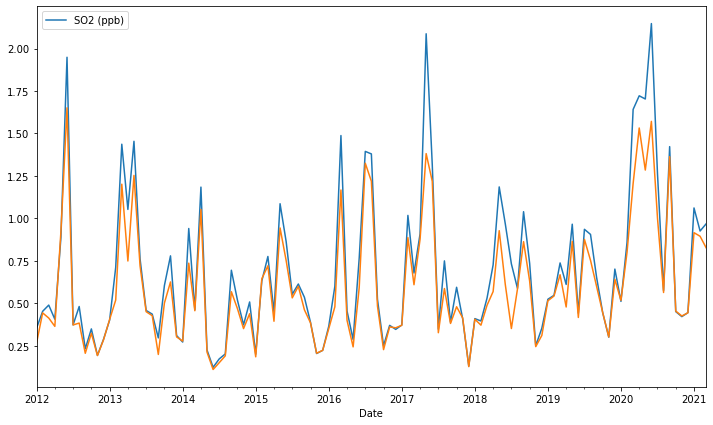

In [ ]:
A = 'M'
df1_w['SO2 (ppb)'].resample(A).mean().plot(legend = True,figsize = (12,7))
df1_w_c['SO2 (ppb)'].resample(A).mean().plot()


In [ ]:
print(len(df1_w_c)*100/len(df1_w))

95.7188423226751


[0]	validation_0-rmse:2.54214
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:2.51366
[2]	validation_0-rmse:2.49162
[3]	validation_0-rmse:2.47051
[4]	validation_0-rmse:2.45251
[5]	validation_0-rmse:2.44055
[6]	validation_0-rmse:2.4293
[7]	validation_0-rmse:2.41785
[8]	validation_0-rmse:2.40808
[9]	validation_0-rmse:2.39682
[10]	validation_0-rmse:2.38967
[11]	validation_0-rmse:2.38136
[12]	validation_0-rmse:2.3749
[13]	validation_0-rmse:2.37058
[14]	validation_0-rmse:2.36497
[15]	validation_0-rmse:2.35992
[16]	validation_0-rmse:2.35545
[17]	validation_0-rmse:2.35181
[18]	validation_0-rmse:2.34762
[19]	validation_0-rmse:2.34577
[20]	validation_0-rmse:2.33849
[21]	validation_0-rmse:2.33409
[22]	validation_0-rmse:2.32848
[23]	validation_0-rmse:2.32384
[24]	validation_0-rmse:2.3207
[25]	validation_0-rmse:2.31893
[26]	validation_0-rmse:2.31671
[27]	validation_0-rmse:2.31556
[28]	validation_0-rmse:2.31292
[29]	validation_0-rmse:2.31194
[30]	validation_0-

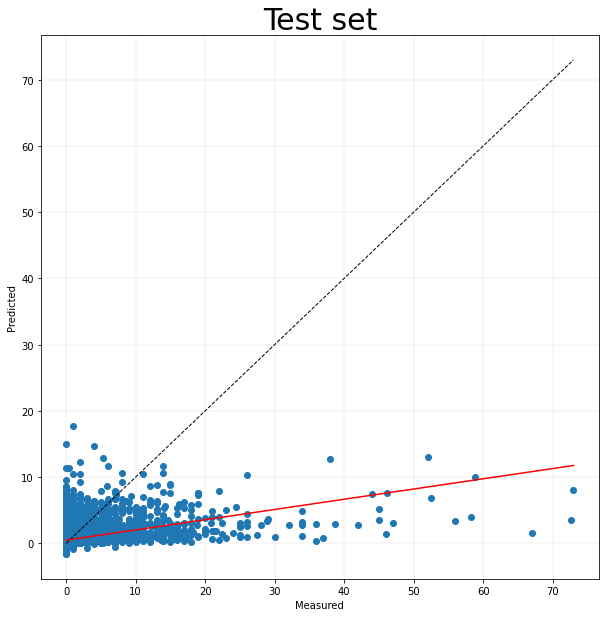

[0.15439667 0.47498191]
RMSE
[2.25405158]
R2
0.16820208367869594


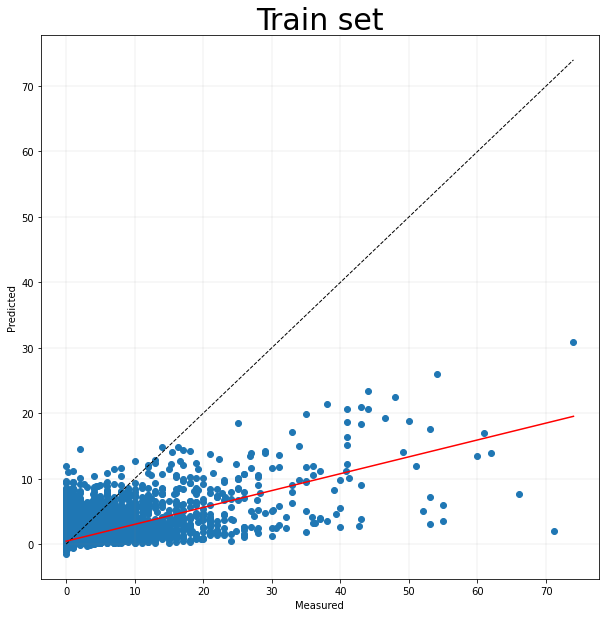

[0.25791265 0.43360668]
RMSE
[2.02119281]
R2
0.33598654571767717


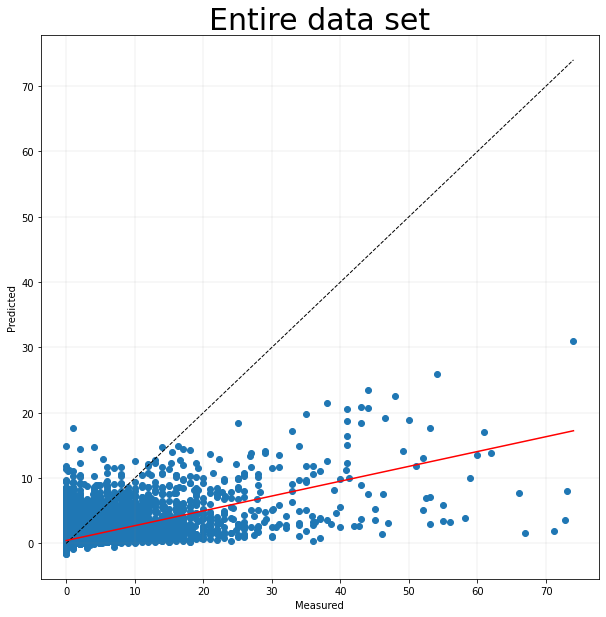

[0.22701558 0.4459712 ]
RMSE
[2.09377176]
R2
0.28590456012193666


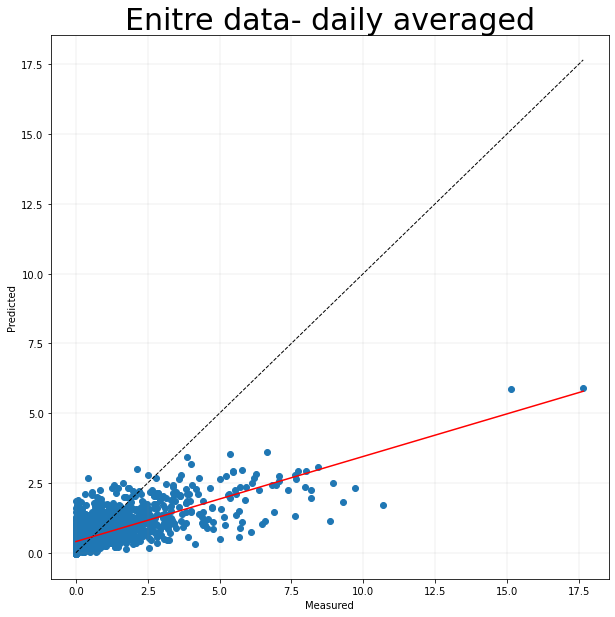

[0.30496075 0.39939303]
RMSE
[0.88556282]
R2
0.42697090574092444


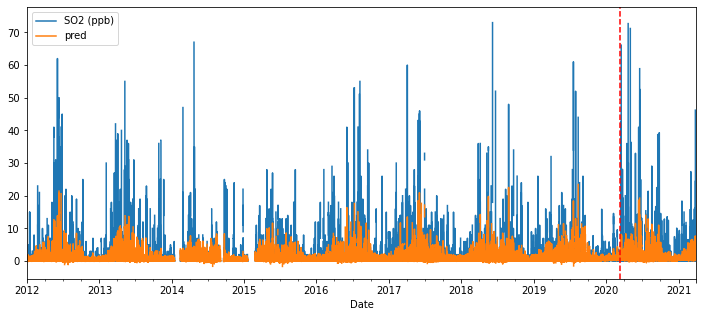

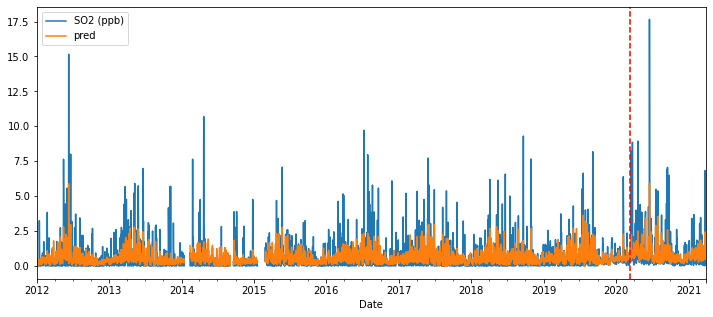

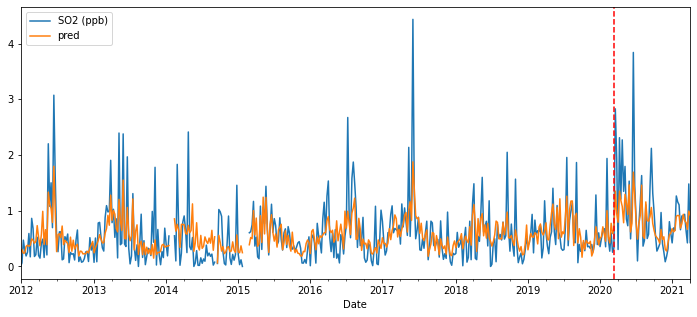

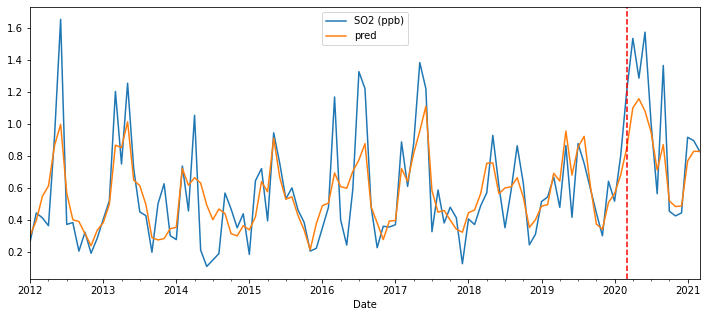

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy() #hereee
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10['SO2 (ppb)']).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4['SO2 (ppb)'].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4.columns

Index(['SO2 (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [  'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]
test_col = ['SO2 (ppb)']


df1_w_c = df1_w[['SO2 (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
        ]]
Y = df1_w_c[ 'SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2['SO2 (ppb)'] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 ['SO2 (ppb)'] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Buffalo Viewpoint_outlier_2012_brwRH_OT_XG_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Buffalo Viewpoint_outlier_2012_brwRH_OT_XG_Test.csv')


[2.03074255]
0.3296970556929647
[2.26103379]
0.1630409064329339


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
246
1.2080031633377075
2021-01-18 01:00:00
243
0.5798417329788208
2021-01-18 02:00:00
247
0.5869645476341248
2021-01-18 03:00:00
241
0.5744079351425171
2021-01-18 04:00:00
246
0.5939134955406189
2021-01-18 05:00:00
242
0.5859517455101013
2021-01-18 06:00:00
239
0.597129225730896
2021-01-18 07:00:00
243
0.5951772332191467
2021-01-18 08:00:00
244
0.6187137365341187
2021-01-18 09:00:00
240
0.587358295917511
2021-01-18 10:00:00
235
0.7094524502754211
2021-01-18 11:00:00
223
0.7472256422042847
2021-01-18 12:00:00
227
0.8429639339447021
2021-01-18 13:00:00
229
0.9493749737739563
2021-01-18 14:00:00
235
0.9795047044754028
2021-01-18 15:00:00
240
0.9609566926956177
2021-01-18 16:00:00
238
0.8617711663246155
2021-01-18 17:00:00
243
0.7905492782592773
2021-01-18 18:00:00
244
0.7669183015823364
2021-01-18 20:00:00
244
1.163116455078125
2021-01-18 22:00:00
244
1.2093604803085327
2021-01-18 23:00:00
241
1.1902083158493042
2021-01-19 00:00:00
244
0.

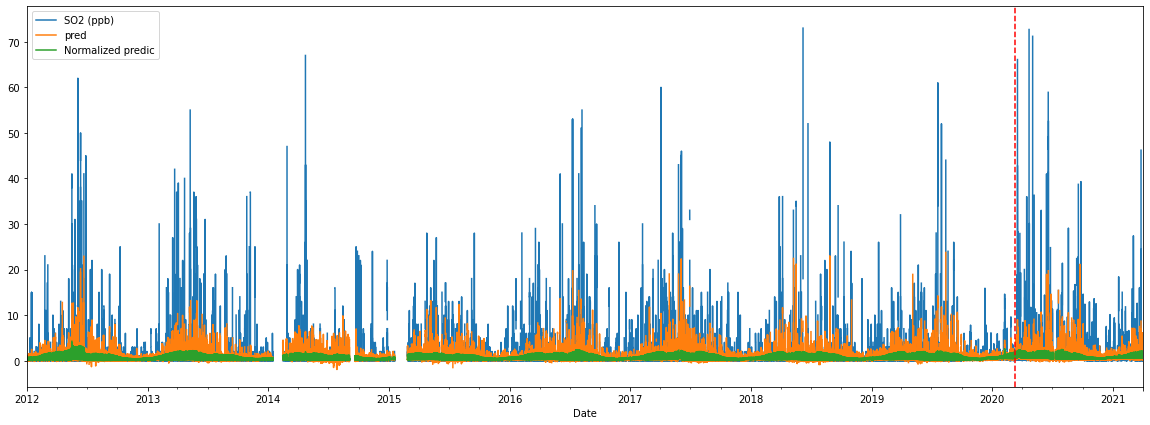

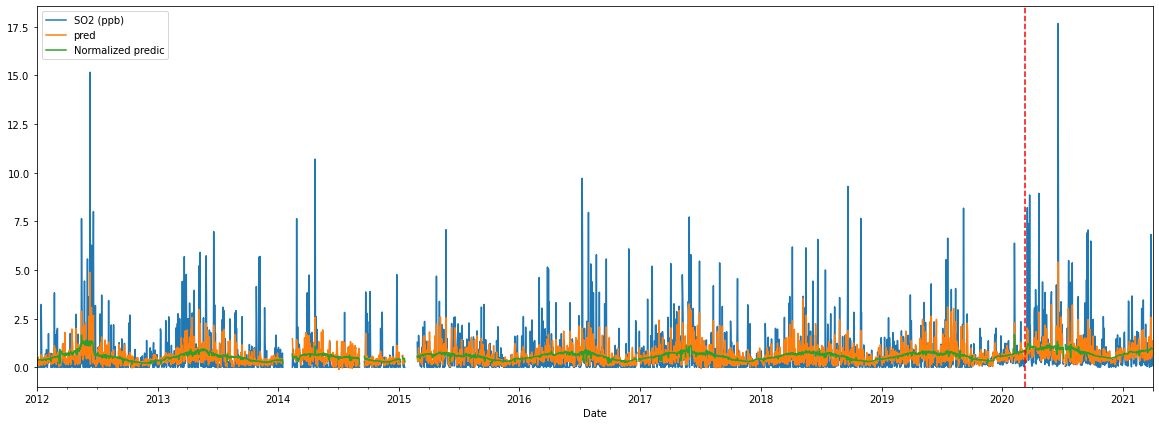

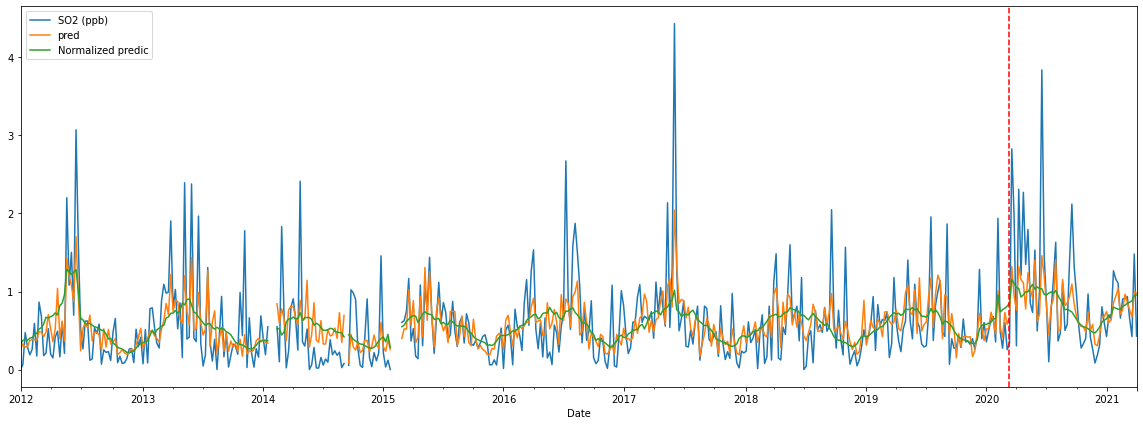

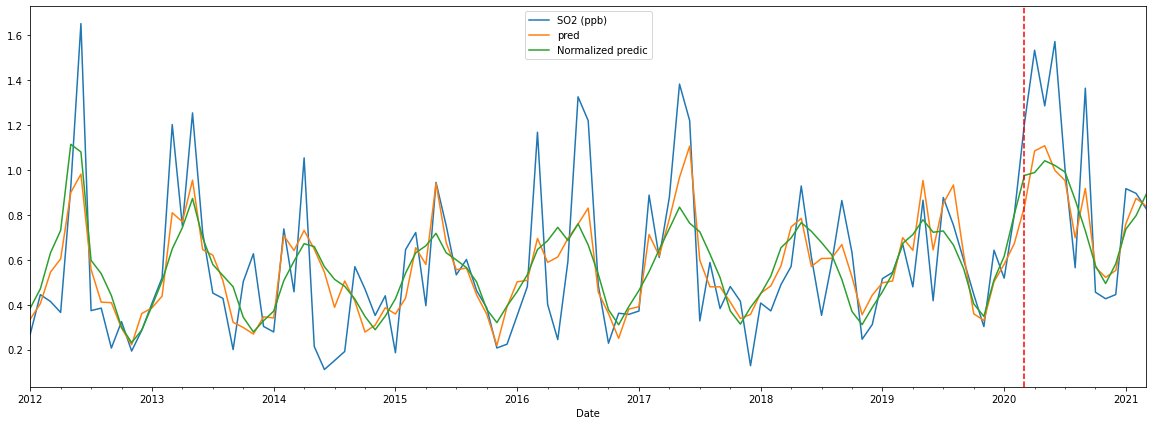

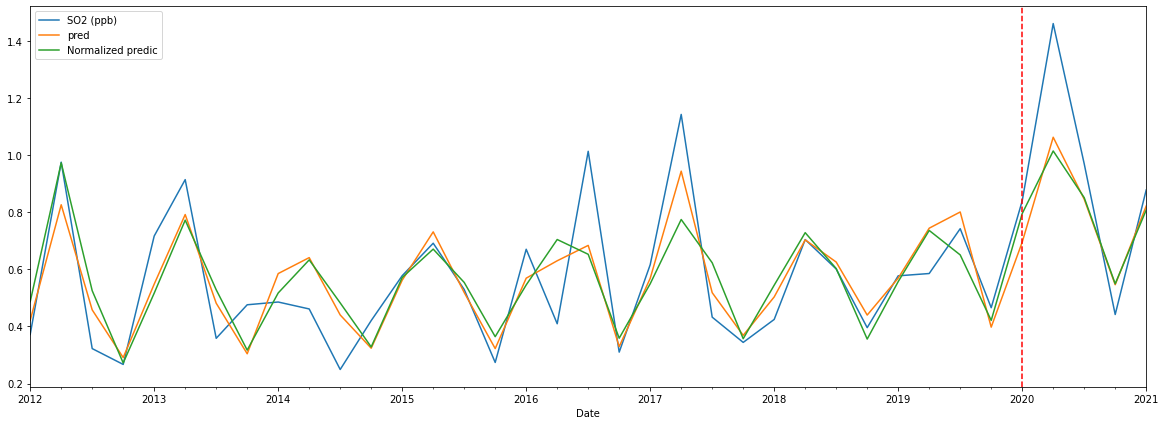

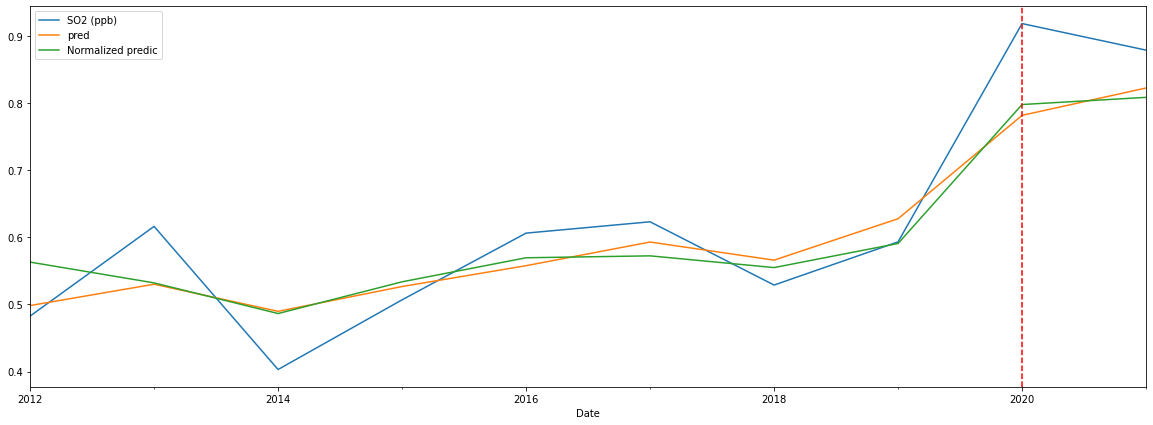

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_outlier_2012_brwRH_SO2_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_outlier_2012_brwlRH_SO2_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_outlier_2012_brwRH_SO2_Monthly_normalized_pred.csv')

for i in ['H','D','W','M','Q','Y']:
    df4_h['SO2 (ppb)'].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
######################### DOne

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.696964172367998 4.783614655325343


In [ ]:
df1_w

SO2 (ppb)  T ( C)  RH %  ...  Day-year      trend      score
Date                                          ...                                
2015-01-01 00:00:00        0.0   -13.1  85.0  ...         1  15.000000   9.958333
2015-01-01 01:00:00        0.0   -13.4  81.0  ...         1  15.000114   8.478571
2015-01-01 02:00:00        0.0   -13.9  78.0  ...         1  15.000228   3.699048
2015-01-01 03:00:00        0.0   -14.4  77.0  ...         1  15.000342   5.956038
2015-01-01 04:00:00        0.0   -14.6  78.0  ...         1  15.000455  10.314286
...                        ...     ...   ...  ...       ...        ...        ...
2021-03-31 19:00:00        3.8     2.3  71.5  ...        90  21.245332   6.136870
2021-03-31 20:00:00       23.2     3.1  66.8  ...        90  21.245446   6.066667
2021-03-31 21:00:00       48.1     5.7  47.6  ...        90  21.245560  20.311667
2021-03-31 22:00:00       25.2     5.7  46.0  ...        90  21.245674  14.442105
2021-03-31 23:00:00        7.5     4.9  48.5  ...        90  21.245788   2.383951

[51689 rows x 15 columns]

In [ ]:
df1_w

SO2 (ppb)  T ( C)  RH %  ...  Day-year      trend      score
Date                                          ...                                
2015-01-01 00:00:00        0.0   -13.1  85.0  ...         1  15.000000   9.958333
2015-01-01 01:00:00        0.0   -13.4  81.0  ...         1  15.000114   8.478571
2015-01-01 02:00:00        0.0   -13.9  78.0  ...         1  15.000228   3.699048
2015-01-01 03:00:00        0.0   -14.4  77.0  ...         1  15.000342   5.956038
2015-01-01 04:00:00        0.0   -14.6  78.0  ...         1  15.000455  10.314286
...                        ...     ...   ...  ...       ...        ...        ...
2021-03-31 19:00:00        3.8     2.3  71.5  ...        90  21.245332   6.136870
2021-03-31 20:00:00       23.2     3.1  66.8  ...        90  21.245446   6.066667
2021-03-31 21:00:00       48.1     5.7  47.6  ...        90  21.245560  20.311667
2021-03-31 22:00:00       25.2     5.7  46.0  ...        90  21.245674  14.442105
2021-03-31 23:00:00        7.5     4.9  48.5  ...        90  21.245788   2.383951

[51689 rows x 15 columns]

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1

    def __call__(self, trial):        
        dict_params = {
                        "score" : trial.suggest_float( 'score', avg + 2*std, avg + 5 * std ),
                        'layers': trial.suggest_int('layers', 2,3),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                        'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 20,40),
                        'delta': trial.suggest_float(  'delta',1, 100),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 20,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.5)

        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.5)


        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn['SO2 (ppb)']
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array( self.df_nn[  self.df_nn.columns[1:]])
        self.X_train =self.X
        self.y_train =self.Y
        # self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

          
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha= dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss=
                      # 'mse',
                      tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/Buffalo Viewpoint_outlier_2015_realRH_SO2" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 4
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 

        print(acc)
        return acc    

In [ ]:
objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
study = optuna.create_study(direction=optimizer_direction, study_name='Buffalo Viewpoint_outlier_2015_realRH_sc1__NN', storage='sqlite:///Buffalo Viewpoint_outlier_2015_realRH__sc1__NN.db',
                            load_if_exists=True)
study.optimize(objective, n_trials=1000)
df_results = study.trials_dataframe()
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_OT_Buffalo Viewpoint_outlier_2015_realRH_HUBer.csv')
#df_results.to_pickle('Desktop\heel\df_optuna_results.pkl')

[I 2021-05-15 21:13:55,895] A new study created in RDB with name: LowerCamp_sc1__NN
[I 2021-05-15 21:15:19,384] Trial 0 finished with value: 32.44246150281066 and parameters: {'score': 22.74343814168778, 'layers': 3, 'alpha': 0.5718952574834066, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 51.566482300937096, 'learning_rate': 0.09499891692634714, 'drop_out1': 0.27766925747538695, 'num_dense_nodes2': 31, 'drop_out2': 0.0662051991112424, 'num_dense_nodes3': 22, 'drop_out3': 0.4585530724709682}. Best is trial 0 with value: 32.44246150281066.


32.44246150281066


[I 2021-05-15 21:27:38,025] Trial 1 finished with value: 30.016344209897838 and parameters: {'score': 23.125604733019834, 'layers': 2, 'alpha': 0.28715333709661006, 'batchsize': 100.0, 'num_dense_nodes1': 33, 'delta': 7.752887948245851, 'learning_rate': 0.02110352914111733, 'drop_out1': 0.1205241686311767, 'num_dense_nodes2': 34, 'drop_out2': 0.22280210266720202}. Best is trial 1 with value: 30.016344209897838.


30.016344209897838


[I 2021-05-15 21:28:56,922] Trial 2 finished with value: 27.444636755289288 and parameters: {'score': 17.12255434083067, 'layers': 2, 'alpha': 0.328080504077228, 'batchsize': 2600.0, 'num_dense_nodes1': 32, 'delta': 16.30970153337138, 'learning_rate': 0.07698397948651664, 'drop_out1': 0.19062233097869663, 'num_dense_nodes2': 33, 'drop_out2': 0.4949540474033388}. Best is trial 2 with value: 27.444636755289288.


27.444636755289288


[I 2021-05-15 21:30:08,157] Trial 3 finished with value: 30.55670537764635 and parameters: {'score': 17.651752353164046, 'layers': 2, 'alpha': 0.8158930399140812, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 26.574446804013938, 'learning_rate': 0.07121681738723704, 'drop_out1': 0.12591690376619075, 'num_dense_nodes2': 31, 'drop_out2': 0.43806624451429127}. Best is trial 2 with value: 27.444636755289288.


30.55670537764635


[I 2021-05-15 21:31:46,546] Trial 4 finished with value: 26.69079294018942 and parameters: {'score': 19.697333036969518, 'layers': 3, 'alpha': 0.2188631416664782, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 94.9323158679262, 'learning_rate': 0.02314162090309784, 'drop_out1': 0.21684698870690639, 'num_dense_nodes2': 39, 'drop_out2': 0.13517085149675834, 'num_dense_nodes3': 18, 'drop_out3': 0.4459209726068198}. Best is trial 4 with value: 26.69079294018942.


26.69079294018942


[I 2021-05-15 21:33:17,717] Trial 5 finished with value: 30.769111781998273 and parameters: {'score': 29.260568846326244, 'layers': 2, 'alpha': 0.26429515647530943, 'batchsize': 2100.0, 'num_dense_nodes1': 25, 'delta': 20.223174957744906, 'learning_rate': 0.01652018545749028, 'drop_out1': 0.07254938104328311, 'num_dense_nodes2': 36, 'drop_out2': 0.3270784854866441}. Best is trial 4 with value: 26.69079294018942.


30.769111781998273


[I 2021-05-15 21:45:37,940] Trial 6 finished with value: 28.68261746604627 and parameters: {'score': 20.424507800581196, 'layers': 2, 'alpha': 0.1757284793719951, 'batchsize': 100.0, 'num_dense_nodes1': 39, 'delta': 69.69204937360767, 'learning_rate': 0.07425346205534464, 'drop_out1': 0.16651391127957638, 'num_dense_nodes2': 36, 'drop_out2': 0.053786191987472795}. Best is trial 4 with value: 26.69079294018942.


28.68261746604627


[I 2021-05-15 21:47:06,445] Trial 7 finished with value: 32.912081631070166 and parameters: {'score': 17.03309881018968, 'layers': 3, 'alpha': 0.22431384995611486, 'batchsize': 2100.0, 'num_dense_nodes1': 36, 'delta': 88.11256879513299, 'learning_rate': 0.02484597053212287, 'drop_out1': 0.06285511313909252, 'num_dense_nodes2': 21, 'drop_out2': 0.4391729780790036, 'num_dense_nodes3': 25, 'drop_out3': 0.38804555211175484}. Best is trial 4 with value: 26.69079294018942.


32.912081631070166


[I 2021-05-15 21:48:25,736] Trial 8 finished with value: 27.673212072724148 and parameters: {'score': 16.880363072172344, 'layers': 2, 'alpha': 0.4732342291504343, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 36.19948987803978, 'learning_rate': 0.06071598636181419, 'drop_out1': 0.210704736326355, 'num_dense_nodes2': 33, 'drop_out2': 0.2785852675154638}. Best is trial 4 with value: 26.69079294018942.


27.673212072724148


[I 2021-05-15 21:49:36,806] Trial 9 finished with value: 32.92174451812602 and parameters: {'score': 26.59475674779388, 'layers': 2, 'alpha': 0.3525072565419778, 'batchsize': 4600.0, 'num_dense_nodes1': 39, 'delta': 2.031638374994987, 'learning_rate': 0.06549297015824125, 'drop_out1': 0.05450742074008687, 'num_dense_nodes2': 25, 'drop_out2': 0.11345156087109363}. Best is trial 4 with value: 26.69079294018942.


32.92174451812602


[I 2021-05-15 21:51:37,911] Trial 10 finished with value: 45.64925940824081 and parameters: {'score': 19.771539991141463, 'layers': 3, 'alpha': 0.051480891013493874, 'batchsize': 1100.0, 'num_dense_nodes1': 22, 'delta': 92.20340522213303, 'learning_rate': 0.03719378582640205, 'drop_out1': 0.28258383132203607, 'num_dense_nodes2': 40, 'drop_out2': 0.1625358419001737, 'num_dense_nodes3': 6, 'drop_out3': 0.09929544686771719}. Best is trial 4 with value: 26.69079294018942.


45.64925940824081


[I 2021-05-15 21:53:38,272] Trial 11 finished with value: 26.4778287829141 and parameters: {'score': 15.532536107003322, 'layers': 3, 'alpha': 0.035808782960198904, 'batchsize': 1100.0, 'num_dense_nodes1': 30, 'delta': 56.70686975984202, 'learning_rate': 0.09664011490547826, 'drop_out1': 0.22009158729260575, 'num_dense_nodes2': 40, 'drop_out2': 0.3678511113612687, 'num_dense_nodes3': 13, 'drop_out3': 0.275873620835238}. Best is trial 11 with value: 26.4778287829141.


26.4778287829141


[I 2021-05-15 21:55:44,279] Trial 12 finished with value: 31.47361792810684 and parameters: {'score': 15.370654873793091, 'layers': 3, 'alpha': 0.015172186467135612, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 71.59306413494747, 'learning_rate': 0.0011157622896055472, 'drop_out1': 0.23782149257636748, 'num_dense_nodes2': 40, 'drop_out2': 0.376913018609361, 'num_dense_nodes3': 11, 'drop_out3': 0.23434320842470732}. Best is trial 11 with value: 26.4778287829141.


31.47361792810684


[I 2021-05-15 21:57:46,801] Trial 13 finished with value: 27.674172872860844 and parameters: {'score': 20.27353634737545, 'layers': 3, 'alpha': 0.09893989531991443, 'batchsize': 1100.0, 'num_dense_nodes1': 22, 'delta': 57.019264939579834, 'learning_rate': 0.09587039262218887, 'drop_out1': 0.24082526961083153, 'num_dense_nodes2': 40, 'drop_out2': 0.20934567216685313, 'num_dense_nodes3': 16, 'drop_out3': 0.279439196059858}. Best is trial 11 with value: 26.4778287829141.


27.674172872860844


[I 2021-05-15 21:59:28,571] Trial 14 finished with value: 31.517507303821816 and parameters: {'score': 25.454735050910248, 'layers': 3, 'alpha': 0.014518595828776348, 'batchsize': 1600.0, 'num_dense_nodes1': 26, 'delta': 98.864831246369, 'learning_rate': 0.04443031681107985, 'drop_out1': 0.23432734237774977, 'num_dense_nodes2': 27, 'drop_out2': 0.3475110180964544, 'num_dense_nodes3': 39, 'drop_out3': 0.33312625867787937}. Best is trial 11 with value: 26.4778287829141.


31.517507303821816


[I 2021-05-15 22:02:30,023] Trial 15 finished with value: 43.051558992180844 and parameters: {'score': 15.431498941564609, 'layers': 3, 'alpha': 0.12615524593789695, 'batchsize': 600.0, 'num_dense_nodes1': 30, 'delta': 79.68087042176582, 'learning_rate': 0.005008589572351875, 'drop_out1': 0.15376591956215518, 'num_dense_nodes2': 37, 'drop_out2': 0.27214046301966965, 'num_dense_nodes3': 20, 'drop_out3': 0.1322182874131962}. Best is trial 11 with value: 26.4778287829141.


43.051558992180844


[I 2021-05-15 22:03:43,846] Trial 16 finished with value: 29.1044307797278 and parameters: {'score': 18.831011148250013, 'layers': 3, 'alpha': 0.5906109801488665, 'batchsize': 3600.0, 'num_dense_nodes1': 34, 'delta': 40.97251248504913, 'learning_rate': 0.03006974975525257, 'drop_out1': 0.1995459870510125, 'num_dense_nodes2': 38, 'drop_out2': 0.40846214605185555, 'num_dense_nodes3': 29, 'drop_out3': 0.48597388974610395}. Best is trial 11 with value: 26.4778287829141.


29.1044307797278


[I 2021-05-15 22:05:22,327] Trial 17 finished with value: 30.332227551006646 and parameters: {'score': 21.381136419417345, 'layers': 3, 'alpha': 0.4197556286425039, 'batchsize': 1600.0, 'num_dense_nodes1': 24, 'delta': 61.431395415970535, 'learning_rate': 0.05084966247235244, 'drop_out1': 0.26064796841850263, 'num_dense_nodes2': 28, 'drop_out2': 0.49882397880073887, 'num_dense_nodes3': 12, 'drop_out3': 0.21415492523759938}. Best is trial 11 with value: 26.4778287829141.


30.332227551006646


[I 2021-05-15 22:08:21,278] Trial 18 finished with value: 32.736189969273894 and parameters: {'score': 24.726613882947746, 'layers': 3, 'alpha': 0.16477781073466388, 'batchsize': 600.0, 'num_dense_nodes1': 29, 'delta': 99.7009553707303, 'learning_rate': 0.0075913856020210085, 'drop_out1': 0.204404375955869, 'num_dense_nodes2': 20, 'drop_out2': 0.1240670386780242, 'num_dense_nodes3': 6, 'drop_out3': 0.4064465058949438}. Best is trial 11 with value: 26.4778287829141.


32.736189969273894


[I 2021-05-15 22:09:40,100] Trial 19 finished with value: 28.38289820472533 and parameters: {'score': 15.292444669287171, 'layers': 3, 'alpha': 0.8228862835564958, 'batchsize': 3100.0, 'num_dense_nodes1': 20, 'delta': 81.09699869166207, 'learning_rate': 0.05170328826987708, 'drop_out1': 0.13962519549591923, 'num_dense_nodes2': 38, 'drop_out2': 0.2930463244510062, 'num_dense_nodes3': 15, 'drop_out3': 0.17082812662437946}. Best is trial 11 with value: 26.4778287829141.


28.38289820472533


[I 2021-05-15 22:11:20,197] Trial 20 finished with value: 34.72892771300355 and parameters: {'score': 18.69945055230022, 'layers': 3, 'alpha': 0.012873087935463615, 'batchsize': 1600.0, 'num_dense_nodes1': 29, 'delta': 41.86163531570118, 'learning_rate': 0.08961438388373805, 'drop_out1': 0.178566967423529, 'num_dense_nodes2': 40, 'drop_out2': 0.2117734123347269, 'num_dense_nodes3': 31, 'drop_out3': 0.33206933065442845}. Best is trial 11 with value: 26.4778287829141.


34.72892771300355


[I 2021-05-15 22:12:36,877] Trial 21 finished with value: 26.810974907378892 and parameters: {'score': 16.75462385563659, 'layers': 2, 'alpha': 0.3493564124177567, 'batchsize': 3100.0, 'num_dense_nodes1': 32, 'delta': 19.221507926277326, 'learning_rate': 0.08511831683857621, 'drop_out1': 0.18407556519315535, 'num_dense_nodes2': 34, 'drop_out2': 0.48932455901136784}. Best is trial 11 with value: 26.4778287829141.


26.810974907378892


[I 2021-05-15 22:13:47,515] Trial 22 finished with value: 28.34996560781977 and parameters: {'score': 18.538543975085563, 'layers': 2, 'alpha': 0.41323202020696104, 'batchsize': 4600.0, 'num_dense_nodes1': 36, 'delta': 34.99944360907331, 'learning_rate': 0.08563173555741997, 'drop_out1': 0.22248565942014573, 'num_dense_nodes2': 35, 'drop_out2': 0.4666645507837379}. Best is trial 11 with value: 26.4778287829141.


28.34996560781977


[I 2021-05-15 22:15:00,887] Trial 23 finished with value: 27.100092020354047 and parameters: {'score': 15.921847649916874, 'layers': 3, 'alpha': 0.5221652740713588, 'batchsize': 3600.0, 'num_dense_nodes1': 31, 'delta': 11.7783365347073, 'learning_rate': 0.0989692252617867, 'drop_out1': 0.2596320954792667, 'num_dense_nodes2': 38, 'drop_out2': 0.39176415333150033, 'num_dense_nodes3': 18, 'drop_out3': 0.058268908911149}. Best is trial 11 with value: 26.4778287829141.


27.100092020354047


[I 2021-05-15 22:16:29,045] Trial 24 finished with value: 28.07945382361856 and parameters: {'score': 21.308179696108034, 'layers': 2, 'alpha': 0.22121379568542182, 'batchsize': 2100.0, 'num_dense_nodes1': 35, 'delta': 23.346211365415016, 'learning_rate': 0.08053993952428054, 'drop_out1': 0.18033321210442305, 'num_dense_nodes2': 38, 'drop_out2': 0.33028142081478684}. Best is trial 11 with value: 26.4778287829141.


28.07945382361856


[I 2021-05-15 22:17:49,100] Trial 25 finished with value: 27.929155876690025 and parameters: {'score': 16.39065612834197, 'layers': 3, 'alpha': 0.6666672936542352, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 65.85745085326182, 'learning_rate': 0.05872545745826237, 'drop_out1': 0.21842350391378826, 'num_dense_nodes2': 33, 'drop_out2': 0.16329567439918702, 'num_dense_nodes3': 9, 'drop_out3': 0.42616266016023546}. Best is trial 11 with value: 26.4778287829141.


27.929155876690025


[I 2021-05-15 22:20:43,868] Trial 26 finished with value: 26.2967382327763 and parameters: {'score': 18.01299761549273, 'layers': 3, 'alpha': 0.3542586170253257, 'batchsize': 600.0, 'num_dense_nodes1': 32, 'delta': 47.43617412602815, 'learning_rate': 0.08653805622336348, 'drop_out1': 0.09282153016631396, 'num_dense_nodes2': 29, 'drop_out2': 0.24972624754698208, 'num_dense_nodes3': 26, 'drop_out3': 0.3404194912304739}. Best is trial 26 with value: 26.2967382327763.


26.2967382327763


[I 2021-05-15 22:23:40,907] Trial 27 finished with value: 34.11897329967335 and parameters: {'score': 17.987712966327756, 'layers': 3, 'alpha': 0.13425708586963042, 'batchsize': 600.0, 'num_dense_nodes1': 24, 'delta': 46.15467240486264, 'learning_rate': 0.012860196367379567, 'drop_out1': 0.0831480551656844, 'num_dense_nodes2': 29, 'drop_out2': 0.2559147452941177, 'num_dense_nodes3': 28, 'drop_out3': 0.3343622786813686}. Best is trial 26 with value: 26.2967382327763.


34.11897329967335


[I 2021-05-15 22:36:40,189] Trial 28 finished with value: 25.624203531943706 and parameters: {'score': 19.195684170013926, 'layers': 3, 'alpha': 0.08341402448581314, 'batchsize': 100.0, 'num_dense_nodes1': 31, 'delta': 54.63143109768162, 'learning_rate': 0.03587826755340667, 'drop_out1': 0.260678180337867, 'num_dense_nodes2': 25, 'drop_out2': 0.16908847056321302, 'num_dense_nodes3': 37, 'drop_out3': 0.25548290202436263}. Best is trial 28 with value: 25.624203531943706.


25.624203531943706


[I 2021-05-15 22:49:41,336] Trial 29 finished with value: 33.67457821075857 and parameters: {'score': 23.00871928896074, 'layers': 3, 'alpha': 0.7503610373325564, 'batchsize': 100.0, 'num_dense_nodes1': 34, 'delta': 53.323514503189635, 'learning_rate': 0.03866517786988132, 'drop_out1': 0.29360052668455633, 'num_dense_nodes2': 24, 'drop_out2': 0.23825103151832672, 'num_dense_nodes3': 40, 'drop_out3': 0.2762976294729234}. Best is trial 28 with value: 25.624203531943706.


33.67457821075857


[I 2021-05-15 22:52:37,388] Trial 30 finished with value: 33.04885444636944 and parameters: {'score': 21.697413103008202, 'layers': 3, 'alpha': 0.06769118080412806, 'batchsize': 600.0, 'num_dense_nodes1': 31, 'delta': 48.41674903409873, 'learning_rate': 0.09160324907982437, 'drop_out1': 0.09719424199561284, 'num_dense_nodes2': 23, 'drop_out2': 0.08036362292860733, 'num_dense_nodes3': 35, 'drop_out3': 0.2328222085108296}. Best is trial 28 with value: 25.624203531943706.


33.04885444636944


[I 2021-05-15 22:54:37,712] Trial 31 finished with value: 29.048700353149684 and parameters: {'score': 19.60194153214521, 'layers': 3, 'alpha': 0.2204108541324811, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 59.90474925617376, 'learning_rate': 0.030216264591183907, 'drop_out1': 0.26824570390239233, 'num_dense_nodes2': 26, 'drop_out2': 0.16402625136272844, 'num_dense_nodes3': 14, 'drop_out3': 0.36882399622871026}. Best is trial 28 with value: 25.624203531943706.


29.048700353149684


[I 2021-05-15 23:07:34,074] Trial 32 finished with value: 26.94097694628433 and parameters: {'score': 19.09793704738191, 'layers': 3, 'alpha': 0.28435219168999887, 'batchsize': 100.0, 'num_dense_nodes1': 32, 'delta': 31.523456845279842, 'learning_rate': 0.034937981181470526, 'drop_out1': 0.24900468702072184, 'num_dense_nodes2': 31, 'drop_out2': 0.11668316748231228, 'num_dense_nodes3': 24, 'drop_out3': 0.2944803228793036}. Best is trial 28 with value: 25.624203531943706.


26.94097694628433


[I 2021-05-15 23:09:14,563] Trial 33 finished with value: 34.56559427034492 and parameters: {'score': 17.87048174603587, 'layers': 3, 'alpha': 0.0818024795581409, 'batchsize': 1600.0, 'num_dense_nodes1': 28, 'delta': 49.664214065627945, 'learning_rate': 0.02031450978362184, 'drop_out1': 0.27875534606437, 'num_dense_nodes2': 22, 'drop_out2': 0.18182152995910916, 'num_dense_nodes3': 35, 'drop_out3': 0.1919830795312995}. Best is trial 28 with value: 25.624203531943706.


34.56559427034492


[I 2021-05-15 23:12:11,092] Trial 34 finished with value: 27.052451239280664 and parameters: {'score': 20.609113101653712, 'layers': 3, 'alpha': 0.32082355414799435, 'batchsize': 600.0, 'num_dense_nodes1': 33, 'delta': 76.541899949476, 'learning_rate': 0.04224465857795445, 'drop_out1': 0.2246812652693671, 'num_dense_nodes2': 29, 'drop_out2': 0.19357851921134916, 'num_dense_nodes3': 19, 'drop_out3': 0.30868652402129226}. Best is trial 28 with value: 25.624203531943706.


27.052451239280664


[I 2021-05-15 23:25:10,787] Trial 35 finished with value: 27.57264693536024 and parameters: {'score': 22.021388322323325, 'layers': 3, 'alpha': 0.17511019704120062, 'batchsize': 100.0, 'num_dense_nodes1': 26, 'delta': 42.42778895151561, 'learning_rate': 0.02776953118425224, 'drop_out1': 0.2973701000569413, 'num_dense_nodes2': 30, 'drop_out2': 0.1410507010908634, 'num_dense_nodes3': 17, 'drop_out3': 0.24118774582857896}. Best is trial 28 with value: 25.624203531943706.


27.57264693536024


[I 2021-05-15 23:27:10,857] Trial 36 finished with value: 25.397414651625347 and parameters: {'score': 18.067664761138065, 'layers': 3, 'alpha': 0.40020787871409974, 'batchsize': 1100.0, 'num_dense_nodes1': 31, 'delta': 54.66906326258713, 'learning_rate': 0.04641954691593256, 'drop_out1': 0.16496383664414488, 'num_dense_nodes2': 27, 'drop_out2': 0.0870568511356404, 'num_dense_nodes3': 21, 'drop_out3': 0.4997092845753459}. Best is trial 36 with value: 25.397414651625347.


25.397414651625347


[I 2021-05-15 23:29:11,092] Trial 37 finished with value: 27.25438115833466 and parameters: {'score': 17.670807792139417, 'layers': 3, 'alpha': 0.6147503117124671, 'batchsize': 1100.0, 'num_dense_nodes1': 31, 'delta': 64.23974406525925, 'learning_rate': 0.055893600167731976, 'drop_out1': 0.11645303094722384, 'num_dense_nodes2': 26, 'drop_out2': 0.08262382359047131, 'num_dense_nodes3': 34, 'drop_out3': 0.25439236357361394}. Best is trial 36 with value: 25.397414651625347.


27.25438115833466


[I 2021-05-15 23:32:06,953] Trial 38 finished with value: 26.44546851722197 and parameters: {'score': 16.05180438701173, 'layers': 3, 'alpha': 0.5300986572059759, 'batchsize': 600.0, 'num_dense_nodes1': 33, 'delta': 53.22553278583683, 'learning_rate': 0.046205642328575144, 'drop_out1': 0.16006104236922772, 'num_dense_nodes2': 27, 'drop_out2': 0.2404044549314629, 'num_dense_nodes3': 26, 'drop_out3': 0.4938991876619974}. Best is trial 36 with value: 25.397414651625347.


26.44546851722197


[I 2021-05-15 23:35:02,814] Trial 39 finished with value: 26.435015832249682 and parameters: {'score': 16.23562996648096, 'layers': 3, 'alpha': 0.4798040181207419, 'batchsize': 600.0, 'num_dense_nodes1': 37, 'delta': 53.12823084085074, 'learning_rate': 0.06508733360620525, 'drop_out1': 0.15586220090940708, 'num_dense_nodes2': 27, 'drop_out2': 0.23985315717030828, 'num_dense_nodes3': 27, 'drop_out3': 0.49233955011328095}. Best is trial 36 with value: 25.397414651625347.


26.435015832249682


[I 2021-05-15 23:47:55,993] Trial 40 finished with value: 29.657970578778507 and parameters: {'score': 18.056937028747587, 'layers': 3, 'alpha': 0.46946373569420674, 'batchsize': 100.0, 'num_dense_nodes1': 37, 'delta': 30.109222849944715, 'learning_rate': 0.07166824542230232, 'drop_out1': 0.14431212470567123, 'num_dense_nodes2': 24, 'drop_out2': 0.29479844031012764, 'num_dense_nodes3': 21, 'drop_out3': 0.4751078808323678}. Best is trial 36 with value: 25.397414651625347.


29.657970578778507


[I 2021-05-15 23:50:50,888] Trial 41 finished with value: 26.711580644939076 and parameters: {'score': 16.127566302798314, 'layers': 3, 'alpha': 0.5390380271740792, 'batchsize': 600.0, 'num_dense_nodes1': 33, 'delta': 52.82292680956114, 'learning_rate': 0.04574604441712042, 'drop_out1': 0.16477842439666524, 'num_dense_nodes2': 27, 'drop_out2': 0.23931802850597503, 'num_dense_nodes3': 26, 'drop_out3': 0.49846800246742373}. Best is trial 36 with value: 25.397414651625347.


26.711580644939076


[I 2021-05-16 00:03:37,925] Trial 42 finished with value: 27.101317505321514 and parameters: {'score': 16.83028165857668, 'layers': 3, 'alpha': 0.40507491930019385, 'batchsize': 100.0, 'num_dense_nodes1': 38, 'delta': 44.86074585481264, 'learning_rate': 0.06387942380659647, 'drop_out1': 0.11254840462579696, 'num_dense_nodes2': 28, 'drop_out2': 0.22634208300877262, 'num_dense_nodes3': 24, 'drop_out3': 0.4549564869052406}. Best is trial 36 with value: 25.397414651625347.


27.101317505321514


[I 2021-05-16 00:06:32,639] Trial 43 finished with value: 27.60494256629475 and parameters: {'score': 17.41689553654092, 'layers': 3, 'alpha': 0.5252894492538505, 'batchsize': 600.0, 'num_dense_nodes1': 34, 'delta': 56.06715056187218, 'learning_rate': 0.05353844707018237, 'drop_out1': 0.13635301779183945, 'num_dense_nodes2': 31, 'drop_out2': 0.26204201821909584, 'num_dense_nodes3': 22, 'drop_out3': 0.4987604697171739}. Best is trial 36 with value: 25.397414651625347.


27.60494256629475


[I 2021-05-16 00:19:24,613] Trial 44 finished with value: 29.155991176658382 and parameters: {'score': 17.216677988207394, 'layers': 3, 'alpha': 0.6284943417629711, 'batchsize': 100.0, 'num_dense_nodes1': 40, 'delta': 70.3645236288272, 'learning_rate': 0.046230478992448636, 'drop_out1': 0.16277544548833078, 'num_dense_nodes2': 25, 'drop_out2': 0.30236733731858717, 'num_dense_nodes3': 32, 'drop_out3': 0.4372340479516392}. Best is trial 36 with value: 25.397414651625347.


29.155991176658382


[I 2021-05-16 00:22:19,804] Trial 45 finished with value: 28.22341793119275 and parameters: {'score': 16.169723882019827, 'layers': 3, 'alpha': 0.6919368690919416, 'batchsize': 600.0, 'num_dense_nodes1': 32, 'delta': 36.97250832316283, 'learning_rate': 0.066519931138659, 'drop_out1': 0.10505313231254523, 'num_dense_nodes2': 27, 'drop_out2': 0.05343911738429085, 'num_dense_nodes3': 27, 'drop_out3': 0.4557140547474045}. Best is trial 36 with value: 25.397414651625347.


28.22341793119275


[I 2021-05-16 00:24:18,890] Trial 46 finished with value: 27.000934312235053 and parameters: {'score': 19.350565628097424, 'layers': 3, 'alpha': 0.49857216333452314, 'batchsize': 1100.0, 'num_dense_nodes1': 36, 'delta': 51.63889691548932, 'learning_rate': 0.03350101183028088, 'drop_out1': 0.12989296113035662, 'num_dense_nodes2': 29, 'drop_out2': 0.18786596275651501, 'num_dense_nodes3': 30, 'drop_out3': 0.3941796726650784}. Best is trial 36 with value: 25.397414651625347.


27.000934312235053


[I 2021-05-16 00:37:09,525] Trial 47 finished with value: 27.053643365230563 and parameters: {'score': 18.466601827577612, 'layers': 3, 'alpha': 0.37108320968118674, 'batchsize': 100.0, 'num_dense_nodes1': 35, 'delta': 65.81118544181031, 'learning_rate': 0.047051491977616225, 'drop_out1': 0.15503401066390982, 'num_dense_nodes2': 26, 'drop_out2': 0.09616409340614648, 'num_dense_nodes3': 23, 'drop_out3': 0.36561004573886924}. Best is trial 36 with value: 25.397414651625347.


27.053643365230563


[I 2021-05-16 00:39:10,748] Trial 48 finished with value: 27.26204910570441 and parameters: {'score': 20.091344840715735, 'layers': 3, 'alpha': 0.42987488331665474, 'batchsize': 1100.0, 'num_dense_nodes1': 31, 'delta': 60.24573453132966, 'learning_rate': 0.03971983941721391, 'drop_out1': 0.09225587650172777, 'num_dense_nodes2': 25, 'drop_out2': 0.24714488156618217, 'num_dense_nodes3': 26, 'drop_out3': 0.4702962967538275}. Best is trial 36 with value: 25.397414651625347.


27.26204910570441


[I 2021-05-16 00:42:08,421] Trial 49 finished with value: 33.82293971814042 and parameters: {'score': 28.317832130829412, 'layers': 3, 'alpha': 0.5753469818547359, 'batchsize': 600.0, 'num_dense_nodes1': 29, 'delta': 55.606545207570996, 'learning_rate': 0.07850346714552531, 'drop_out1': 0.15017641214826008, 'num_dense_nodes2': 28, 'drop_out2': 0.14134406483166476, 'num_dense_nodes3': 38, 'drop_out3': 0.4173318932672269}. Best is trial 36 with value: 25.397414651625347.


33.82293971814042


[I 2021-05-16 00:43:47,087] Trial 50 finished with value: 25.40389716758322 and parameters: {'score': 15.76986493305688, 'layers': 3, 'alpha': 0.4538400751865601, 'batchsize': 1600.0, 'num_dense_nodes1': 33, 'delta': 47.208309630137975, 'learning_rate': 0.05652269656058018, 'drop_out1': 0.1929252647679451, 'num_dense_nodes2': 30, 'drop_out2': 0.209090561387407, 'num_dense_nodes3': 22, 'drop_out3': 0.4936792151088791}. Best is trial 36 with value: 25.397414651625347.


25.40389716758322


[I 2021-05-16 00:45:15,497] Trial 51 finished with value: 24.983857355870672 and parameters: {'score': 15.638503352339013, 'layers': 3, 'alpha': 0.4827100153066824, 'batchsize': 2100.0, 'num_dense_nodes1': 33, 'delta': 47.370289550474205, 'learning_rate': 0.06114790585224158, 'drop_out1': 0.18987037283351677, 'num_dense_nodes2': 32, 'drop_out2': 0.21236816027571032, 'num_dense_nodes3': 22, 'drop_out3': 0.4920745490140649}. Best is trial 51 with value: 24.983857355870672.


24.983857355870672


[I 2021-05-16 00:46:43,401] Trial 52 finished with value: 26.26617310307182 and parameters: {'score': 16.72297427048878, 'layers': 3, 'alpha': 0.45274794237908694, 'batchsize': 2100.0, 'num_dense_nodes1': 35, 'delta': 47.686045000208395, 'learning_rate': 0.06879373547146303, 'drop_out1': 0.18950018910823277, 'num_dense_nodes2': 32, 'drop_out2': 0.21074885858437747, 'num_dense_nodes3': 21, 'drop_out3': 0.47327880522044496}. Best is trial 51 with value: 24.983857355870672.


26.26617310307182


[I 2021-05-16 00:48:11,220] Trial 53 finished with value: 23.41349320432268 and parameters: {'score': 15.412125228117725, 'layers': 3, 'alpha': 0.31264362749348784, 'batchsize': 2100.0, 'num_dense_nodes1': 33, 'delta': 38.47436237663646, 'learning_rate': 0.05946793464050216, 'drop_out1': 0.19982183788879007, 'num_dense_nodes2': 32, 'drop_out2': 0.20985032857308464, 'num_dense_nodes3': 20, 'drop_out3': 0.44959315624277324}. Best is trial 53 with value: 23.41349320432268.


23.41349320432268


[I 2021-05-16 00:49:39,742] Trial 54 finished with value: 24.568478848710967 and parameters: {'score': 15.310190073468837, 'layers': 3, 'alpha': 0.4536712164965853, 'batchsize': 2100.0, 'num_dense_nodes1': 35, 'delta': 37.27935744413173, 'learning_rate': 0.05985539927306841, 'drop_out1': 0.19613754895635313, 'num_dense_nodes2': 32, 'drop_out2': 0.20582125785019986, 'num_dense_nodes3': 20, 'drop_out3': 0.4725425275262306}. Best is trial 53 with value: 23.41349320432268.


24.568478848710967


[I 2021-05-16 00:51:01,320] Trial 55 finished with value: 23.668213235476095 and parameters: {'score': 15.389372735312717, 'layers': 3, 'alpha': 0.2568421862029068, 'batchsize': 2600.0, 'num_dense_nodes1': 33, 'delta': 38.375467090508764, 'learning_rate': 0.06016298954227202, 'drop_out1': 0.19446488072626583, 'num_dense_nodes2': 32, 'drop_out2': 0.17257877517757567, 'num_dense_nodes3': 19, 'drop_out3': 0.44375214178380756}. Best is trial 53 with value: 23.41349320432268.


23.668213235476095


[I 2021-05-16 00:52:22,231] Trial 56 finished with value: 23.111336005165786 and parameters: {'score': 15.347009812993864, 'layers': 3, 'alpha': 0.31400065531780086, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'delta': 38.22314375819587, 'learning_rate': 0.05958305249979937, 'drop_out1': 0.19713248780312811, 'num_dense_nodes2': 32, 'drop_out2': 0.19473674902561733, 'num_dense_nodes3': 19, 'drop_out3': 0.44162892851103225}. Best is trial 56 with value: 23.111336005165786.


23.111336005165786


[I 2021-05-16 00:53:42,601] Trial 57 finished with value: 22.944284388402103 and parameters: {'score': 15.343731366470433, 'layers': 3, 'alpha': 0.29946652094202936, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'delta': 37.65786491276372, 'learning_rate': 0.06110065201218551, 'drop_out1': 0.20352997406687587, 'num_dense_nodes2': 32, 'drop_out2': 0.14931426869556463, 'num_dense_nodes3': 19, 'drop_out3': 0.4422263587710246}. Best is trial 57 with value: 22.944284388402103.


22.944284388402103


[I 2021-05-16 00:55:03,743] Trial 58 finished with value: 23.91383747461672 and parameters: {'score': 15.419726624085367, 'layers': 3, 'alpha': 0.26280484623743616, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'delta': 37.89089153224238, 'learning_rate': 0.06188756881183994, 'drop_out1': 0.20181174465910626, 'num_dense_nodes2': 32, 'drop_out2': 0.1969920409213222, 'num_dense_nodes3': 19, 'drop_out3': 0.43792661368667657}. Best is trial 57 with value: 22.944284388402103.


23.91383747461672


[I 2021-05-16 00:56:24,741] Trial 59 finished with value: 23.484589108314594 and parameters: {'score': 15.611774258416906, 'layers': 3, 'alpha': 0.2580172739170432, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'delta': 27.844343940876556, 'learning_rate': 0.07428699823880015, 'drop_out1': 0.2053689731724907, 'num_dense_nodes2': 34, 'drop_out2': 0.14163774317974914, 'num_dense_nodes3': 16, 'drop_out3': 0.44249320212589144}. Best is trial 57 with value: 22.944284388402103.


23.484589108314594


In [ ]:
study.best_trials

NameError: ignored

In [ ]:
study.best_params

{'alpha': 0.010026964771790553,
 'batchsize': 4600.0,
 'drop_out1': 0.11982723470887874,
 'drop_out2': 0.07229072584647446,
 'drop_out3': 0.33236972835617606,
 'layers': 3,
 'learning_rate': 0.034336486279251996,
 'num_dense_nodes1': 40,
 'num_dense_nodes2': 40,
 'num_dense_nodes3': 23}

In [ ]:
df1_w_cn=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_cn.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_outlier_Dataset.csv')

df1_w_c = df1_w_cn.copy()  
# df1_w_c = df1_w.copy() 
df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))
Y = df1_w_c['SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


{'alpha': 0.029824286582465206,
 'batchsize': 600.0,
 'delta': 46.41143349182145,
 'drop_out1': 0.05617055404279359,
 'drop_out2': 0.2079307175288454,
 'drop_out3': 0.1789477516621616,
 'layers': 3,
 'learning_rate': 0.00517669200188732,
 'num_dense_nodes1': 39,
 'num_dense_nodes2': 22,
 'num_dense_nodes3': 32}

In [ ]:
df1_w_c.columns

Index(['SO2 (ppb)', 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

In [ ]:
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_outlier_Dataset.csv')
Y = df1_w_c['SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds
best_params

{'alpha': 0.029824286582465206,
 'batchsize': 600.0,
 'delta': 46.41143349182145,
 'drop_out1': 0.05617055404279359,
 'drop_out2': 0.2079307175288454,
 'drop_out3': 0.1789477516621616,
 'layers': 3,
 'learning_rate': 0.00517669200188732,
 'num_dense_nodes1': 39,
 'num_dense_nodes2': 22,
 'num_dense_nodes3': 32}

In [ ]:
df1_w_c.columns

Index(['SO2 (ppb)', 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Epoch 1/250
60/60 - 1s - loss: 10.8584 - val_loss: 11.4763
Epoch 2/250
60/60 - 0s - loss: 10.0953 - val_loss: 11.0361
Epoch 3/250
60/60 - 0s - loss: 9.9146 - val_loss: 10.8695
Epoch 4/250
60/60 - 0s - loss: 9.8090 - val_loss: 10.8321
Epoch 5/250
60/60 - 0s - loss: 9.6837 - val_loss: 10.7212
Epoch 6/250
60/60 - 0s - loss: 9.6763 - val_loss: 10.5743
Epoch 7/250
60/60 - 0s - loss: 9.6151 - val_loss: 10.6376
Epoch 8/250
60/60 - 0s - loss: 9.6252 - val_loss: 10.7038
Epoch 9/250
60/60 - 0s - loss: 9.6091 - val_loss: 10.5054
Epoch 10/250
60/60 - 0s - loss: 9.5276 - val_loss: 10.5282
Epoch 11/250
60/60 - 0s - loss: 9.4140 - val_loss: 10.2895
Epoch 12/250
60/60 - 0s - loss: 9.2438 - val_loss: 9.9448
Epoch 13/250
60/60 - 0s - loss: 8.9852 - val_loss: 9.8148
Epoch 14/250
60/60 - 0s - loss: 8.8443 - val_loss: 9.5303
Epoch 15/250
60/60 - 0s - loss: 8.7993 - val_loss: 9.5527
Epoch 16/250
60/60 - 0s - loss: 8.7541 - val_loss: 9.5960
Epoch 17/250
60/60 - 0s - loss: 8.6956 - val_loss: 9.3499
Epoch 18/2

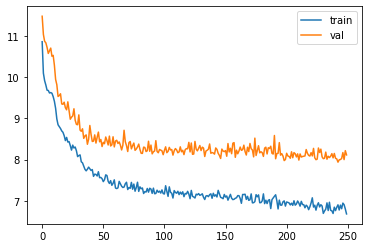

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 13)                52        
_________________________________________________________________
dense_24 (Dense)             (None, 39)                546       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 39)                0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 22)                880       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 22)                0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 22)               

In [ ]:
model_NN = Sequential()
model_NN.add(BatchNormalization())
model_NN.add(Dense(best_params ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha= best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out1']))
# if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
model_NN.add(Dense(best_params ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out2']))
if best_params ['layers'] == 3 :
    model_NN.add(Dense(best_params ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
    model_NN.add(Dropout(best_params ['drop_out3']))
model_NN.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params [ 'learning_rate'])
model_NN.compile(loss=
                #  'mse',
              tf.keras.losses.Huber( delta=best_params[ 'delta']),
              # 'mse'
                  optimizer=opt)
fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_SO2_Maildlake_OUT.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop_epochs),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model_NN.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model_NN.summary()

In [ ]:
model_NN.load_weights(fn)
precovid_model = 'gdrive/My Drive/Colab Notebooks/Buffalo Viewpoint_outlier_2015_realRH_SO2_OUT.h5'
model_NN.save(precovid_model )

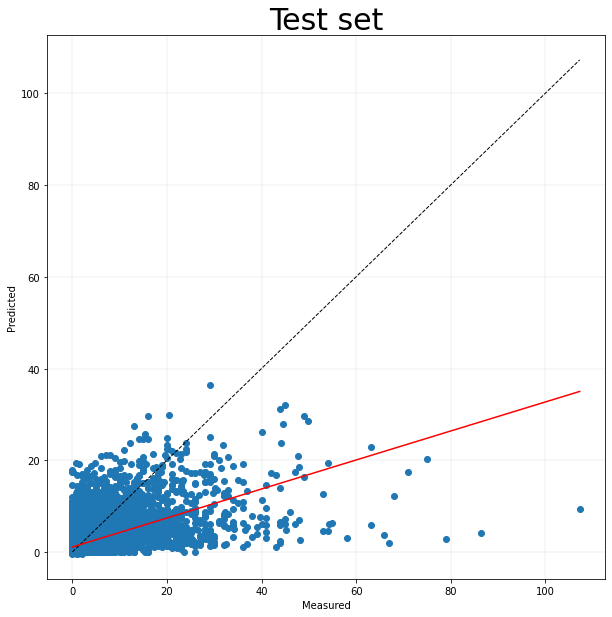

[0.3161367  1.08138476]
RMSE
[3.85796383]
R2
0.3292403742837593


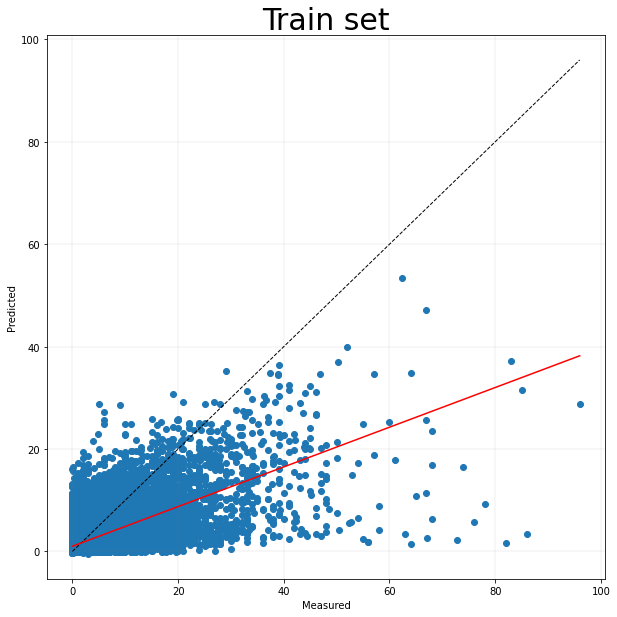

[0.38753534 1.00331146]
RMSE
[3.58459234]
R2
0.42809913053873083


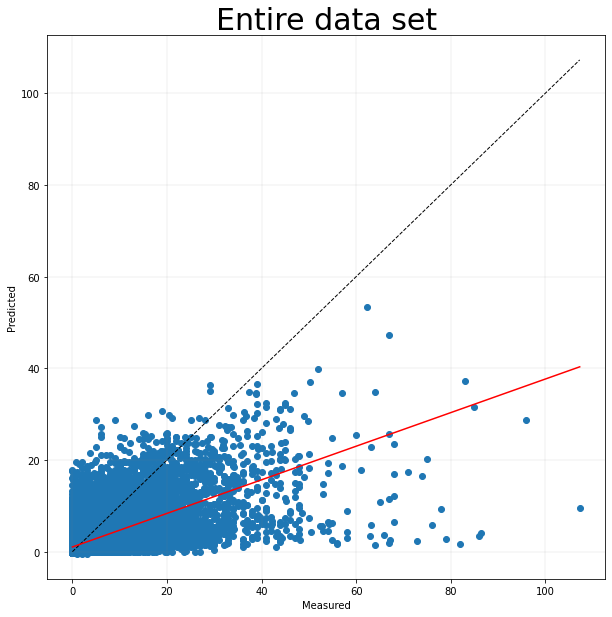

[0.36631408 1.02673476]
RMSE
[3.66874366]
R2
0.3987026774124599


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model_NN.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model_NN.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 13)                52        
_________________________________________________________________
dense_24 (Dense)             (None, 39)                546       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 39)                0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 22)                880       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 22)                0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 22)               

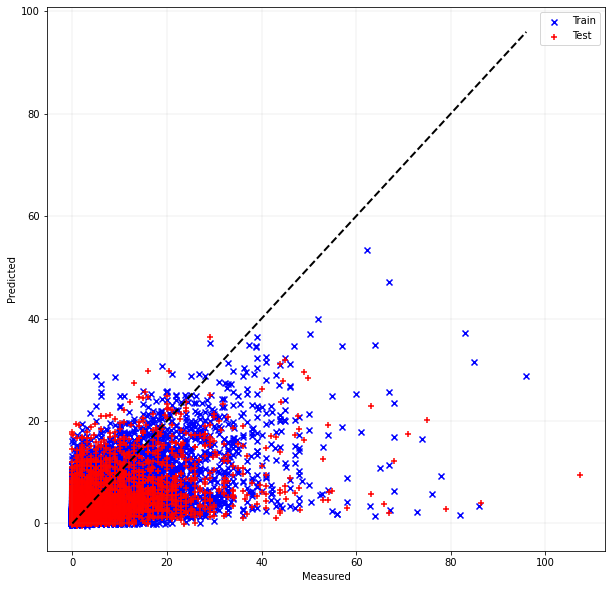

In [ ]:
model_NN = load_model(precovid_model )
model_NN.summary()
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [ ]:
# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model_NN.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

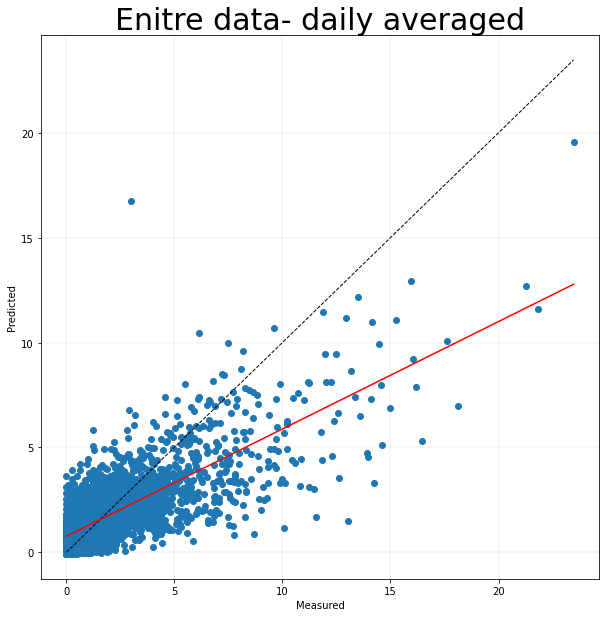

[0.51199839 0.75974635]
RMSE
[1.60179443]
R2
0.5643183771864706


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['SO2 (ppb)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

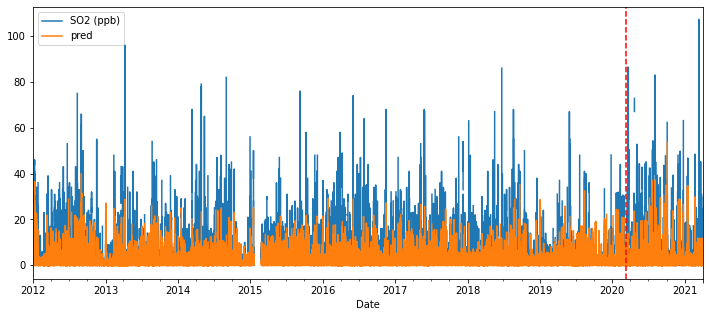

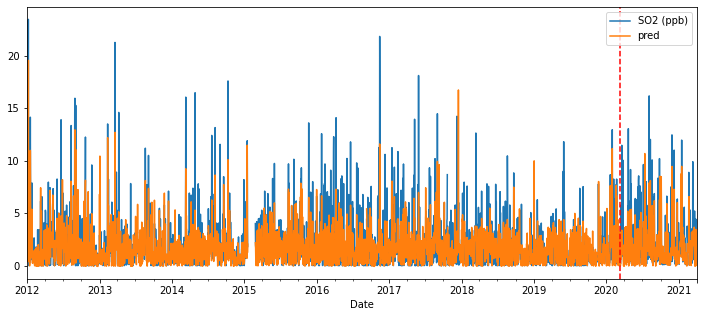

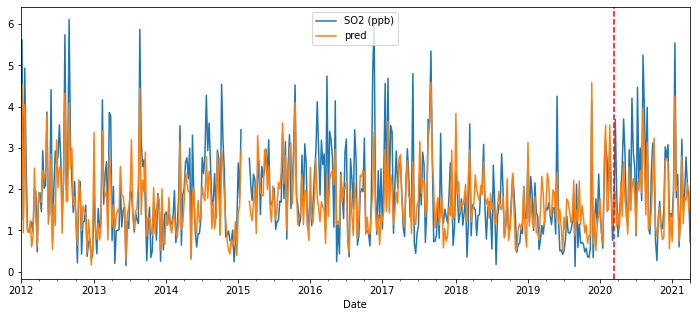

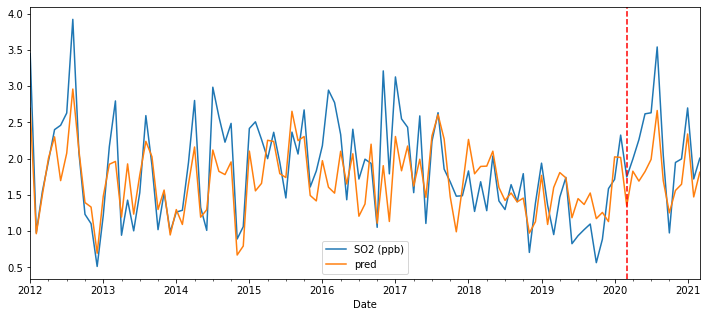

In [ ]:
df4['SO2 (ppb)'].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model_NN.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[3.58459234]
0.42809913053873083


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[3.85796383]
0.3292403742837593


In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model_NN.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model_NN.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [ 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend']
test_col = ['SO2 (ppb)']


df1_w_c = df1_w[['SO2 (ppb)', 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ 'SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2['SO2 (ppb)'] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 ['SO2 (ppb)'] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Buffalo Viewpoint_outlier_2015_realRH_NN_OR_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Buffalo Viewpoint_outlier_2015_realRH_NN_OR_Test.csv')

[3.58459234]
0.42809913053873083
[3.85796383]
0.3292403742837593


In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

In [ ]:
# df4_D = df4_h.resample('D').mean()
# df4_M = df4_h.resample('M').mean()
# df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Mannix_SO2_hourly_pred.csv')
# df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Mannix_SO_monthly_pred.csv')

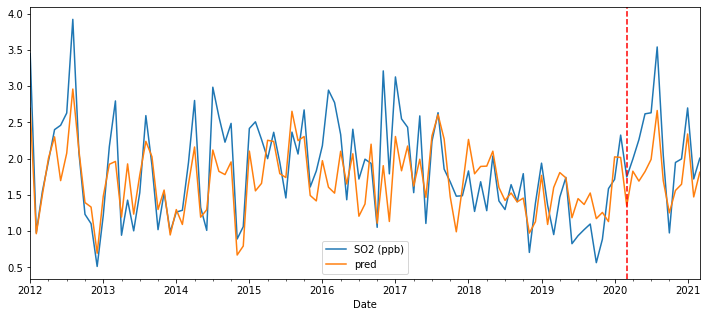

In [ ]:
df4_h['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4

SO2 (ppb)  T ( C)  ...  Day-year      trend
Date                                    ...                     
2012-01-01 00:00:00       39.0    -9.6  ...       1.0  12.000000
2012-01-01 03:00:00       11.0   -10.7  ...       1.0  12.000342
2012-01-01 04:00:00        7.0   -12.1  ...       1.0  12.000455
2012-01-01 05:00:00        6.0   -12.7  ...       1.0  12.000569
2012-01-01 06:00:00        2.0   -13.5  ...       1.0  12.000683
...                        ...     ...  ...       ...        ...
2021-03-31 19:00:00        0.1     4.2  ...      90.0  21.245332
2021-03-31 20:00:00        0.4     3.0  ...      90.0  21.245446
2021-03-31 21:00:00        0.3     4.4  ...      90.0  21.245560
2021-03-31 22:00:00        0.4     4.9  ...      90.0  21.245674
2021-03-31 23:00:00        0.3     3.7  ...      90.0  21.245788

[68443 rows x 14 columns]

In [ ]:
df4_h

SO2 (ppb)  T ( C)  ...      trend       pred
Date                                    ...                      
2012-01-01 00:00:00       39.0    -9.6  ...  12.000000  25.306244
2012-01-01 03:00:00       11.0   -10.7  ...  12.000342  24.881445
2012-01-01 04:00:00        7.0   -12.1  ...  12.000455   4.806237
2012-01-01 05:00:00        6.0   -12.7  ...  12.000569   5.298855
2012-01-01 06:00:00        2.0   -13.5  ...  12.000683   1.318628
...                        ...     ...  ...        ...        ...
2021-03-31 19:00:00        0.1     4.2  ...  21.245332   1.547847
2021-03-31 20:00:00        0.4     3.0  ...  21.245446   1.303448
2021-03-31 21:00:00        0.3     4.4  ...  21.245560   2.128119
2021-03-31 22:00:00        0.4     4.9  ...  21.245674   3.039878
2021-03-31 23:00:00        0.3     3.7  ...  21.245788   0.925715

[68443 rows x 15 columns]

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model_NN.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
225
1.560396432876587
2021-01-11 09:00:00
229
1.5463595390319824
2021-01-11 10:00:00
211
1.8514320850372314
2021-01-11 12:00:00
211
2.0801665782928467
2021-01-11 13:00:00
213
1.972387433052063
2021-01-11 14:00:00
211
2.080157995223999
2021-01-11 15:00:00
217
1.9373515844345093
2021-01-11 16:00:00
220
1.8203855752944946
2021-01-11 17:00:00
231
1.5972977876663208
2021-01-11 18:00:00
236
2.1417629718780518
2021-01-11 19:00:00
234
1.9803436994552612
2021-01-11 20:00:00
233
1.8249728679656982
2021-01-11 21:00:00
231
1.8306264877319336
2021-01-11 22:00:00
230
1.9736359119415283
2021-01-11 23:00:00
231
1.924904465675354
2021-01-12 01:00:00
94
1.7081568241119385
2021-01-12 02:00:00
94
2.0247397422790527
2021-01-12 03:00:00
192
1.72219979763031
2021-01-12 04:00:00
197
1.8618531227111816
2021-01-12 06:00:00
223
1.6304482221603394
2021-01-12 07:00:00
240
1.639586329460144
2021-01-12 08:00:00
234
1.5526959896087646
2021-01-12 09:00:00
238
1.535702

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_SO2_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_SO2_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_SO2_Monthly_normalized_pred.csv')


for i in ['H','D','W','M','Q']:
    df4_h['SO2 (ppb)'].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

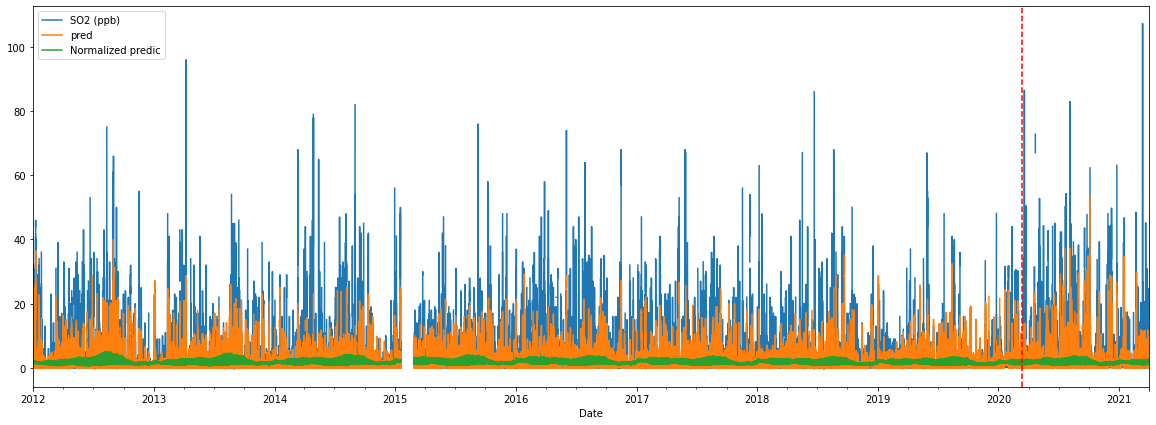

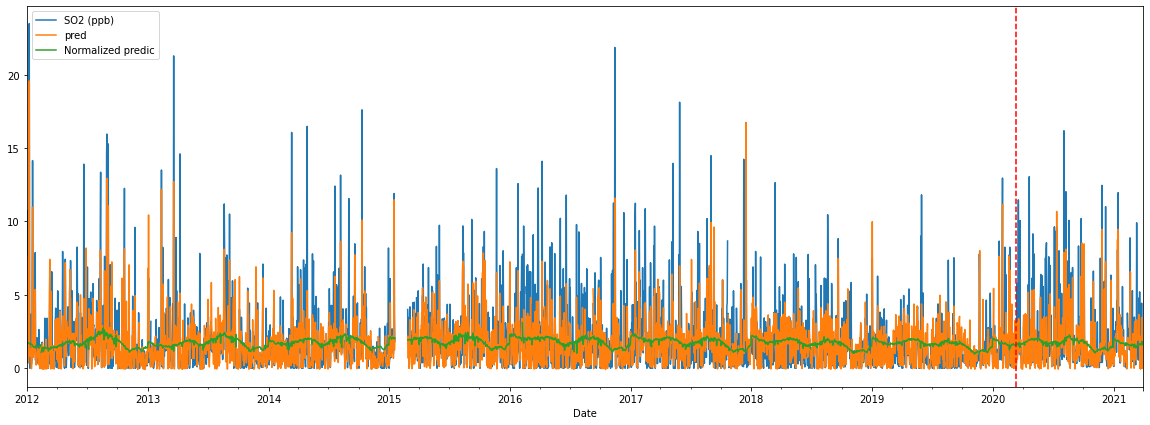

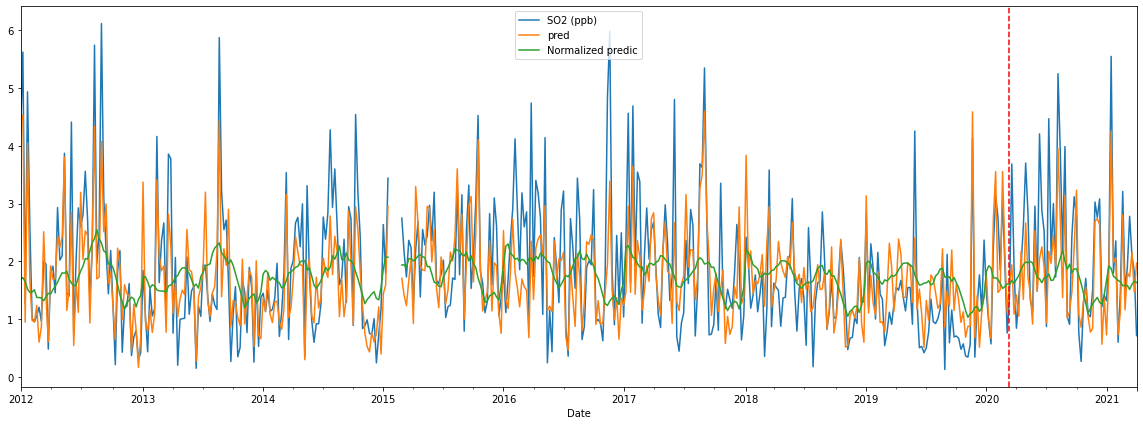

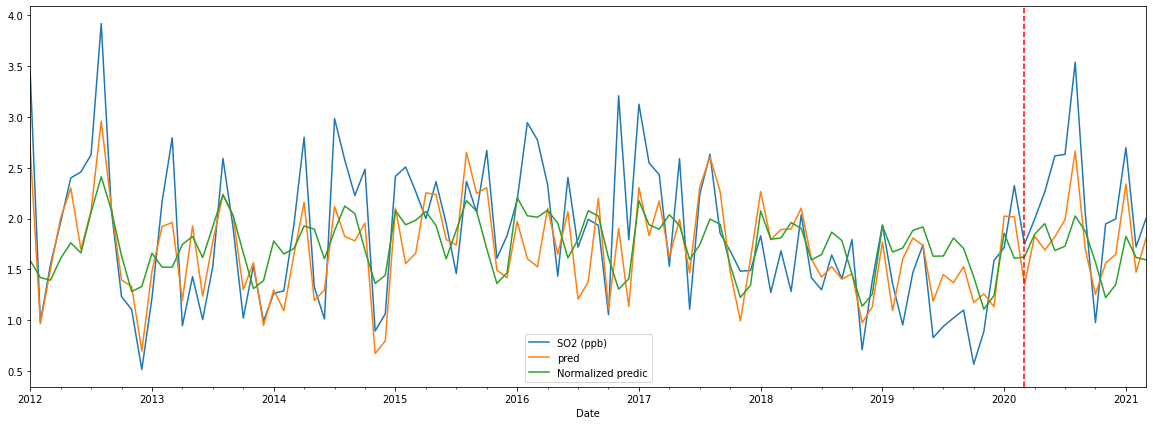

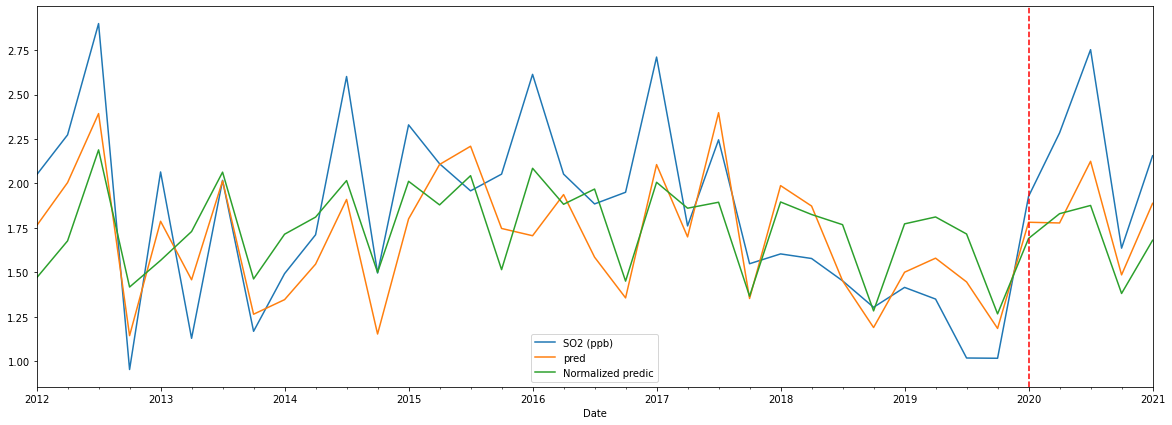

In [ ]:
for i in ['H','D','W','M','Q']:
    df4_h['SO2 (ppb)'].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

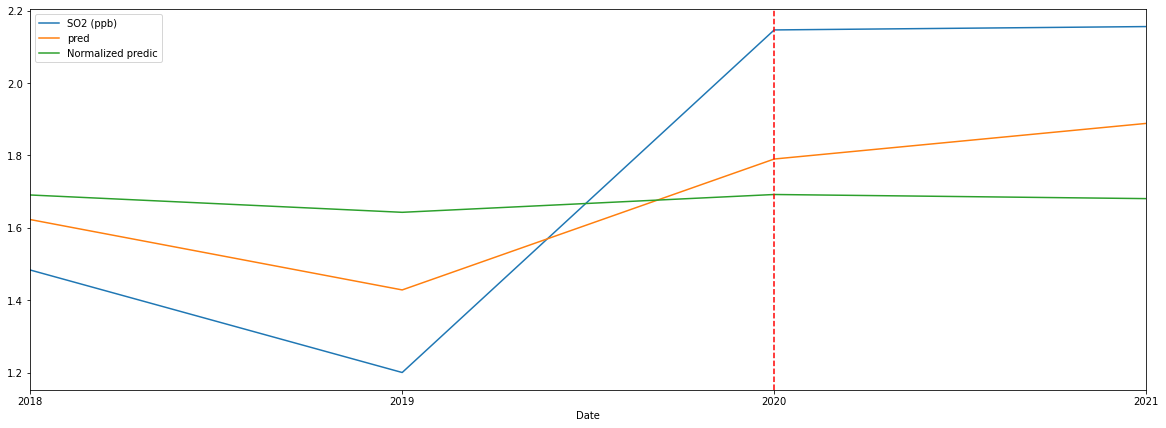

In [ ]:
df4_h['SO2 (ppb)'].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
####

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

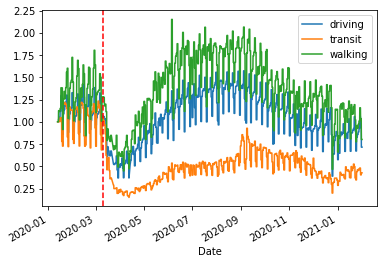

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] == 0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] == 1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

[I 2021-04-18 06:37:44,453] A new study created in RDB with name: east_edm_CO_p2
[I 2021-04-18 06:40:22,320] Trial 0 finished with value: 0.0047897337392556185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 3, 'batchsize': 1300.0, 'learning_rate': 0.08684742896034063, 'alpha': 0.47486431649895633, 'layer_back': 1}. Best is trial 0 with value: 0.0047897337392556185.


0.0047897337392556185


[I 2021-04-18 06:46:17,741] Trial 1 finished with value: 0.0037995427144006185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 200.0, 'learning_rate': 0.026645640165432177, 'alpha': 0.2464432589680267, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0037995427144006185


[I 2021-04-18 06:49:06,028] Trial 2 finished with value: 0.004990117939045318 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1200.0, 'learning_rate': 0.04246052710121524, 'alpha': 0.14036321226448864, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.004990117939045318


[I 2021-04-18 06:51:38,749] Trial 3 finished with value: 0.004435081840883617 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.08019349670014007, 'alpha': 0.801795208357617, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004435081840883617


[I 2021-04-18 06:55:41,325] Trial 4 finished with value: 0.004397006773851628 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 400.0, 'learning_rate': 0.0922021495386216, 'alpha': 0.8714206976745991, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004397006773851628


[I 2021-04-18 06:58:39,803] Trial 5 finished with value: 0.004472224808431502 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 1, 'batchsize': 900.0, 'learning_rate': 0.054032085513753485, 'alpha': 0.36356263089297863, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004472224808431502


[I 2021-04-18 07:02:19,968] Trial 6 finished with value: 0.004032658481373844 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 500.0, 'learning_rate': 0.0034103388646587085, 'alpha': 0.8298599523597091, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004032658481373844


[I 2021-04-18 07:04:57,913] Trial 7 finished with value: 0.004412881161440907 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1400.0, 'learning_rate': 0.024560851403922612, 'alpha': 0.8657303593335849, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004412881161440907


[I 2021-04-18 07:07:33,362] Trial 8 finished with value: 0.003962766007027832 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1600.0, 'learning_rate': 0.0387484515918348, 'alpha': 0.5935061142207385, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.003962766007027832


[I 2021-04-18 07:10:45,080] Trial 9 finished with value: 0.004464174746733434 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 700.0, 'learning_rate': 0.07156430296741274, 'alpha': 0.6837562117270939, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004464174746733434


[I 2021-04-18 07:20:10,927] Trial 10 finished with value: 0.0047593223285363065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.006393597974084786, 'alpha': 0.09784392044369339, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.0047593223285363065


[I 2021-04-18 07:22:40,517] Trial 11 finished with value: 0.0038559859859853907 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 4, 'batchsize': 1900.0, 'learning_rate': 0.029641261114048665, 'alpha': 0.3455488342982123, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0038559859859853907


[I 2021-04-18 07:25:12,650] Trial 12 finished with value: 0.0037802072596256108 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 2000.0, 'learning_rate': 0.021318248161901757, 'alpha': 0.27421676161966496, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.0037802072596256108


[I 2021-04-18 07:34:39,100] Trial 13 finished with value: 0.003838305552608133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.01618259930894679, 'alpha': 0.2237909588852787, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.003838305552608133


[I 2021-04-18 07:37:13,171] Trial 14 finished with value: 0.0037727934709037452 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 1600.0, 'learning_rate': 0.05463156741271952, 'alpha': 0.023432883667647286, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.0037727934709037452


[I 2021-04-18 07:39:46,194] Trial 15 finished with value: 0.004717376020706112 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.057774493852787316, 'alpha': 0.013468966566860257, 'layer_back': 1}. Best is trial 14 with value: 0.0037727934709037452.


0.004717376020706112


[I 2021-04-18 07:42:17,141] Trial 16 finished with value: 0.003891606393255513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 4, 'batchsize': 1600.0, 'learning_rate': 0.06483099406582218, 'alpha': 0.048701457819810334, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.003891606393255513


[I 2021-04-18 07:44:50,068] Trial 17 finished with value: 0.003705317767648349 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.042981081545902175, 'alpha': 0.17151924705879706, 'layer_back': 2}. Best is trial 17 with value: 0.003705317767648349.


0.003705317767648349


[I 2021-04-18 07:47:22,992] Trial 18 finished with value: 0.003652074267837431 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043120594200074316, 'alpha': 0.15356515832757994, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003652074267837431


[I 2021-04-18 07:49:56,748] Trial 19 finished with value: 0.004855364207538971 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.03948108446690251, 'alpha': 0.1731767923827432, 'layer_back': 1}. Best is trial 18 with value: 0.003652074267837431.


0.004855364207538971


[I 2021-04-18 07:52:46,818] Trial 20 finished with value: 0.0036661417054684184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.045596783441498825, 'alpha': 0.46487314129271234, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0036661417054684184


[I 2021-04-18 07:55:47,695] Trial 21 finished with value: 0.003772814522212643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.04376219782019011, 'alpha': 0.495381372771252, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003772814522212643


[I 2021-04-18 07:58:33,572] Trial 22 finished with value: 0.0037000579251144777 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03235269324681574, 'alpha': 0.40139723428257024, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037000579251144777


[I 2021-04-18 08:01:16,242] Trial 23 finished with value: 0.0037201394146138406 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.0335829823820747, 'alpha': 0.561915944028579, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037201394146138406


[I 2021-04-18 08:04:15,280] Trial 24 finished with value: 0.0037030372913319023 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.01268992251227287, 'alpha': 0.3938061003278891, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037030372913319023


[I 2021-04-18 08:07:38,080] Trial 25 finished with value: 0.003918046517575021 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.04897050026188292, 'alpha': 0.6753399284001078, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003918046517575021


[I 2021-04-18 08:10:15,782] Trial 26 finished with value: 0.0038008433695184197 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.06522149016140043, 'alpha': 0.42163733919230845, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0038008433695184197


[I 2021-04-18 08:13:05,072] Trial 27 finished with value: 0.0036111388857046787 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.03298839085103375, 'alpha': 0.3150552800923347, 'layer_back': 2}. Best is trial 27 with value: 0.0036111388857046787.


0.0036111388857046787


[I 2021-04-18 08:16:08,056] Trial 28 finished with value: 0.003597443791057043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.04885615301916258, 'alpha': 0.29269304131799223, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.003597443791057043


[I 2021-04-18 08:19:12,662] Trial 29 finished with value: 0.0046809329310916956 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.05995146156015323, 'alpha': 0.30446311601011683, 'layer_back': 1}. Best is trial 28 with value: 0.003597443791057043.


0.0046809329310916956


[I 2021-04-18 08:21:45,673] Trial 30 finished with value: 0.004425357656736 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.0759352310855712, 'alpha': 0.21269011576180244, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.004425357656736


[I 2021-04-18 08:24:37,569] Trial 31 finished with value: 0.0036547160400316313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.049811468875869416, 'alpha': 0.510738346787994, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0036547160400316313


[I 2021-04-18 08:27:52,823] Trial 32 finished with value: 0.0037521087301732345 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.049503947678833926, 'alpha': 0.31735277463906175, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037521087301732345


[I 2021-04-18 08:30:36,307] Trial 33 finished with value: 0.0037683419447327986 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.03290226547777786, 'alpha': 0.5286190169685012, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037683419447327986


[I 2021-04-18 08:33:27,324] Trial 34 finished with value: 0.003597358919918322 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.036818841872599595, 'alpha': 0.12570513379804832, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003597358919918322


[I 2021-04-18 08:37:26,272] Trial 35 finished with value: 0.003661138596451478 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 400.0, 'learning_rate': 0.03671876888449163, 'alpha': 0.08397801305678194, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003661138596451478


[I 2021-04-18 08:40:27,101] Trial 36 finished with value: 0.00359203525150731 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.02437141103670945, 'alpha': 0.12749087727003588, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00359203525150731


[I 2021-04-18 08:43:26,782] Trial 37 finished with value: 0.0036756314419160397 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.018931547569790746, 'alpha': 0.2516407308762111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036756314419160397


[I 2021-04-18 08:48:02,902] Trial 38 finished with value: 0.0036545643870157882 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 300.0, 'learning_rate': 0.02603462599572944, 'alpha': 0.14443719906111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036545643870157882


[I 2021-04-18 08:51:18,641] Trial 39 finished with value: 0.004398658143913983 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.02412418866542985, 'alpha': 0.09261962247455818, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.004398658143913983


[I 2021-04-18 08:54:03,235] Trial 40 finished with value: 0.00366032853048446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 1200.0, 'learning_rate': 0.028075997597257207, 'alpha': 0.20259126107498393, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00366032853048446


[I 2021-04-18 08:57:05,594] Trial 41 finished with value: 0.003674477629447893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.03773808729024592, 'alpha': 0.13311556018712936, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.003674477629447893


[I 2021-04-18 08:59:59,665] Trial 42 finished with value: 0.0036705861586692643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.014115297813961467, 'alpha': 0.28611068588955, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036705861586692643


[I 2021-04-18 09:03:13,164] Trial 43 finished with value: 0.0036713389468197555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.04560695580139573, 'alpha': 0.3437569312771207, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036713389468197555


[I 2021-04-18 09:06:35,814] Trial 44 finished with value: 0.0035783836209078556 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.009070889461271204, 'alpha': 0.13887248911600195, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035783836209078556


[I 2021-04-18 09:09:57,729] Trial 45 finished with value: 0.003673148714195081 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 600.0, 'learning_rate': 0.009253166791610645, 'alpha': 0.2451607156425593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003673148714195081


[I 2021-04-18 09:14:01,355] Trial 46 finished with value: 0.004344271113195811 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 400.0, 'learning_rate': 0.001551960808838477, 'alpha': 0.10569886410992255, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004344271113195811


[I 2021-04-18 09:17:39,621] Trial 47 finished with value: 0.0037050254039840223 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.021082510170567333, 'alpha': 0.0668001215058446, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037050254039840223


[I 2021-04-18 09:20:38,142] Trial 48 finished with value: 0.0036692619534721047 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.007585468046031375, 'alpha': 0.2061475495973082, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036692619534721047


[I 2021-04-18 09:23:49,174] Trial 49 finished with value: 0.004457879746783033 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.03483835282389286, 'alpha': 0.018344801879960376, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004457879746783033


[I 2021-04-18 09:26:34,895] Trial 50 finished with value: 0.0035807581552902102 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03005652498704963, 'alpha': 0.11696356203274105, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035807581552902102


[I 2021-04-18 09:29:21,811] Trial 51 finished with value: 0.0036236342891670654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.09983893132352316, 'alpha': 0.11957067974916365, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036236342891670654


[I 2021-04-18 09:32:02,631] Trial 52 finished with value: 0.0036302435793163423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.02754867420830222, 'alpha': 0.05647608660638647, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036302435793163423


[I 2021-04-18 09:34:44,744] Trial 53 finished with value: 0.003627053068071688 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04005811816852655, 'alpha': 0.17080808493297003, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003627053068071688


[I 2021-04-18 09:37:45,884] Trial 54 finished with value: 0.0036920503523068266 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.017979831294330218, 'alpha': 0.2570823577331828, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036920503523068266


[I 2021-04-18 09:40:36,692] Trial 55 finished with value: 0.003612690295076574 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1000.0, 'learning_rate': 0.029552755284063505, 'alpha': 0.18039366495456732, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003612690295076574


[I 2021-04-18 09:43:40,566] Trial 56 finished with value: 0.004012695527376038 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 800.0, 'learning_rate': 0.022565925713046567, 'alpha': 0.03734236499524329, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004012695527376038


[I 2021-04-18 09:47:16,794] Trial 57 finished with value: 0.003698018600704401 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 500.0, 'learning_rate': 0.05338960509962787, 'alpha': 0.35126328332328843, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003698018600704401


[I 2021-04-18 09:50:04,725] Trial 58 finished with value: 0.003619003598112455 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.011669376031158469, 'alpha': 0.2338658479883975, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003619003598112455


[I 2021-04-18 09:53:02,416] Trial 59 finished with value: 0.0036054917675212707 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.031117560438016202, 'alpha': 0.12690434404626497, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036054917675212707


[I 2021-04-18 09:56:06,738] Trial 60 finished with value: 0.003886966241395085 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.003565187588275332, 'alpha': 0.12617304287730674, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003886966241395085


[I 2021-04-18 09:59:11,214] Trial 61 finished with value: 0.003618826532739045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.03119470670070372, 'alpha': 0.06717581966642143, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003618826532739045


[I 2021-04-18 10:02:02,407] Trial 62 finished with value: 0.0037632189106060355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1000.0, 'learning_rate': 0.04059941279624269, 'alpha': 0.16862336495408595, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037632189106060355


[I 2021-04-18 10:05:19,179] Trial 63 finished with value: 0.003794832132947586 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 700.0, 'learning_rate': 0.036734160746832493, 'alpha': 0.01101319432018788, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003794832132947586


[I 2021-04-18 10:08:20,419] Trial 64 finished with value: 0.003758988776972788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.029855268948976825, 'alpha': 0.4386976096021802, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003758988776972788


[I 2021-04-18 10:11:42,186] Trial 65 finished with value: 0.0035876522982958357 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.024552341120126213, 'alpha': 0.20134794489311997, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035876522982958357


[I 2021-04-18 10:15:04,777] Trial 66 finished with value: 0.0036155628523736184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.016447401975405944, 'alpha': 0.14664495950811754, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036155628523736184


[I 2021-04-18 10:18:40,103] Trial 67 finished with value: 0.0037361543406670638 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.02482879535124779, 'alpha': 0.18911509071408622, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037361543406670638


[I 2021-04-18 10:23:14,465] Trial 68 finished with value: 0.004737399253546576 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 300.0, 'learning_rate': 0.045839207163365064, 'alpha': 0.11572139542681772, 'layer_back': 1}. Best is trial 44 with value: 0.0035783836209078556.


0.004737399253546576


[I 2021-04-18 10:26:17,521] Trial 69 finished with value: 0.0035844609162026856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.021759460493932996, 'alpha': 0.08938362393003896, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035844609162026856


[I 2021-04-18 10:29:40,721] Trial 70 finished with value: 0.003647474821726536 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.020584896822209618, 'alpha': 0.08688700495047245, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003647474821726536


[I 2021-04-18 10:32:40,862] Trial 71 finished with value: 0.0036240235360119194 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.026636013810065286, 'alpha': 0.04460753701062606, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036240235360119194


[I 2021-04-18 10:35:57,924] Trial 72 finished with value: 0.003678997217185063 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 700.0, 'learning_rate': 0.02380154186526011, 'alpha': 0.15140441320203327, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003678997217185063


[I 2021-04-18 10:39:01,596] Trial 73 finished with value: 0.003659856745198834 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.015277005770461548, 'alpha': 0.2178303763286192, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003659856745198834


[I 2021-04-18 10:42:16,571] Trial 74 finished with value: 0.0036399907750272265 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.011408912622706538, 'alpha': 0.10321869296892679, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036399907750272265


[I 2021-04-18 10:45:19,285] Trial 75 finished with value: 0.0037281104148537535 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.035323452421033984, 'alpha': 0.2846749869393032, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037281104148537535


[I 2021-04-18 10:48:06,701] Trial 76 finished with value: 0.00361764726075232 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.018785055346852722, 'alpha': 0.08247223174383175, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.00361764726075232


[I 2021-04-18 10:51:06,829] Trial 77 finished with value: 0.0036951690746862827 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.030036815811613576, 'alpha': 0.15370233117847767, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036951690746862827


[I 2021-04-18 10:53:48,194] Trial 78 finished with value: 0.003591197553125669 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.021596734858180668, 'alpha': 0.19705749126102656, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003591197553125669


[I 2021-04-18 10:56:31,899] Trial 79 finished with value: 0.0036875580454355968 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.004996727049177942, 'alpha': 0.19630957319700593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036875580454355968


[I 2021-04-18 10:59:15,173] Trial 80 finished with value: 0.003672630637413495 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.009725768873874269, 'alpha': 0.23904793658858925, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003672630637413495


[I 2021-04-18 11:02:33,338] Trial 81 finished with value: 0.003608277041588192 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.021177055101469718, 'alpha': 0.13273475258504627, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003608277041588192


[I 2021-04-18 11:05:23,493] Trial 82 finished with value: 0.0035357134156083006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03251063586877488, 'alpha': 0.16601335847048496, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035357134156083006


[I 2021-04-18 11:08:10,650] Trial 83 finished with value: 0.0035800395220561315 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027507014638668944, 'alpha': 0.26952999743969175, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035800395220561315


[I 2021-04-18 11:10:53,530] Trial 84 finished with value: 0.003641285084880817 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.024468913257262442, 'alpha': 0.26941083528596615, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003641285084880817


[I 2021-04-18 11:13:33,120] Trial 85 finished with value: 0.003613639352689042 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.027506935493900007, 'alpha': 0.16554636650660334, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003613639352689042


[I 2021-04-18 11:16:13,848] Trial 86 finished with value: 0.0035454609704569555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034075180962035656, 'alpha': 0.19205737194876213, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035454609704569555


[I 2021-04-18 11:18:54,396] Trial 87 finished with value: 0.0036217548071173097 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.018105506543334197, 'alpha': 0.2172761829124636, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036217548071173097


[I 2021-04-18 11:21:32,202] Trial 88 finished with value: 0.0036196131119005967 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.013644839043071016, 'alpha': 0.18554443324755185, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036196131119005967


[I 2021-04-18 11:24:10,911] Trial 89 finished with value: 0.003572944589854708 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02174303974596932, 'alpha': 0.06885902281378707, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003572944589854708


[I 2021-04-18 11:26:50,606] Trial 90 finished with value: 0.003906346283951516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1500.0, 'learning_rate': 0.03323653174387488, 'alpha': 0.03163285232628042, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003906346283951516


[I 2021-04-18 11:29:31,353] Trial 91 finished with value: 0.003578888868218704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.022580602914511808, 'alpha': 0.06713185538847133, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003578888868218704


[I 2021-04-18 11:32:08,581] Trial 92 finished with value: 0.0035789263141083713 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.021256605621501615, 'alpha': 0.06634621015162126, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035789263141083713


[I 2021-04-18 11:34:49,916] Trial 93 finished with value: 0.003544189206426239 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02748340529865124, 'alpha': 0.07868991239964429, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003544189206426239


[I 2021-04-18 11:37:33,179] Trial 94 finished with value: 0.0035499476797488643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02892486834145689, 'alpha': 0.07221984870581319, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035499476797488643


[I 2021-04-18 11:40:14,572] Trial 95 finished with value: 0.0035273632980514285 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.027834554447690413, 'alpha': 0.06732285000688103, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035273632980514285


[I 2021-04-18 11:42:52,853] Trial 96 finished with value: 0.0036086771352365947 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02637530840203316, 'alpha': 0.05953489610216768, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036086771352365947


[I 2021-04-18 11:45:38,794] Trial 97 finished with value: 0.0035684357428775186 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027517728652115728, 'alpha': 0.07593898838347986, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035684357428775186


[I 2021-04-18 11:48:20,507] Trial 98 finished with value: 0.003583852513729412 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03367874759681739, 'alpha': 0.06942447131849512, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003583852513729412


[I 2021-04-18 11:50:57,066] Trial 99 finished with value: 0.003541288425685317 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.041358766423868744, 'alpha': 0.021920382234198947, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003541288425685317


[I 2021-04-18 11:53:42,845] Trial 100 finished with value: 0.0036243488752047467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04030568364072326, 'alpha': 0.02384229949250582, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036243488752047467


[I 2021-04-18 11:56:21,539] Trial 101 finished with value: 0.003627937411450544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.035398043970041676, 'alpha': 0.03950052041260174, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627937411450544


[I 2021-04-18 11:59:00,418] Trial 102 finished with value: 0.003627126043875543 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03832592467033967, 'alpha': 0.10048283220351684, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627126043875543


[I 2021-04-18 12:01:36,789] Trial 103 finished with value: 0.0035408315369076784 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032256016881253326, 'alpha': 0.07030089565296588, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035408315369076784


[I 2021-04-18 12:04:17,971] Trial 104 finished with value: 0.003566082616285739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04262395762710679, 'alpha': 0.01173160141920479, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003566082616285739


[I 2021-04-18 12:06:58,238] Trial 105 finished with value: 0.0035737931205732376 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04227819138674002, 'alpha': 0.010660044984515019, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035737931205732376


[I 2021-04-18 12:09:32,119] Trial 106 finished with value: 0.0035184089995725617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043629287038235834, 'alpha': 0.010426390915745402, 'layer_back': 2}. Best is trial 106 with value: 0.0035184089995725617.


0.0035184089995725617


[I 2021-04-18 12:12:07,413] Trial 107 finished with value: 0.0034912184906821125 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04304162747051637, 'alpha': 0.044280753511746956, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0034912184906821125


[I 2021-04-18 12:14:44,123] Trial 108 finished with value: 0.0036380100736029142 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046899784330746694, 'alpha': 0.011423731168029368, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036380100736029142


[I 2021-04-18 12:17:20,619] Trial 109 finished with value: 0.0035930917231830005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05312662202242775, 'alpha': 0.04766526633420203, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035930917231830005


[I 2021-04-18 12:19:56,882] Trial 110 finished with value: 0.0035019395412586403 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04297554301809757, 'alpha': 0.03108575464071467, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035019395412586403


[I 2021-04-18 12:22:26,683] Trial 111 finished with value: 0.0035799057324392095 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.042791521010711986, 'alpha': 0.033242351358857565, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035799057324392095


[I 2021-04-18 12:25:01,093] Trial 112 finished with value: 0.003567586631908924 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04188075691123601, 'alpha': 0.012902457195305648, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567586631908924


[I 2021-04-18 12:27:37,137] Trial 113 finished with value: 0.003552786707766206 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04705313553365665, 'alpha': 0.024024393886675065, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003552786707766206


[I 2021-04-18 12:30:14,683] Trial 114 finished with value: 0.0035491374611036066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04792414670441766, 'alpha': 0.04942912887788908, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035491374611036066


[I 2021-04-18 12:32:47,942] Trial 115 finished with value: 0.003934744163417141 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.05138779832449931, 'alpha': 0.7678284116404237, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003934744163417141


[I 2021-04-18 12:35:21,813] Trial 116 finished with value: 0.0035480745063304685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04672929967596791, 'alpha': 0.0543681486748597, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035480745063304685


[I 2021-04-18 12:37:57,950] Trial 117 finished with value: 0.003645209428448006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.058597540974892046, 'alpha': 0.054075814336391005, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003645209428448006


[I 2021-04-18 12:40:31,646] Trial 118 finished with value: 0.003635834268763575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04497558570260886, 'alpha': 0.10395749038880057, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003635834268763575


[I 2021-04-18 12:43:09,338] Trial 119 finished with value: 0.0036447334704852665 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1800.0, 'learning_rate': 0.04781462434994531, 'alpha': 0.04268750205527756, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036447334704852665


[I 2021-04-18 12:45:44,270] Trial 120 finished with value: 0.003567690380984065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.037831602089136926, 'alpha': 0.0894939850401166, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567690380984065


[I 2021-04-18 12:48:19,955] Trial 121 finished with value: 0.0036418865284299482 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.049910163797960434, 'alpha': 0.02265761100617698, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036418865284299482


[I 2021-04-18 12:50:50,152] Trial 122 finished with value: 0.003626350371093418 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04409374352769631, 'alpha': 0.04839758470877351, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003626350371093418


[I 2021-04-18 12:53:25,935] Trial 123 finished with value: 0.004068899031879057 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 1900.0, 'learning_rate': 0.04692551724599392, 'alpha': 0.027164865650236767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004068899031879057


[I 2021-04-18 12:56:09,582] Trial 124 finished with value: 0.003549524306460534 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.05601252997839943, 'alpha': 0.08216270418670965, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003549524306460534


[I 2021-04-18 12:58:52,986] Trial 125 finished with value: 0.0036022166677025626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.051026693295636215, 'alpha': 0.08169432284004574, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036022166677025626


[I 2021-04-18 13:01:25,923] Trial 126 finished with value: 0.0036323884269265395 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05755736475611723, 'alpha': 0.10764012747900042, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036323884269265395


[I 2021-04-18 13:04:06,681] Trial 127 finished with value: 0.0035868803510106743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.06484074739859898, 'alpha': 0.04916233098402338, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035868803510106743


[I 2021-04-18 13:06:48,784] Trial 128 finished with value: 0.003632038891645508 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.05481967090549042, 'alpha': 0.09493718561374137, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632038891645508


[I 2021-04-18 13:09:24,704] Trial 129 finished with value: 0.0036332687347207073 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.06164699827462552, 'alpha': 0.11368639196612304, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036332687347207073


[I 2021-04-18 13:12:02,225] Trial 130 finished with value: 0.0036107090038871685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.031913432524153476, 'alpha': 0.07944764608488178, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036107090038871685


[I 2021-04-18 13:14:37,997] Trial 131 finished with value: 0.003543857849946714 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04047866711207972, 'alpha': 0.03334890991576665, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003543857849946714


[I 2021-04-18 13:17:10,956] Trial 132 finished with value: 0.003614544482168527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03927975006627224, 'alpha': 0.05750478466882326, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003614544482168527


[I 2021-04-18 13:19:52,496] Trial 133 finished with value: 0.0036289459230039846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03602600147397279, 'alpha': 0.03879102885756539, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036289459230039846


[I 2021-04-18 13:22:21,926] Trial 134 finished with value: 0.004397730627210862 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04121745337090514, 'alpha': 0.07727507999023213, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004397730627210862


[I 2021-04-18 13:25:09,682] Trial 135 finished with value: 0.0035954891884910044 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.05591938878661566, 'alpha': 0.011489115255243473, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035954891884910044


[I 2021-04-18 13:27:46,099] Trial 136 finished with value: 0.003632190940638184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04473961188420494, 'alpha': 0.05883472932516892, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632190940638184


[I 2021-04-18 13:30:22,676] Trial 137 finished with value: 0.004797824764292689 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03394020855741806, 'alpha': 0.6177230050734727, 'layer_back': 1}. Best is trial 107 with value: 0.0034912184906821125.


0.004797824764292689


[I 2021-04-18 13:32:54,827] Trial 138 finished with value: 0.0035575625191086686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03925631108791122, 'alpha': 0.02976577533102045, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035575625191086686


[I 2021-04-18 13:35:35,526] Trial 139 finished with value: 0.0037383972180743746 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.02925391477758371, 'alpha': 0.13393207397187767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037383972180743746


[I 2021-04-18 13:38:16,882] Trial 140 finished with value: 0.003617621733455551 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03195637257591547, 'alpha': 0.0947751465706642, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003617621733455551


[I 2021-04-18 13:40:50,663] Trial 141 finished with value: 0.003579242154278799 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0485447382823182, 'alpha': 0.01176858180870248, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003579242154278799


[I 2021-04-18 13:43:25,476] Trial 142 finished with value: 0.0035750086655864273 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.046567743860348884, 'alpha': 0.026818371099279946, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035750086655864273


[I 2021-04-18 13:46:00,498] Trial 143 finished with value: 0.003623829402881311 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03742158374219033, 'alpha': 0.04975293319513799, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003623829402881311


[I 2021-04-18 13:48:38,218] Trial 144 finished with value: 0.0036066806414085484 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05148602571649974, 'alpha': 0.010300864640383572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036066806414085484


[I 2021-04-18 13:51:09,839] Trial 145 finished with value: 0.003610979298586066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.043772802510158214, 'alpha': 0.07001141819525372, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003610979298586066


[I 2021-04-18 13:53:44,355] Trial 146 finished with value: 0.0035619962671982527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04082403791540483, 'alpha': 0.035248606443724864, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035619962671982527


[I 2021-04-18 13:56:26,877] Trial 147 finished with value: 0.003548864702878114 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04862893209367515, 'alpha': 0.11504554485639235, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003548864702878114


[I 2021-04-18 13:59:07,487] Trial 148 finished with value: 0.0036127803252306075 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034866037784612974, 'alpha': 0.15803031484071783, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036127803252306075


[I 2021-04-18 14:01:52,630] Trial 149 finished with value: 0.0035717142472204513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04905384303207223, 'alpha': 0.11415311920269179, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035717142472204513


[I 2021-04-18 14:04:32,812] Trial 150 finished with value: 0.0035749882689068164 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04526973875676865, 'alpha': 0.14572957071712894, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035749882689068164


[I 2021-04-18 14:07:16,399] Trial 151 finished with value: 0.0035993304069324022 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.052491361045237814, 'alpha': 0.08397349335013253, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035993304069324022


[I 2021-04-18 14:09:58,621] Trial 152 finished with value: 0.0035685056911281127 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04837346606791395, 'alpha': 0.06310254703879091, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035685056911281127


[I 2021-04-18 14:12:29,525] Trial 153 finished with value: 0.003629879513305761 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0438214208862195, 'alpha': 0.10403865238259322, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003629879513305761


[I 2021-04-18 14:15:14,227] Trial 154 finished with value: 0.0036221795403482207 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03029487512047642, 'alpha': 0.04348614544060133, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036221795403482207


[I 2021-04-18 14:17:57,080] Trial 155 finished with value: 0.0035922583407074988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.03843837268200991, 'alpha': 0.08433177217864488, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035922583407074988


[I 2021-04-18 14:20:36,152] Trial 156 finished with value: 0.003578072413719791 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.046367859672450995, 'alpha': 0.12254720867272155, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003578072413719791


[I 2021-04-18 14:23:15,649] Trial 157 finished with value: 0.0038583845758324883 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0871450624590979, 'alpha': 0.056755344230540905, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0038583845758324883


[I 2021-04-18 14:25:52,255] Trial 158 finished with value: 0.003580582397543033 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.041182684797758676, 'alpha': 0.031335914276621774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003580582397543033


[I 2021-04-18 14:28:31,244] Trial 159 finished with value: 0.003571554999049949 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.050511120203456654, 'alpha': 0.011355553310716315, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003571554999049949


[I 2021-04-18 14:31:10,768] Trial 160 finished with value: 0.0035740442082979025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1300.0, 'learning_rate': 0.054629022232272034, 'alpha': 0.09769506994297086, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035740442082979025


[I 2021-04-18 14:33:46,785] Trial 161 finished with value: 0.0035316717327896836 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03947842688021926, 'alpha': 0.02587334876105694, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035316717327896836


[I 2021-04-18 14:36:22,973] Trial 162 finished with value: 0.003583261784611461 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0426931007941171, 'alpha': 0.06941424492182441, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003583261784611461


[I 2021-04-18 14:38:56,920] Trial 163 finished with value: 0.0035638605296477717 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03698103592588202, 'alpha': 0.02604575458608599, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035638605296477717


[I 2021-04-18 14:41:34,556] Trial 164 finished with value: 0.0036057247992290833 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.033843190233136235, 'alpha': 0.054628128789041205, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036057247992290833


[I 2021-04-18 14:44:05,291] Trial 165 finished with value: 0.0036577139832949667 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.02862847367159879, 'alpha': 0.041190982009615476, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036577139832949667


[I 2021-04-18 14:46:34,411] Trial 166 finished with value: 0.0035796291367728578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.03989602686737119, 'alpha': 0.07720076451956273, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035796291367728578


[I 2021-04-18 14:48:58,970] Trial 167 finished with value: 0.003644684403214736 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.031894620734671836, 'alpha': 0.011244612673171901, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003644684403214736


[I 2021-04-18 14:51:15,955] Trial 168 finished with value: 0.003719212403160626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.061535654734255804, 'alpha': 0.04944139280228774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003719212403160626


[I 2021-04-18 14:53:47,133] Trial 169 finished with value: 0.003569251268532048 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04736210238892834, 'alpha': 0.0924816749854882, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003569251268532048


[I 2021-04-18 14:56:10,412] Trial 170 finished with value: 0.0037302293516410364 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 1800.0, 'learning_rate': 0.042194509368665326, 'alpha': 0.026662365080105572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037302293516410364


[I 2021-04-18 14:58:32,142] Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003412203995094343


[I 2021-04-18 15:00:56,204] Trial 172 finished with value: 0.003615212962045835 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.035269743884066396, 'alpha': 0.06515792117672077, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003615212962045835


[I 2021-04-18 15:03:19,432] Trial 173 finished with value: 0.0035065927685166407 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04495904398462532, 'alpha': 0.03706846553808014, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035065927685166407


[I 2021-04-18 15:05:42,080] Trial 174 finished with value: 0.0036824767911479953 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.044788002773288774, 'alpha': 0.04279176989414291, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036824767911479953


[I 2021-04-18 15:07:59,615] Trial 175 finished with value: 0.0036000802274304988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03973925069572923, 'alpha': 0.06946943028331976, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036000802274304988


[I 2021-04-18 15:10:20,601] Trial 176 finished with value: 0.0035611477676499243 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03702719792209683, 'alpha': 0.1178740272614942, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035611477676499243


[I 2021-04-18 15:12:44,718] Trial 177 finished with value: 0.0035568862168302313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04446509916080676, 'alpha': 0.035536762139547574, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035568862168302313


[I 2021-04-18 15:15:03,641] Trial 178 finished with value: 0.0035634161691522025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.02555669877180687, 'alpha': 0.01426667868106541, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035634161691522025


[I 2021-04-18 15:17:27,644] Trial 179 finished with value: 0.0035478477954239184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.041044999411233324, 'alpha': 0.05809175905373737, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035478477954239184


[I 2021-04-18 15:19:49,604] Trial 180 finished with value: 0.003577680895181763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04266781899508782, 'alpha': 0.057332493065063835, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577680895181763


[I 2021-04-18 15:22:18,574] Trial 181 finished with value: 0.0037241810267514214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04124794281390582, 'alpha': 0.08344018331911048, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0037241810267514214


[I 2021-04-18 15:24:42,413] Trial 182 finished with value: 0.003574937953275326 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03909174129413975, 'alpha': 0.04955591990925821, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574937953275326


[I 2021-04-18 15:27:09,745] Trial 183 finished with value: 0.0035062207386055725 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032919202764146074, 'alpha': 0.10296721914045874, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035062207386055725


[I 2021-04-18 15:29:33,614] Trial 184 finished with value: 0.003607310672142692 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03299384364237505, 'alpha': 0.13543758486151475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003607310672142692


[I 2021-04-18 15:31:56,820] Trial 185 finished with value: 0.0035645622965729045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.036200243037322145, 'alpha': 0.10015962959305305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035645622965729045


[I 2021-04-18 15:34:23,869] Trial 186 finished with value: 0.0035128649499357135 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04591334979902456, 'alpha': 0.01300643385682445, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035128649499357135


[I 2021-04-18 15:36:50,059] Trial 187 finished with value: 0.003512579959993758 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.045967118012657425, 'alpha': 0.02955287318190126, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512579959993758


[I 2021-04-18 15:39:17,519] Trial 188 finished with value: 0.003601852298015445 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04515211154273283, 'alpha': 0.02414511899844717, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003601852298015445


[I 2021-04-18 15:41:44,658] Trial 189 finished with value: 0.003551257039072739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.043685650639080496, 'alpha': 0.011272541261604586, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003551257039072739


[I 2021-04-18 15:44:08,778] Trial 190 finished with value: 0.0035124462407048578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04088523362317096, 'alpha': 0.027965921768034883, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035124462407048578


[I 2021-04-18 15:46:32,527] Trial 191 finished with value: 0.0036034748711966606 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04059492734596064, 'alpha': 0.0316931464485652, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036034748711966606


[I 2021-04-18 15:48:52,857] Trial 192 finished with value: 0.0035462040161388982 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038480226797782575, 'alpha': 0.013080349410333715, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035462040161388982


[I 2021-04-18 15:51:15,074] Trial 193 finished with value: 0.003514729419201148 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038804046086792734, 'alpha': 0.01722318588576137, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003514729419201148


[I 2021-04-18 15:53:39,774] Trial 194 finished with value: 0.003530635344402702 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038022625191625484, 'alpha': 0.010260560665283323, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003530635344402702


[I 2021-04-18 15:56:01,357] Trial 195 finished with value: 0.0036120263950969846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.037603653740255726, 'alpha': 0.010350360726464305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036120263950969846


[I 2021-04-18 15:58:21,259] Trial 196 finished with value: 0.0035517522803226497 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03532284563567649, 'alpha': 0.012252207673505294, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035517522803226497


[I 2021-04-18 16:00:42,685] Trial 197 finished with value: 0.0035774729128351572 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03851591509172416, 'alpha': 0.024592933498452187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035774729128351572


[I 2021-04-18 16:03:10,397] Trial 198 finished with value: 0.0036300873338133174 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03161093718448926, 'alpha': 0.011231732922341914, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036300873338133174


[I 2021-04-18 16:05:32,864] Trial 199 finished with value: 0.003594899268962292 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03400517384369343, 'alpha': 0.010987625678645163, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594899268962292


[I 2021-04-18 16:07:55,556] Trial 200 finished with value: 0.003507502110225467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03903066389229184, 'alpha': 0.03436414346888904, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003507502110225467


[I 2021-04-18 16:10:20,454] Trial 201 finished with value: 0.0035410174116621788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0385769119015159, 'alpha': 0.03980816279456982, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035410174116621788


[I 2021-04-18 16:12:45,074] Trial 202 finished with value: 0.003500324891873184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042028674607372564, 'alpha': 0.035300834875109204, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003500324891873184


[I 2021-04-18 16:15:09,269] Trial 203 finished with value: 0.0035591510309502424 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04246721082689016, 'alpha': 0.03438254597895686, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035591510309502424


[I 2021-04-18 16:17:27,832] Trial 204 finished with value: 0.0035809591968109468 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03985309920583796, 'alpha': 0.03051312835022787, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035809591968109468


[I 2021-04-18 16:19:46,336] Trial 205 finished with value: 0.0035329556853449626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04302937726174949, 'alpha': 0.041497953561731075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035329556853449626


[I 2021-04-18 16:22:06,046] Trial 206 finished with value: 0.0035995980573277605 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042934896863311735, 'alpha': 0.039304783000125264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035995980573277605


[I 2021-04-18 16:24:23,248] Trial 207 finished with value: 0.0036285669261463425 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04139101863112104, 'alpha': 0.04261236299648191, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036285669261463425


[I 2021-04-18 16:26:41,935] Trial 208 finished with value: 0.0035261087563540814 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.036838583737843406, 'alpha': 0.010914683684806366, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035261087563540814


[I 2021-04-18 16:28:57,689] Trial 209 finished with value: 0.0036736991070403626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03673113267779741, 'alpha': 0.01411948992981912, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036736991070403626


[I 2021-04-18 16:31:14,218] Trial 210 finished with value: 0.003515510628468558 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0375123413072075, 'alpha': 0.026801330195408788, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003515510628468558


[I 2021-04-18 16:33:31,616] Trial 211 finished with value: 0.0036619003719104474 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03820623138649496, 'alpha': 0.010153124386418449, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036619003719104474


[I 2021-04-18 16:35:49,042] Trial 212 finished with value: 0.003602818230449912 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03959580915067272, 'alpha': 0.027499310441006536, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003602818230449912


[I 2021-04-18 16:38:08,801] Trial 213 finished with value: 0.003561704765028999 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03612046104363647, 'alpha': 0.044035880327440075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003561704765028999


[I 2021-04-18 16:40:34,504] Trial 214 finished with value: 0.003592007871833824 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04370049977603333, 'alpha': 0.02920150412919489, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592007871833824


[I 2021-04-18 16:42:55,087] Trial 215 finished with value: 0.00351462664371098 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454740119732067, 'alpha': 0.010495159169710357, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00351462664371098


[I 2021-04-18 16:45:14,094] Trial 216 finished with value: 0.003586321240898763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04511581530325534, 'alpha': 0.05695382241574087, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003586321240898763


[I 2021-04-18 16:47:33,201] Trial 217 finished with value: 0.003550850628097577 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046083333365054775, 'alpha': 0.010031182438903608, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003550850628097577


[I 2021-04-18 16:49:49,786] Trial 218 finished with value: 0.003574316805279423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03776962442231015, 'alpha': 0.01087974243831754, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574316805279423


[I 2021-04-18 16:52:07,807] Trial 219 finished with value: 0.003592576788837446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04233420788943894, 'alpha': 0.044863914777429736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592576788837446


[I 2021-04-18 16:54:23,320] Trial 220 finished with value: 0.0035791068843512115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03540338546231751, 'alpha': 0.06466753594289008, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035791068843512115


[I 2021-04-18 16:56:45,624] Trial 221 finished with value: 0.0035080006628703977 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04080187257128169, 'alpha': 0.02517051340915846, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035080006628703977


[I 2021-04-18 16:59:10,209] Trial 222 finished with value: 0.003534858951378764 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.039077436368116635, 'alpha': 0.02885009674334453, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003534858951378764


[I 2021-04-18 17:01:32,489] Trial 223 finished with value: 0.0035600183170591336 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04037327285207486, 'alpha': 0.010218259695493757, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035600183170591336


[I 2021-04-18 17:03:59,538] Trial 224 finished with value: 0.00357621728770453 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04402809698710642, 'alpha': 0.030946556782538822, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00357621728770453


[I 2021-04-18 17:06:22,498] Trial 225 finished with value: 0.004343070192053122 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04210862734231485, 'alpha': 0.8978062302113005, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004343070192053122


[I 2021-04-18 17:08:42,266] Trial 226 finished with value: 0.00348994671120034 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.039712978464816924, 'alpha': 0.024397619671189186, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348994671120034


[I 2021-04-18 17:10:59,711] Trial 227 finished with value: 0.0036327829172039363 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03987289215731558, 'alpha': 0.02250455655984187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036327829172039363


[I 2021-04-18 17:13:17,616] Trial 228 finished with value: 0.0035863816006844592 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.045535379101367554, 'alpha': 0.01124262972279364, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035863816006844592


[I 2021-04-18 17:15:35,516] Trial 229 finished with value: 0.003724723343216221 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03704451183437776, 'alpha': 0.04707960454629442, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003724723343216221


[I 2021-04-18 17:17:56,682] Trial 230 finished with value: 0.003542300775869218 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043373142611203674, 'alpha': 0.027741305329135237, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003542300775869218


[I 2021-04-18 17:20:22,682] Trial 231 finished with value: 0.0034967214164662516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.0413254155114597, 'alpha': 0.05450900763386603, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034967214164662516


[I 2021-04-18 17:22:44,729] Trial 232 finished with value: 0.0034902379436158775 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04068791995954499, 'alpha': 0.010222168909410259, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034902379436158775


[I 2021-04-18 17:25:06,837] Trial 233 finished with value: 0.0035696997278384553 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04139126758896274, 'alpha': 0.026033995263578885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035696997278384553


[I 2021-04-18 17:27:27,456] Trial 234 finished with value: 0.0035369994402819037 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03942127208063995, 'alpha': 0.04286247942073264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035369994402819037


[I 2021-04-18 17:29:47,698] Trial 235 finished with value: 0.004392673197272246 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04159869114156704, 'alpha': 0.02367062769838194, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004392673197272246


[I 2021-04-18 17:32:05,575] Trial 236 finished with value: 0.003575454952037897 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04328736011313493, 'alpha': 0.05601924009082433, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003575454952037897


[I 2021-04-18 17:34:26,141] Trial 237 finished with value: 0.0035897550318074005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.038692258908575666, 'alpha': 0.012438389557101647, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035897550318074005


[I 2021-04-18 17:36:45,489] Trial 238 finished with value: 0.0035113323695952704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04512252439416322, 'alpha': 0.03956753671308763, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035113323695952704


[I 2021-04-18 17:39:05,122] Trial 239 finished with value: 0.003584000428339544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.047813674417420904, 'alpha': 0.010920917339477658, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003584000428339544


[I 2021-04-18 17:41:26,047] Trial 240 finished with value: 0.0035293567432161024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04591099537879329, 'alpha': 0.04788686542870845, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035293567432161024


[I 2021-04-18 17:43:44,806] Trial 241 finished with value: 0.0035365143888050027 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454319059745853, 'alpha': 0.04686285373530562, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035365143888050027


[I 2021-04-18 17:46:08,022] Trial 242 finished with value: 0.0035210658084785856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.046339728963809036, 'alpha': 0.010471024026785167, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035210658084785856


[I 2021-04-18 17:48:29,934] Trial 243 finished with value: 0.003556893132441123 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.045764190567635574, 'alpha': 0.011848043731819085, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003556893132441123


[I 2021-04-18 17:50:53,782] Trial 244 finished with value: 0.003512689556017564 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04972302364098935, 'alpha': 0.010679543273126932, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512689556017564


[I 2021-04-18 17:53:13,307] Trial 245 finished with value: 0.0035453134197271506 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04959138720064781, 'alpha': 0.05462870622434733, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035453134197271506


[I 2021-04-18 17:55:33,896] Trial 246 finished with value: 0.0035509187170758008 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04681538132569639, 'alpha': 0.03530358983480915, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035509187170758008


[I 2021-04-18 17:57:53,468] Trial 247 finished with value: 0.0035945304744609613 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0489170612101526, 'alpha': 0.012016072897793495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035945304744609613


[I 2021-04-18 18:00:12,340] Trial 248 finished with value: 0.003594461041794751 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044638671537672245, 'alpha': 0.0639759181815157, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594461041794751


[I 2021-04-18 18:02:34,344] Trial 249 finished with value: 0.0045477205315565955 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046710061525816006, 'alpha': 0.011139267598519425, 'layer_back': 1}. Best is trial 171 with value: 0.003412203995094343.


0.0045477205315565955


[I 2021-04-18 18:04:55,855] Trial 250 finished with value: 0.0035781031672798575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.049944254157000614, 'alpha': 0.032012199626475495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035781031672798575


[I 2021-04-18 18:07:13,728] Trial 251 finished with value: 0.0036355280457136927 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043756771131670855, 'alpha': 0.01035371316557724, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036355280457136927


[I 2021-04-18 18:09:34,549] Trial 252 finished with value: 0.003547550522620159 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04134146453588229, 'alpha': 0.04305486485387794, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003547550522620159


[I 2021-04-18 18:11:55,090] Trial 253 finished with value: 0.0035328942806100686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04722011354069931, 'alpha': 0.05887719313144072, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035328942806100686


[I 2021-04-18 18:14:16,245] Trial 254 finished with value: 0.0035652527257973646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04440826933940222, 'alpha': 0.025686391422111023, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035652527257973646


[I 2021-04-18 18:16:33,284] Trial 255 finished with value: 0.0036024245892215994 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.041749163700951185, 'alpha': 0.03872395194163038, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036024245892215994


[I 2021-04-18 18:18:57,458] Trial 256 finished with value: 0.0043164087416414365 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 1700.0, 'learning_rate': 0.04546093492413028, 'alpha': 0.010251060844410263, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0043164087416414365


[I 2021-04-18 18:21:15,604] Trial 257 finished with value: 0.003591252456109896 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04784028159113087, 'alpha': 0.39811980716193374, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003591252456109896


[I 2021-04-18 18:23:37,528] Trial 258 finished with value: 0.003746425212177314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1500.0, 'learning_rate': 0.04279841819460297, 'alpha': 0.07024407706968394, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003746425212177314


[I 2021-04-18 18:25:58,122] Trial 259 finished with value: 0.00361357732181617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05159560529990878, 'alpha': 0.01020152753447857, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00361357732181617


[I 2021-04-18 18:28:18,035] Trial 260 finished with value: 0.0035362959446181372 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03677053865341993, 'alpha': 0.027761419825134706, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035362959446181372


[I 2021-04-18 18:30:36,058] Trial 261 finished with value: 0.0035777906284825637 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.040310822965333726, 'alpha': 0.049462864350921475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035777906284825637


[I 2021-04-18 18:32:57,401] Trial 262 finished with value: 0.003570475495003743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044139009615794325, 'alpha': 0.027875323408408682, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003570475495003743


[I 2021-04-18 18:35:16,566] Trial 263 finished with value: 0.003522829834462358 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04198898881507155, 'alpha': 0.0580045705131251, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003522829834462358


[I 2021-04-18 18:37:34,064] Trial 264 finished with value: 0.0036007924735055267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.041834497824705524, 'alpha': 0.06335278451503193, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036007924735055267


[I 2021-04-18 18:39:53,735] Trial 265 finished with value: 0.00348047469245996 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046222652876472946, 'alpha': 0.07368192148073911, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348047469245996


[I 2021-04-18 18:42:12,703] Trial 266 finished with value: 0.003568839741377355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04374559623977401, 'alpha': 0.08301680728880435, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003568839741377355


[I 2021-04-18 18:44:32,571] Trial 267 finished with value: 0.0036106532294807115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04856506403341819, 'alpha': 0.059921462082078616, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036106532294807115


[I 2021-04-18 18:46:54,806] Trial 268 finished with value: 0.0035951168812917724 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04059449904679494, 'alpha': 0.07437962110547948, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035951168812917724


[I 2021-04-18 18:49:14,594] Trial 269 finished with value: 0.0038806843614589267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1800.0, 'learning_rate': 0.04228778414610149, 'alpha': 0.040595160927241594, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038806843614589267


[I 2021-04-18 18:51:36,459] Trial 270 finished with value: 0.003508514168830134 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.045758882185338856, 'alpha': 0.01019736087977181, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003508514168830134


[I 2021-04-18 18:53:59,279] Trial 271 finished with value: 0.003553706935151663 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046600657692945004, 'alpha': 0.010547895437206084, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003553706935151663


[I 2021-04-18 18:56:21,879] Trial 272 finished with value: 0.0035704764601707352 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05043397257419762, 'alpha': 0.02650206841715339, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035704764601707352


[I 2021-04-18 18:58:44,313] Trial 273 finished with value: 0.003537743421816448 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04449406510721561, 'alpha': 0.02856531842383624, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003537743421816448


[I 2021-04-18 19:01:02,888] Trial 274 finished with value: 0.0035872021893232162 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04642553813259407, 'alpha': 0.04624146580754622, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035872021893232162


[I 2021-04-18 19:03:22,574] Trial 275 finished with value: 0.0035351187876377214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04065895930001007, 'alpha': 0.023704805099300657, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035351187876377214


[I 2021-04-18 19:05:42,370] Trial 276 finished with value: 0.0035990310487486314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04867882801126025, 'alpha': 0.04208190753853736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035990310487486314


[I 2021-04-18 19:08:03,409] Trial 277 finished with value: 0.003558197358314823 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043930643367720706, 'alpha': 0.013485130866568936, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003558197358314823


[I 2021-04-18 19:10:23,407] Trial 278 finished with value: 0.0035541437503373557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04255502288658978, 'alpha': 0.011078767415770078, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035541437503373557


[I 2021-04-18 19:12:43,428] Trial 279 finished with value: 0.003620482810610077 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03854967804178356, 'alpha': 0.37579417109166946, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003620482810610077


[I 2021-04-18 19:15:07,358] Trial 280 finished with value: 0.0035629539820494893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04529240827319963, 'alpha': 0.05895876175064578, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035629539820494893


[I 2021-04-18 19:17:32,667] Trial 281 finished with value: 0.003644936734817557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.04743933522020218, 'alpha': 0.011229961339488842, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003644936734817557


[I 2021-04-18 19:19:51,695] Trial 282 finished with value: 0.003577890922236646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03634827316862001, 'alpha': 0.03637036111412592, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577890922236646


[I 2021-04-18 19:22:13,904] Trial 283 finished with value: 0.003560479118491405 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04043227290610643, 'alpha': 0.07344504222599207, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003560479118491405


[I 2021-04-18 19:24:43,874] Trial 284 finished with value: 0.0035526678878083024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043180320438559995, 'alpha': 0.028436472804207344, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035526678878083024


[I 2021-04-18 19:27:15,410] Trial 285 finished with value: 0.0036757146176305084 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.052504334338170644, 'alpha': 0.05281089842190032, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036757146176305084


[I 2021-04-18 19:29:40,892] Trial 286 finished with value: 0.0036856981873373005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03862798538332946, 'alpha': 0.5490775185484104, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036856981873373005


[I 2021-04-18 19:32:06,610] Trial 287 finished with value: 0.0035415069069481627 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04570583980728427, 'alpha': 0.02605355475095221, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035415069069481627


[I 2021-04-18 19:34:30,143] Trial 288 finished with value: 0.003740877917673408 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04190653811523166, 'alpha': 0.46924555745458885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003740877917673408


[I 2021-04-18 19:36:56,774] Trial 289 finished with value: 0.0035775193145280654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03972018828716774, 'alpha': 0.011138839350697517, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035775193145280654


[I 2021-04-18 19:39:20,105] Trial 290 finished with value: 0.003692058852467178 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.034729016394914915, 'alpha': 0.010556512764700383, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003692058852467178


[I 2021-04-18 19:41:44,804] Trial 291 finished with value: 0.0035475416741049203 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.049954519743499, 'alpha': 0.04441757839268543, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035475416741049203


[I 2021-04-18 19:44:12,704] Trial 292 finished with value: 0.0036324451159960094 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04430093709294941, 'alpha': 0.010225541250839246, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036324451159960094


[I 2021-04-18 19:46:36,967] Trial 293 finished with value: 0.003543922988091805 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03731682739206002, 'alpha': 0.061919915711980765, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003543922988091805


[I 2021-04-18 19:49:00,478] Trial 294 finished with value: 0.0035996695672530763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0481214227016496, 'alpha': 0.036533457449013804, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035996695672530763


[I 2021-04-18 19:51:28,050] Trial 295 finished with value: 0.00356117903500133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04215437992851492, 'alpha': 0.08474282494115523, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00356117903500133


[I 2021-04-18 19:53:54,926] Trial 296 finished with value: 0.0038629873621217974 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04644820116770873, 'alpha': 0.7525864522902106, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038629873621217974


[I 2021-04-18 19:56:15,892] Trial 297 finished with value: 0.0036611473822737274 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04033473569538667, 'alpha': 0.050588041390175045, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036611473822737274


[I 2021-04-18 19:58:46,046] Trial 298 finished with value: 0.0035034252484806043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04324237328637403, 'alpha': 0.026717366574066884, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035034252484806043


[I 2021-04-18 20:01:13,035] Trial 299 finished with value: 0.003613095679125333 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04407463674017211, 'alpha': 0.06965159817543136, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003613095679125333


FrozenTrial(number=171, values=[0.003412203995094343], datetime_start=datetime.datetime(2021, 4, 18, 14, 56, 10, 420979), datetime_complete=datetime.datetime(2021, 4, 18, 14, 58, 32, 108827), params={'alpha': 0.02422528261030567, 'batchsize': 1800.0, 'last_layer': 1, 'layer_back': 2, 'learning_rate': 0.03982358083063548, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'two_layer': 0}, distributions={'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=2000.0, low=100.0, q=100.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=2, low=1, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'num_dense_nodes1': IntUniformDistribution(high=3, low=1, step=1), 'num_dense_nodes2': IntUniformDistribution(high=8, low=1, step=1), 'two_layer': IntUniformDistribution(high=1, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=172, state=TrialState.COMPLETE, v

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

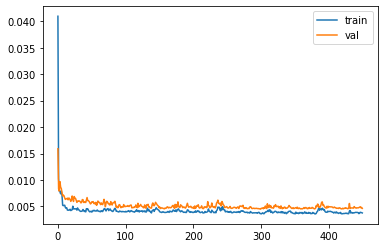

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

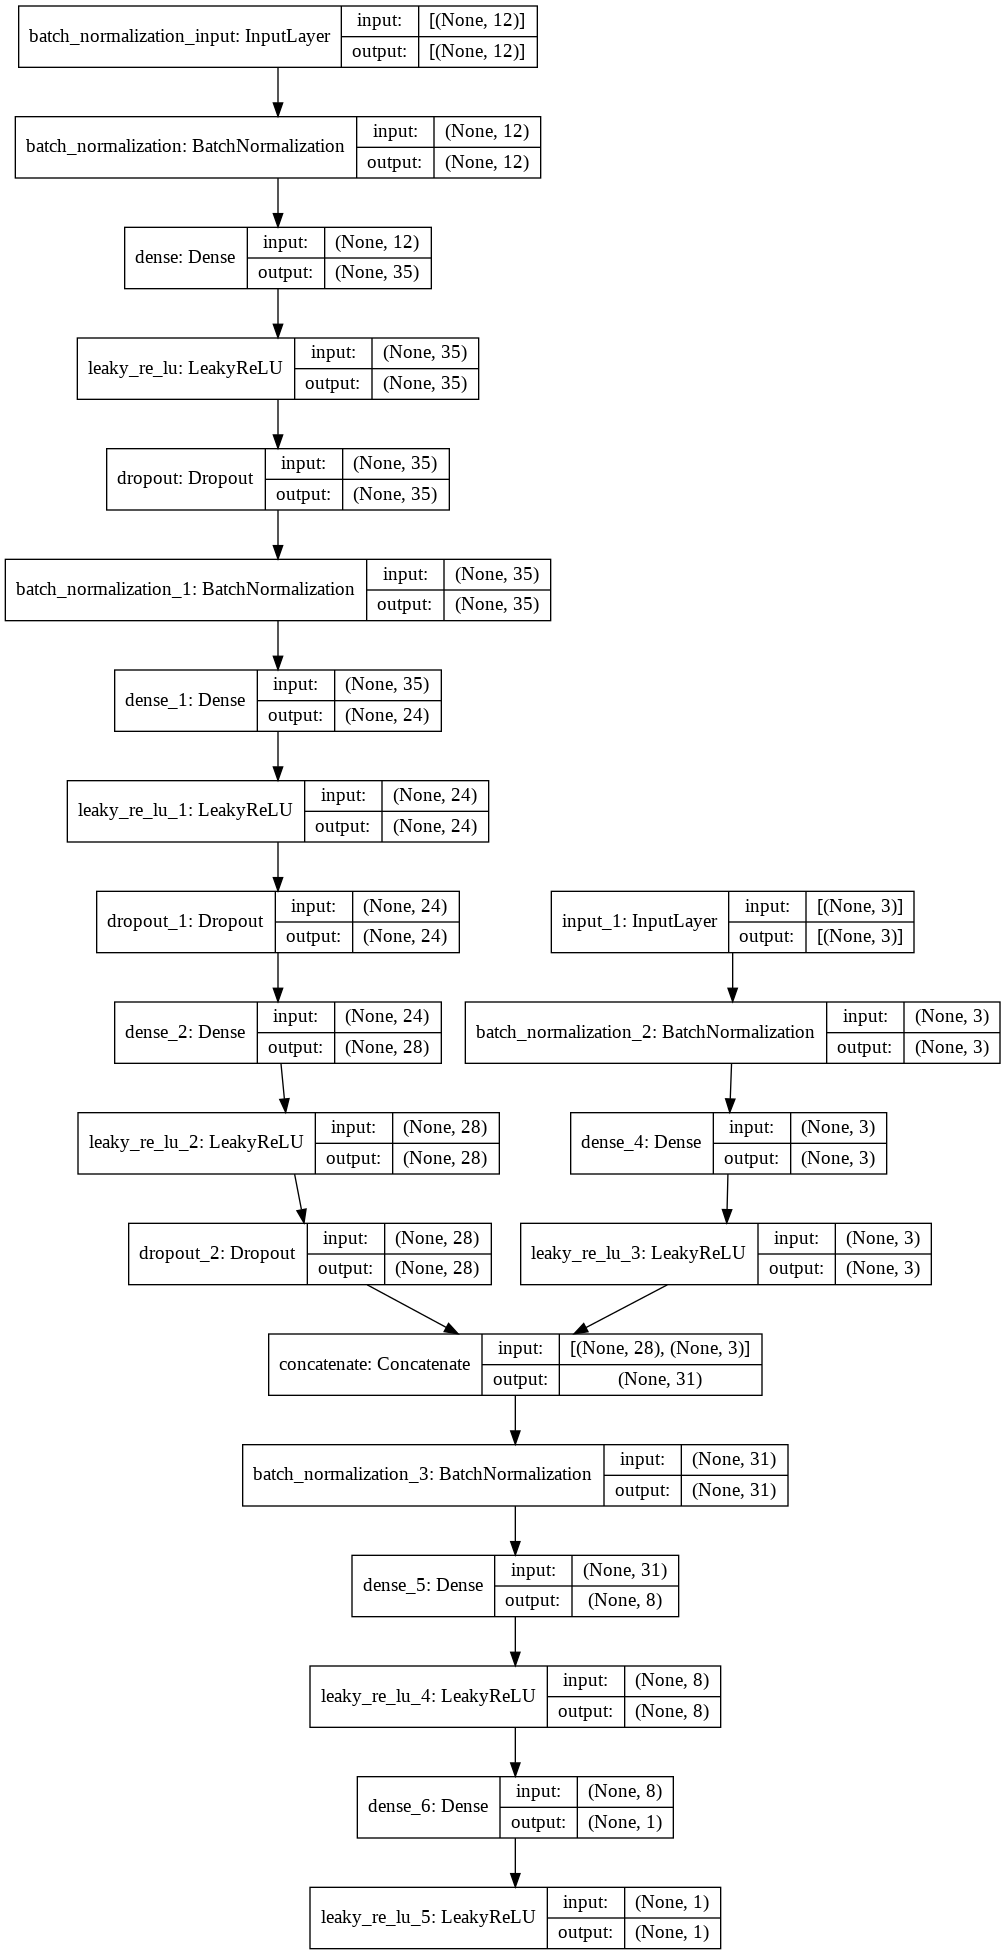

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

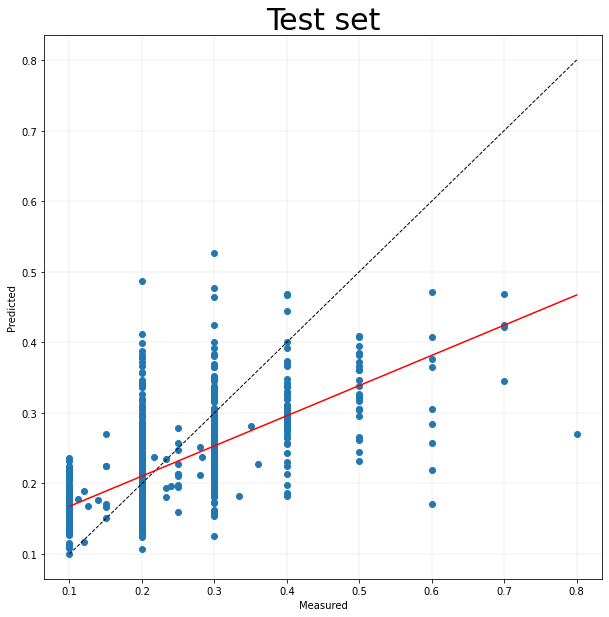

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


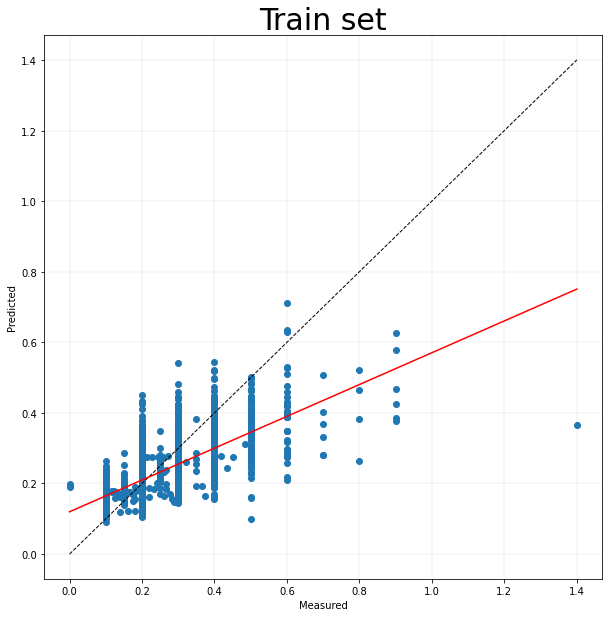

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


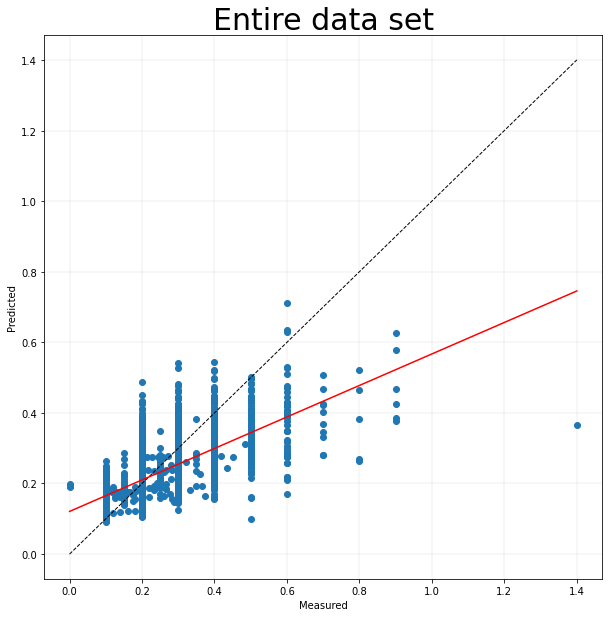

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

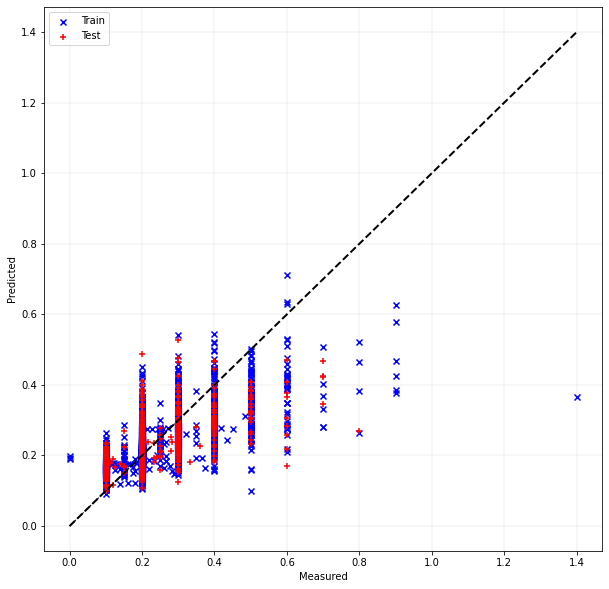

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

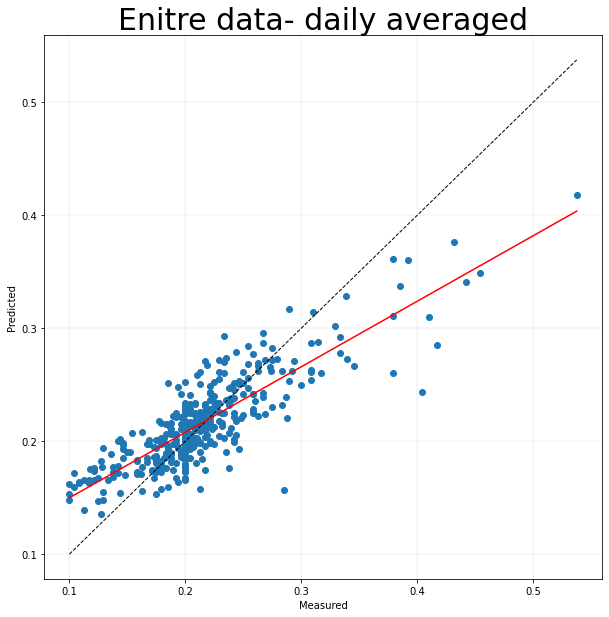

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


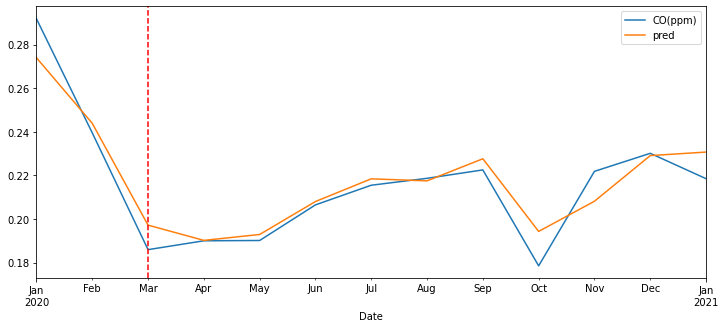

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

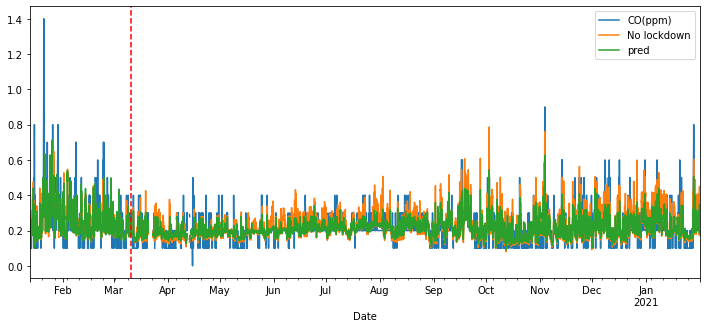

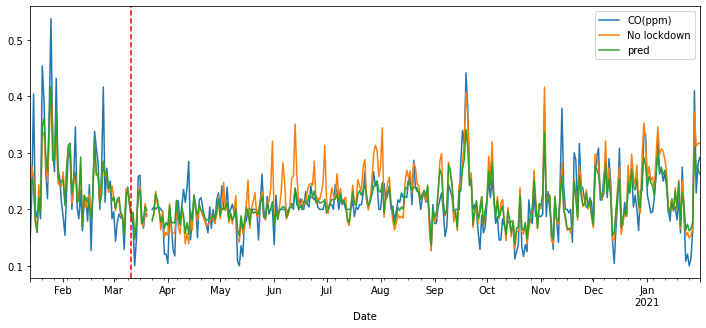

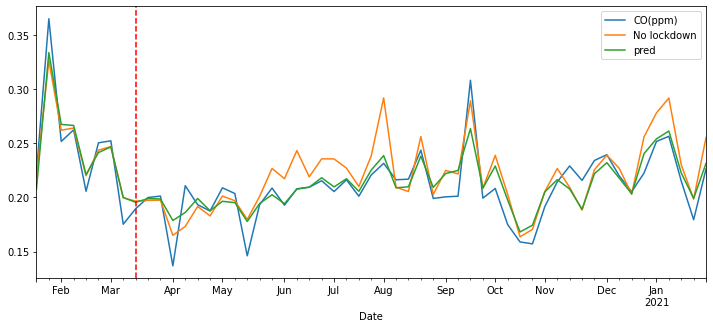

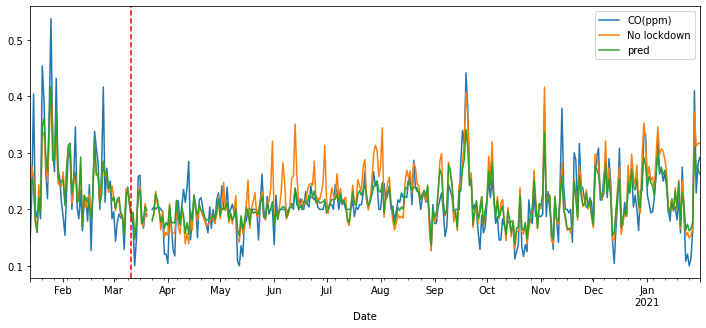

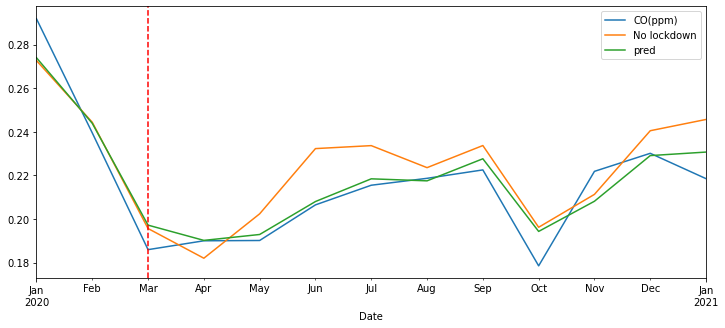

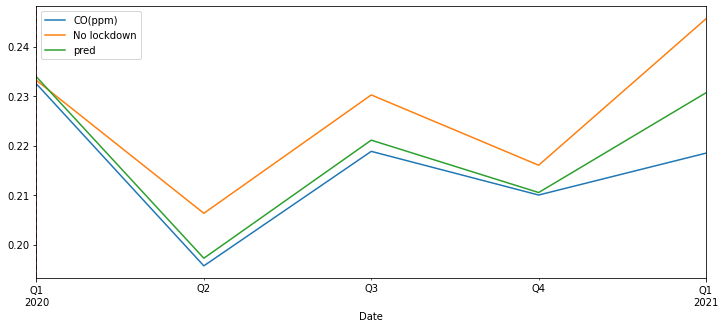

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]